This script plots the counts from fit and calculate flux, flux ratio 

In [1]:
import numpy as np
import numpy as np
from tools.graphs import MGraph, slice_graph, plot_graph, slice_graph_by_value, concatenate_graphs, scale_graph
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar_v2, savefig_tofile, setplot_defaultstyle, FIGSIZE_BIG, FIGSIZE_SQUARE, FIGSIZE_MID, FIGSIZE_WID, FONTSIZE, FONTSIZE_MID, plot1d_errorbar, plot1d_step, set_plot_defaultstyle
import pickle
from tools.constants import NUCLEI_CHARGE, ANALYSIS_RANGE_EKIN, ISOTOPES_MASS, ISOTOPES_COLOR, ISO_LABELS
from tools.constants import DETECTOR_COLOR, ISOTOPES
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines 
import matplotlib
from tools.MassFunction import expo_func
from scipy.interpolate import UnivariateSpline
import pickle
from scipy.optimize import curve_fit
from tools.massfit_tools import get_fitpdf_witherr, get_fitpdferrorband
from tools.functions import poly, upoly
import uncertainties
from tools.binnings_collection import fbinning_energy_rebin, get_bin_center
from tools.calculator import calc_rig_from_ekin, calc_ratio_and_err
from tools.constants import ISOTOPES_MASS, ISOTOPES_CHARGE,DETECTOR_LABEL 
from tools.plottools import xaxistitle, xaxis_binning
from tools.histograms import Histogram, WeightedHistogram, plot_histogram_1d, plot_histogram_2d 
import os
from tools.binnings import Binning 
import pandas as pd
from tools.constants import ISOTOPES_MASS, NUCLEI_CHARGE, NUCLEIS, ISOTOPES, ISO_LABELS
import uproot
from tools.utilities import get_spline_from_graph, save_spline_to_file, get_graph_from_spline, get_spline_from_file
from tools.jupytertools import *

/home/manbing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Reading data from files and setting constant variables

In [2]:
datadirP8 = '/home/manbing/Documents/Data/data_BeP8/'

nuclei = 'Be'
datadirP7 = '/home/manbing/Documents/Data/data_BeP7_Iso/'

Time10Yr = False
if Time10Yr:
    file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitDataGBL_rebin10yr_notofedge/graph_massfit_counts.npz'
    resultsdir = '/home/manbing/Documents/Data/data_BeP8/results/10yr'
else:
    #file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitDataGBL_Rebin_BetaRigErrBand/graph_massfit_counts.npz'
    file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeThesis/graph_massfit_counts.npz'
    #file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitDataGBL_finebin11yr/graph_massfit_counts.npz'
    resultsdir = '/home/manbing/Documents/Data/data_BeP8/results/11yr'
    
file_acc = datadirP8 + 'acceptance/BeMC_dict_graph_rawacc_EkinP8_notTofEdge_final.npz'

file_expotime = datadirP8 + 'expotime/expotime_p8rebin.root'

#file_effcor = datadirP7 + 'graph_total_effcor.npz'
file_effcor = datadirP8 + 'efficiency/spline_effcor/graph_total_effcor.npz'

plotdir = '/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL'
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL'
detectors = ["Tof", "NaF", "Agl"]
isotopes = ISOTOPES[nuclei]
isotopes_alias = {'Be7': 'be7', 'Be9': 'be9', 'Be10': 'be10'}
detectors_alias = {"Tof":"tof", "NaF":"naf", "Agl": "agl"} 
OptimizedDataSample = [iso for iso in ISOTOPES[nuclei]] 
variable = 'Ekin'
fig_suffix = 'P8'
slicevalue ={'Tof':[0.4185, 1.5473], 'NaF':[1.1666, 4.0029], 'Agl':[4.0029, 12.13]}
isrebin = False
xbinning = Binning(fbinning_energy_rebin())
figname = '10yr' if Time10Yr else '11yr'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL
/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL


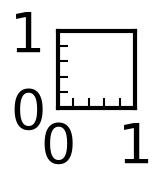

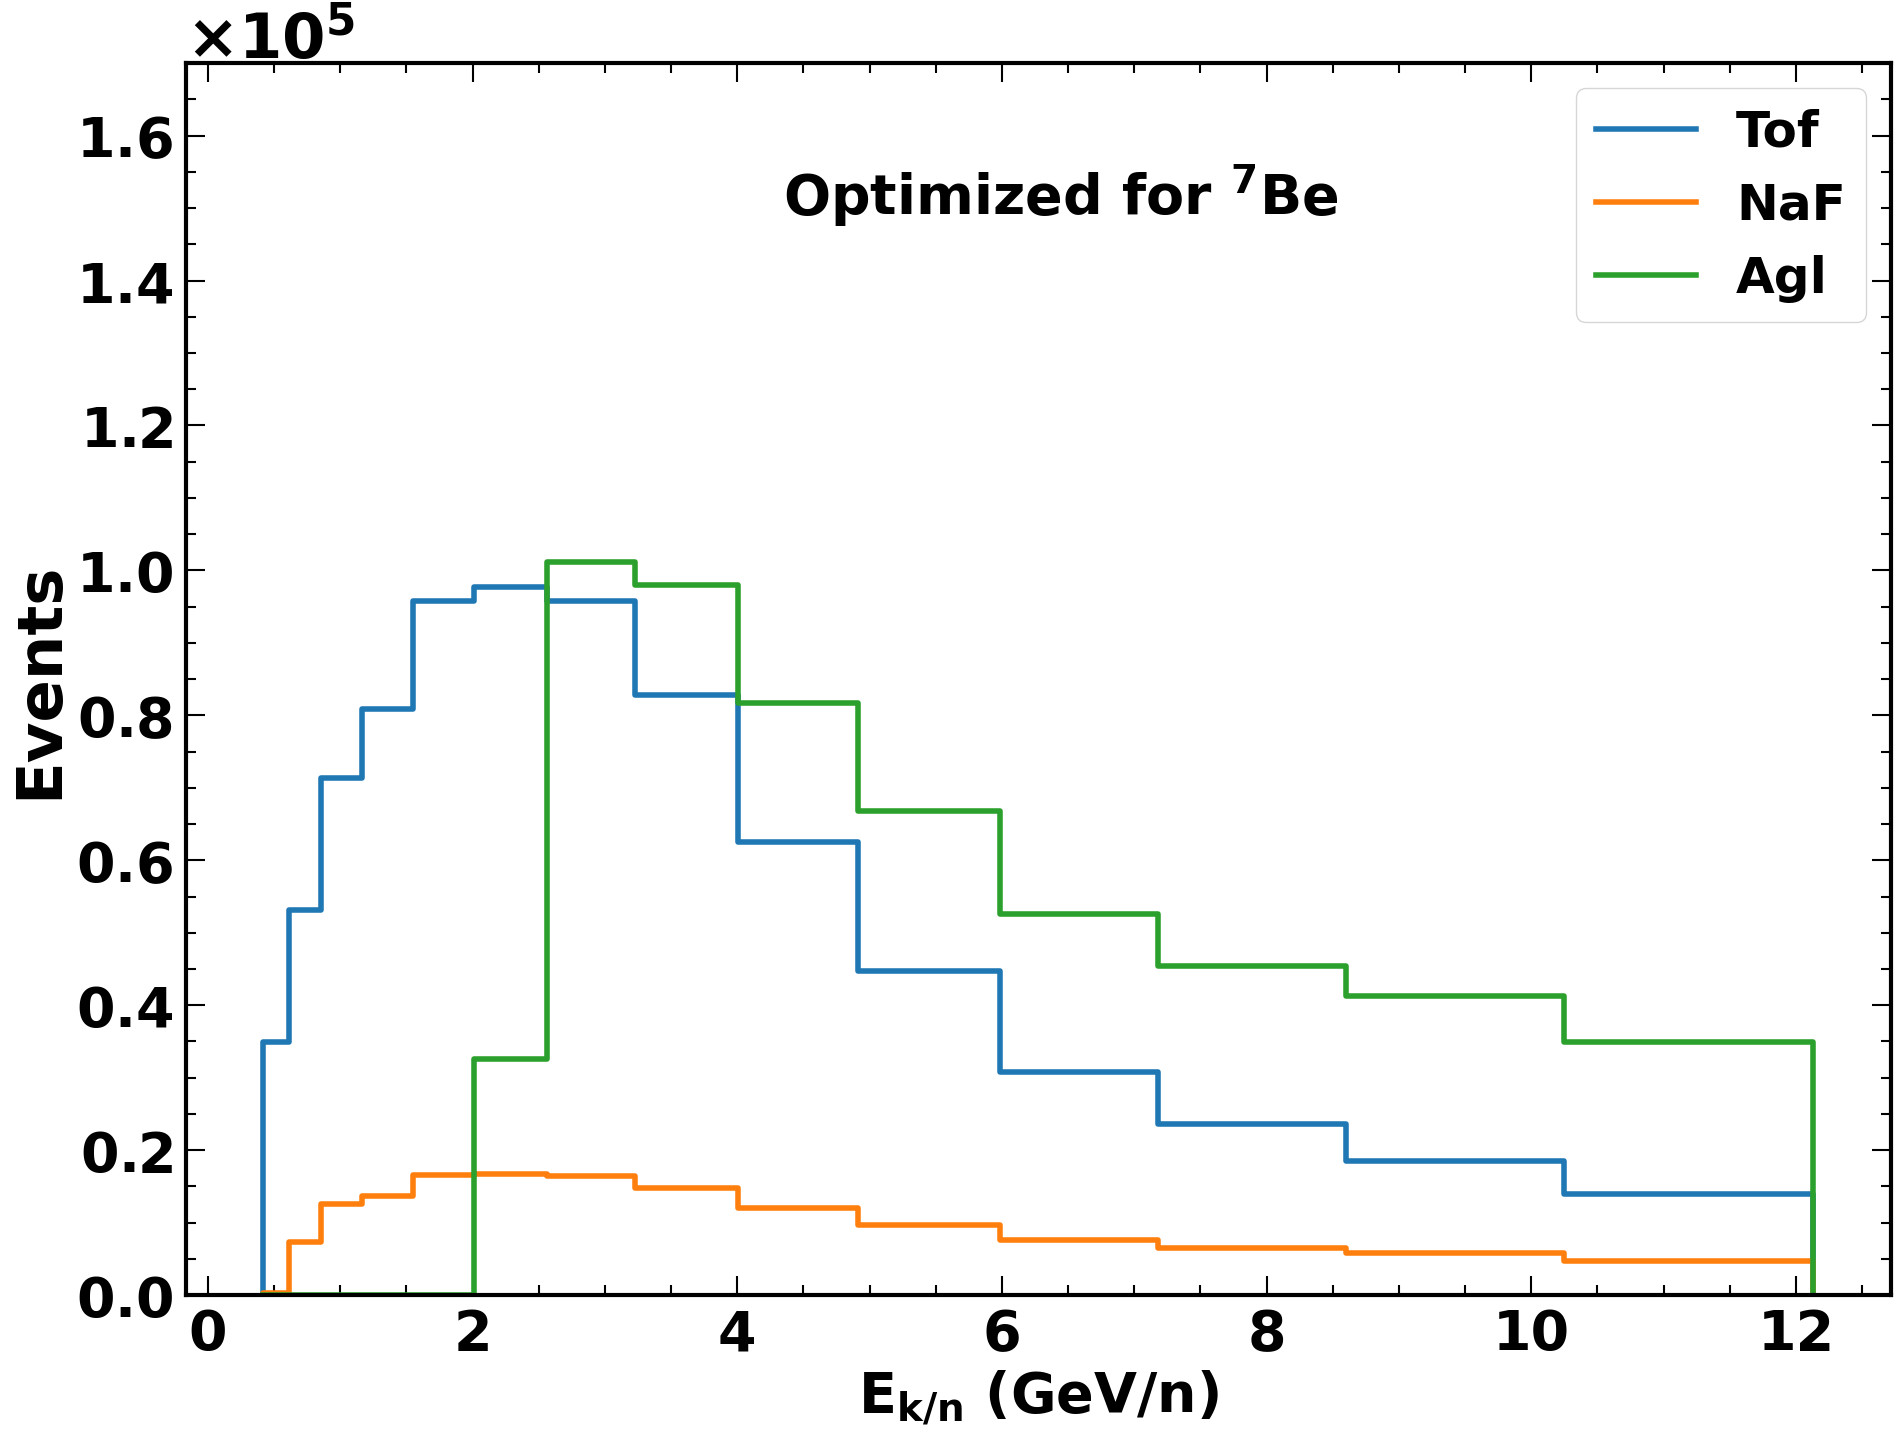

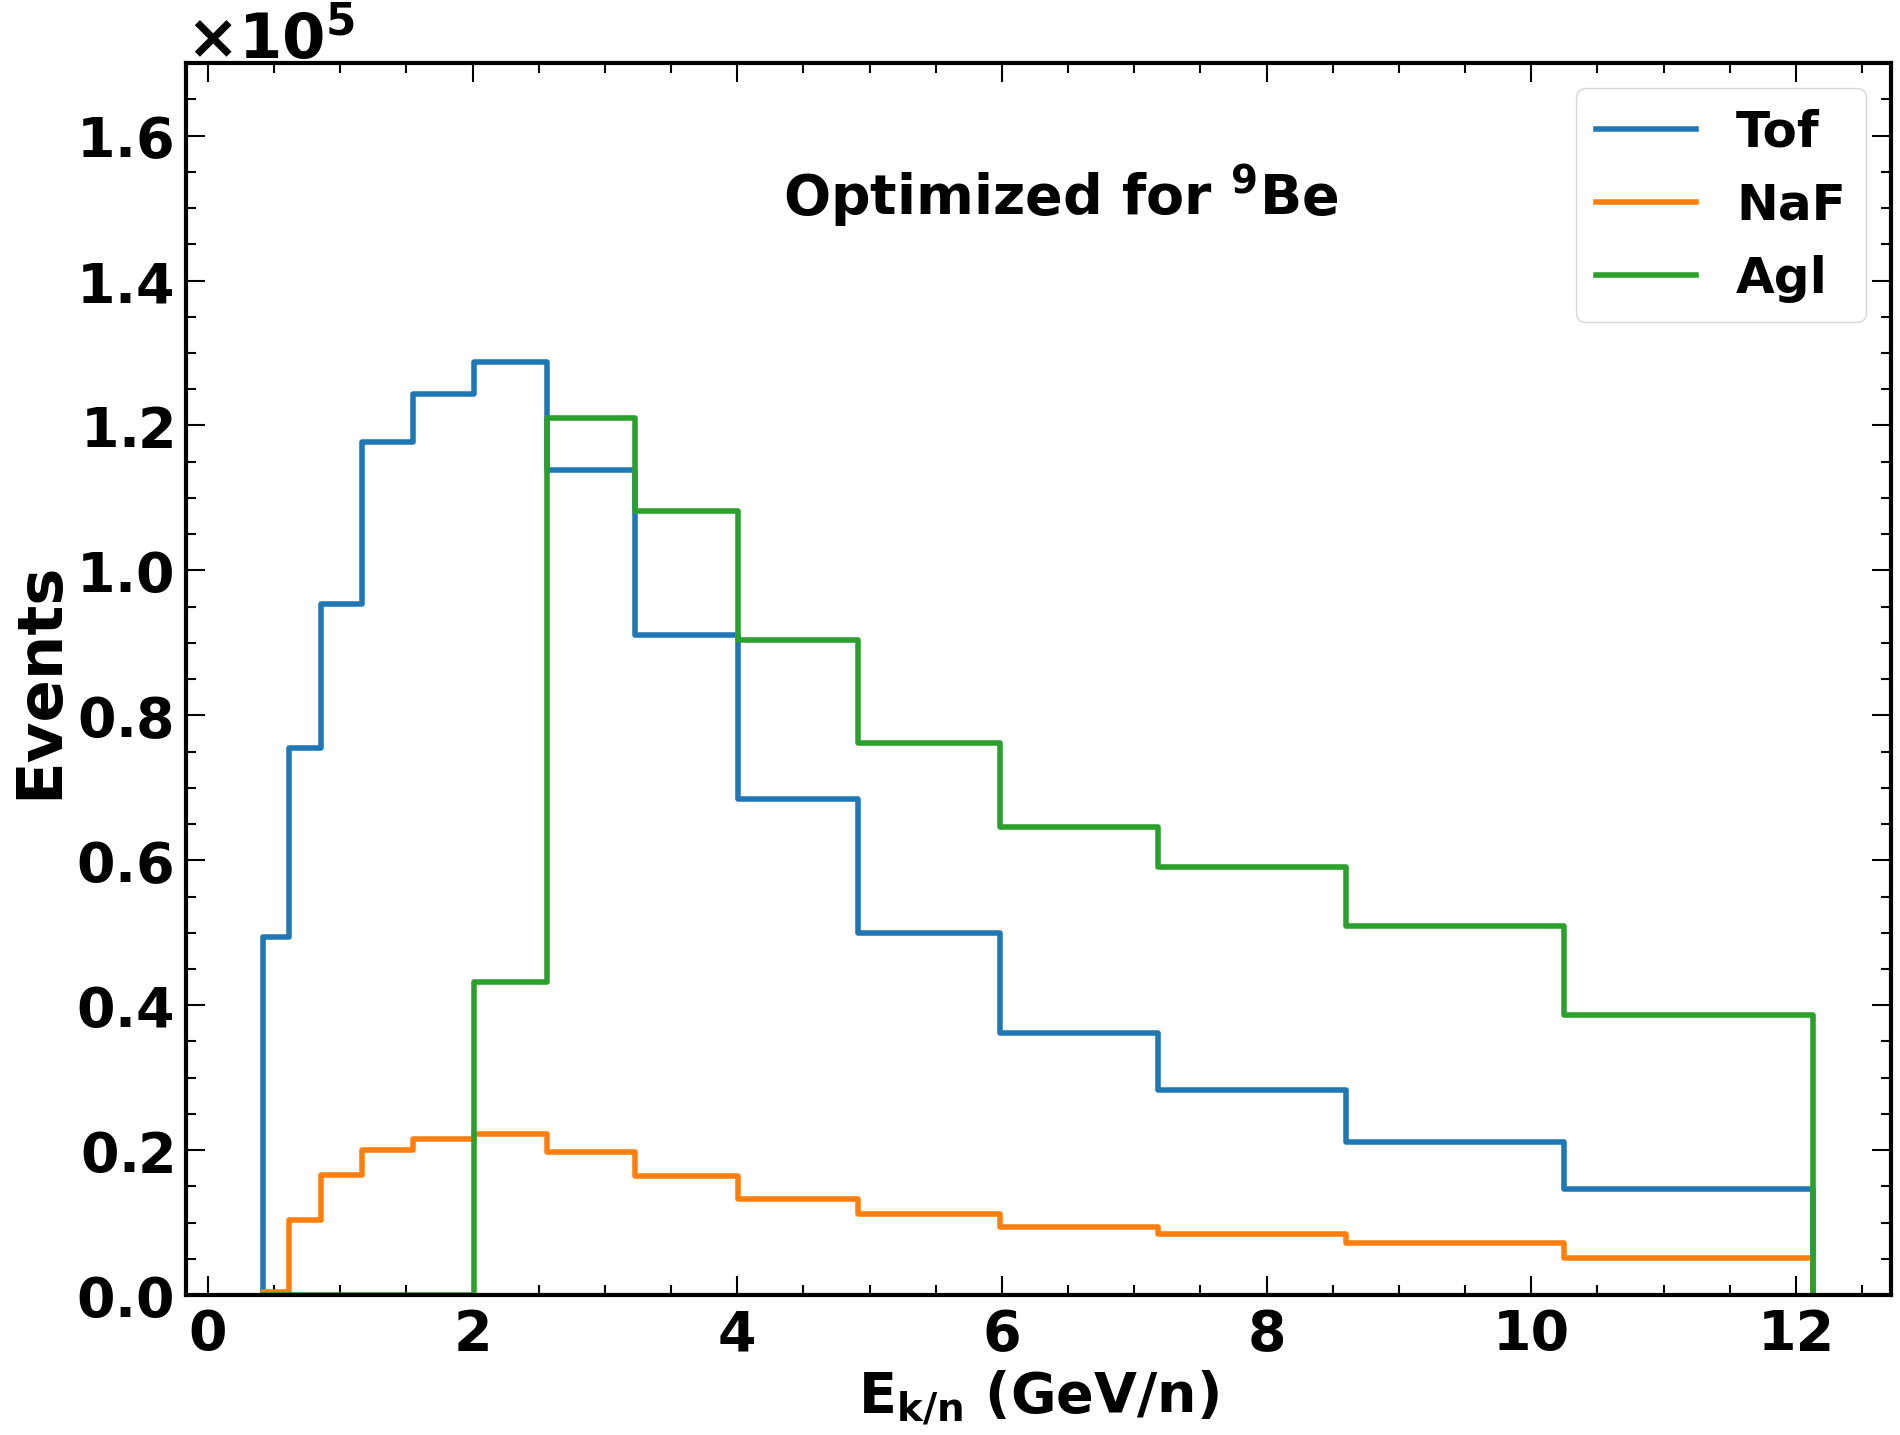

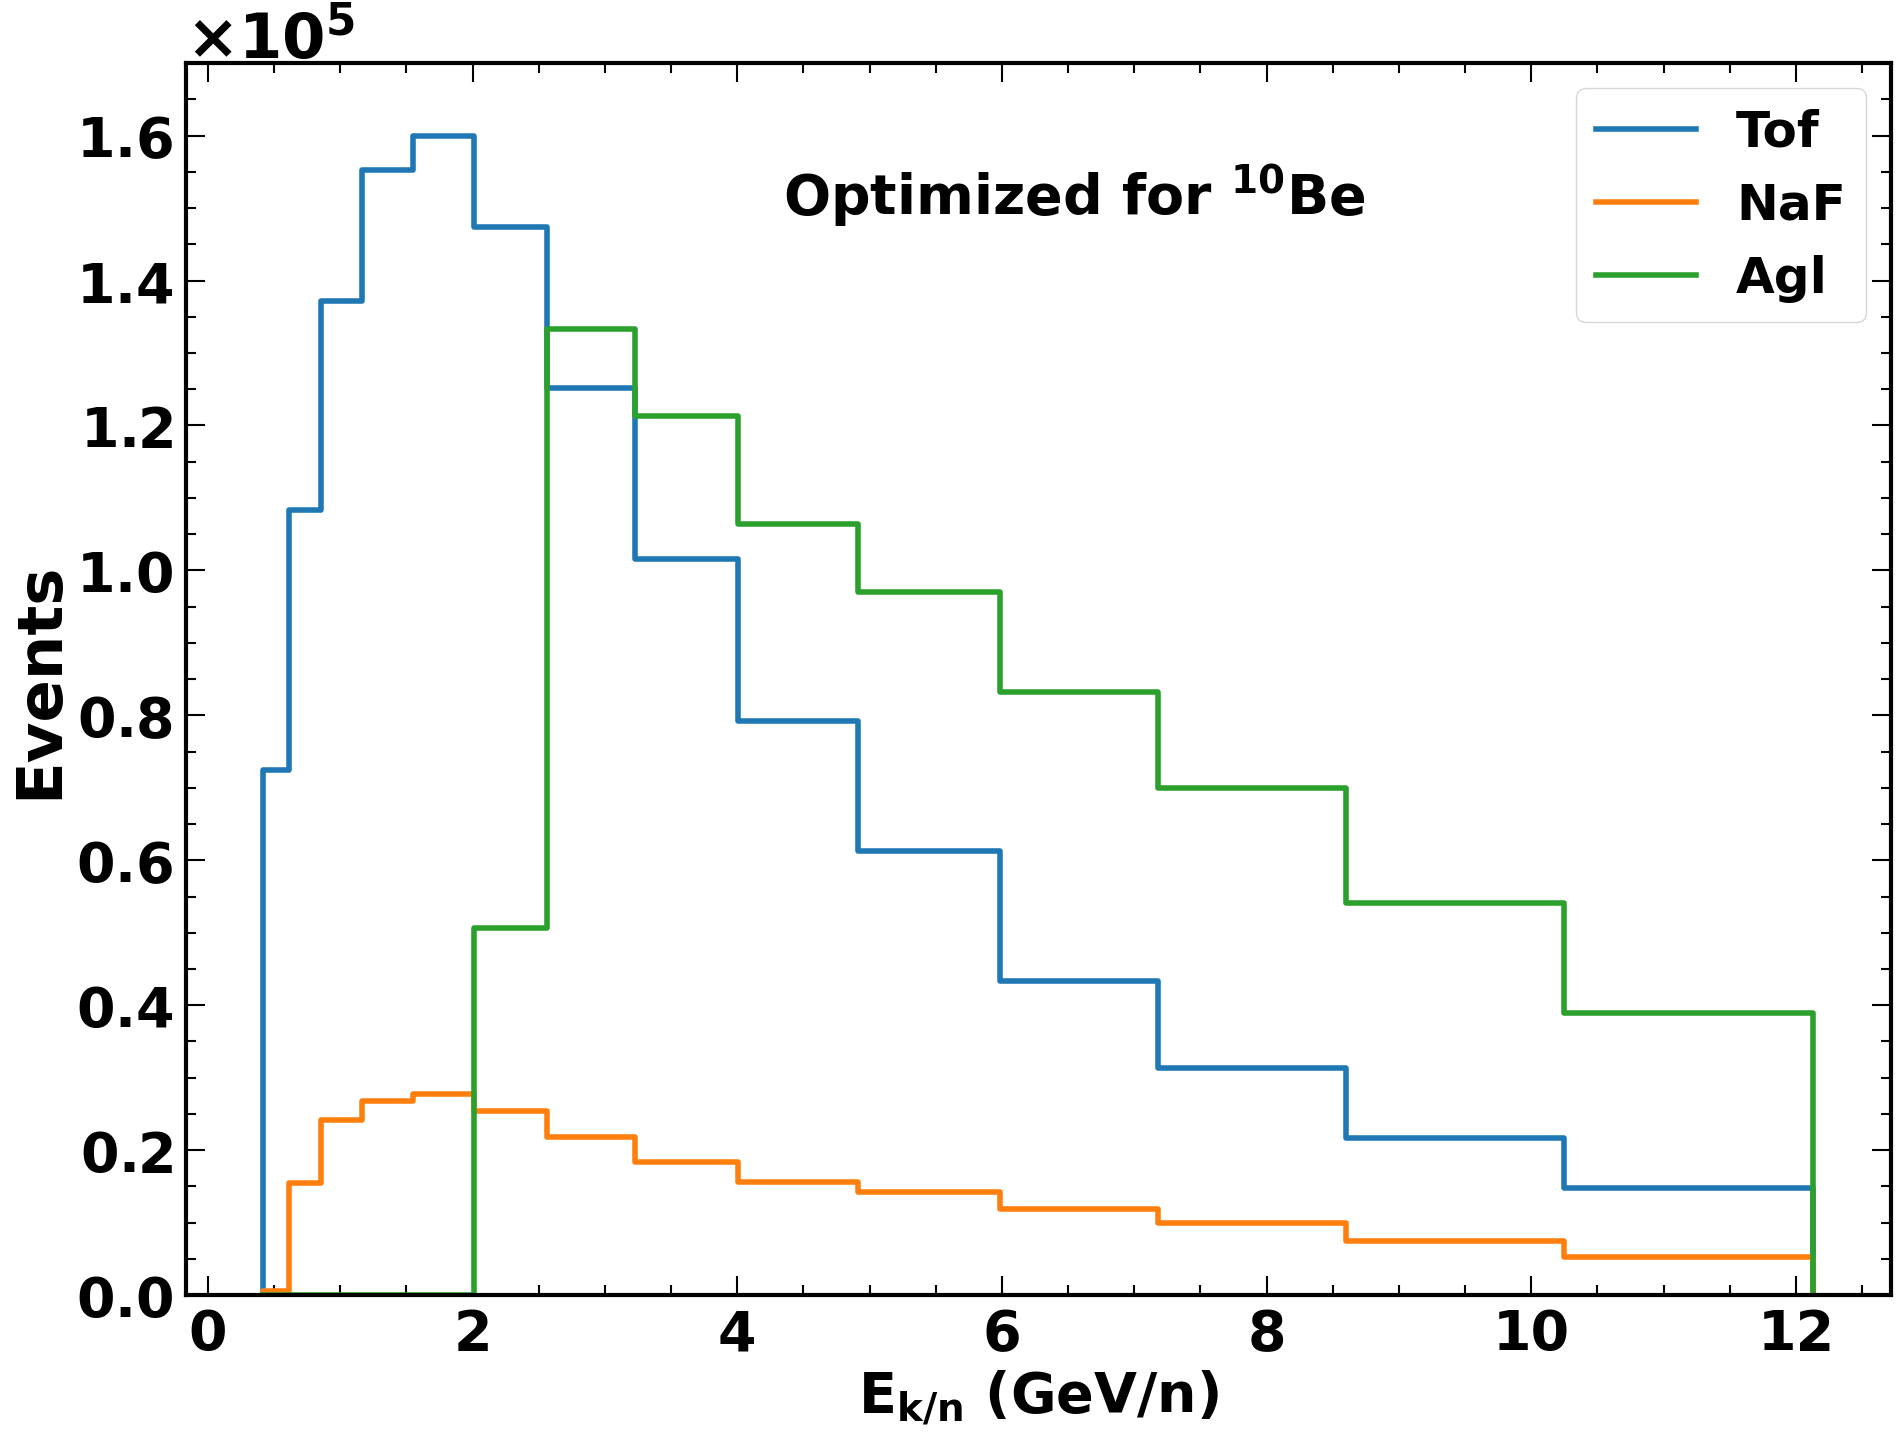

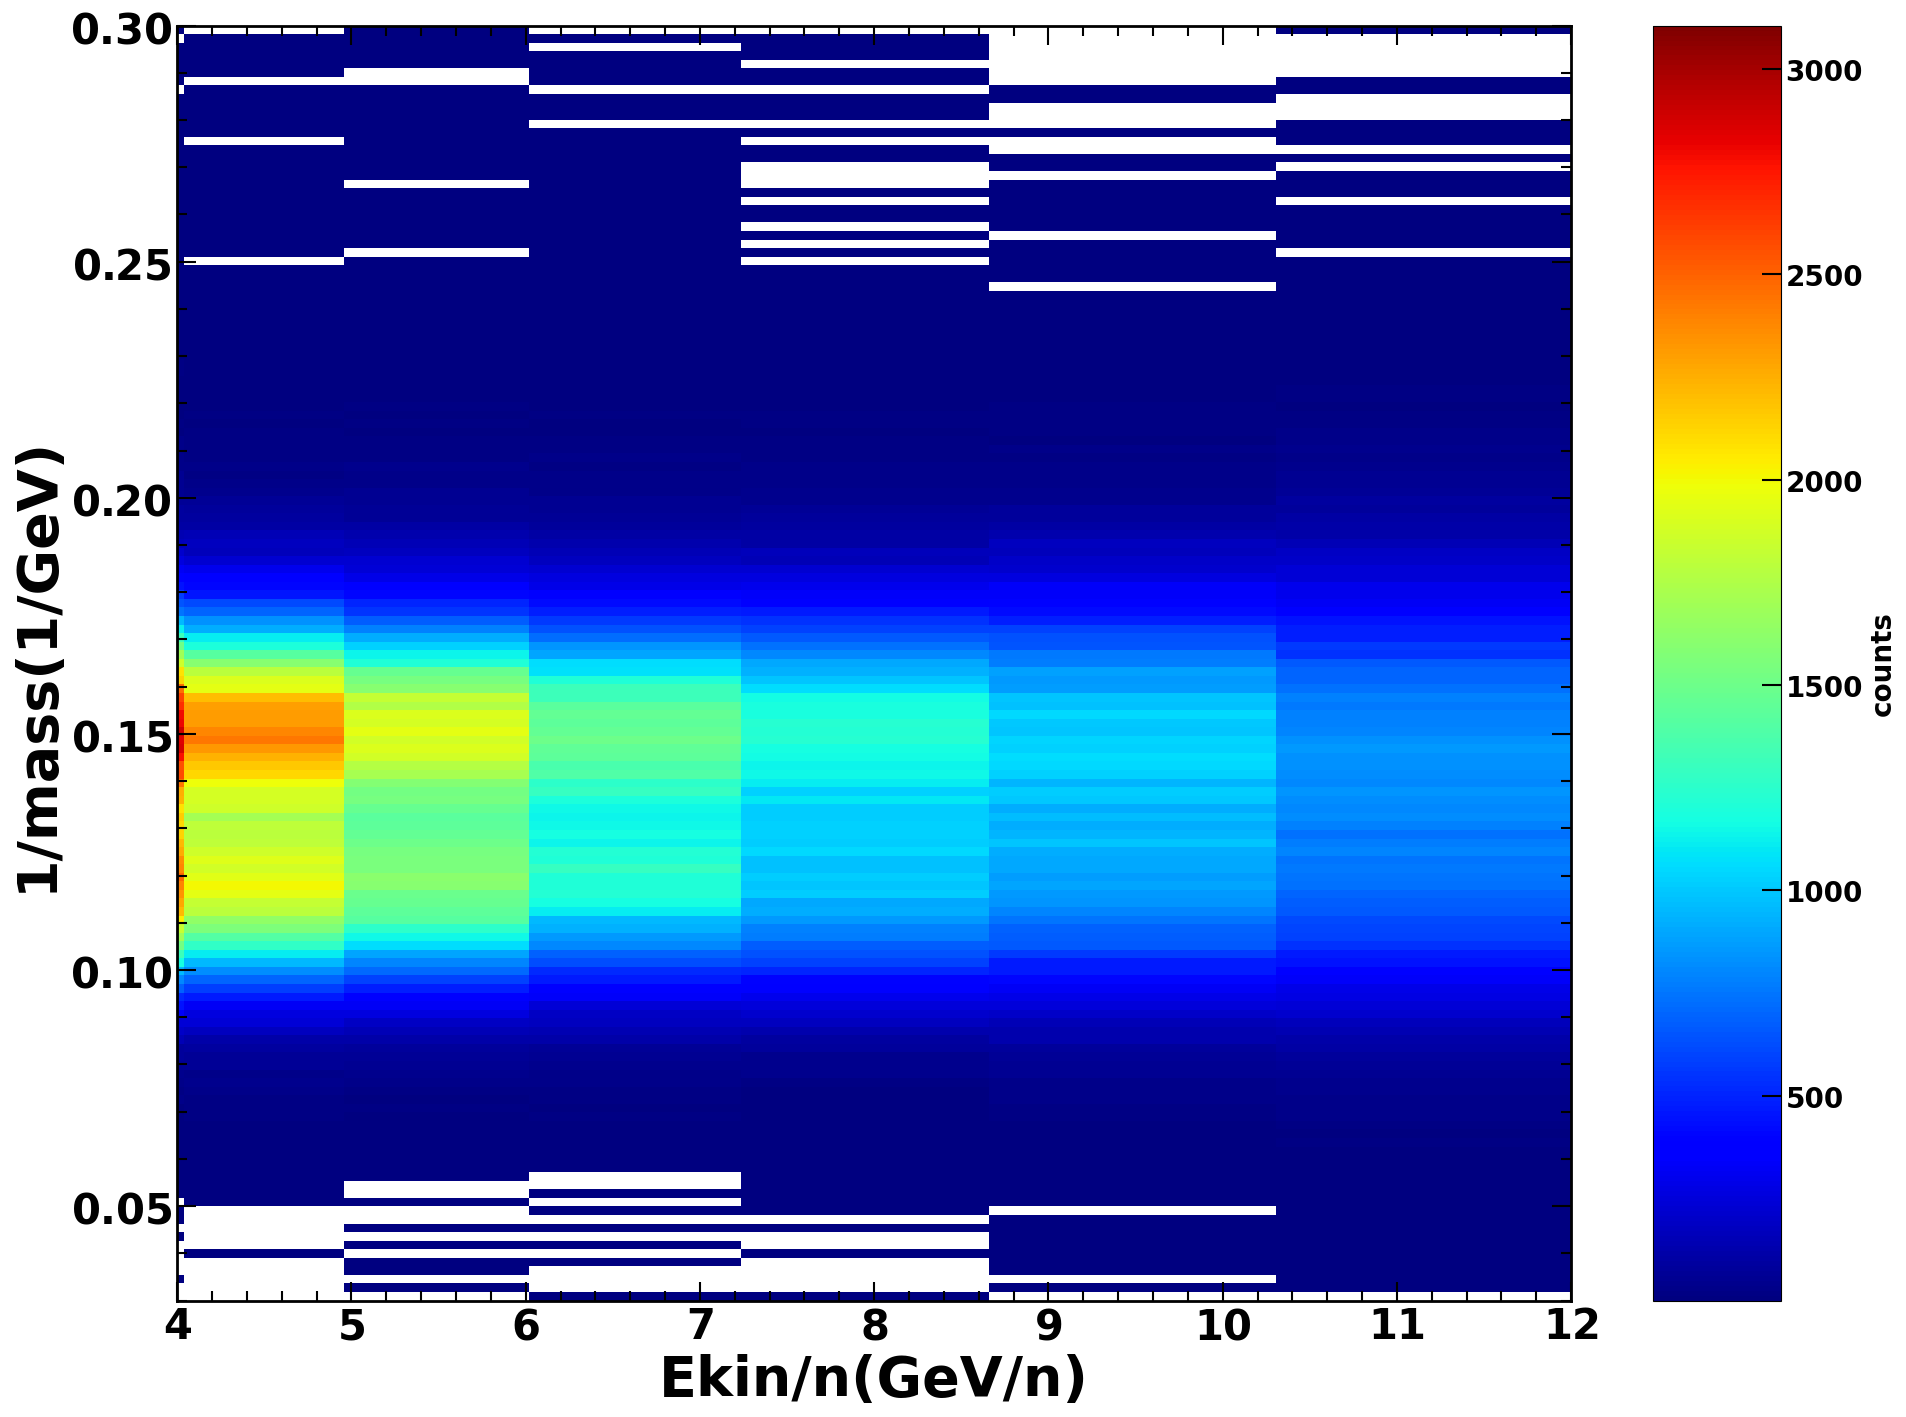

In [3]:
file_histmass_data = '/home/manbing/Documents/Data/data_BeP8/BeMassHist/BeISS_masshist_EkinP8GBL_Rebin.npz'
dfc = np.load(f'{file_histmass_data}')
hist_counts = {dec: {} for dec in detectors}
isotopes = ['Be7', 'Be9', 'Be10']
fig, ax1 = plt.subplots(1, 1, figsize=(1,1))
set_plot_style(ax1)
for iso in isotopes:
    figure, ax1 = plt.subplots(1, 1, figsize=FIGSIZE3)
    for dec in detectors:
    #figure, ax1 = plt.subplots(1, 1, figsize=FIGSIZE3)    
        hist_counts[dec][iso] = Histogram.from_file(dfc, f'hist_Be_{dec}Opt{iso}_counts')   
        plot_histogram_1d(ax1, hist_counts[dec][iso], style="mc", color=DETECTOR_COLOR[dec], label=f'{dec}', scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False, linewidth=4, markersize=20)
        #plot_histogram_1d(ax1, hist_counts[dec][iso], style="iss", color=DETECTOR_COLOR[dec], label=f'{dec}', scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False, linewidth=4, markersize=18)
        #print(dec, 'Opt:', iso, np.sum(hist_counts[dec][iso].values[2:-1]))
    ax1.legend()
    ax1.text(0.35, 0.92, f"Optimized for {ISO_LABELS[iso]}", fontsize=TEXTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")              
    #ax1.text(0.5, 0.95, f'{dec}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    ax1.set_ylim([0, 1.7*10**5])
    set_plot_style(ax1)
    ax1.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", fontsize=40) 
                          
    print(plotdir)
    savefig_tofile(figure, plotdir, f"data_stat_alldec_Opt{iso}", show=True)

OptimizedDataSample = ['Be7']
hist2d_mass_energy = {dec: {} for dec in detectors}

detectors_energyrange = {"Tof": [0.45, 1.2], "NaF": [1.1, 4.0], "Agl": [4.0, 12]} #Agl: 4.0, 10 
with np.load(file_histmass_data) as massfile:                                                                                                                                                                           
        for dec in ['Agl']:                                                                                                                                                                                      
            for OpIso in OptimizedDataSample:                                                                                                                                                                      
                hist2d_mass_energy[dec][OpIso] = Histogram.from_file(massfile, f"Be_{dec}Opt{OpIso}_mass_ciemat")                                                                                                 
                #hist2d_mass_energy[dec][OpIso] = Histogram.from_file(massfile, f"Be_{dec}_mass_test")                                                                                                         
                
                fig = plt.figure(figsize=(20, 15))                                                                                                                                                                 
                plot = fig.subplots(1, 1)                                                                                                                                                                          
                plot2dhist(fig, plot, xbinning=hist2d_mass_energy[dec][OpIso].binnings[0].edges[1:-1],                                                                                                             
                           ybinning=hist2d_mass_energy[dec][OpIso].binnings[1].edges[1:-1],                                                                                                                        
                           counts=hist2d_mass_energy[dec][OpIso].values[1:-1, 1:-1],                                                                                                                               
                           xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None,                                                                                                                        
                           setlogx=False, setlogy=False, setscilabelx=True, setscilabely=True,  setlogz=False)                                                                                                     
                
                plot.set_ylabel("1/mass(1/GeV)", fontsize=40)                                                                                                                                                     
                plot.set_xlabel("Ekin/n(GeV/n)", fontsize=40)                                                                                                                                                      
                plot.set_xlim(detectors_energyrange[dec])                                                                                                                                                          
                #plotdir = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'                                                                                                                                                                                                  
                savefig_tofile(fig, plotdir, f"hist_ISS_mass_Op{OpIso}_{dec}", show=True)    

In [4]:
figsize1 = (21, 25)
fontsize1 = 36
fontsize2 = 36
mksize = 38
filename_compare = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeFinal/graph_massfit_counts.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
temp = 'Be7'
df_counts = np.load(f'{file_counts}')
df_counts_compare = np.load(f'{filename_compare}')

figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
slicevalue = {'Tof': [0.4, 1.1], 'NaF': [1.1, 4.0], 'Agl':[3.7, 12.0]}
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.9}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.1}

for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_compare[dec][iso] , np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    
for dec in detectors:
    xbegin = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[0]])[0]]
    xend = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[-1]])[0]+1]
    print('optimized for:', temp, ',',  dec, 'sum:', np.sum(graph_counts_sum[dec].yvalues), 'energyrange:', '[', xbegin, ',', xend, ']')
    for iso in isotopes:
        print(dec, iso, 'sum:', np.sum(graph_counts_fromfit_fix[dec][iso].yvalues))
        

for dec in detectors:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.32, 0.32, 0.32]}, figsize=(24, 24))                                                                                                            
    plot_graph(fig, ax1, graph_counts_fromfit_fix[dec]['Be7'], color=ISOTOPES_COLOR['Be7'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize+5, label=f'{ISO_LABELS["Be7"]}')  
    plot_graph(fig, ax2, graph_counts_fromfit_fix[dec]['Be9'], color=ISOTOPES_COLOR['Be9'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize+5, label=f'{ISO_LABELS["Be9"]}')  
    plot_graph(fig, ax3, graph_counts_fromfit_fix[dec]['Be10'], color=ISOTOPES_COLOR['Be10'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize+5, label=f'{ISO_LABELS["Be10"]}')  
    set_plot_style(ax1)
    set_plot_style(ax2)
    set_plot_style(ax3)
    ax1.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be7']} ", fontsize=fontsize2+2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
    ax2.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be9']}", fontsize=fontsize2+2, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color="black", weight='bold')    
    ax3.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be10']}", fontsize=fontsize2+2, verticalalignment='top', horizontalalignment='left', transform=ax3.transAxes, color="black", weight='bold')    
    ax3.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$', fontsize=fontsize1) 
    #ax1.legend(loc="upper right", fontsize=fontsize1) 
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    plt.subplots_adjust(hspace=.05)   
        #ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_ylabel('counts', fontsize=fontsize1)
    ax2.set_ylabel('counts', fontsize=fontsize1)
    ax3.set_ylabel('counts', fontsize=fontsize1)
    
    
    #ax1.legend(fontsize=fontsize1) 
    #ax2.legend(fontsize=fontsize1) 
    #ax3.legend(fontsize=fontsize1) 
    ax1.set_ylim([0.62* min(graph_counts_fromfit_fix[dec]['Be7'].yvalues), 1.45* max(graph_counts_fromfit_fix[dec]['Be7'].yvalues)])
    ax2.set_ylim([0.62* min(graph_counts_fromfit_fix[dec]['Be9'].yvalues), 1.47* max(graph_counts_fromfit_fix[dec]['Be9'].yvalues)])
    ax3.set_ylim([0.62* min(graph_counts_fromfit_fix[dec]['Be10'].yvalues), 1.48* max(graph_counts_fromfit_fix[dec]['Be10'].yvalues)])
    print(plotfile)
    savefig_tofile(fig, plotfile, f"counts_fromfit_TBeAN_{dec}", show=True)



FileNotFoundError: [Errno 2] No such file or directory: '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeThesis/graph_massfit_counts.npz'

In [ ]:
figsize1 = (21, 25)
fontsize1 = 40
fontsize2 = 40
mksize = 38
filename_compare = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeFinal/graph_massfit_counts.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
temp = 'Be7'
df_counts = np.load(f'{file_counts}')
df_counts_compare = np.load(f'{filename_compare}')

figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
slicevalue = {'Tof': [0.4, 1.2], 'NaF': [1.2, 4.0], 'Agl':[3.7, 12.0]}
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.9}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.1}

for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_compare[dec][iso] , np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    
for dec in detectors:
    xbegin = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[0]])[0]]
    xend = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[-1]])[0]+1]
    print('optimized for:', temp, ',',  dec, 'sum:', np.sum(graph_counts_sum[dec].yvalues), 'energyrange:', '[', xbegin, ',', xend, ']')
    for iso in isotopes:
        print(dec, iso, 'sum:', np.sum(graph_counts_fromfit_fix[dec][iso].yvalues))
        


for OpIso in isotopes:   
    graph_counts_Optimize = {dec: {} for dec in detectors}
    
    for dec in detectors:
        for iso in isotopes: 
            graph_counts_Optimize[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{OpIso}_{iso}")
            graph_counts_Optimize[dec][iso] = slice_graph_by_value(graph_counts_Optimize[dec][iso], slicevalue[dec])
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.32, 0.32, 0.32]}, figsize=(24, 24))                                                                                                               
        plot_graph(fig, ax1, graph_counts_Optimize[dec]['Be7'], color=ISOTOPES_COLOR['Be7'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be7')  
        plot_graph(fig, ax2, graph_counts_Optimize[dec]['Be9'], color=ISOTOPES_COLOR['Be9'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be9')  
        plot_graph(fig, ax3, graph_counts_Optimize[dec]['Be10'], color=ISOTOPES_COLOR['Be10'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be10')  
        set_plot_style(ax1)
        set_plot_style(ax2)
        set_plot_style(ax3)
        ax1.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be7']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
        ax2.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be9']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color="black", weight='bold')    
        ax3.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be10']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax3.transAxes, color="black", weight='bold')    
        ax3.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$', fontsize=fontsize1) 
        ax1.legend(loc="upper right", fontsize=fontsize1) 
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
        plt.subplots_adjust(hspace=.05)   
            #ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_ylabel('counts', fontsize=fontsize1)
        ax2.set_ylabel('counts', fontsize=fontsize1)
        ax3.set_ylabel('counts', fontsize=fontsize1)


        #ax1.legend(fontsize=fontsize1) 
        #ax2.legend(fontsize=fontsize1) 
        #ax3.legend(fontsize=fontsize1) 
        ax1.set_ylim([0.64* min(graph_counts_Optimize[dec]['Be7'].yvalues), 1.35* max(graph_counts_Optimize[dec]['Be7'].yvalues)])
        ax2.set_ylim([0.65* min(graph_counts_Optimize[dec]['Be9'].yvalues), 1.37* max(graph_counts_Optimize[dec]['Be9'].yvalues)])
        ax3.set_ylim([0.65* min(graph_counts_Optimize[dec]['Be10'].yvalues), 1.38* max(graph_counts_Optimize[dec]['Be10'].yvalues)])
        print(plotfile)
        savefig_tofile(fig, plotfile, f"counts_fromfit_T{OpIso}N_{dec}", show=True)


In [ ]:
figsize1 = (21, 25)
fontsize1 = 40
fontsize2 = 40
mksize = 38
filename_compare = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeFinal/graph_massfit_counts.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
temp = 'Be7'
df_counts = np.load(f'{file_counts}')
df_counts_compare = np.load(f'{filename_compare}')

figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
slicevalue = {'Tof': [0.4, 1.1], 'NaF': [1.1, 4.0], 'Agl':[3.7, 12.0]}
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.9}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.1}

for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_compare[dec][iso] , np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    
for dec in detectors:
    xbegin = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[0]])[0]]
    xend = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[-1]])[0]+1]
    print('optimized for:', temp, ',',  dec, 'sum:', np.sum(graph_counts_sum[dec].yvalues), 'energyrange:', '[', xbegin, ',', xend, ']')
    for iso in isotopes:
        print(dec, iso, 'sum:', np.sum(graph_counts_fromfit_fix[dec][iso].yvalues))
        


for OpIso in isotopes:   
    graph_counts_Optimize = {dec: {} for dec in detectors}
    
    for dec in detectors:
        for iso in isotopes: 
            graph_counts_Optimize[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{OpIso}_{iso}")
            graph_counts_Optimize[dec][iso] = slice_graph_by_value(graph_counts_Optimize[dec][iso], slicevalue[dec])
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.32, 0.32, 0.32]}, figsize=(24, 24))                                                                                                               
        plot_graph(fig, ax1, graph_counts_Optimize[dec]['Be7'], color=ISOTOPES_COLOR['Be7'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be7')  
        plot_graph(fig, ax2, graph_counts_Optimize[dec]['Be9'], color=ISOTOPES_COLOR['Be9'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be9')  
        plot_graph(fig, ax3, graph_counts_Optimize[dec]['Be10'], color=ISOTOPES_COLOR['Be10'],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'Be10')  
        set_plot_style(ax1)
        set_plot_style(ax2)
        set_plot_style(ax3)
        ax1.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be7']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
        ax2.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be9']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color="black", weight='bold')    
        ax3.text(0.05, 0.96, f"{dec}-{ISO_LABELS['Be10']}, analysis optimized for {ISO_LABELS[OpIso]} ", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax3.transAxes, color="black", weight='bold')    
        ax3.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$', fontsize=fontsize1) 
        ax1.legend(loc="upper right", fontsize=fontsize1) 
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])
        plt.subplots_adjust(hspace=.05)   
            #ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_ylabel('counts', fontsize=fontsize1)
        ax2.set_ylabel('counts', fontsize=fontsize1)
        ax3.set_ylabel('counts', fontsize=fontsize1)


        #ax1.legend(fontsize=fontsize1) 
        #ax2.legend(fontsize=fontsize1) 
        #ax3.legend(fontsize=fontsize1) 
        ax1.set_ylim([0.64* min(graph_counts_Optimize[dec]['Be7'].yvalues), 1.35* max(graph_counts_Optimize[dec]['Be7'].yvalues)])
        ax2.set_ylim([0.65* min(graph_counts_Optimize[dec]['Be9'].yvalues), 1.37* max(graph_counts_Optimize[dec]['Be9'].yvalues)])
        ax3.set_ylim([0.65* min(graph_counts_Optimize[dec]['Be10'].yvalues), 1.38* max(graph_counts_Optimize[dec]['Be10'].yvalues)])
        savefig_tofile(fig, plotfile, f"counts_fromfit_T{OpIso}N_{dec}", show=True)
print(plotfile)

In [ ]:
figsize1 = (21, 25)
fontsize1 = 45
fontsize2 = 55
mksize = 38
filename_compare = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeFinal/graph_massfit_counts.npz'
#filename_compare = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeP8/fitData_P811yr_rebin_notTofEdgeSysErr/graph_massfit_counts.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
temp = 'Be7'
df_counts = np.load(f'{file_counts}')
df_counts_compare = np.load(f'{filename_compare}')

figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
#slicevalue = {'Tof': [0.65, 1.1], 'NaF': [1.2, 4.0], 'Agl':[4.2, 12.0]}
slicevalue = {'Tof': [0.4, 1.1], 'NaF': [1.1, 4.0], 'Agl':[3.7, 12.0]}
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.9}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.1}

for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f"graph_counts_{dec}Opt{iso}_{iso}")
        graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_compare[dec][iso] , np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    
for dec in detectors:
    xbegin = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[0]])[0]]
    xend = xbinning.edges[xbinning.get_indices([graph_counts_sum[dec].xvalues[-1]])[0]+1]
    print('optimized for:', temp, ',',  dec, 'sum:', np.sum(graph_counts_sum[dec].yvalues), 'energyrange:', '[', xbegin, ',', xend, ']')
    for iso in isotopes:
        print(dec, iso, 'sum:', np.sum(graph_counts_fromfit_fix[dec][iso].yvalues))
        
for iso in isotopes: 
    for dec in detectors:
        fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize1)                                                                                                            
        fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
        plot_graph(fig, ax1, graph_counts_fromfit_fix[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'V0')  
        plot_graph(fig, ax1, graph_counts_compare[dec][iso], color='black',  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label='Compare', markerfacecolor="none") 
        #if dec == "Agl" and iso == "Be9":                                                                                                                                                            
        #    print(dec, iso)                                                                                                                                                                          
        #    print(graph_counts_fromfit_fix[dec][iso])  
        
        graph_ratio = graph_counts_compare[dec][iso]/graph_counts_fromfit_fix[dec][iso]
        graph_ratio.yerrs = graph_ratio.yerrs * 0.2
        plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=mksize, label=f'{dec}')  
        
        #ax2.grid(axis='y')
        ax2.set_xlabel('Ekin/n (GeV/n)', fontsize=fontsize1) 
        ax1.legend(loc="upper right", fontsize=fontsize1) 
        ax1.set_xticklabels([])
        plt.subplots_adjust(hspace=.0)   
        #ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_ylabel('counts', fontsize=fontsize1)

        ax1.legend(loc="upper right", fontsize=fontsize1) 
        ax1.set_xticklabels([])

        plt.subplots_adjust(hspace=.0)   
        #ax1.set_xscale('log')
        #ax2.set_xscale('log')
        ax2.set_ylabel('ratio', fontsize=fontsize1)
        if iso == "Be7":
            ax2.set_ylim([0.98, 1.02])
        elif iso == 'Be9':
            ax2.set_ylim([0.97, 1.03])
        else:
            ax2.set_ylim([0.85, 1.15])
        #ax2.grid(axis='y')
        ax2.axhline(y=1, color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemin[iso], color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemax[iso], color='grey', linestyle='--')
        ax1.set_ylim([0.7 * min(graph_counts_fromfit_fix[dec][iso].yvalues), 1.3* max(graph_counts_fromfit_fix[dec][iso].yvalues)])
        #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #ax2.set_xticks(np.array([2, 4, 10]))
        ax1.text(0.05, 0.98, f"{ISO_LABELS[iso]} {DETECTOR_LABEL[dec]}", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
        #ax1.text(0.5, 0.9, f'{iso}', fontsize=30, verticplalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
        #plotfile = '/home/manbing/Documents/lithiumanalysis/slides/isotopes_2411'
        plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL'
        savefig_tofile(fig, plotfile, f"counts_fromfit_TBe7N{iso}_{dec}_compareDiffScale", show=True)



/home/manbing/Documents/lithiumanalysis/slides/plots_16May
/home/manbing/Documents/lithiumanalysis/slides/plots_16May
/home/manbing/Documents/lithiumanalysis/slides/plots_16May
864842.2927428151


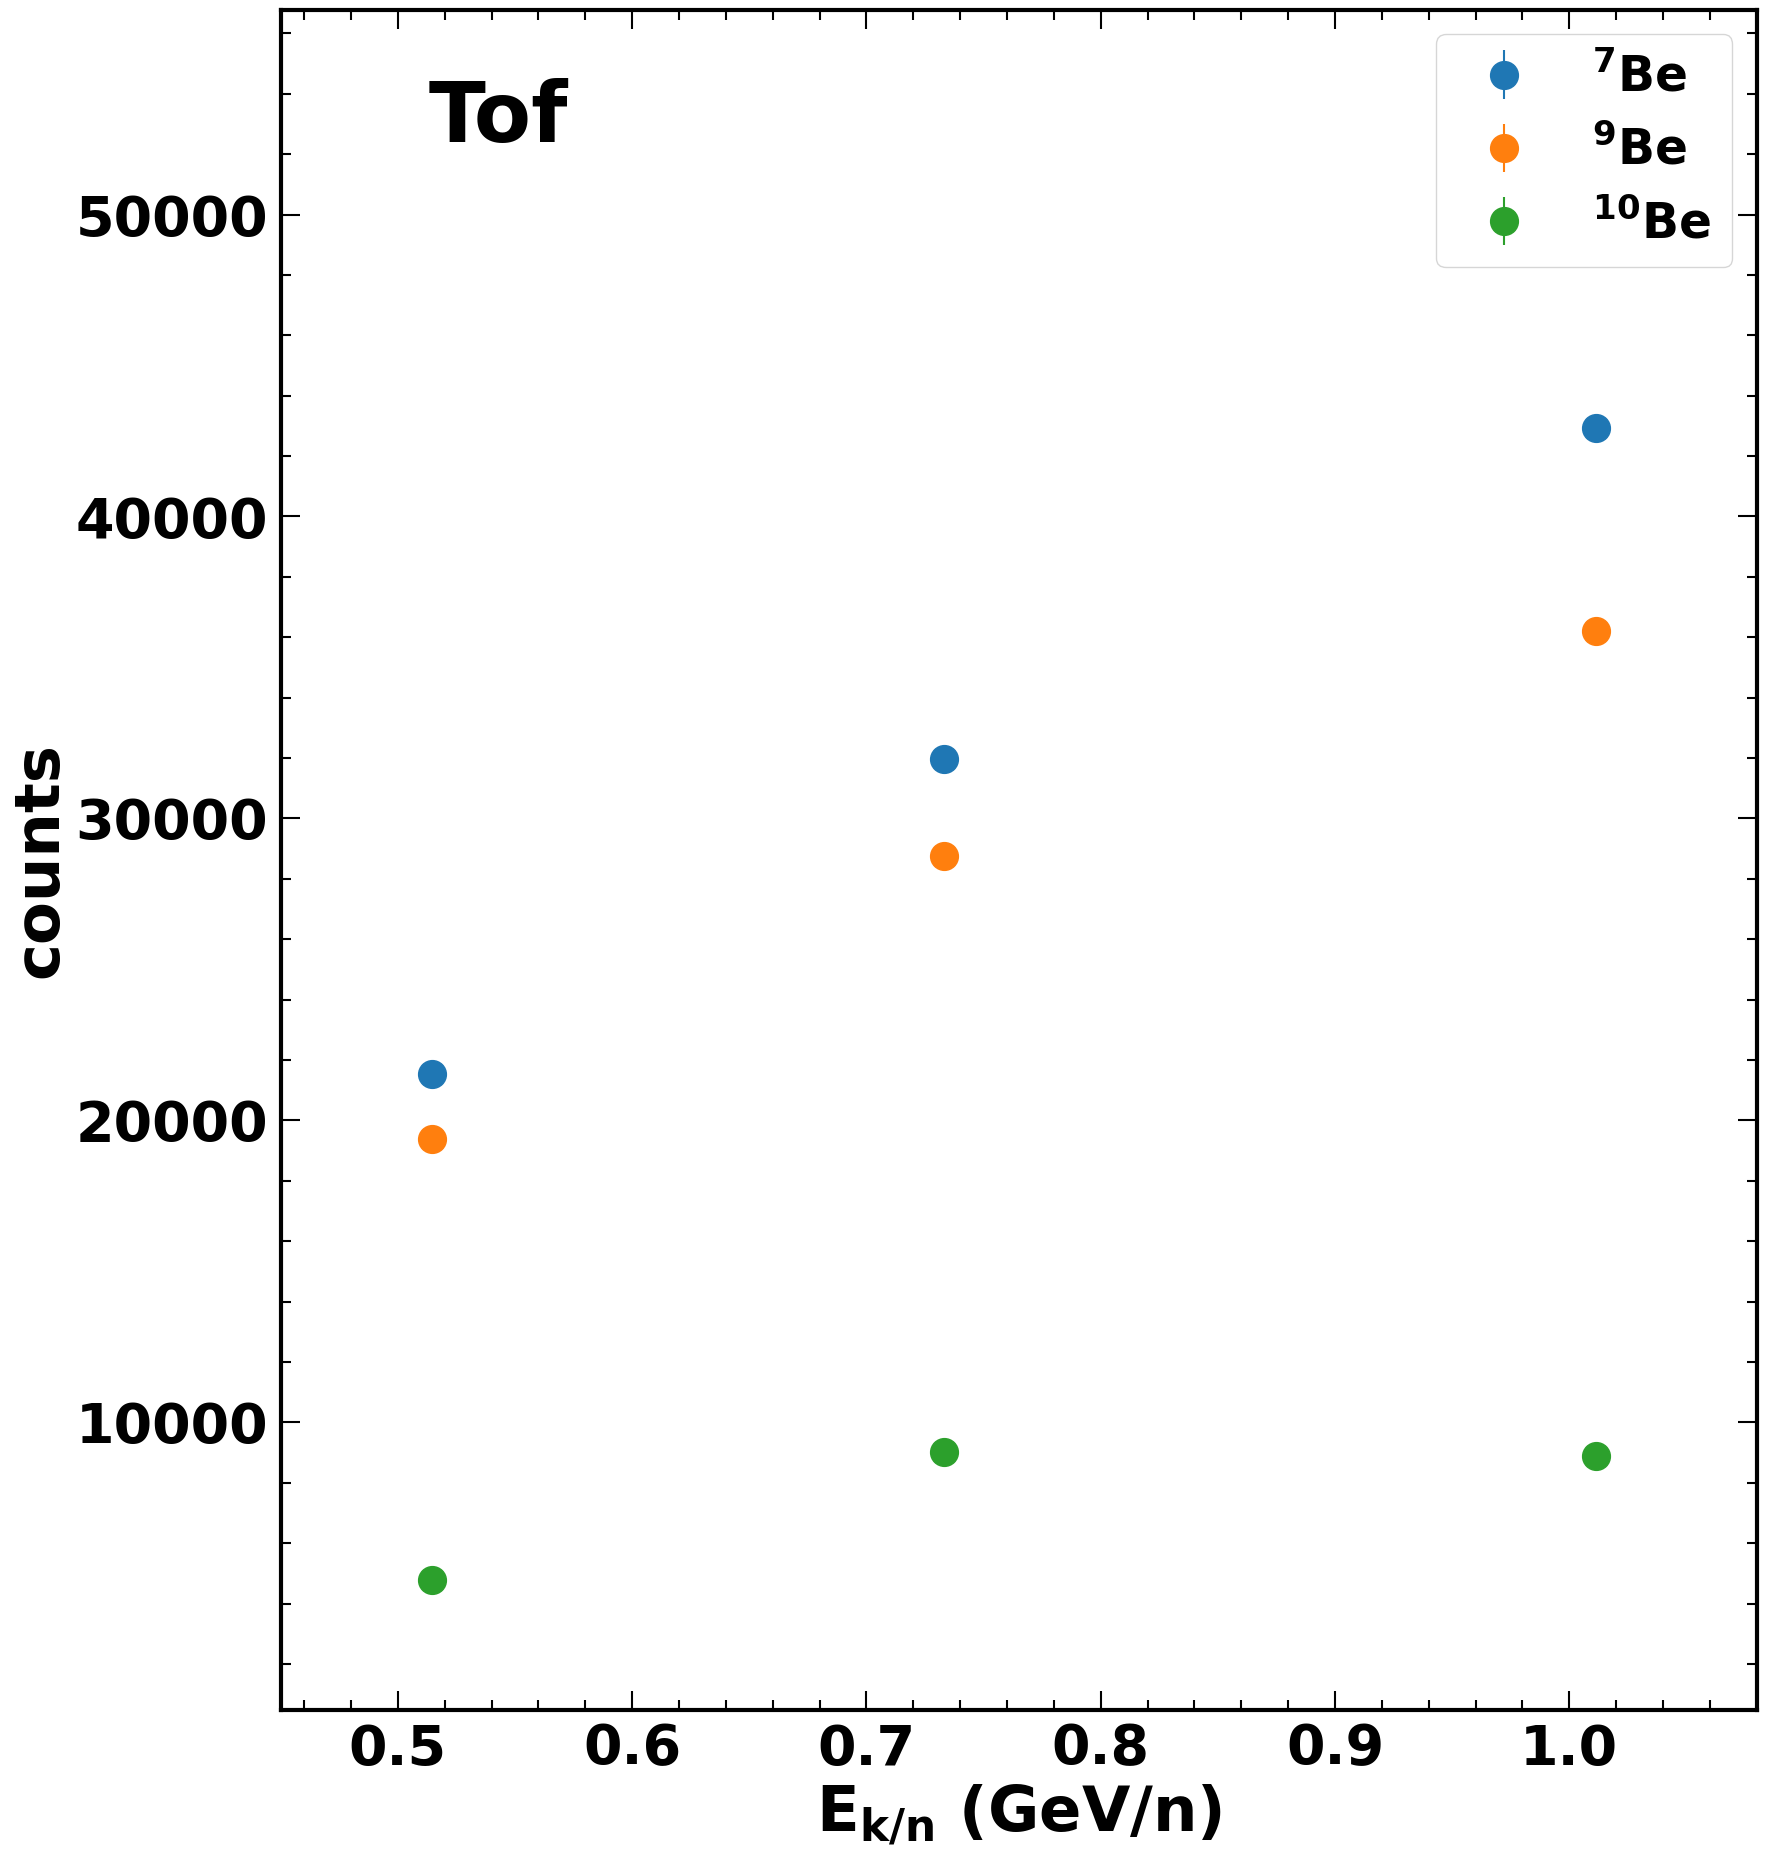

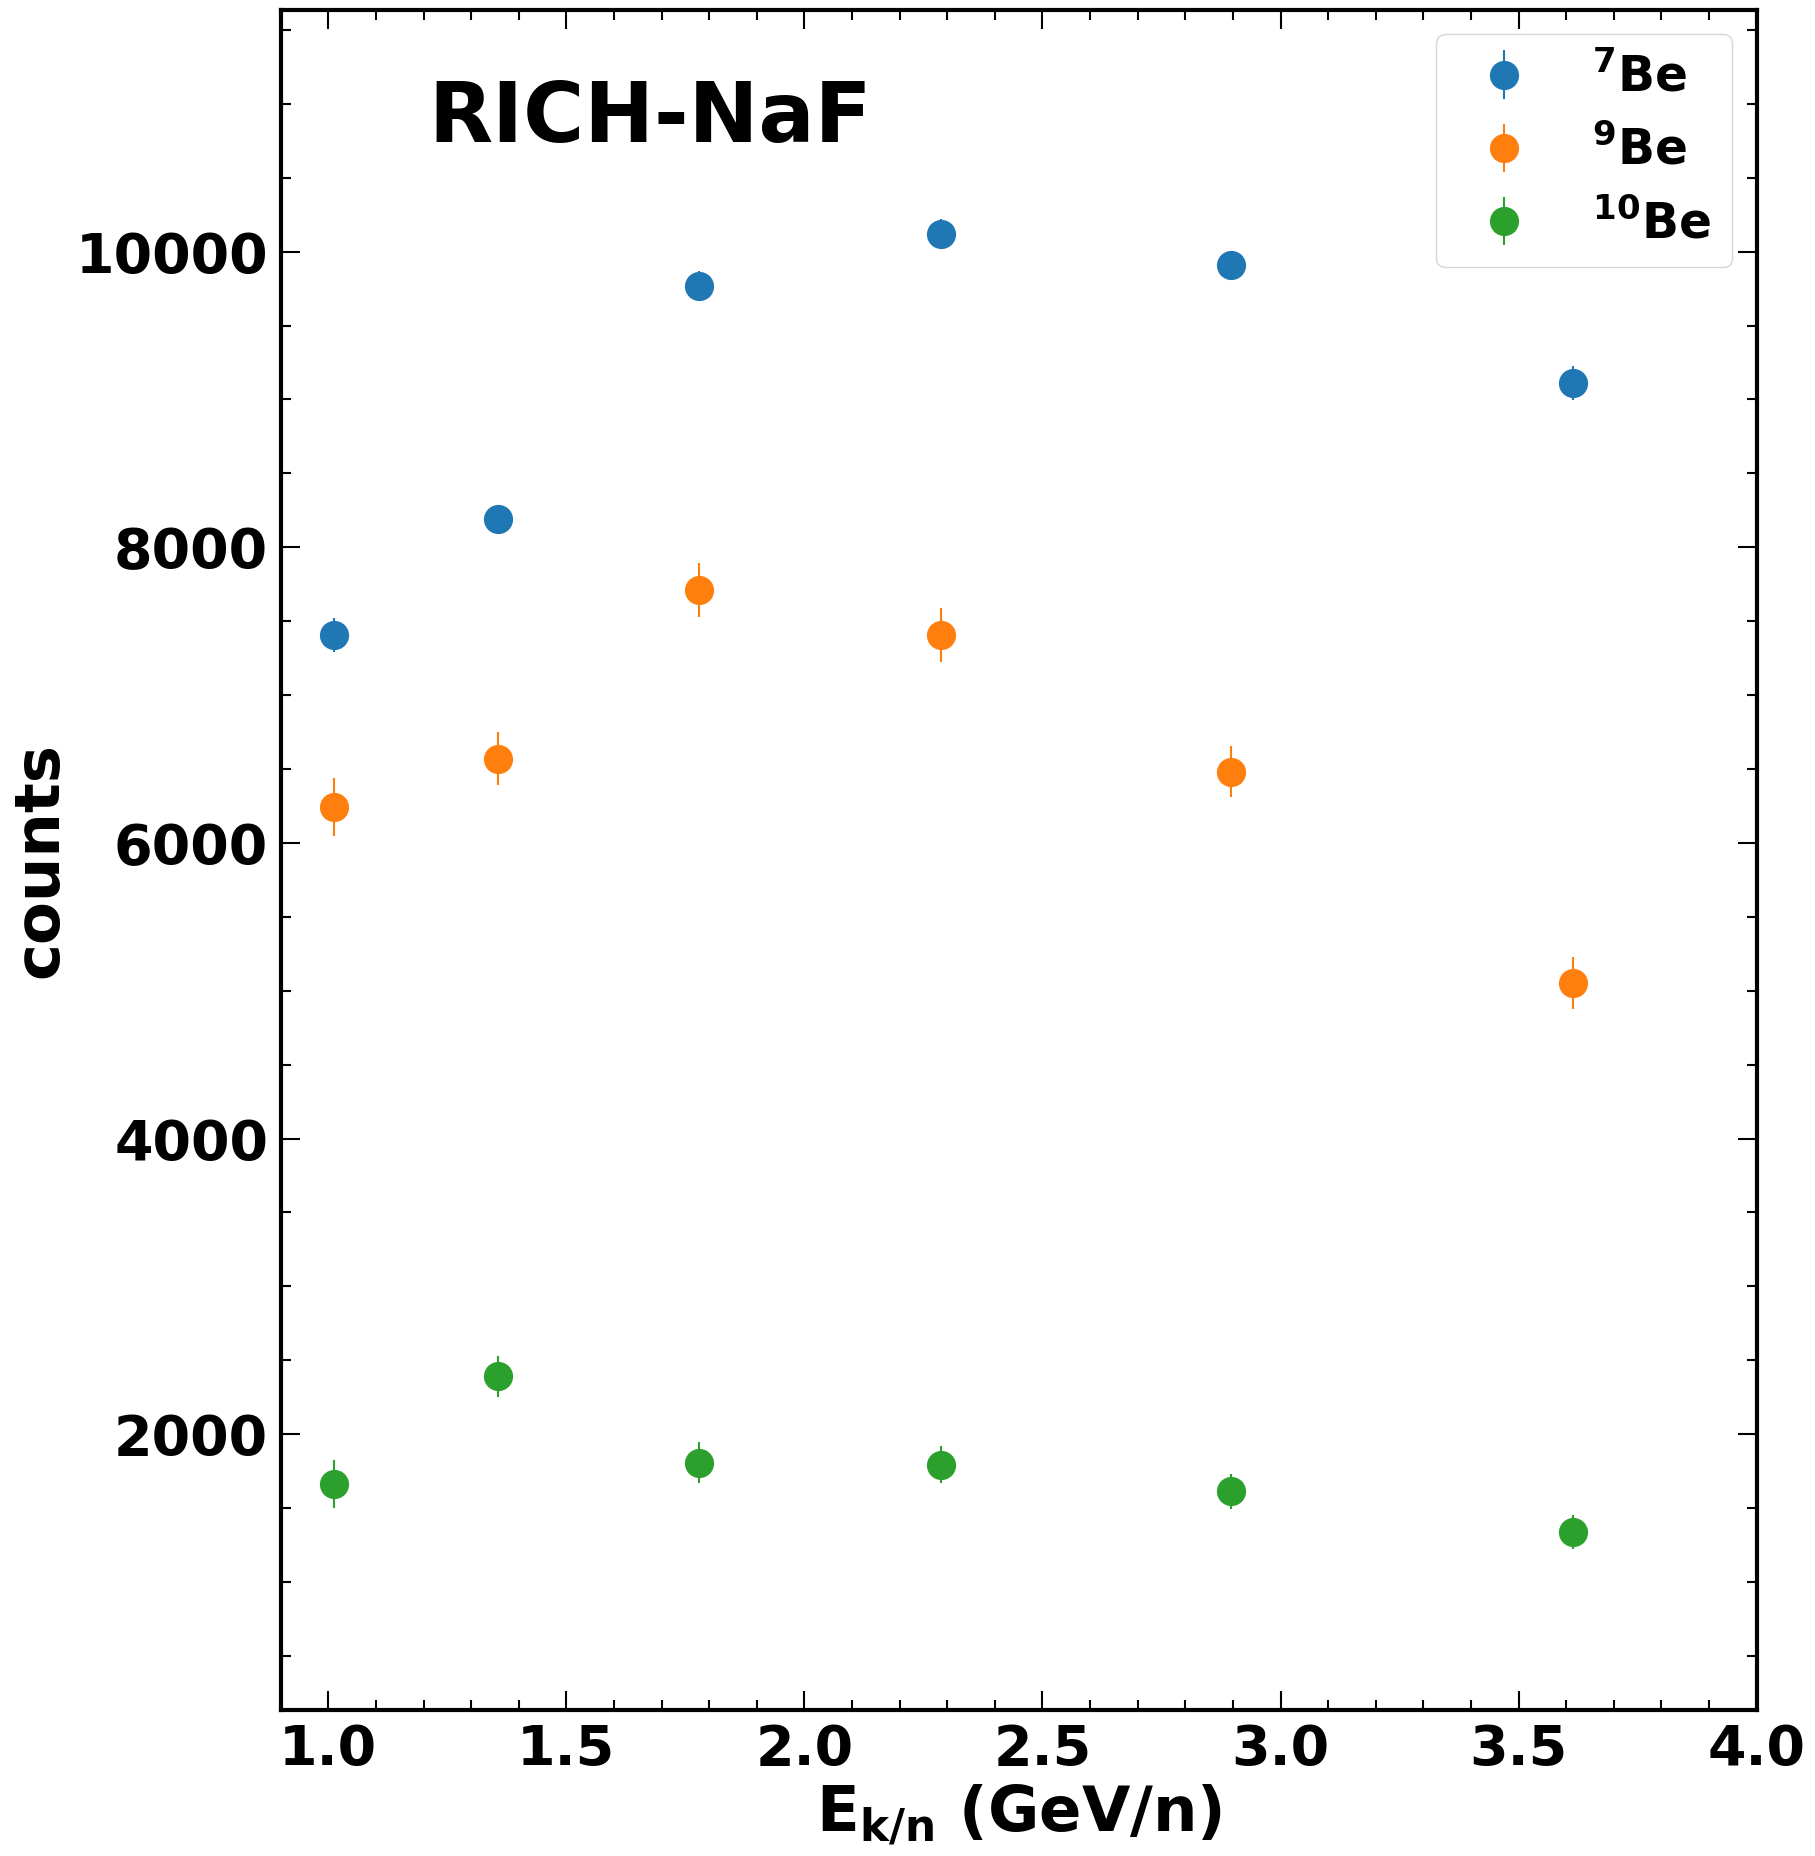

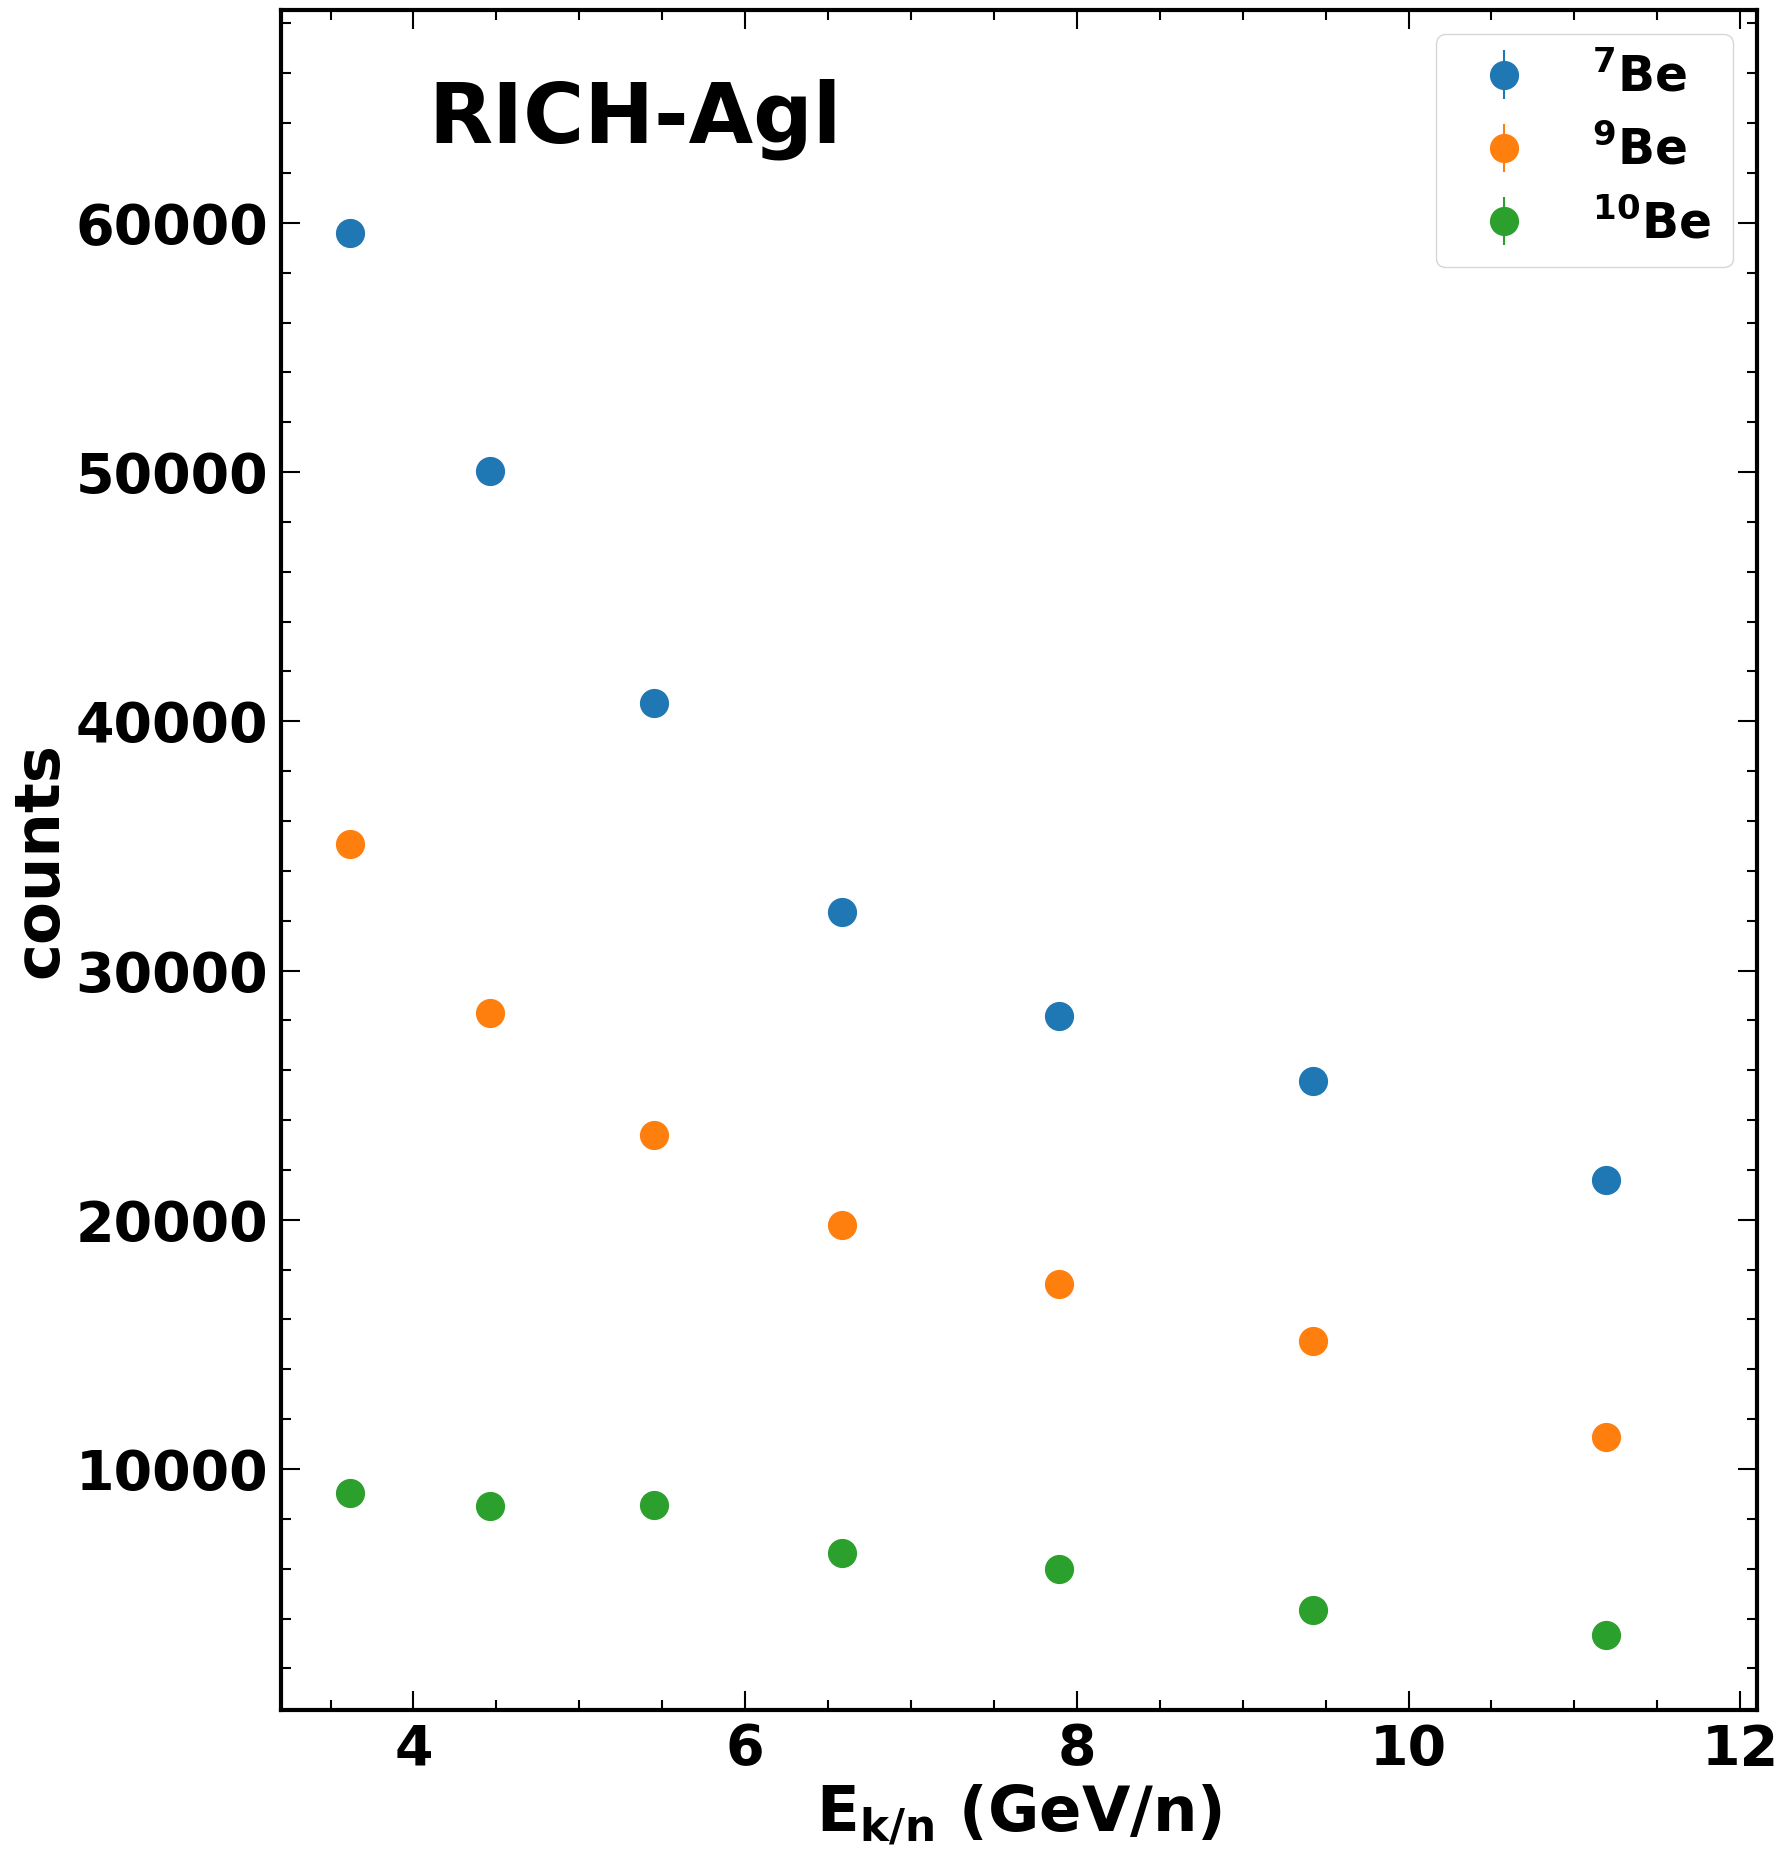

In [101]:

df_counts = np.load(f'{file_counts}')
#df_counts_compare = np.load(f'{filename_init}')
figSize = (22, 15)
graph_counts_fromfit_Opt = {dec: {} for dec in detectors}
graph_counts_sum = dict()
#graph_counts_compare = {dec: {} for dec in detectors}
#graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_Opt[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
       
        #graph_counts_fromfit_Opt[dec][iso] = slice_graph_by_value(graph_counts_fromfit_Opt[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')

plotvalue = {'Tof':[0.45, 1.08], 'NaF':[0.9, 4.0], 'Agl':[3.2, 12.1]}
decName = {'Tof': 'Tof', 'NaF': 'RICH-NaF', 'Agl': 'RICH-Agl'}
sum = 0
for dec in detectors:
       
    fig, ax1 = plt.subplots(figsize=(18, 20))                                                                                                            
    fig.subplots_adjust(left= 0.15, right=0.97, bottom=0.1, top=0.95) 
    for iso in isotopes: 
        plot_graph(fig, ax1, graph_counts_fromfit_Opt[dec][iso], color=ISOTOPES_COLOR[iso],  style="EP", xlog=False, ylog=False, scale=None, markersize=40, label=f'{ISO_LABELS[iso]} ')  
        sum += np.sum(graph_counts_fromfit_Opt[dec][iso].yvalues)
    ax1.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$') 
    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_ylabel('counts')
    
    ax1.legend( fontsize=35) 

        
    #ax1.set_xscale('log')
    
    ax1.set_xlim(plotvalue[dec])
    set_plot_style(ax1)
    ax1.set_ylim([0.1* min(graph_counts_fromfit_Opt[dec]['Be10'].yvalues), 1.15* max(graph_counts_fromfit_Opt[dec]['Be7'].yvalues)])

    #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax2.set_xticks(np.array([2, 4, 10]))
    ax1.text(0.1, 0.96, f'{decName[dec]}', fontsize=60, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    savefig_tofile(fig, plotdir, f"counts_fromfit_{dec}", show=True)
    print(plotdir)
    
print(sum)

/home/manbing/Documents/lithiumanalysis/scripts/tools/graphs.py:91: RuntimeWarning: invalid value encountered in divide
  return MGraph(xvalues=self.xvalues, yvalues=self.yvalues/other.yvalues, yerrs=calculate_ratioerrs(self.yvalues, other.yvalues, self.yerrs, other.yerrs), labels=self.labels)
/home/manbing/Documents/lithiumanalysis/scripts/tools/statistics.py:15: RuntimeWarning: invalid value encountered in divide
  return (a/b) * np.sqrt(1/a**2 * erra**2 + 1/b**2 * errb**2 - 2 * abs(corelation * erra * errb/(a * b)))
/home/manbing/Documents/lithiumanalysis/scripts/tools/statistics.py:15: RuntimeWarning: divide by zero encountered in divide
  return (a/b) * np.sqrt(1/a**2 * erra**2 + 1/b**2 * errb**2 - 2 * abs(corelation * erra * errb/(a * b)))



xvalues			yvalues			yerrs
0.37825			nan			nan
0.4631			nan			nan
0.5589999999999999			nan			nan
0.66835			nan			nan
0.79125			nan			nan
0.9302999999999999			nan			nan
1.08555			0.8595256599037887			0.08398090581379598
1.2570999999999999			1.0199835084913396			0.00547494069592999
1.44745			0.9165695566772893			0.00204614037057933
1.6566			1.0393407802285655			0.001733622934558269
1.8872			1.0405203871850919			0.0015038026761161215
2.1419			0.7769501882697739			0.00019974032727188866
2.42075			1.0203780770376902			2.0320754230319888e-05
2.7237			1.0371421398511962			1.633052566885018e-05
3.0534			1.0380985377736145			1.574941811638468e-05
3.4126000000000003			1.0369486670852839			1.5528064382796015e-05
3.8012500000000005			1.0372939548349538			1.554241558557397e-05
4.2221			1.022944397629143			1.523800573452876e-05
4.67795			1.0313873635514663			1.551312282771574e-05
5.16875			1.0283182970434734			1.5564042095590863e-05
5.70575			1.0314980753087786			1.528900370329965e-05
6.27195			1.02

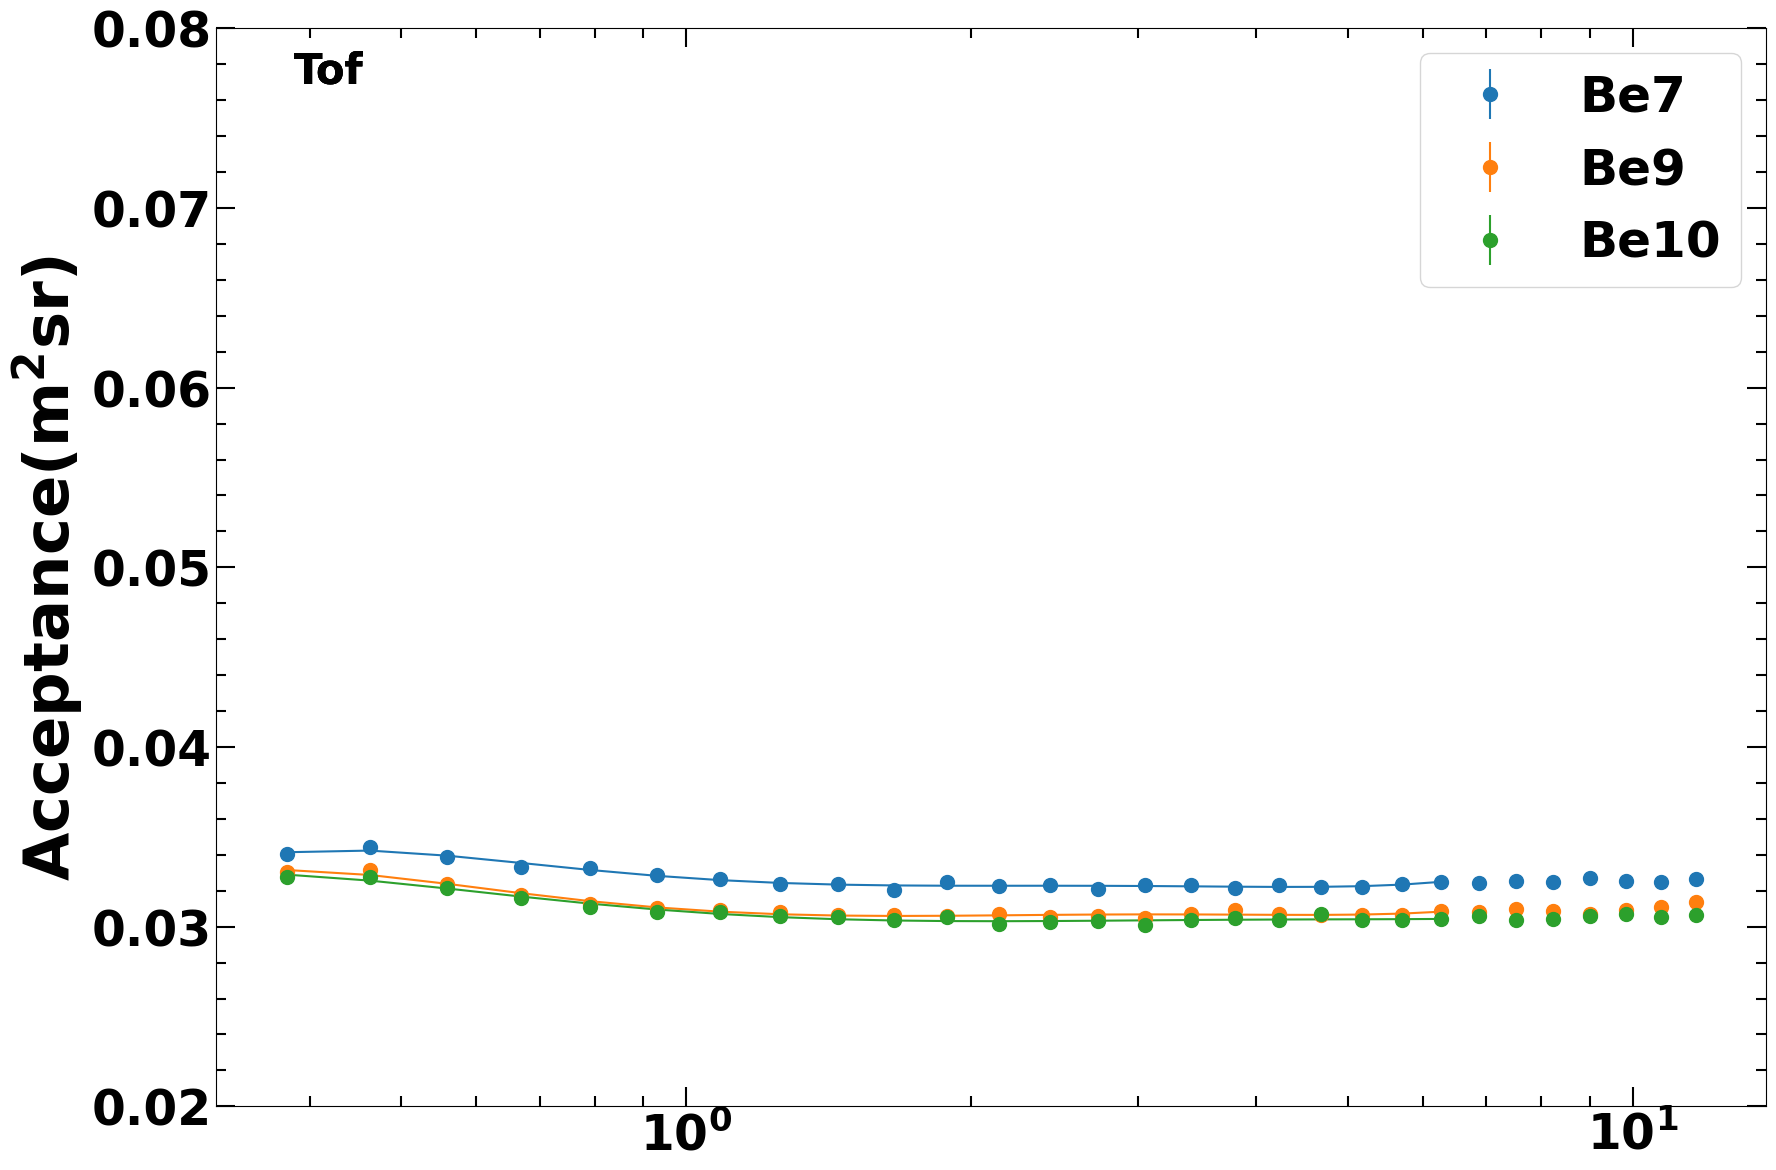

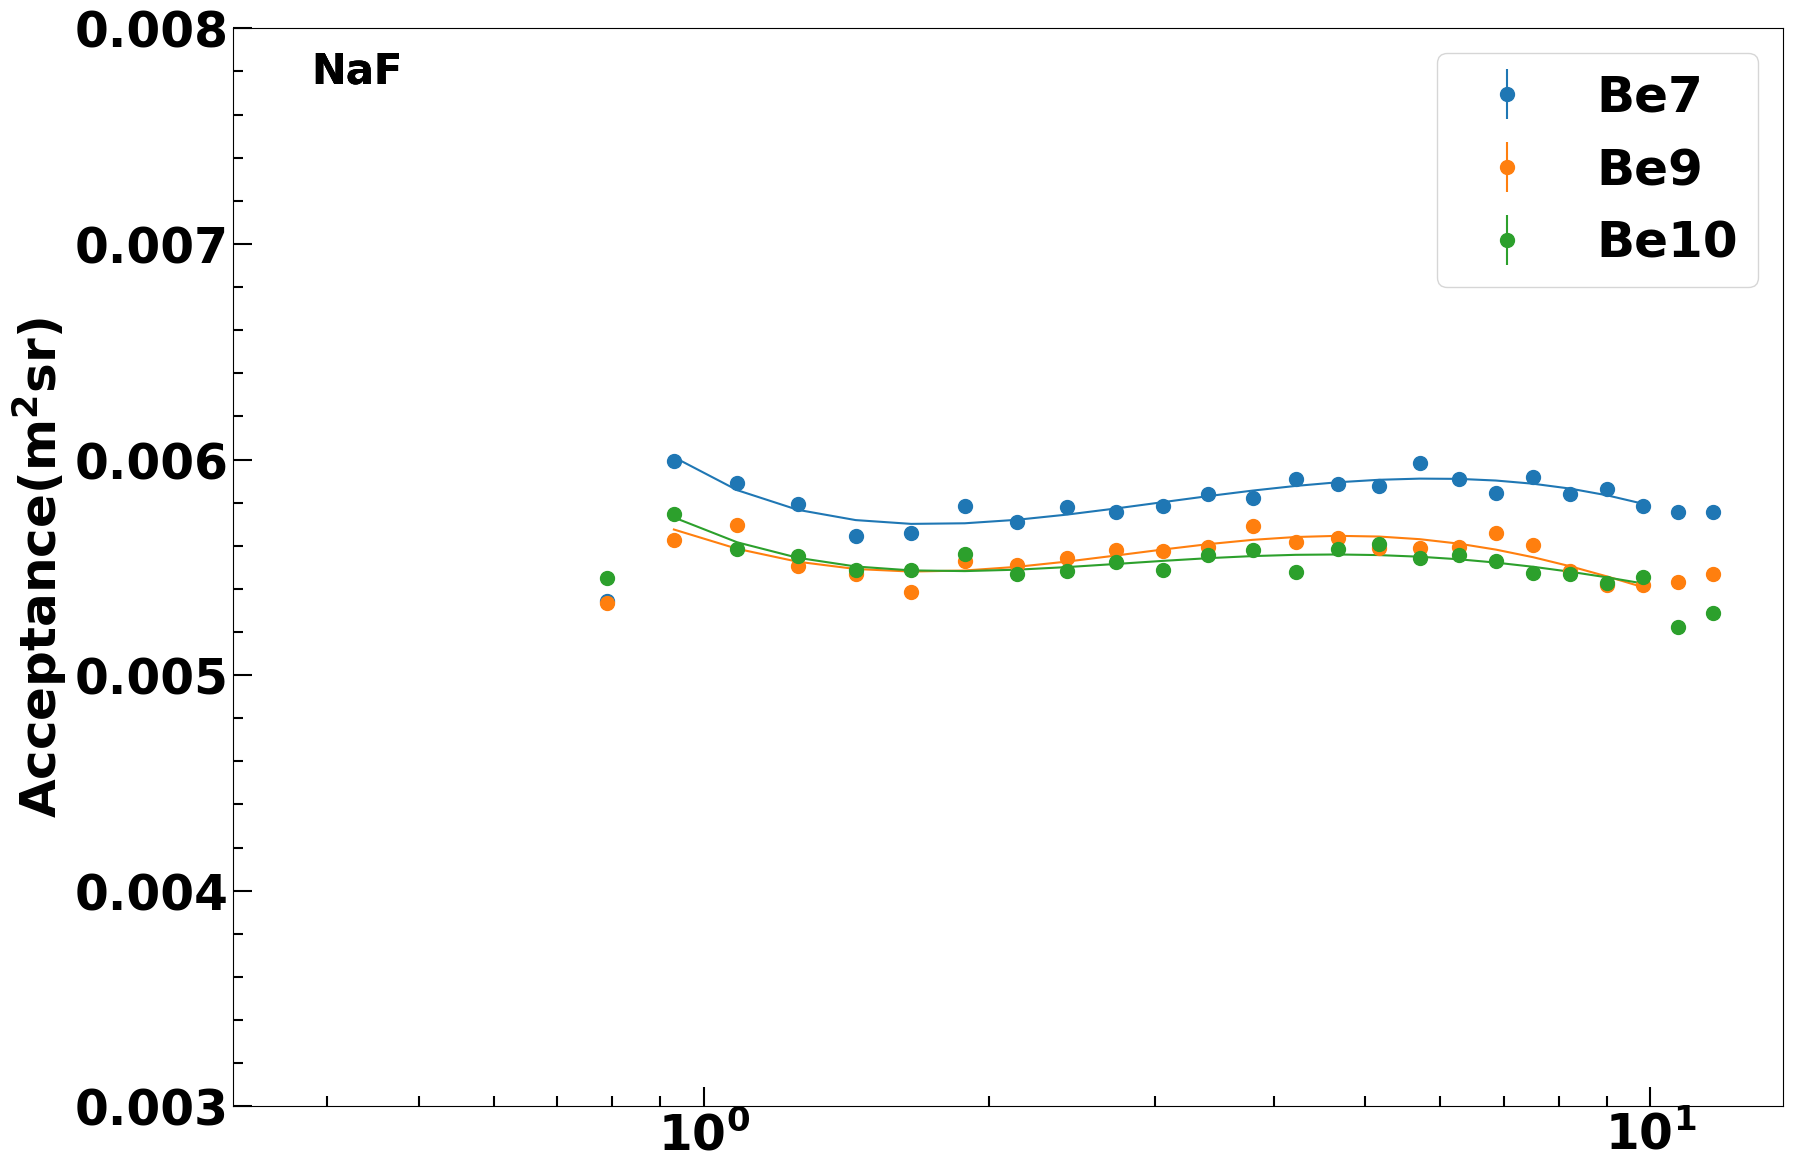

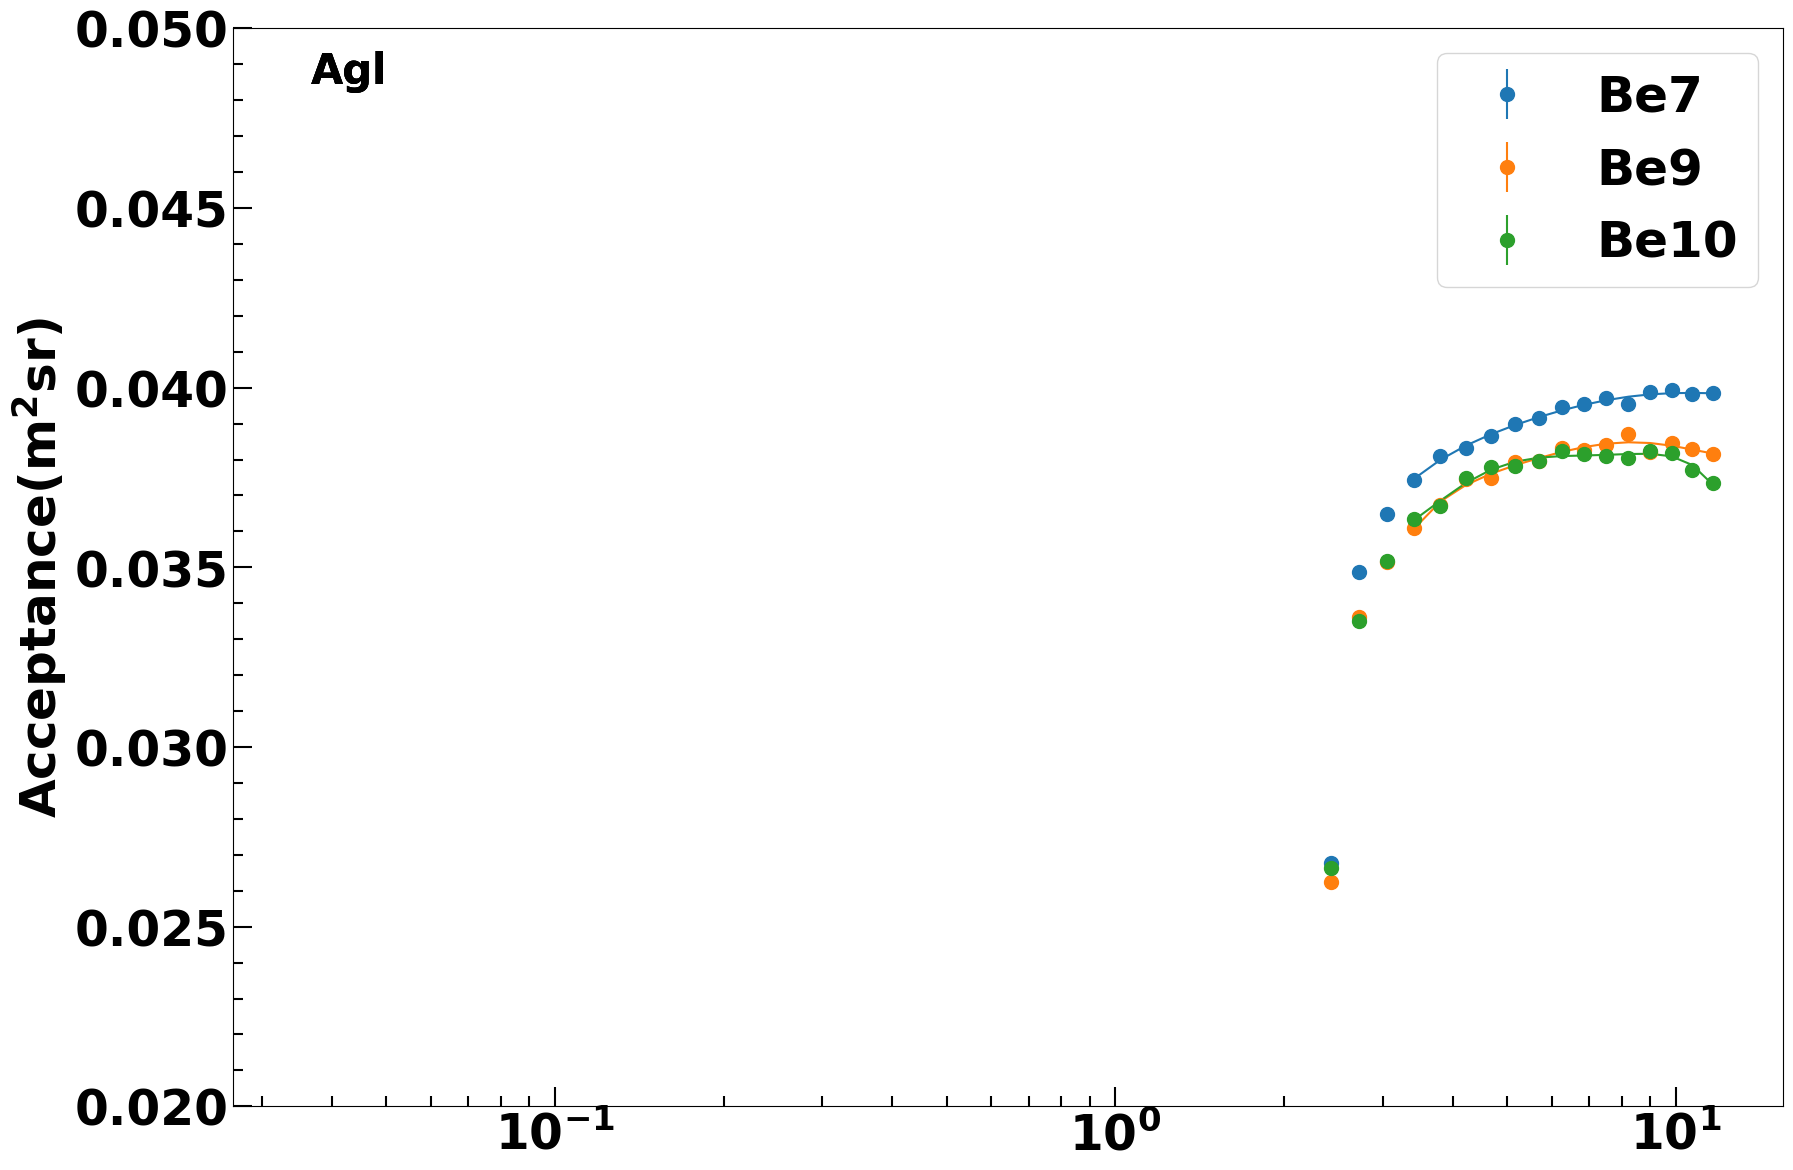

In [56]:
df_acc = np.load(f'{file_acc}')                                                                                                             
graph_acc = {dec: {iso: MGraph.from_file(df_acc, f"raw_acc_{dec}_{iso}") for iso in ISOTOPES[nuclei]} for dec in detectors}                                                                              
    
ylim_range = {'Tof': [0.02, 0.08], "NaF": [0.003, 0.008], "Agl": [0.02, 0.05]}
xlim_range = {'Tof': [0.2, 6], 'NaF':[0.95, 10], "Agl":[3.5, 12]}
subgraph_acc =  {dec: {} for dec in detectors}
spline_subgraph_acc =  {dec: {} for dec in detectors}
graph_acc_fromspline = {dec: {} for dec in detectors}
for dec in detectors:                                                                                                                                                                                          
    figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))                                                                                                        
    for i, iso in enumerate(ISOTOPES[nuclei]): 
        subgraph_acc[dec][iso] = slice_graph_by_value(graph_acc[dec][iso], xlim_range[dec])
        x_values = subgraph_acc[dec][iso].xvalues
        spline_subgraph_acc[dec][iso] = UnivariateSpline(np.log(subgraph_acc[dec][iso].xvalues),subgraph_acc[dec][iso].yvalues, k=5, s=5)  
        
        ax1.plot(x_values, spline_subgraph_acc[dec][iso](np.log(x_values)))
        #acc_corr = graph_acc[dec][iso].yvalues * graph_total_effcor_ekin[dec][iso].yvalues                                                                                                                     
        #graph_corrected_acc[dec][iso] = MGraph(xbinning["Ekin"].bin_centers[1:-1], acc_corr, graph_acc[dec][iso].yerrs)                                                                                                                                                                                                                                                                                                  
        plot_graph(figure, ax1, graph_acc[dec][iso], color=ISOTOPES_COLOR[iso], label=f"{iso}", style="EP", xlog=True, ylog=False, markersize=20)                                                                            
        #plot_graph(figure, ax1, graph_corrected_acc[dec][iso], color=ISOTOPES_COLOR[iso], label=f"{iso}", style="EP", xlog=True, ylog=False, markersize=20)                                                    
        ax1.legend()                                                                                                                                                                                                                                                                                                                                                                       
        ax1.set_xscale("log")   
        ax1.set_ylim(ylim_range[dec])
        ax1.set_ylabel(r"$\mathrm{Acceptance (m^{2} sr)}$")                                                                                                                                                    
        ax1.text(0.05, 0.98, f"{dec}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')                                                                                                                                                                                                                                                           
    savefig_tofile(figure, plotdir, f"Acc{nuclei}{dec}_{variable}_P7B1220", 1)                                                                                          
    
print(graph_acc['Agl']['Be7']/graph_acc['Agl']['Be9'])


xvalues			yvalues			yerrs
0.37825			0.0327848432467183			3.2137279144287423e-07
0.4631			0.03279094882344941			3.46334581423611e-07
0.5589999999999999			0.03217576713061122			3.5419807370432963e-07
0.66835			0.03157605200384526			3.645132858599652e-07
0.79125			0.031116664225678665			3.7625110195895487e-07
0.9302999999999999			0.030824425935536148			3.765422093905273e-07
1.08555			0.0308051373660258			3.92009345441447e-07
1.2570999999999999			0.030594904752302744			3.9653613782283675e-07
1.44745			0.030529444142614808			4.039874284295568e-07
1.6566			0.030375724060622663			4.1282709014997883e-07
1.8872			0.030510657964930722			4.1461465563627853e-07
2.1419			0.03015093589665314			4.1910996579963963e-07
2.42075			0.030276116967976198			4.260519841561241e-07
2.7237			0.030326956082652855			4.347435005192354e-07
3.0534			0.030080913205488117			4.3829151269836164e-07
3.4126000000000003			0.03036877802171917			4.440303908000631e-07
3.8012500000000005			0.030478833391433615			4.520337835436

/home/manbing/Documents/lithiumanalysis/scripts/tools/graphs.py:284: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  result = plot.errorbar(values_x, values_y, (errors_y_low, errors_y_high), fmt='.', color=color, label=label, **kwargs)


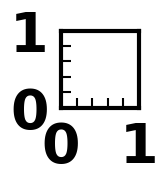

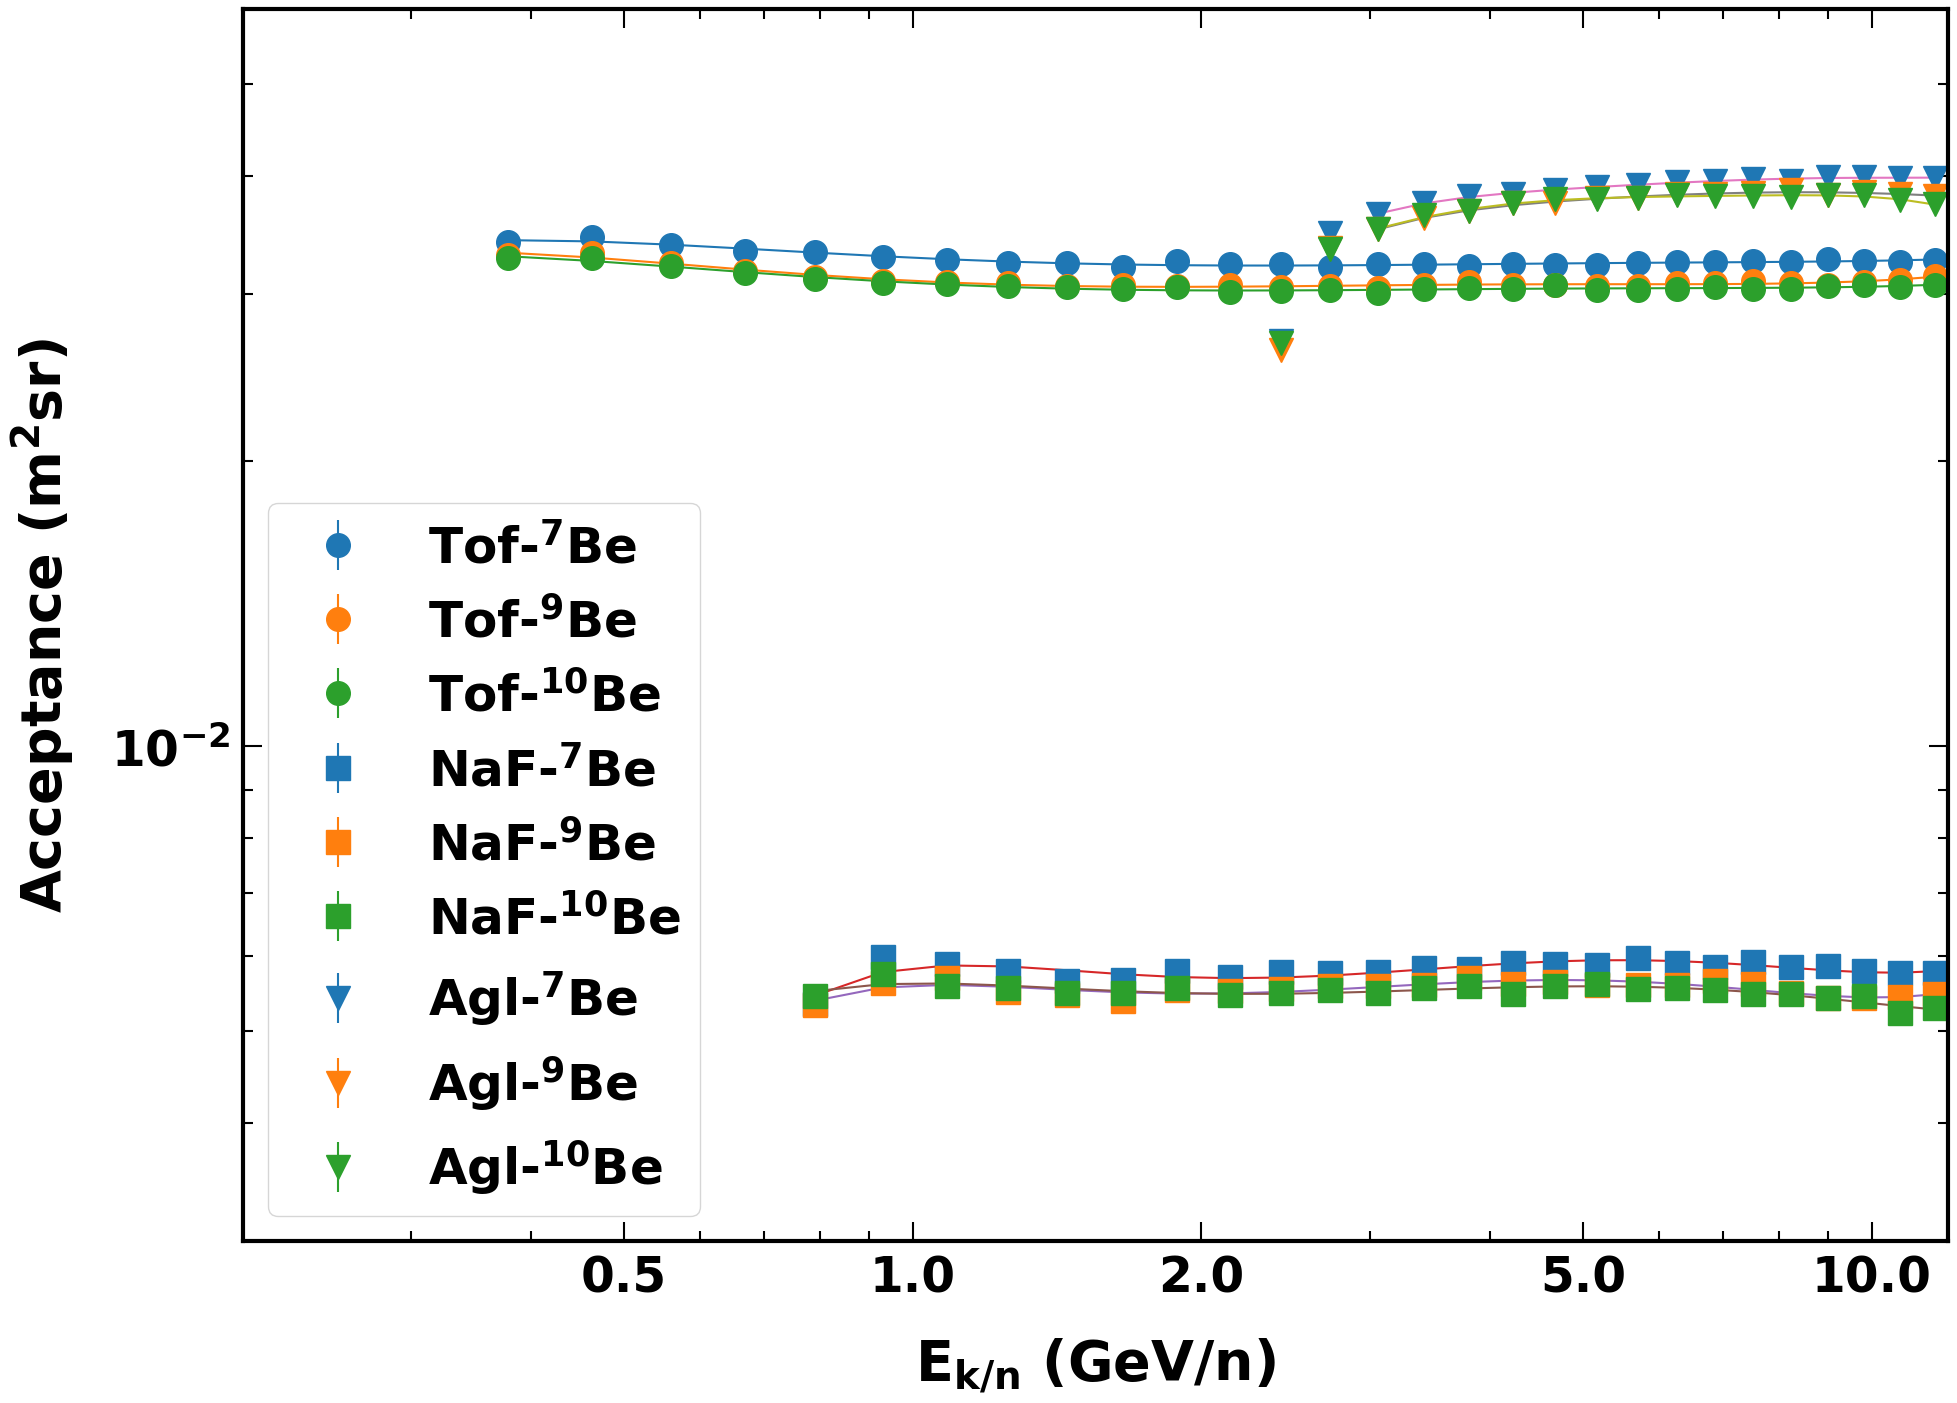

In [57]:
df_acc = np.load(f'{file_acc}')                                                                                                             
graph_acc = {dec: {iso: MGraph.from_file(df_acc, f"raw_acc_{dec}_{iso}") for iso in ISOTOPES[nuclei]} for dec in detectors}                                                                              
    
ylim_range = {'Tof': [0.02, 0.08], "NaF": [0.003, 0.008], "Agl": [0.02, 0.05]}
xlim_range = {'Tof': [0.2, 12], 'NaF':[0.8, 12], "Agl":[3.2, 12]}
subgraph_acc =  {dec: {} for dec in detectors}
spline_subgraph_acc =  {dec: {} for dec in detectors}
graph_acc_fromspline = {dec: {} for dec in detectors}
markerstyle ={'Tof': 'o', 'NaF':'s', 'Agl':'v'}
markerstyle2 ={'Be7': 'o', 'Be9':'s', 'Be10':'D'}
xdectext = {'Tof': 0.3, 'NaF': 0.4, 'Agl': 0.7}
ydectext = {'Tof': 0.9, 'NaF': 0.33, 'Agl': 0.75}
fig, ax0 = plt.subplots(1, 1, figsize= (1, 1))
set_plot_style(ax0)
figure, ax1 = plt.subplots(1, 1, figsize= FIGSIZE3)
set_plot_style(ax1)  
print(graph_acc['Tof'][iso])
for dec in detectors:                                                                                                                                                                                                                                                                                    
    for i, iso in enumerate(ISOTOPES[nuclei]): 
        subgraph_acc[dec][iso] = slice_graph_by_value(graph_acc[dec][iso], xlim_range[dec])
        x_values = subgraph_acc[dec][iso].xvalues
        spline_subgraph_acc[dec][iso] = UnivariateSpline(np.log(subgraph_acc[dec][iso].xvalues),subgraph_acc[dec][iso].yvalues, k=5, s=5)  
        
        ax1.plot(x_values, spline_subgraph_acc[dec][iso](np.log(x_values)))                                                                                                                                                                                                                                                       
        plot_graph(figure, ax1, graph_acc[dec][iso], color=ISOTOPES_COLOR[iso], label=f"{dec}-{ISO_LABELS[iso]}", style="EP", xlog=True, ylog=False, marker=markerstyle[dec], markersize=17)         
        SetAx1Axis(ax1, r'$\mathrm{E_{k/n} \ (GeV/n)}$', r"$\mathrm{Acceptance \ (m^{2} sr)}$", 
                   TEXTSIZE, xlimrange=[0.2, 12], ylimrange=[0.003, 0.06], custom_ticks=None, 
                   custom_tickslabels=None, gridx=False, gridy=False, setylog=True, setxlog=True)
                                                                                                                                                                                                                                                             
    ax1.legend() 
    print(plotdir)
    ax1.set_xticks([0.5, 1, 2, 5, 10])                                                                                                                                                                      
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())   
savefig_tofile(figure, plotdir, f"Acc{nuclei}alldec_{variable}_P8B1236", 1)                                                                                          
    

is 10yr?: False
is 10yr?: False
is 10yr?: False
/home/manbing/Documents/lithiumanalysis/slides/plots_16May
/home/manbing/Documents/lithiumanalysis/slides/plots_16May
/home/manbing/Documents/lithiumanalysis/slides/plots_16May


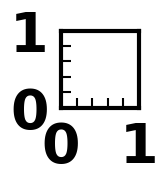

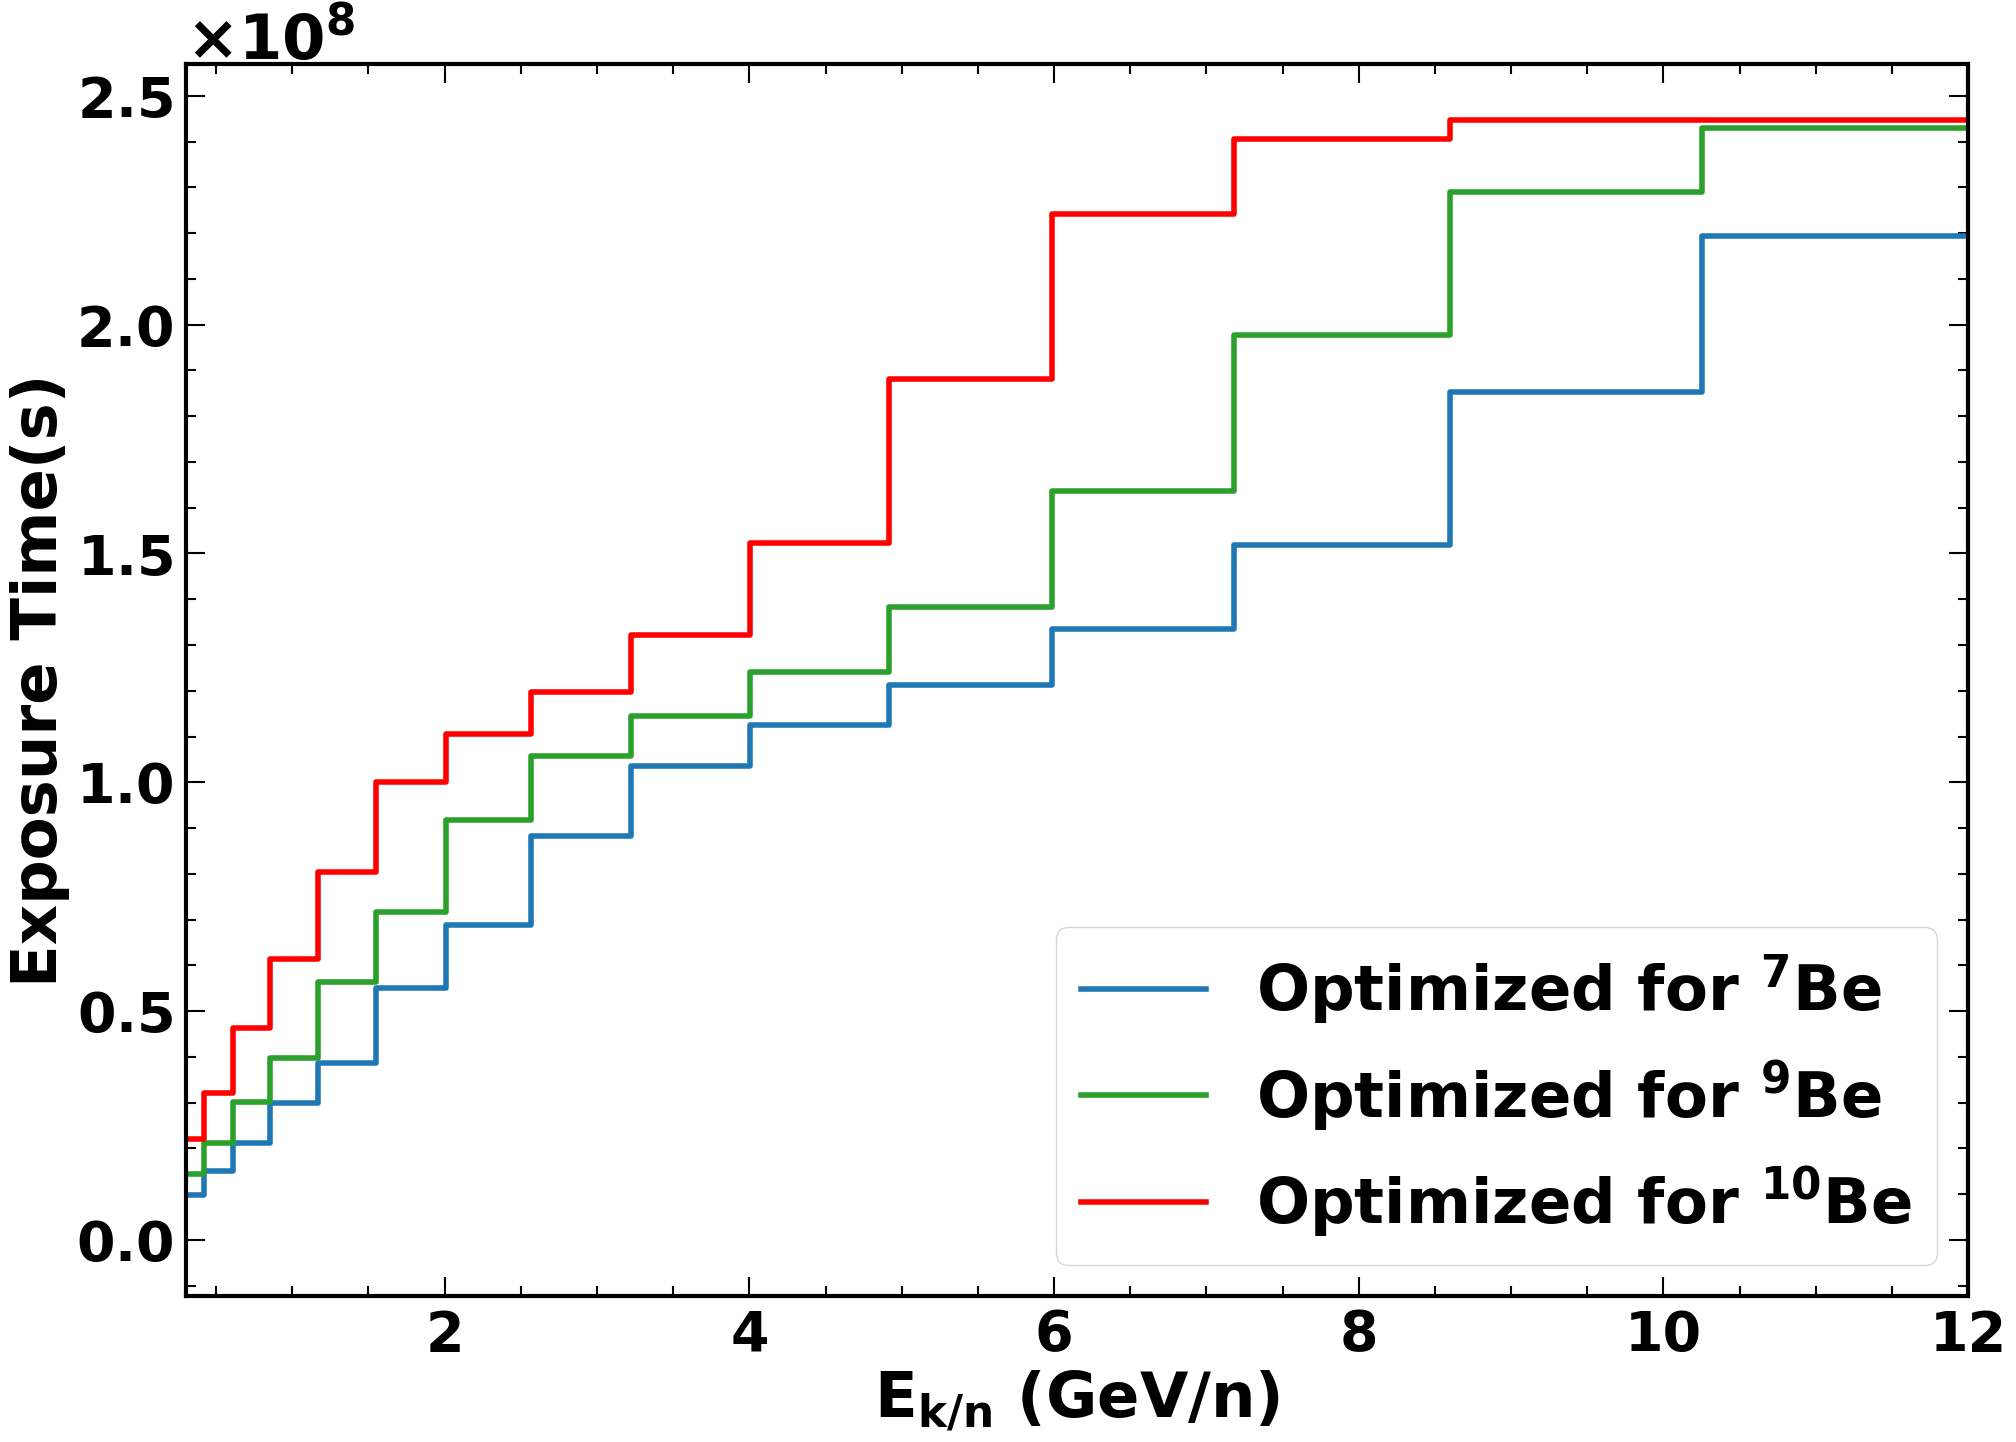

In [58]:
hist_time = dict()
graph_measuretime = dict()
This_COLOR = {'Be7': 'tab:blue', 'Be9': 'tab:green', 'Be10':'red'}
with uproot.open(file_expotime) as filetime:  
    for iso in isotopes:
        print('is 10yr?:', Time10Yr)
        hist_time[iso] = filetime[f'h_expo_rig_1_{isotopes_alias[iso]}_rebin_10yr' if Time10Yr else f'h_expo_rig_1_{isotopes_alias[iso]}_rebin']                                                                                                                                                    
        yexpotime = hist_time[iso].values()                           
        xvalue_time = hist_time[iso].axes[0].edges() 
        graph_measuretime[iso] = MGraph(get_bin_center(xvalue_time), yexpotime, np.zeros_like(yexpotime)) 

fig, ax0 = plt.subplots(1, 1, figsize= (1, 1))
set_plot_style(ax0)
figure, ax1 = plt.subplots(1, 1, figsize=(23, 16))
for i, iso in enumerate(ISOTOPES[nuclei]):                                                                                                                                                                                                                                                                                                                                                                    
    plot1d_step(figure, ax1, hist_time[iso].axes[0].edges(), hist_time[iso].values(), err=None, label_x="Ekin/n (GeV/n)", label_y="counts",  legend=f'Optimized for {ISO_LABELS[iso]}', col=None, legendfontsize=18, setlogx=False, setlogy=False, setscilabelx=False, setscilabely=True, figsize=(12, 9),  tick_length=14, tick_width=1.5, color=This_COLOR[iso], linewidth=4)
    #plot1d_step(figure, ax1, hist_time_JH[iso].axes[0].edges(), hist_time[iso].values(), err=None, label_x="Ek/n(GeV/n)", label_y="counts",  legend=None, col=None, legendfontsize=18, setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False, figsize=(12, 9),  tick_length=14, tick_width=1.5, color='black')
    ax1.legend() 
    set_plot_style(ax1)
    ax1.set_xlim([0.3, 12])
    ax1.set_ylabel('Exposure Time(s)',fontsize=45)
    ax1.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", fontsize=45)
    ax1.tick_params(axis='both', labelsize=40)
    #plotfile = '/home/manbing/Documents/lithiumanalysis/thesis/images/analysis/flux'
    plotfile = plotdir
    print(plotfile)
    savefig_tofile(figure, plotfile, f"measuring_time_{figname}", 1)   


['graph_total_effcor_tof_xvalues', 'graph_total_effcor_tof_yvalues', 'graph_total_effcor_tof_yerrs', 'graph_total_effcor_tof_labels', 'graph_total_effcor_naf_xvalues', 'graph_total_effcor_naf_yvalues', 'graph_total_effcor_naf_yerrs', 'graph_total_effcor_naf_labels', 'graph_total_effcor_agl_xvalues', 'graph_total_effcor_agl_yvalues', 'graph_total_effcor_agl_yerrs', 'graph_total_effcor_agl_labels']


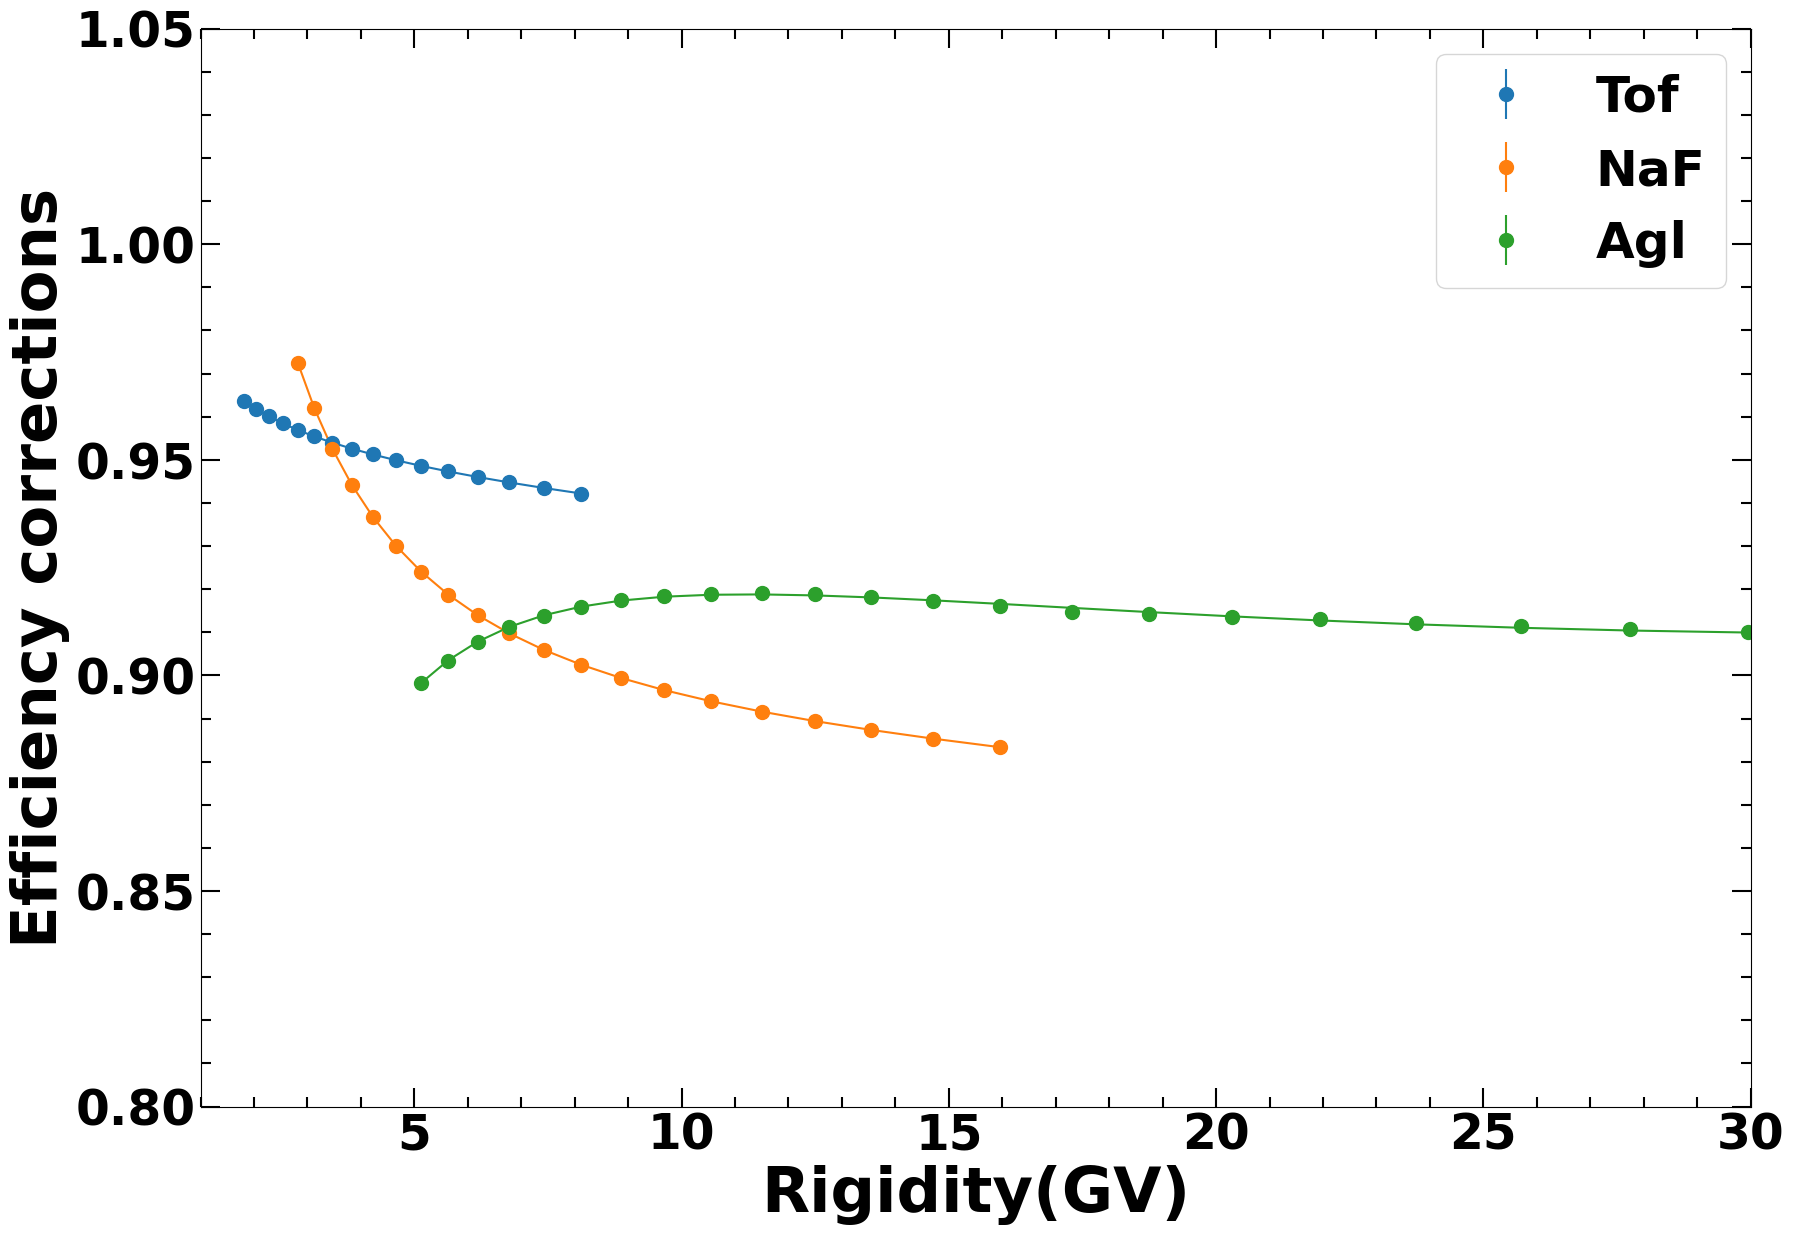

In [59]:
df_effcor = np.load(f'{file_effcor}')
print(list(df_effcor.keys()))
graph_total_effcor = dict()
spline_total_effcor = dict()
rigidity_range = {'Tof':[1.8, 8], 'NaF':[2.9, 16], 'Agl':[5, 36]}
for dec in detectors:
    graph_total_effcor[dec] = MGraph.from_file(df_effcor, f'graph_total_effcor_{detectors_alias[dec]}')
    graph_total_effcor[dec] = slice_graph_by_value(graph_total_effcor[dec], rigidity_range[dec])
    spline_total_effcor[dec] = UnivariateSpline(np.log(graph_total_effcor[dec].xvalues),graph_total_effcor[dec].yvalues, k=3, s=5)           

figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))         
for dec in detectors:
    plot_graph(figure, ax1, graph_total_effcor[dec], color=DETECTOR_COLOR[dec], label=f"{dec}", style="EP", xlog=False, ylog=False, markersize=20)
    ax1.plot(graph_total_effcor[dec].xvalues, spline_total_effcor[dec](np.log(graph_total_effcor[dec].xvalues)), '-', color=DETECTOR_COLOR[dec])
    ax1.set_xlim([1, 30])
    ax1.legend()
    ax1.set_ylim([0.8, 1.05])
    ax1.set_xlabel('Rigidity(GV)')
    ax1.set_ylabel('Efficiency corrections')
    
savefig_tofile(figure, plotdir, f"effcor_{variable}_P7B1220_vsR", 1)   
    

Tof Be7 [ 1.93933041  2.41952766  2.98999836  3.66570041  4.46178474  5.40330313
  6.51022215  7.80263311  9.31056618 11.07409409 13.07808626 15.3828294
 18.0884032  21.19484785]
Tof Be9 [ 2.49094849  3.10773178  3.84046568  4.70836265  5.73088313  6.94020455
  8.36197273 10.02199368 11.9588393  14.22398047 16.79798294 19.75828119
 23.23342132 27.22345498]
Tof Be10 [ 2.7677874   3.45311872  4.26728716  5.23164043  6.36780173  7.71152466
  9.29130524 11.13581751 13.28792018 15.8048045  18.66487633 21.95417606
 25.81553615 30.24901397]
NaF Be7 [ 1.93933041  2.41952766  2.98999836  3.66570041  4.46178474  5.40330313
  6.51022215  7.80263311  9.31056618 11.07409409 13.07808626 15.3828294
 18.0884032  21.19484785]
NaF Be9 [ 2.49094849  3.10773178  3.84046568  4.70836265  5.73088313  6.94020455
  8.36197273 10.02199368 11.9588393  14.22398047 16.79798294 19.75828119
 23.23342132 27.22345498]
NaF Be10 [ 2.7677874   3.45311872  4.26728716  5.23164043  6.36780173  7.71152466
  9.29130524 11.135

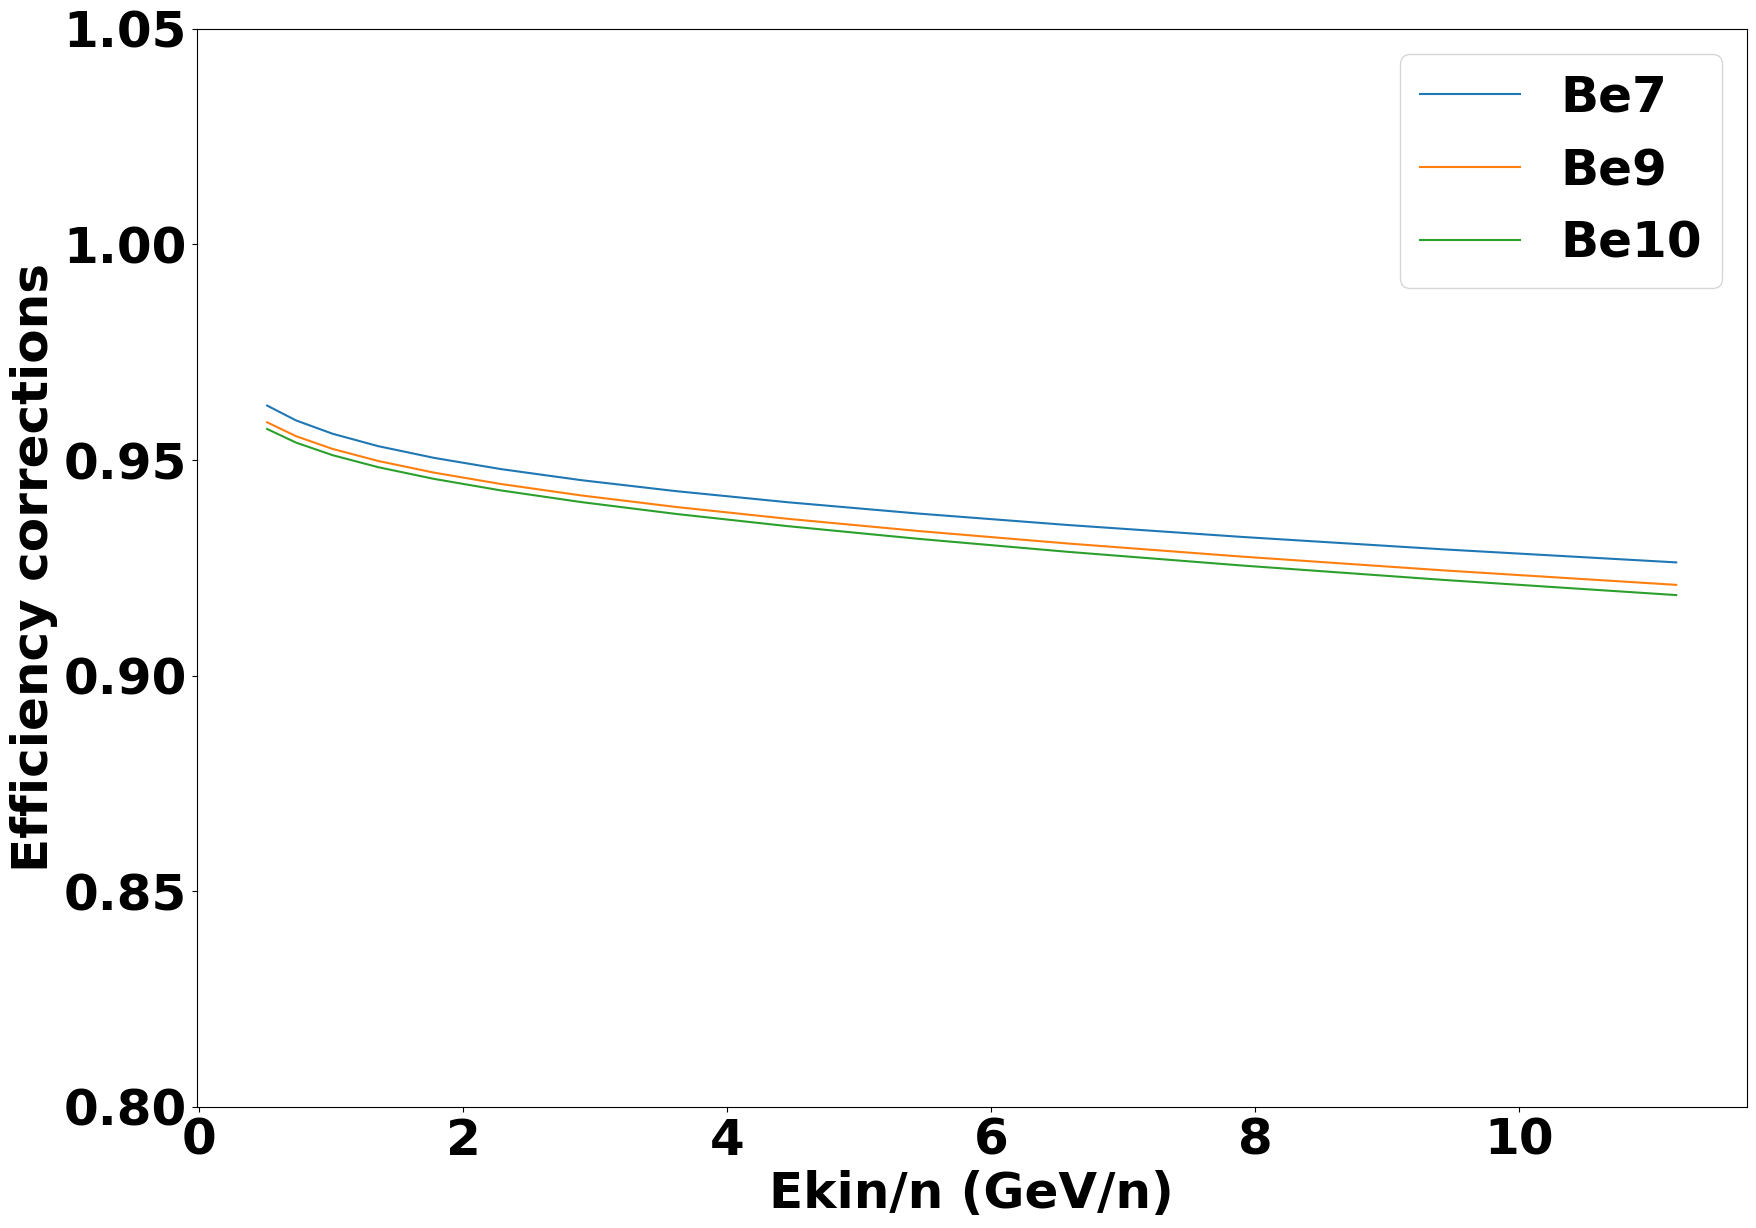

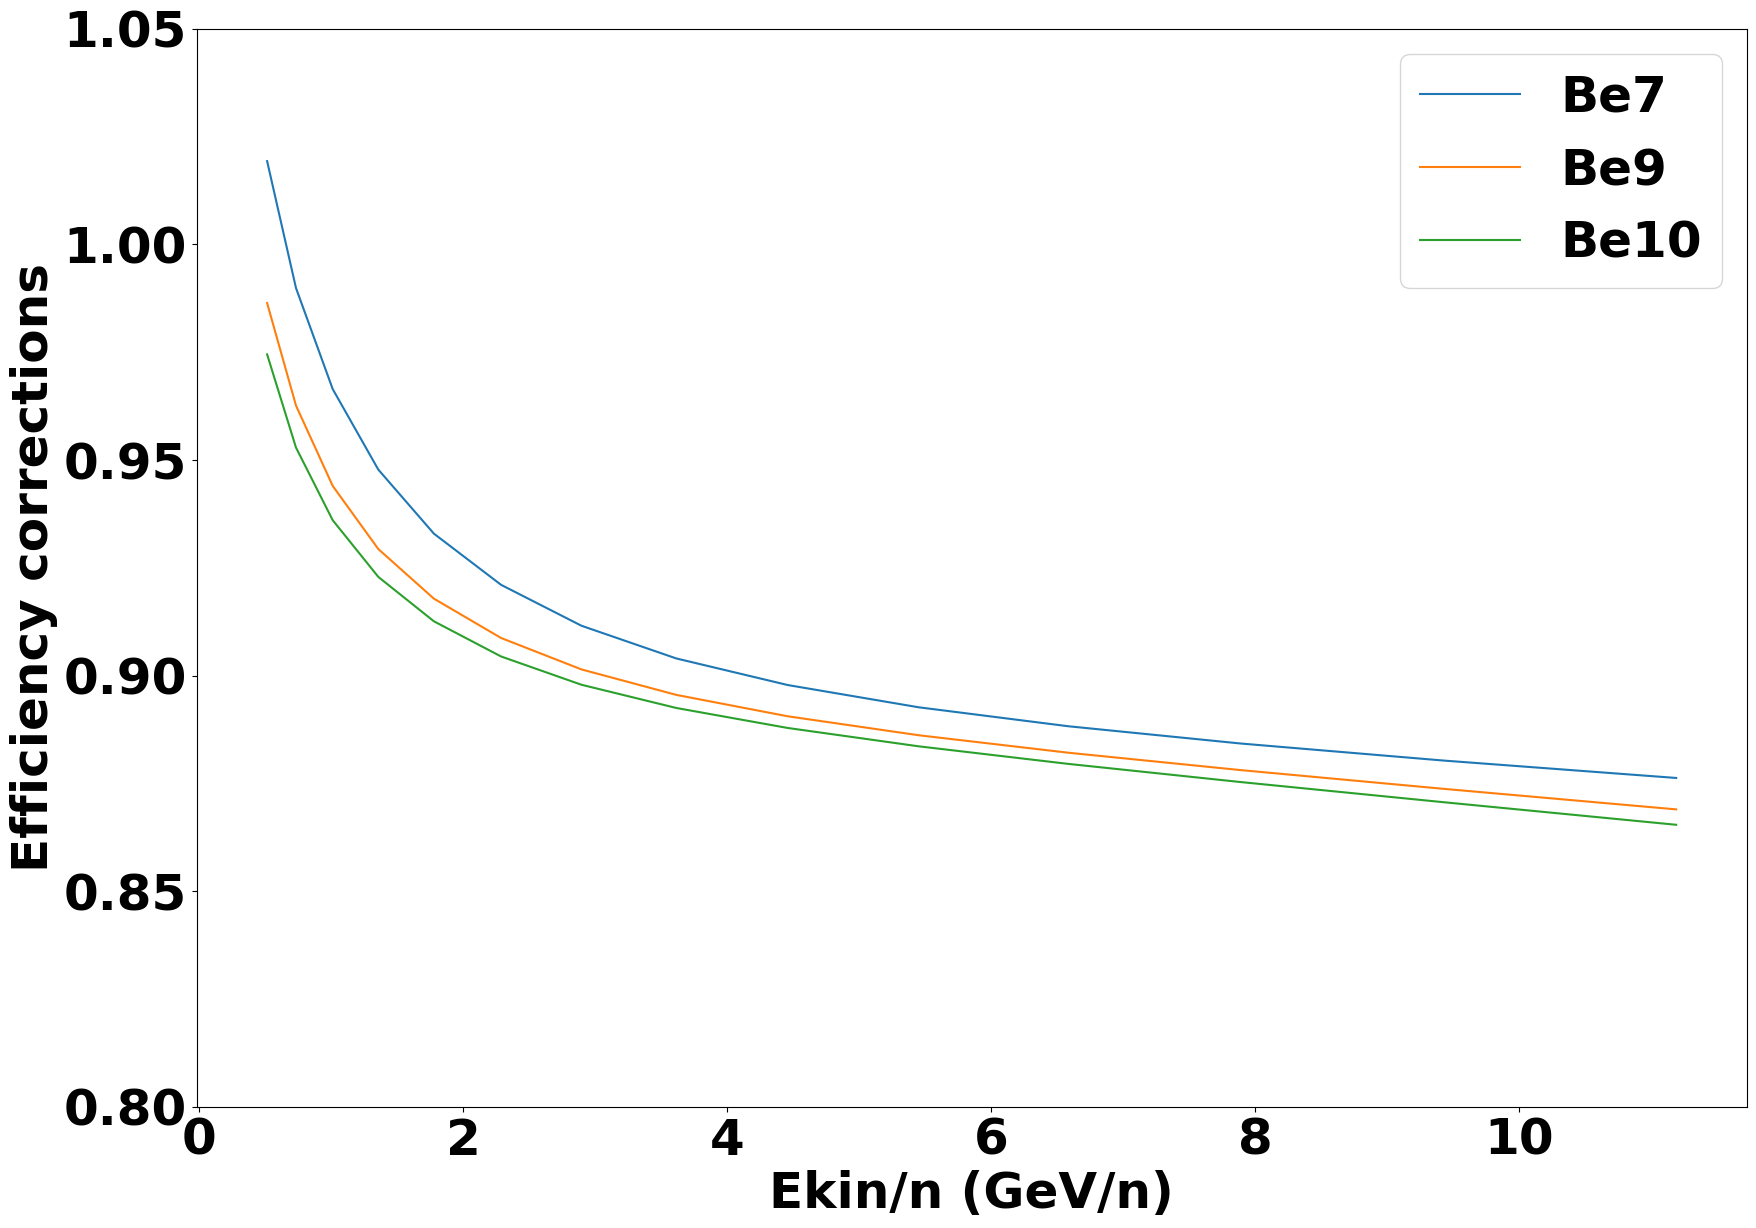

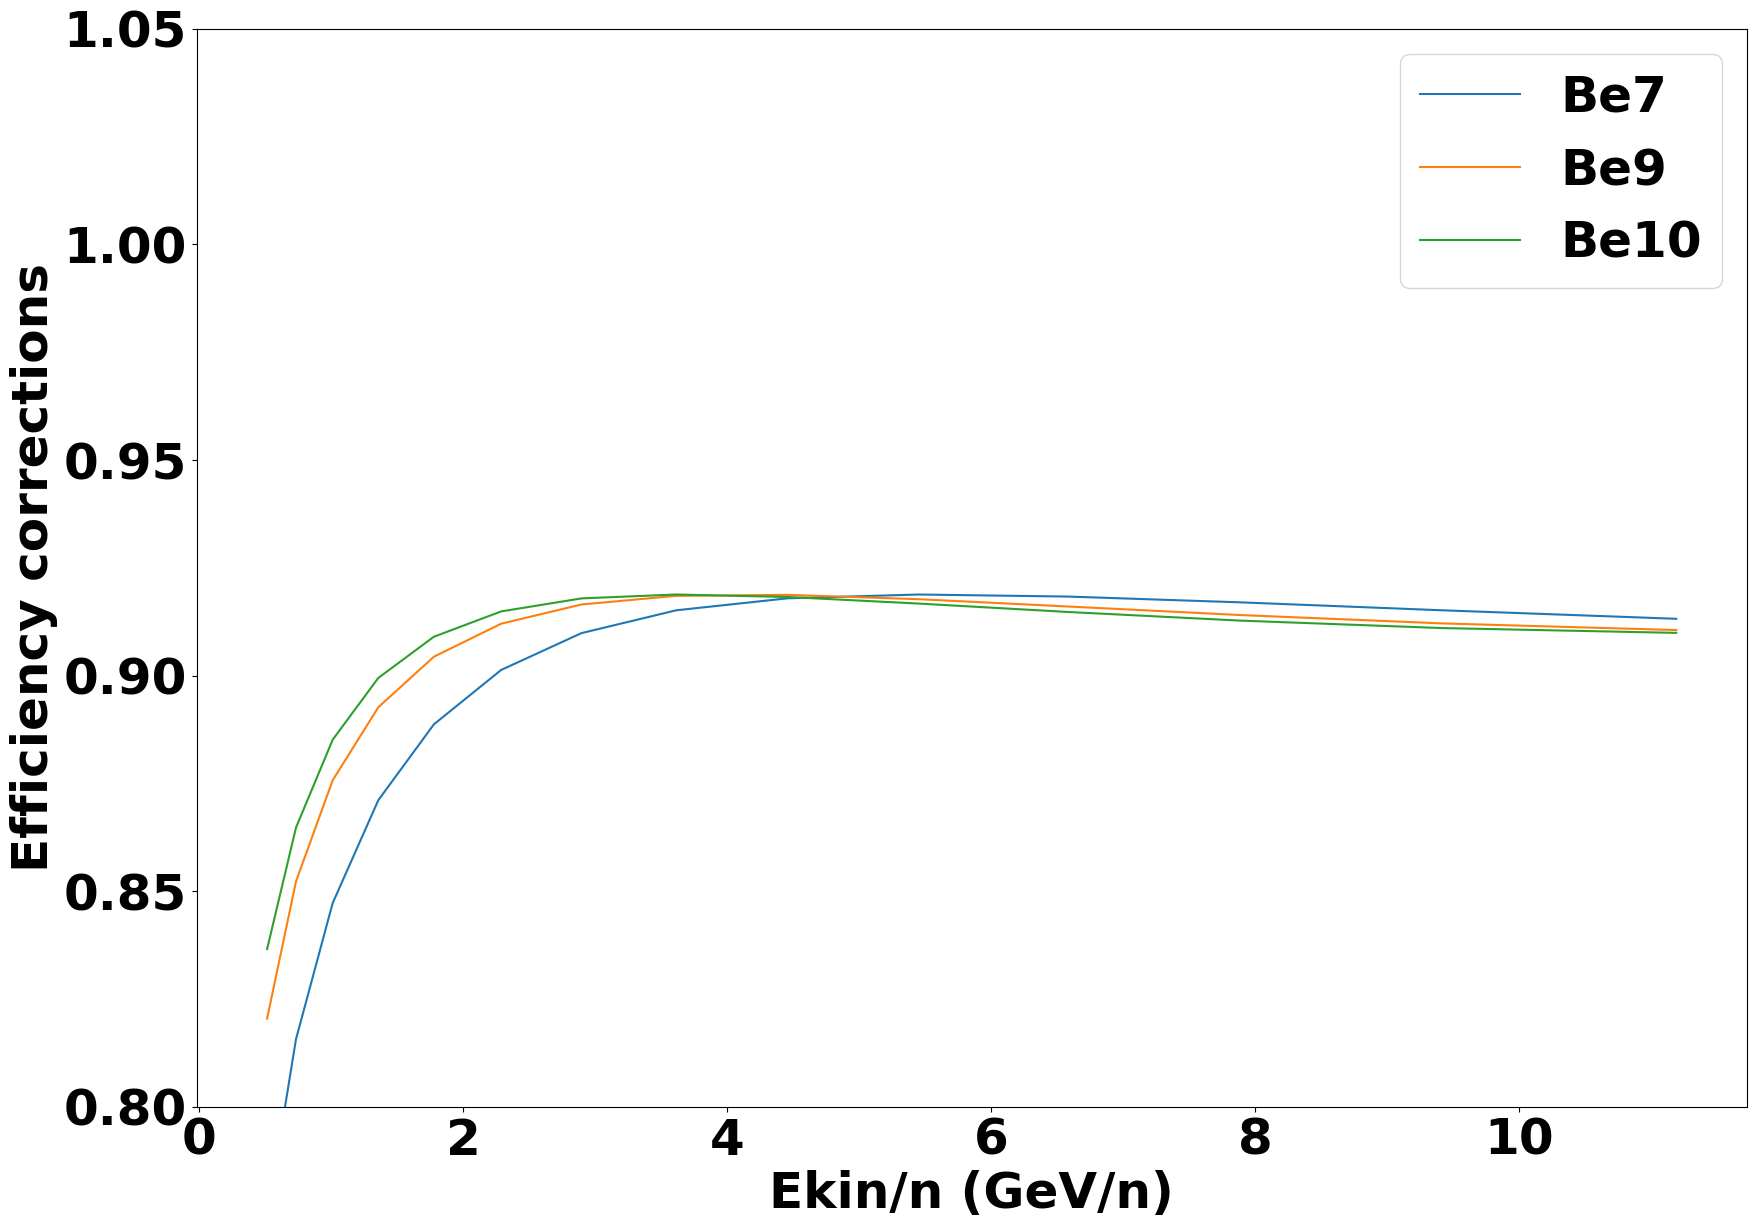

In [60]:
graph_total_effcor_ekin = {dec: dict() for dec in detectors} 

xrigidity_from_ekin = dict()     
eff_cor_ekin = dict()
for dec in detectors:                                                                                                                                                                                          
    for iso in ISOTOPES[nuclei]:                                                                                                                                                                               
        xrigidity_from_ekin[iso] = calc_rig_from_ekin(xbinning.bin_centers[1:-1], ISOTOPES_MASS[iso], NUCLEI_CHARGE[nuclei])                                                                           
        eff_cor_ekin[dec] = spline_total_effcor[dec](np.log(xrigidity_from_ekin[iso]))  
        print(dec, iso, xrigidity_from_ekin[iso])
        graph_total_effcor_ekin[dec][iso] = MGraph(xbinning.bin_centers[1:-1], eff_cor_ekin[dec], np.zeros_like(eff_cor_ekin[dec]))  
        

for dec in detectors:
    figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))   
    #plot_graph(figure, ax1, graph_total_effcor_ekin[dec], color=DETECTOR_COLOR[dec], label=f"{dec}", style="EP", xlog=False, ylog=False, markersize=20)
    for iso in isotopes:
        ax1.plot(graph_total_effcor_ekin[dec][iso].xvalues, graph_total_effcor_ekin[dec][iso].yvalues, '-', color=ISOTOPES_COLOR[iso], label=f'{iso}')
        #ax1.set_xlim([1, 30])
        ax1.legend()
        ax1.set_ylim([0.8, 1.05])
        ax1.set_xlabel('Ekin/n (GeV/n)')
        ax1.set_ylabel('Efficiency corrections')
    

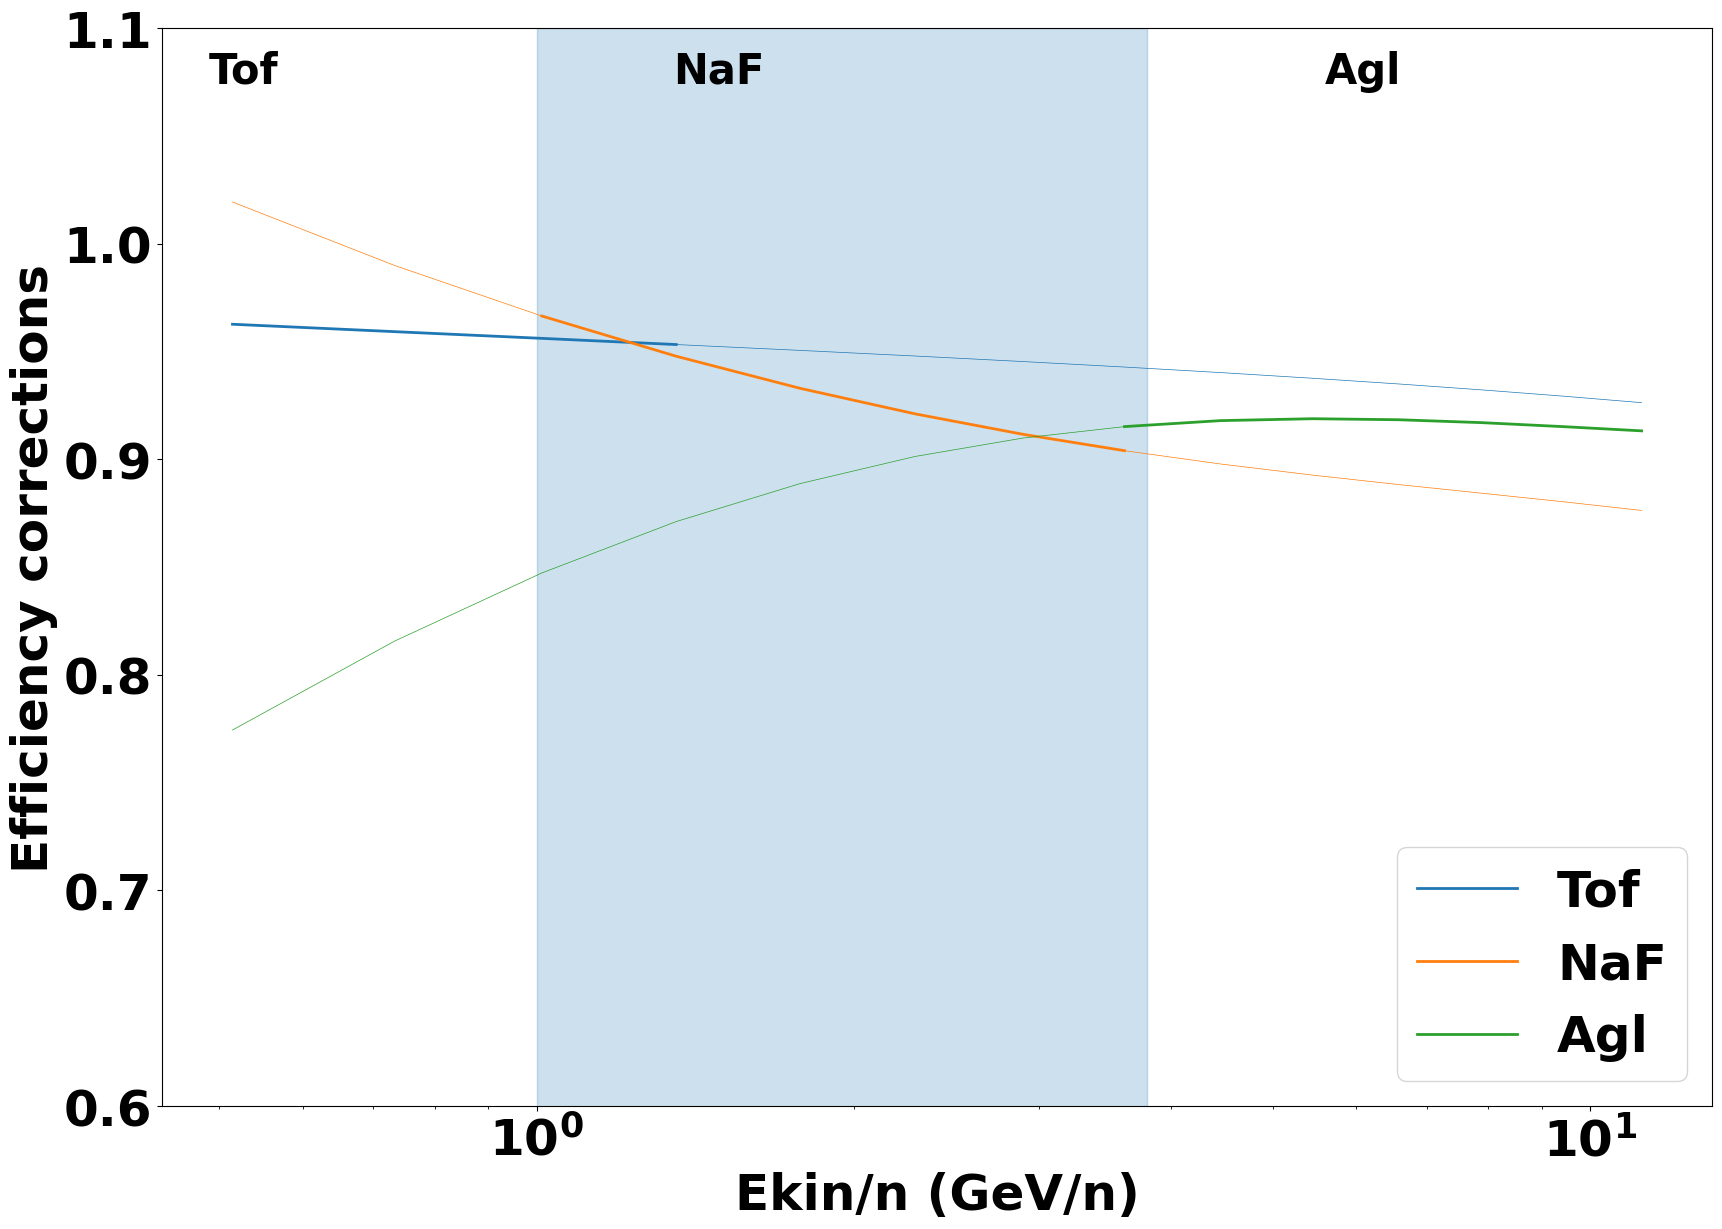

In [61]:

subgraph_effcorBe7 = dict()
ekin_range = {'Tof':[0.2, 1.2], 'NaF':[1, 5], 'Agl': [3.0, 12]}
xaxistext = {"Tof": 0.03, "NaF": 0.33, "Agl": 0.75}

figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))   
subgraph_effcorBe7 = dict()
ekin_range = {'Tof':[0.2, 1.2], 'NaF':[1, 4], 'Agl': [3.5, 12]}
xaxistext = {"Tof": 0.03, "NaF": 0.33, "Agl": 0.75}
for dec in detectors:    
    subgraph_effcorBe7[dec] = slice_graph_by_value(graph_total_effcor_ekin[dec]['Be7'], ekin_range[dec])
    ax1.plot(graph_total_effcor_ekin[dec]['Be7'].xvalues, graph_total_effcor_ekin[dec]['Be7'].yvalues, '-', color=DETECTOR_COLOR[dec], linewidth=0.5)
    ax1.plot(subgraph_effcorBe7[dec].xvalues, subgraph_effcorBe7[dec].yvalues, '-', color=DETECTOR_COLOR[dec], label=f'{dec}', linewidth=2.0)
    #ax1.set_xlim([1, 30])
    ax1.legend(loc='lower right')
    ax1.set_ylim([0.6, 1.1])
    ax1.set_xscale('log')
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel('Efficiency corrections')
    ax1.fill_betweenx(np.linspace(0.4, 1.1, 100), 1.0, 3.8, alpha=0.08, color="tab:blue") 
    ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      

savefig_tofile(figure, plotfile, 'total_efficiency_correction', 1)

['unfold_factor_TofBe7_xvalues', 'unfold_factor_TofBe7_yvalues', 'unfold_factor_TofBe7_yerrs', 'unfold_factor_TofBe7_labels', 'unfold_factor_TofBe9_xvalues', 'unfold_factor_TofBe9_yvalues', 'unfold_factor_TofBe9_yerrs', 'unfold_factor_TofBe9_labels', 'unfold_factor_TofBe10_xvalues', 'unfold_factor_TofBe10_yvalues', 'unfold_factor_TofBe10_yerrs', 'unfold_factor_TofBe10_labels', 'unfold_factor_NaFBe7_xvalues', 'unfold_factor_NaFBe7_yvalues', 'unfold_factor_NaFBe7_yerrs', 'unfold_factor_NaFBe7_labels', 'unfold_factor_NaFBe9_xvalues', 'unfold_factor_NaFBe9_yvalues', 'unfold_factor_NaFBe9_yerrs', 'unfold_factor_NaFBe9_labels', 'unfold_factor_NaFBe10_xvalues', 'unfold_factor_NaFBe10_yvalues', 'unfold_factor_NaFBe10_yerrs', 'unfold_factor_NaFBe10_labels', 'unfold_factor_AglBe7_xvalues', 'unfold_factor_AglBe7_yvalues', 'unfold_factor_AglBe7_yerrs', 'unfold_factor_AglBe7_labels', 'unfold_factor_AglBe9_xvalues', 'unfold_factor_AglBe9_yvalues', 'unfold_factor_AglBe9_yerrs', 'unfold_factor_AglBe9_

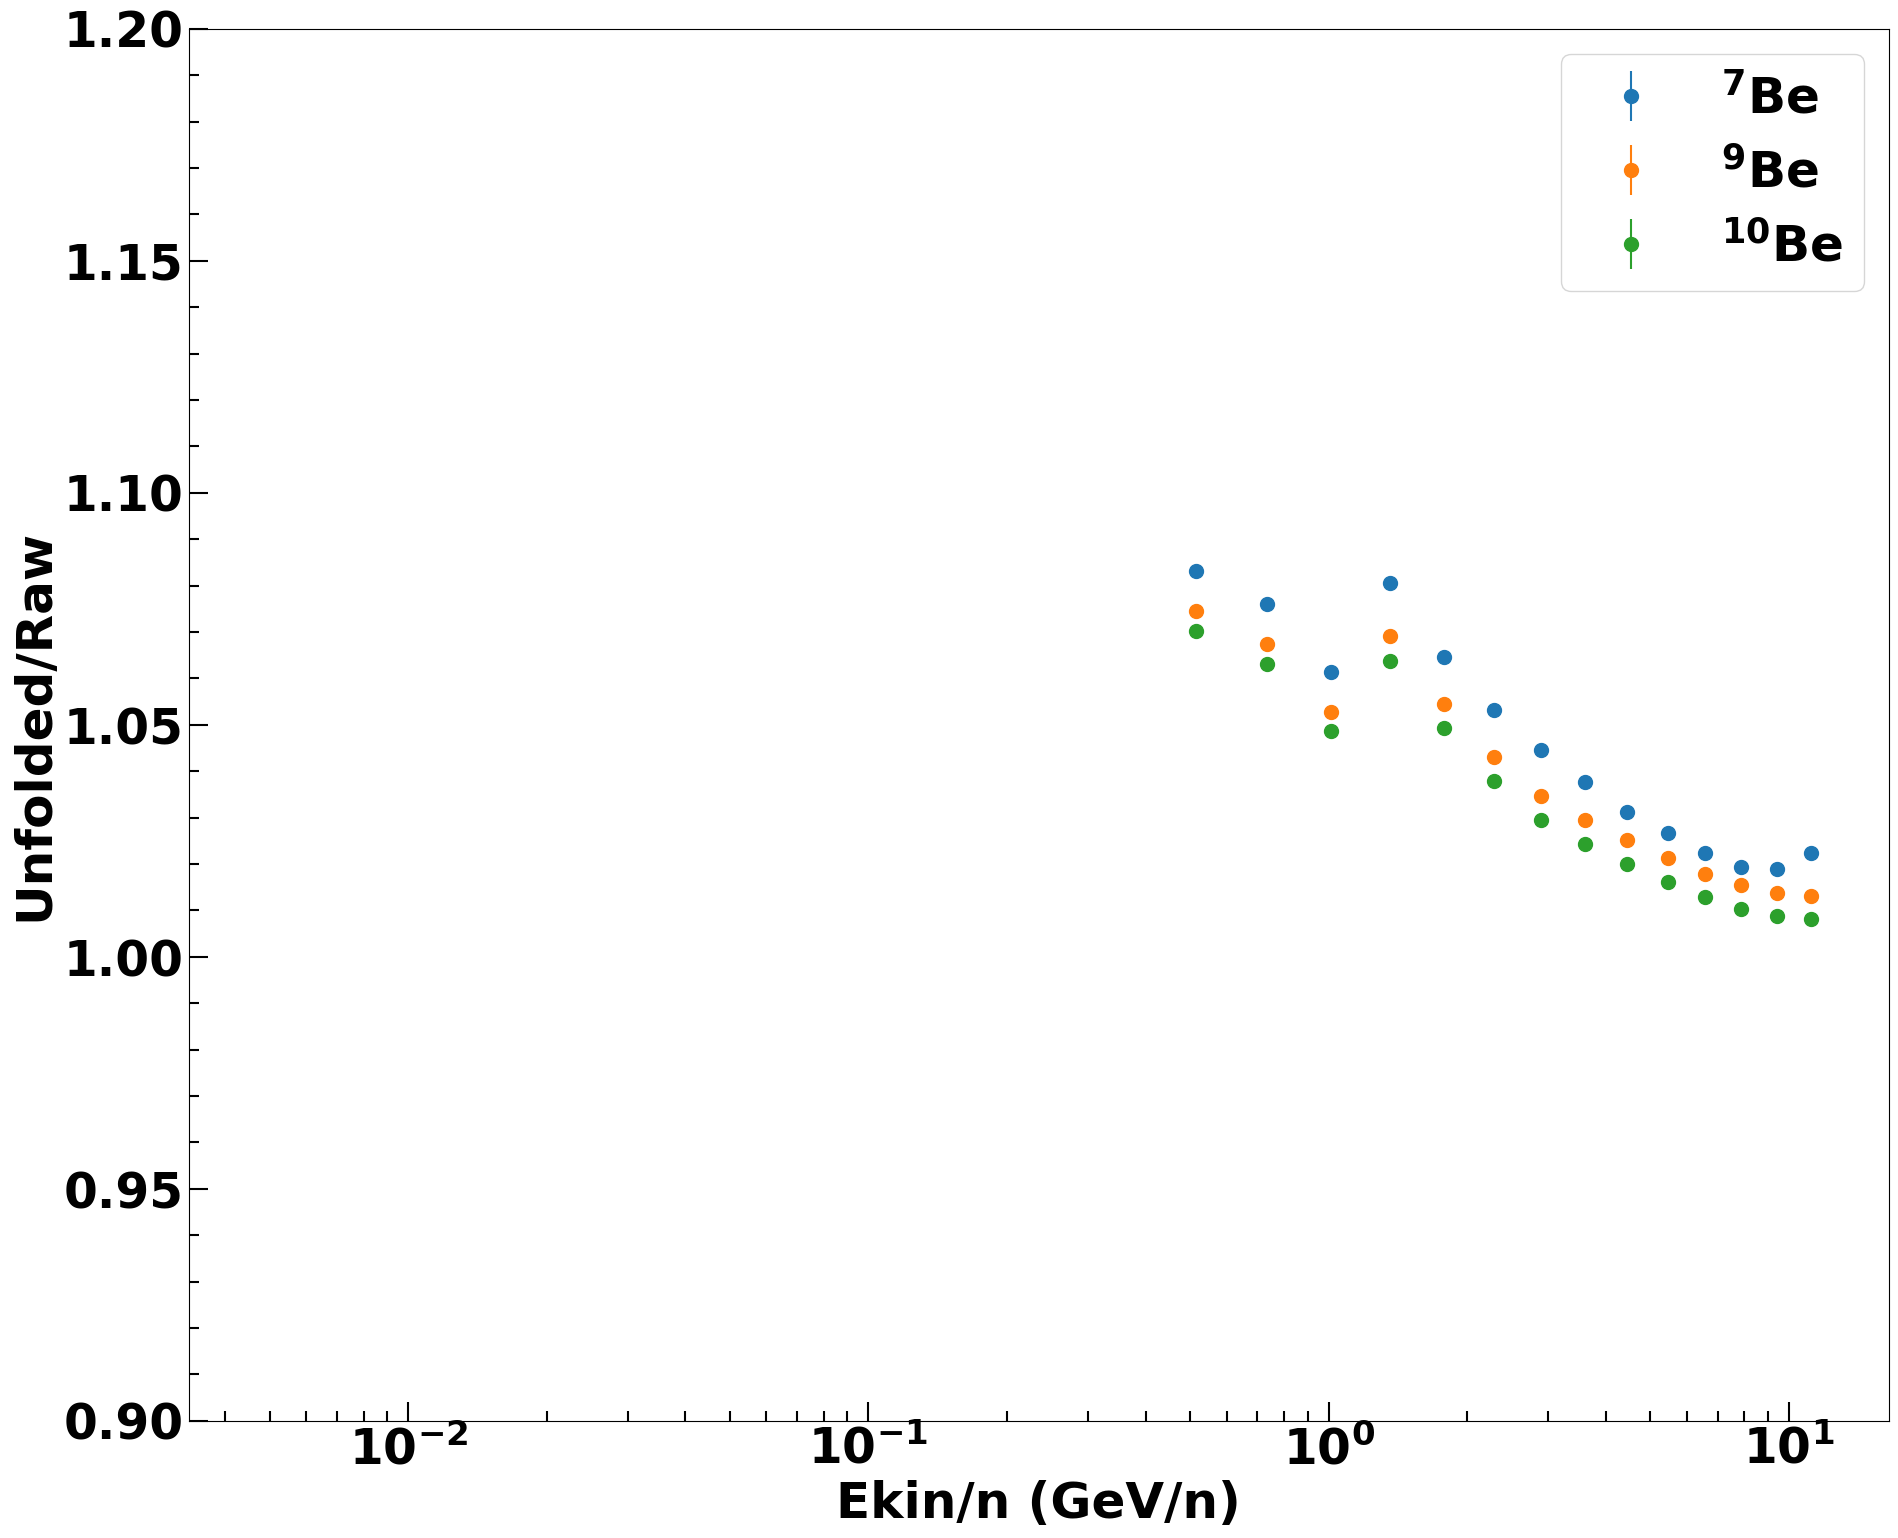

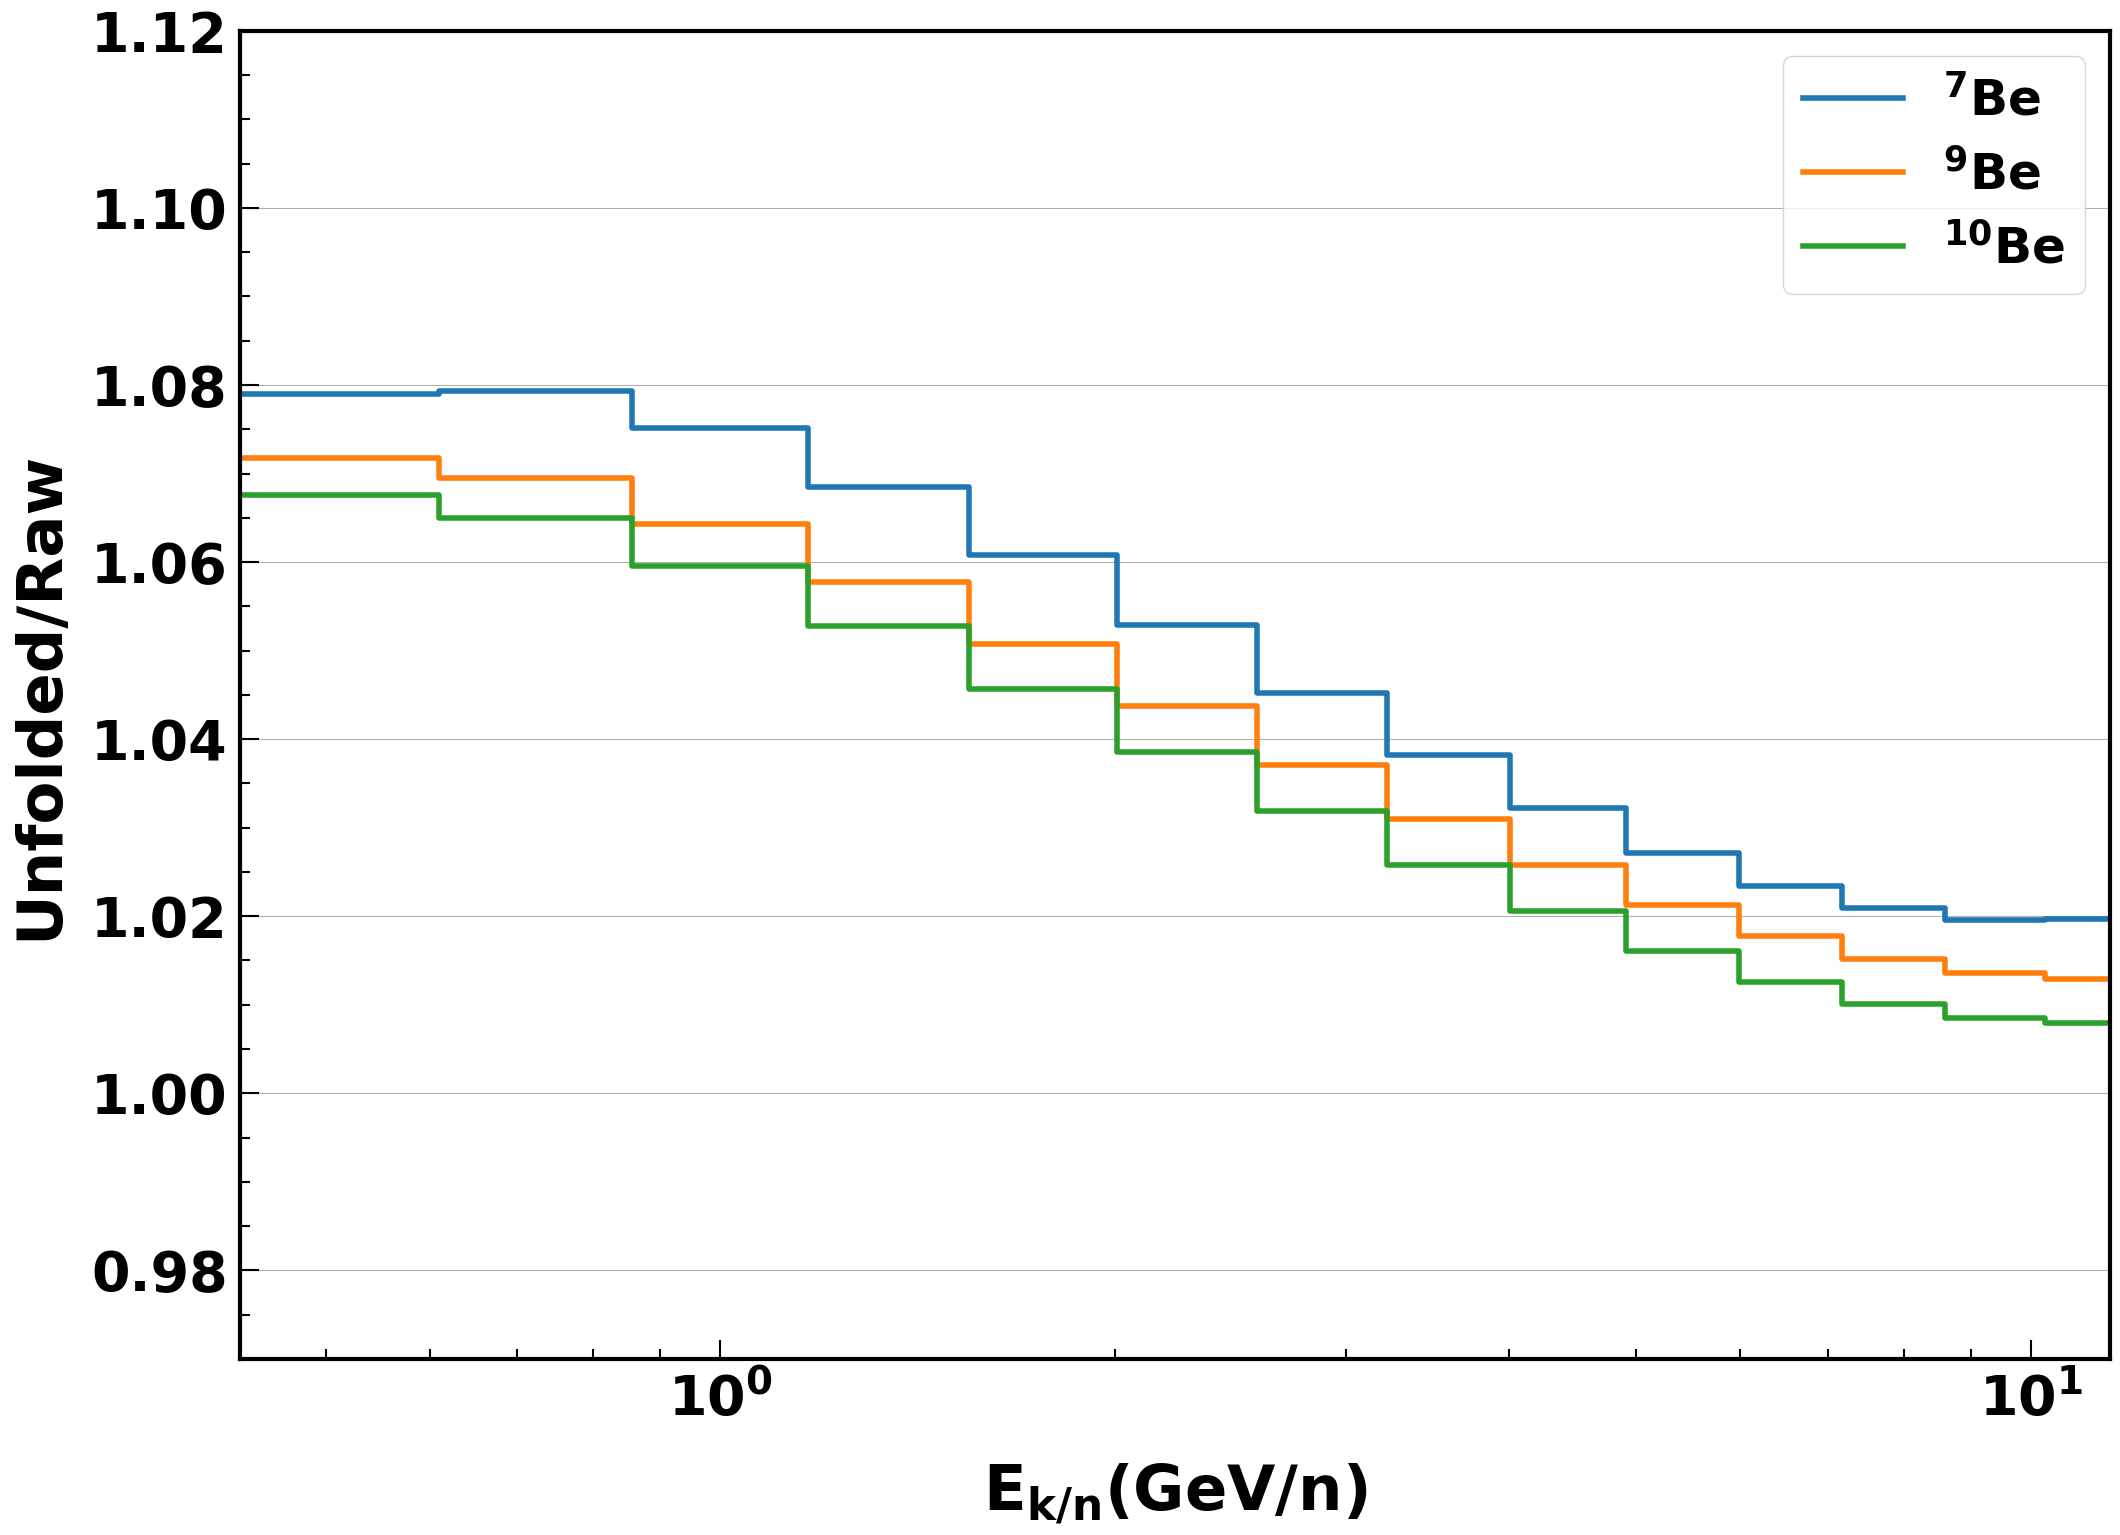

In [62]:
datadirP7 = '/home/manbing/Documents/Data/data_BeP7_Iso/'
file_unfold = datadirP7 + 'graph_unfold_factor.npz'
df_unfold = np.load(f'{file_unfold}')
xbinning = Binning(fbinning_energy_rebin())
print(list(df_unfold.keys()))
spline_unfold_factor = {dec: {} for dec in detectors}
graph_unfold_factor = {dec: {} for dec in detectors}
graph_unfold_factor_rebin = {dec: {} for dec in detectors}
xvaluerange = {'Tof': [0.6, 1.0], 'NaF':[1.2, 3.6], 'Agl':[4.2, 11]}
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        graph_unfold_factor[dec][iso] = MGraph.from_file(df_unfold, f'unfold_factor_{dec}{iso}')
        spline_unfold_factor[dec][iso] = UnivariateSpline(np.log(graph_unfold_factor[dec][iso].xvalues), graph_unfold_factor[dec][iso].yvalues, k=3, s=5)           
        unfoldfactor = spline_unfold_factor[dec][iso](np.log(xbinning.bin_centers[1:-1]))
        graph_unfold_factor_rebin[dec][iso] = MGraph(xbinning.bin_centers[1:-1], unfoldfactor, np.zeros_like(unfoldfactor))
        #graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], slicevalue[dec])

        
fig, ax1 = plt.subplots(figsize=(20, 16))                                                                                                            
fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95)
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        #plot_graph(fig, ax1, graph_spline_unfoldfactor[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], xvaluerange[dec])
        if dec == 'Tof':
            plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        else:
            plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20)

ax1.legend()
ax1.set_ylim([0.9, 1.2])
ax1.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('Unfolded/Raw')
graph_unfoldfactor_combined = {}
spline_unfoldfactor = {}
graph_spline_unfoldfactor = {}
xbinning_ekn = Binning(fbinning_energy_rebin())
for iso in ISOTOPES[nuclei]:
    graph_unfoldfactor_combined[iso] = concatenate_graphs(graph_unfold_factor_rebin['Tof'][iso], graph_unfold_factor_rebin['NaF'][iso])
    graph_unfoldfactor_combined[iso] = concatenate_graphs(graph_unfoldfactor_combined[iso], graph_unfold_factor_rebin['Agl'][iso])
    
    spline_unfoldfactor[iso] = UnivariateSpline(np.log(graph_unfoldfactor_combined[iso].xvalues), graph_unfoldfactor_combined[iso].yvalues, k=3, s=5)
    graph_spline_unfoldfactor[iso] = MGraph(graph_unfoldfactor_combined[iso].xvalues, spline_unfoldfactor[iso](np.log(graph_unfoldfactor_combined[iso].xvalues)), np.zeros_like(graph_unfoldfactor_combined[iso].xvalues))
    
    
fig, ax1 = plt.subplots(figsize=FIGSIZE3)                                                                                                            
fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.12, top=0.95)
for iso in ISOTOPES[nuclei]:
    #plot_graph(fig, ax1, graph_spline_unfoldfactor[iso], color=ISOTOPES_COLOR[iso], style="step", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
    plot_graph(fig, ax1, graph_spline_unfoldfactor[iso], color=ISOTOPES_COLOR[iso], style="step", xbinning=xbinning_ekn, xlog=True, ylog=False, scale=None, markersize=30, label=f"{ISO_LABELS[iso]}", linewidth=4)
for dec in detectors:
    #ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=40, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', fontweight="bold")    
    for iso in ISOTOPES[nuclei]:
        #plot_graph(fig, ax1, graph_spline_unfoldfactor[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], xvaluerange[dec])
        #plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20)

#ax1.fill_betweenx(np.linspace(0.95, 1.15, 100), 1.2, 4.0, alpha=0.08, color="tab:blue") 
ax1.legend(loc='upper right')

set_plot_style(ax1)  
SetAx1Axis(ax1, r'$\mathrm{E_{k/n} (GeV/n)}$', 'Unfolding Factor', 45, xlimrange=[0.43, 11.5], ylimrange=[0.97, 1.12], custom_ticks=None, custom_tickslabels=None, gridx=False, gridy=True, setxlog=True, setylog=False)
ax1.set_ylabel("Unfolded/Raw", fontsize=45, labelpad=15) 
print(plotfile)
savefig_tofile(fig, plotfile, 'be_unfolding_factor_spline', 1)

savefig_tofile(fig, plotdir, 'be_unfolding_factor_V2', 1)

################################################################################################ <br>
####compute the raw flux with counts from the fit <font color="red">all paremeters free</font>  
#################################################################################################

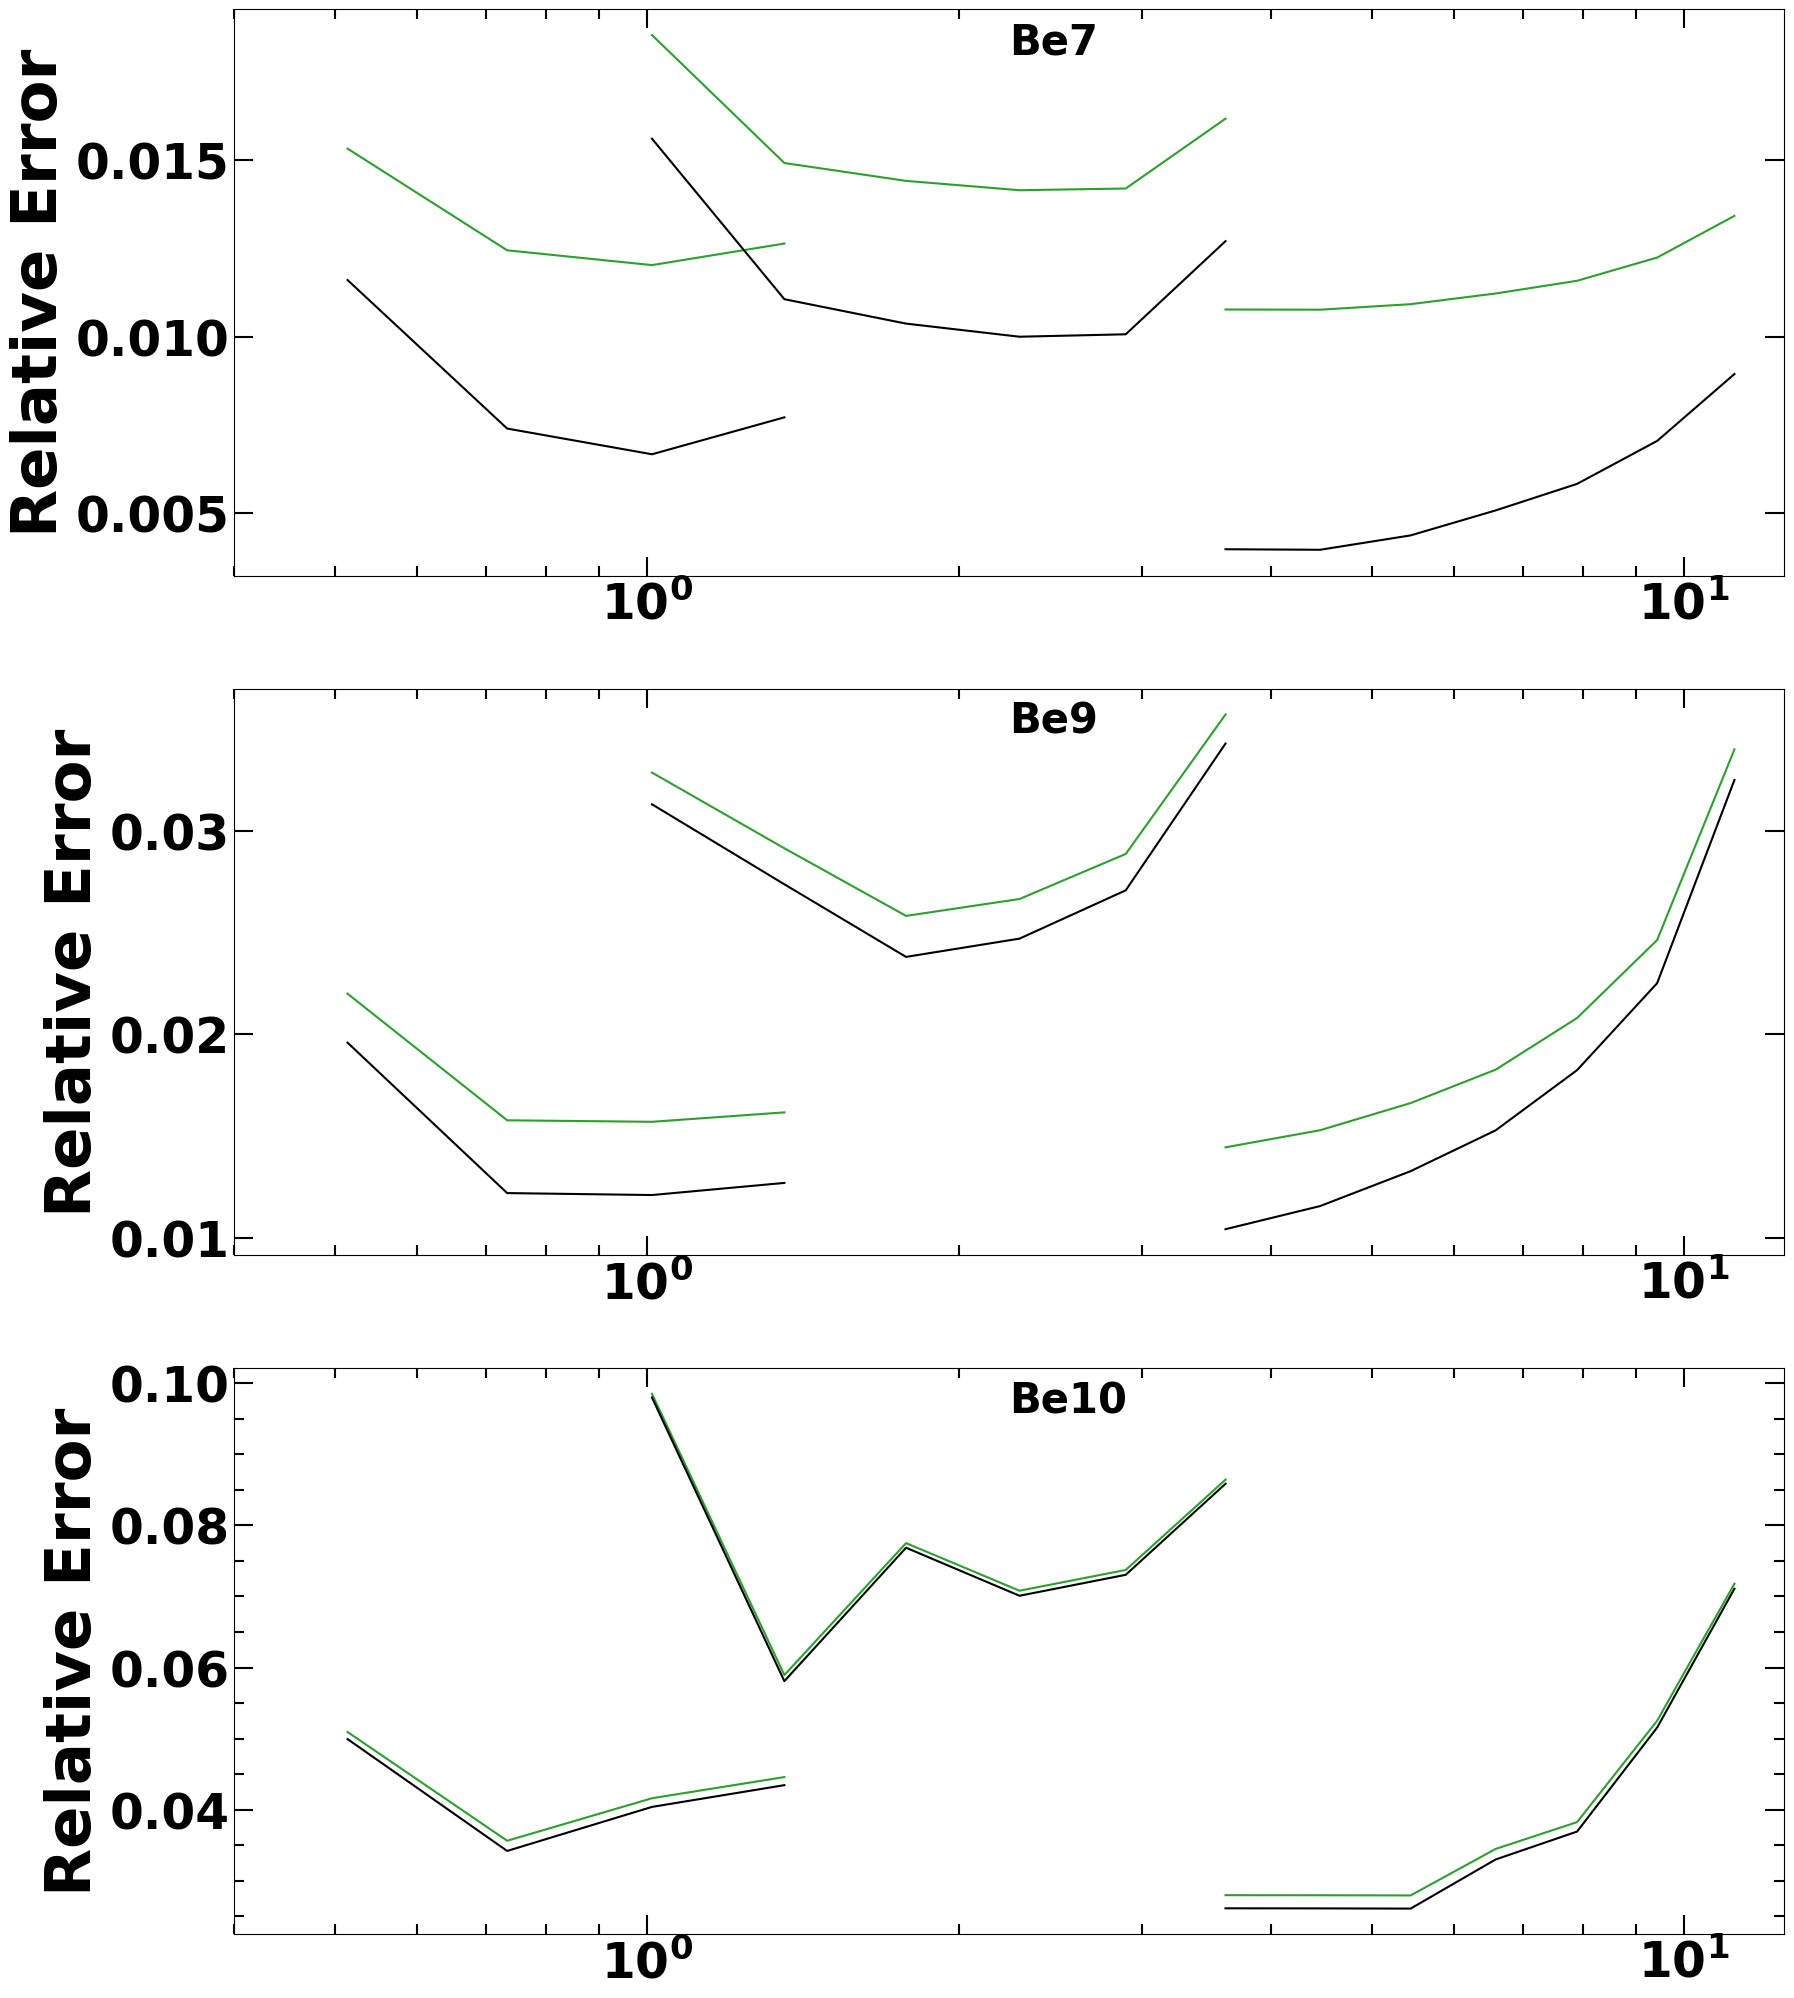

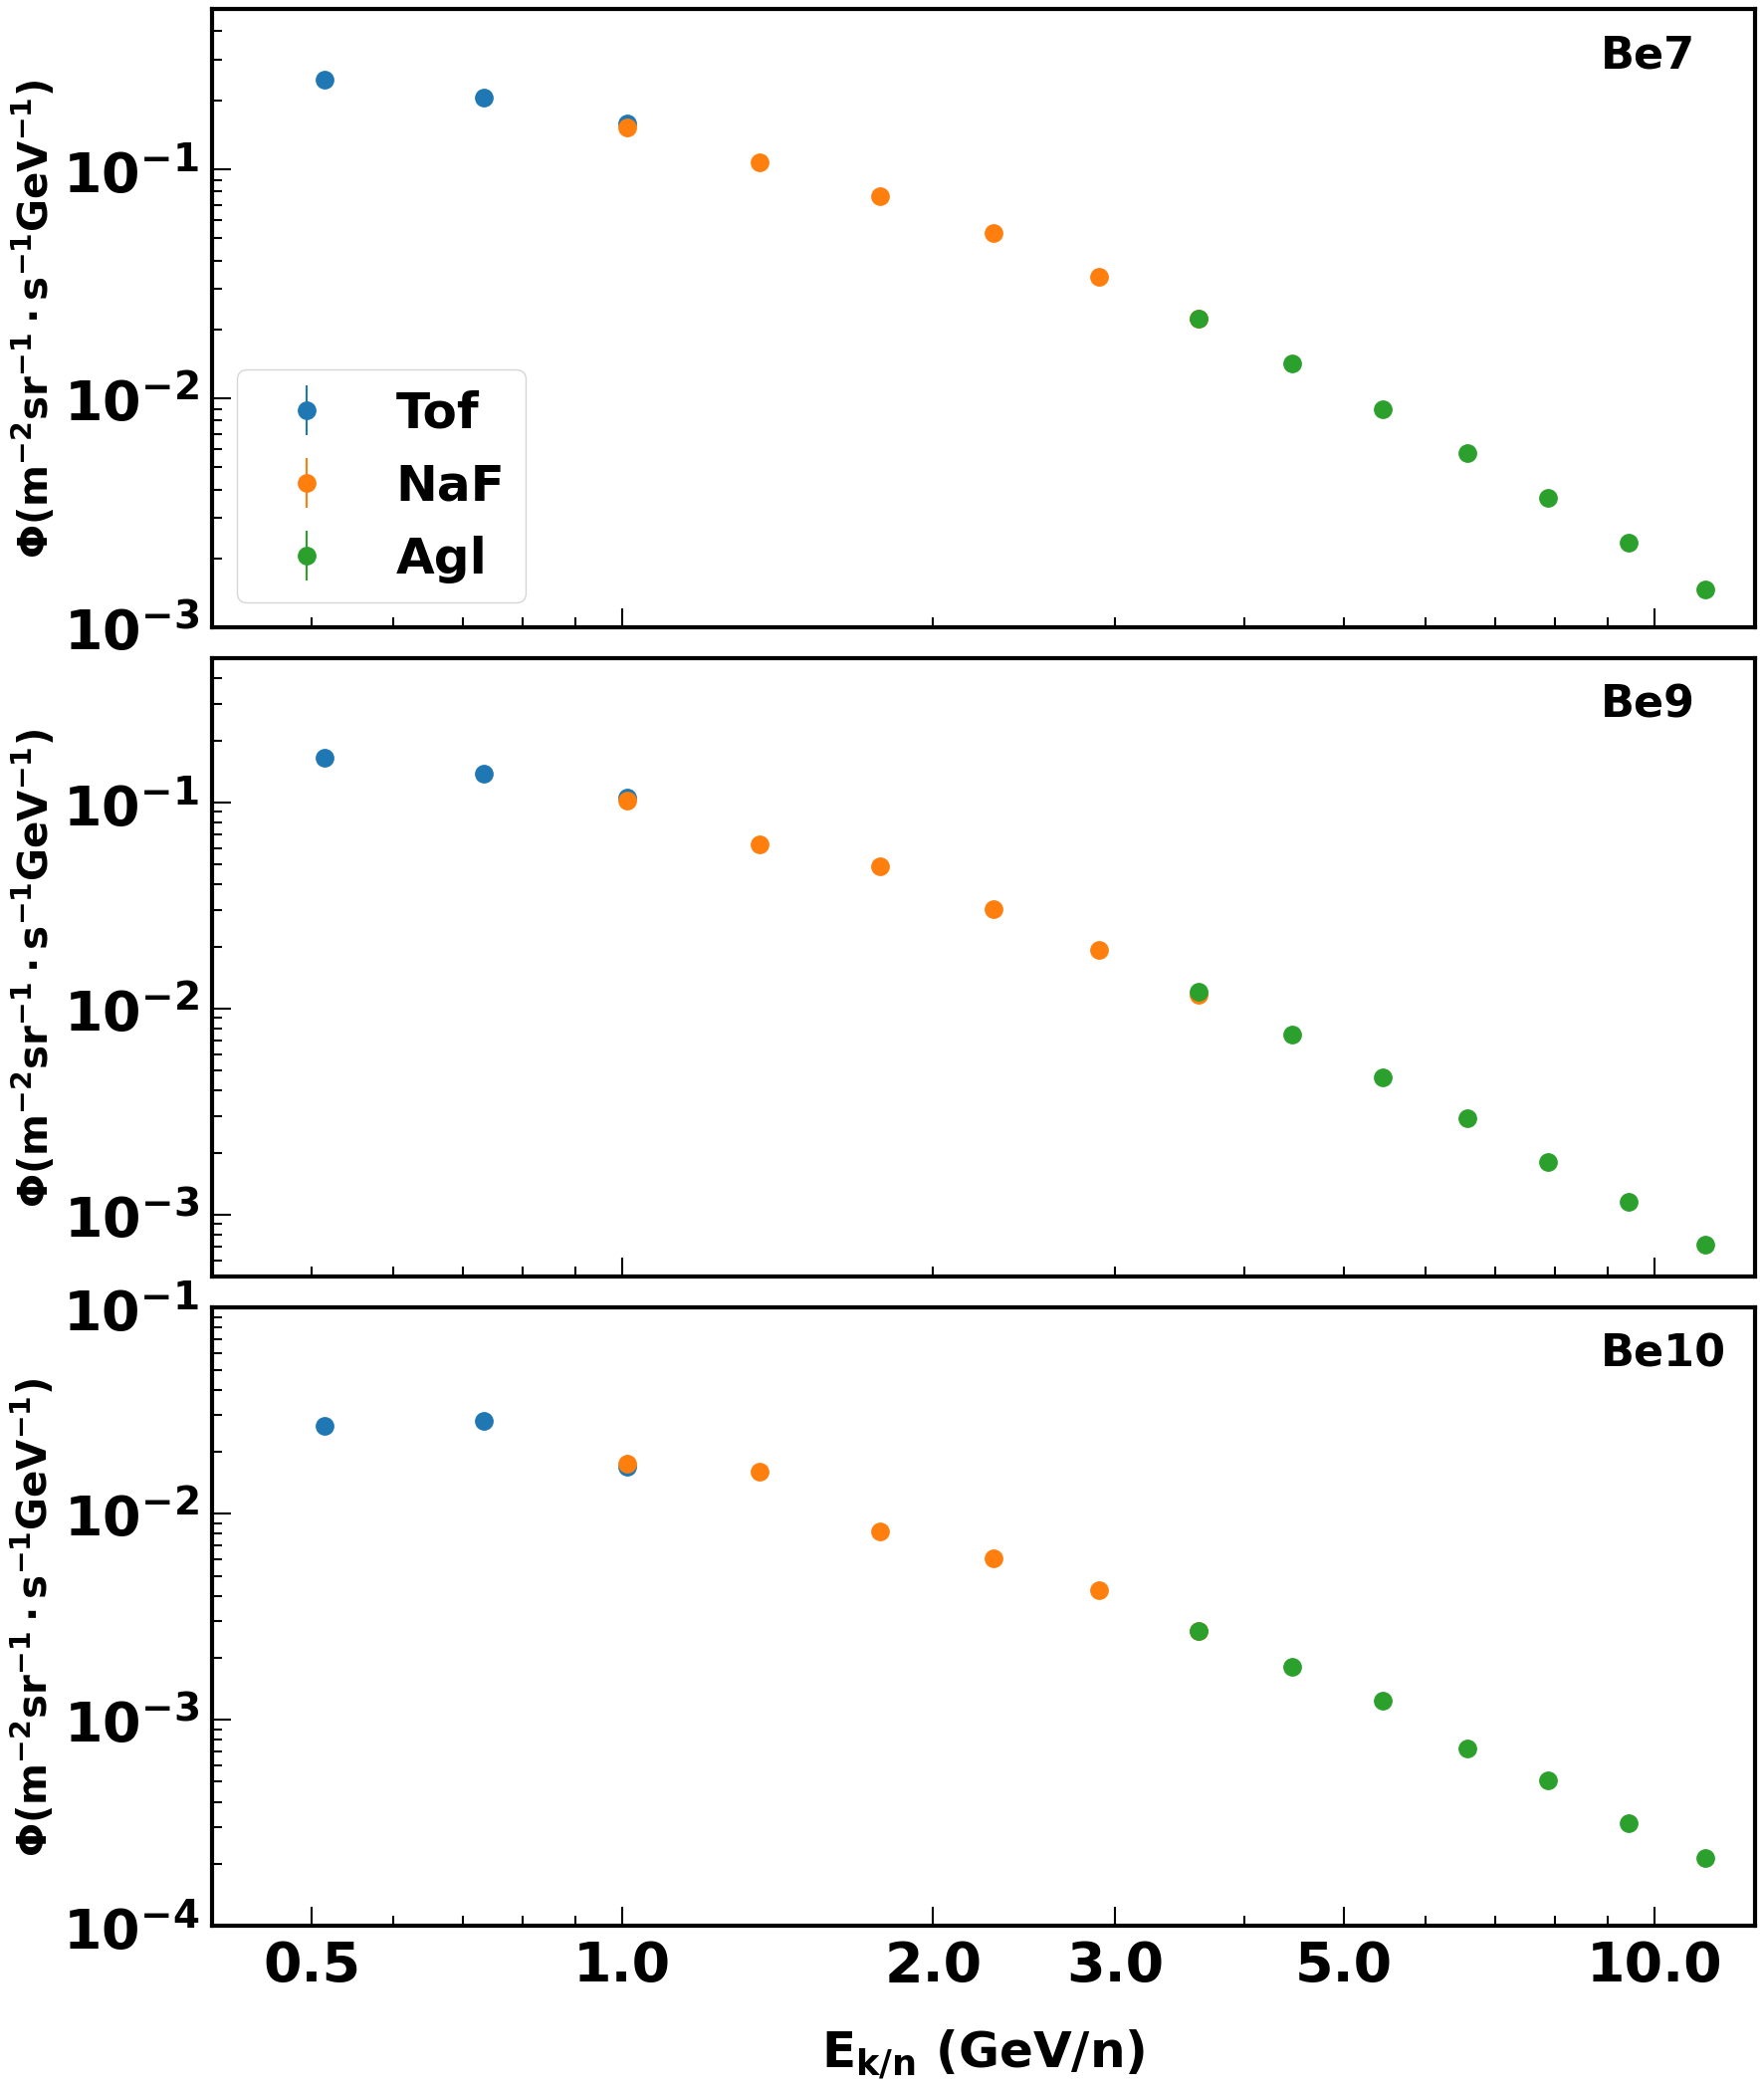

In [63]:
graph_flux_raw = {dec: dict() for dec in detectors} 
graph_staterr = {dec: dict() for dec in detectors}
graph_accerr = {dec: dict() for dec in detectors}

graph_temperr = {dec: dict() for dec in detectors}

graph_unfoldflux = {dec: dict() for dec in detectors}
#xbinning = {"Rigidity": Binning(fbinning_energy()), "Ekin":Binning(fbinning_energy())}   
df_rawflux = dict() 
df_unfoldflux = dict()
subgraph_unfoldfactor = {}
data_dict ={dec:  dict() for dec in detectors}



for dec in detectors:     
    
    for iso in ISOTOPES[nuclei]:
        graph_counts =graph_counts_fromfit_Opt[dec][iso]
        
        xenergy = graph_counts.xvalues       
        
        
        #graph_accraw = slice_graph_by_value(graph_acc[dec][iso], [xenergy[0], xenergy[-1]])  
        graph_accraw = MGraph(xenergy, spline_subgraph_acc[dec][iso](np.log(xenergy)), 0.01*spline_subgraph_acc[dec][iso](np.log(xenergy)))
        graph_time = slice_graph_by_value(graph_measuretime[iso], [xenergy[0], xenergy[-1]]) 
        graph_effcor = slice_graph_by_value(graph_total_effcor_ekin[dec][iso], [xenergy[0], xenergy[-1]]) 
        graph_unfold = MGraph(xenergy, spline_unfoldfactor[iso](np.log(xenergy)), np.zeros_like(xenergy))
        
        counts = graph_counts.yvalues 
        stat_err = np.sqrt(graph_counts.yvalues)
        counts_err = graph_counts.yerrs                                                                                                                                                              
        effcor = graph_effcor.yvalues
        #acc = spline_subgraph_acc[dec][iso](np.log(xenergy))  
        acc = graph_accraw.yvalues
        acc_err = graph_accraw.yerrs
        
        unfold_factor = graph_unfold.yvalues
        indices = xbinning.get_indices([xenergy[0], xenergy[-1]])                                                                                                                                    
        #bin_widths = xbinning.bin_widths[indices[0]: indices[1]+1]                                                                                                                                  
        bin_edges = xbinning.edges[indices[0]: indices[1]+2]   

        bin_widths = bin_edges[1:] - bin_edges[:-1]  
        
        assert (np.all(xenergy == graph_effcor.xvalues))                                                                                                                                                                                                                                                                                                                             
        assert (np.all(xenergy == graph_time.xvalues))                                                                                                                                                               
        assert (np.all(xenergy == get_bin_center(bin_edges)))    
        assert (np.all(xenergy == graph_accraw.xvalues))
        assert (np.all(xenergy == graph_unfold.xvalues))
        
        flux_raw = counts / (effcor * acc *graph_time.yvalues * bin_widths)                                                                                                                               
        flux_raw_err = flux_raw * np.sqrt((counts_err/counts)**2 + (acc_err/acc)**2)                                                                                                                         
        graph_flux_raw[dec][iso] = MGraph(xenergy, flux_raw, flux_raw_err)                                                                                                                                                 
        graph_flux_raw[dec][iso].add_to_file(df_rawflux, f'graph_rawflux_{dec}{iso}')
        
        graph_staterr[dec][iso] =  MGraph(xenergy, flux_raw_err/flux_raw, np.zeros_like(xenergy))
        graph_temperr[dec][iso] =  MGraph(xenergy, np.sqrt((counts_err/counts)**2) , np.zeros_like(xenergy))
        
        unfoldflux = flux_raw * graph_unfold.yvalues
        unfoldfluxerr = flux_raw_err * graph_unfold.yvalues
        graph_unfoldflux[dec][iso] = MGraph(xenergy, unfoldflux, unfoldfluxerr)
        header = "Ekn_low\tEkn_up\tflux\tfluxerr\tcounts\tcountserr\ttime\tacc\teffcor\tunfoldfactor\tunfolderr"
        fmt = ('%.5f, %.5f, %.5f, %.5f, %.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f')
        data_dict[dec][iso] = np.column_stack((bin_edges[0:-1], bin_edges[1:], unfoldflux, unfoldfluxerr, counts, counts_err, graph_time.yvalues, acc, effcor, unfold_factor, unfoldfluxerr))
        #np.savetxt(os.path.join(datadirP8, f'results/Ingredients/{dec}{iso}flux{figname}.txt'), data_dict[dec][iso], fmt=fmt, delimiter='\t', header=header)  
#for iso in ISOTOPES[nuclei]:
#    graph_flux_raw['NaF'][iso] = slice_graph_by_value(graph_flux_raw['NaF'][iso], [1.1, 4.2])
isoylim={'Be7': [0.001, 0.5], 'Be9':[0.0005, 0.5], 'Be10':[0.0001, 0.1]}
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.33, 0.33, 0.33]}, figsize=(20, 25))
ax = [ax1, ax2, ax3]
temfit_countserr = {}
dict_graph_countserr = {}
for i, iso in enumerate(ISOTOPES['Be']):
    ax[i].text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold")
    ax[i].set_ylabel("Relative Error")   
    for dec in detectors:
        plot_graph(fig, ax[i], graph_staterr[dec][iso], color='tab:green', style="hist", xlog=True, ylog=False, markersize=20, label=f'{dec}')
        plot_graph(fig, ax[i], graph_temperr[dec][iso], color='black', style="hist", xlog=True, ylog=False, markersize=20, label=f'{dec}')
        graph_temperr[dec][iso].add_to_file(dict_graph_countserr, f'graph_countserr_{dec}{iso}')
        graph_staterr[dec][iso].add_to_file(dict_graph_countserr, f'graph_statserr_{dec}{iso}')
    
        
    #ax[i].set_ylim(isoylim[iso])   
    ax[i].set_xlim([0.4, 12.5])
#np.savez(os.path.join('/home/manbing/Documents/Data/data_BeP8/syserr', f'graph_countserr_fromfit.npz'), **dict_graph_countserr)
    
    
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.33, 0.33, 0.33]}, figsize=(20, 25))
ax = [ax1, ax2, ax3]
DETECTOR_COLOR = {"Tof": "tab:blue", "NaF": "tab:orange", "Agl": "tab:green"}

slice_plot_values ={'Tof':[0.41, 1.1], 'NaF':[1.1666, 4.5], 'Agl':[3.5, 12.13]}

for i, iso in enumerate(ISOTOPES['Be']):
    ax[i].text(0.9, 0.96, f"{iso}", fontsize=FONTSIZE+2, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold")
    ax[i].set_ylabel(r"$\mathrm{\Phi (m^{-2} sr^{-1} \cdot s^{-1} GeV^{-1} ) }$", fontsize=29)   
    for dec in detectors:
        graph_unfoldflux[dec][iso] = slice_graph_by_value(graph_unfoldflux[dec][iso], slice_plot_values[dec])
        plot_graph(fig, ax[i], graph_unfoldflux[dec][iso], color=DETECTOR_COLOR[dec], style="EP", xlog=True, ylog=True, markersize=25, label=f'{dec}')
    ax[i].set_ylim(isoylim[iso])   
    ax[i].set_xlim([0.4, 12.5])

ax1.legend(loc='lower left')                                                                                                                                  
ax3.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", labelpad=25)    
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                
ax3.set_xticks([0.5, 1, 2, 3, 5, 10])                               
ax1.set_xticklabels([])
ax2.set_xticklabels([])
set_plot_style(ax1)                                                                                                                                                                                 
set_plot_style(ax2)   
set_plot_style(ax3)
plt.subplots_adjust(hspace=.05)
ax1.get_xticklabels()[0].set_visible(False)   
ax2.get_xticklabels()[0].set_visible(False) 
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
savefig_tofile(fig, plotfile, f'be_isoflux_{figname}', 1)

/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024 be_isoflux_11yr_fraction
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024
/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024


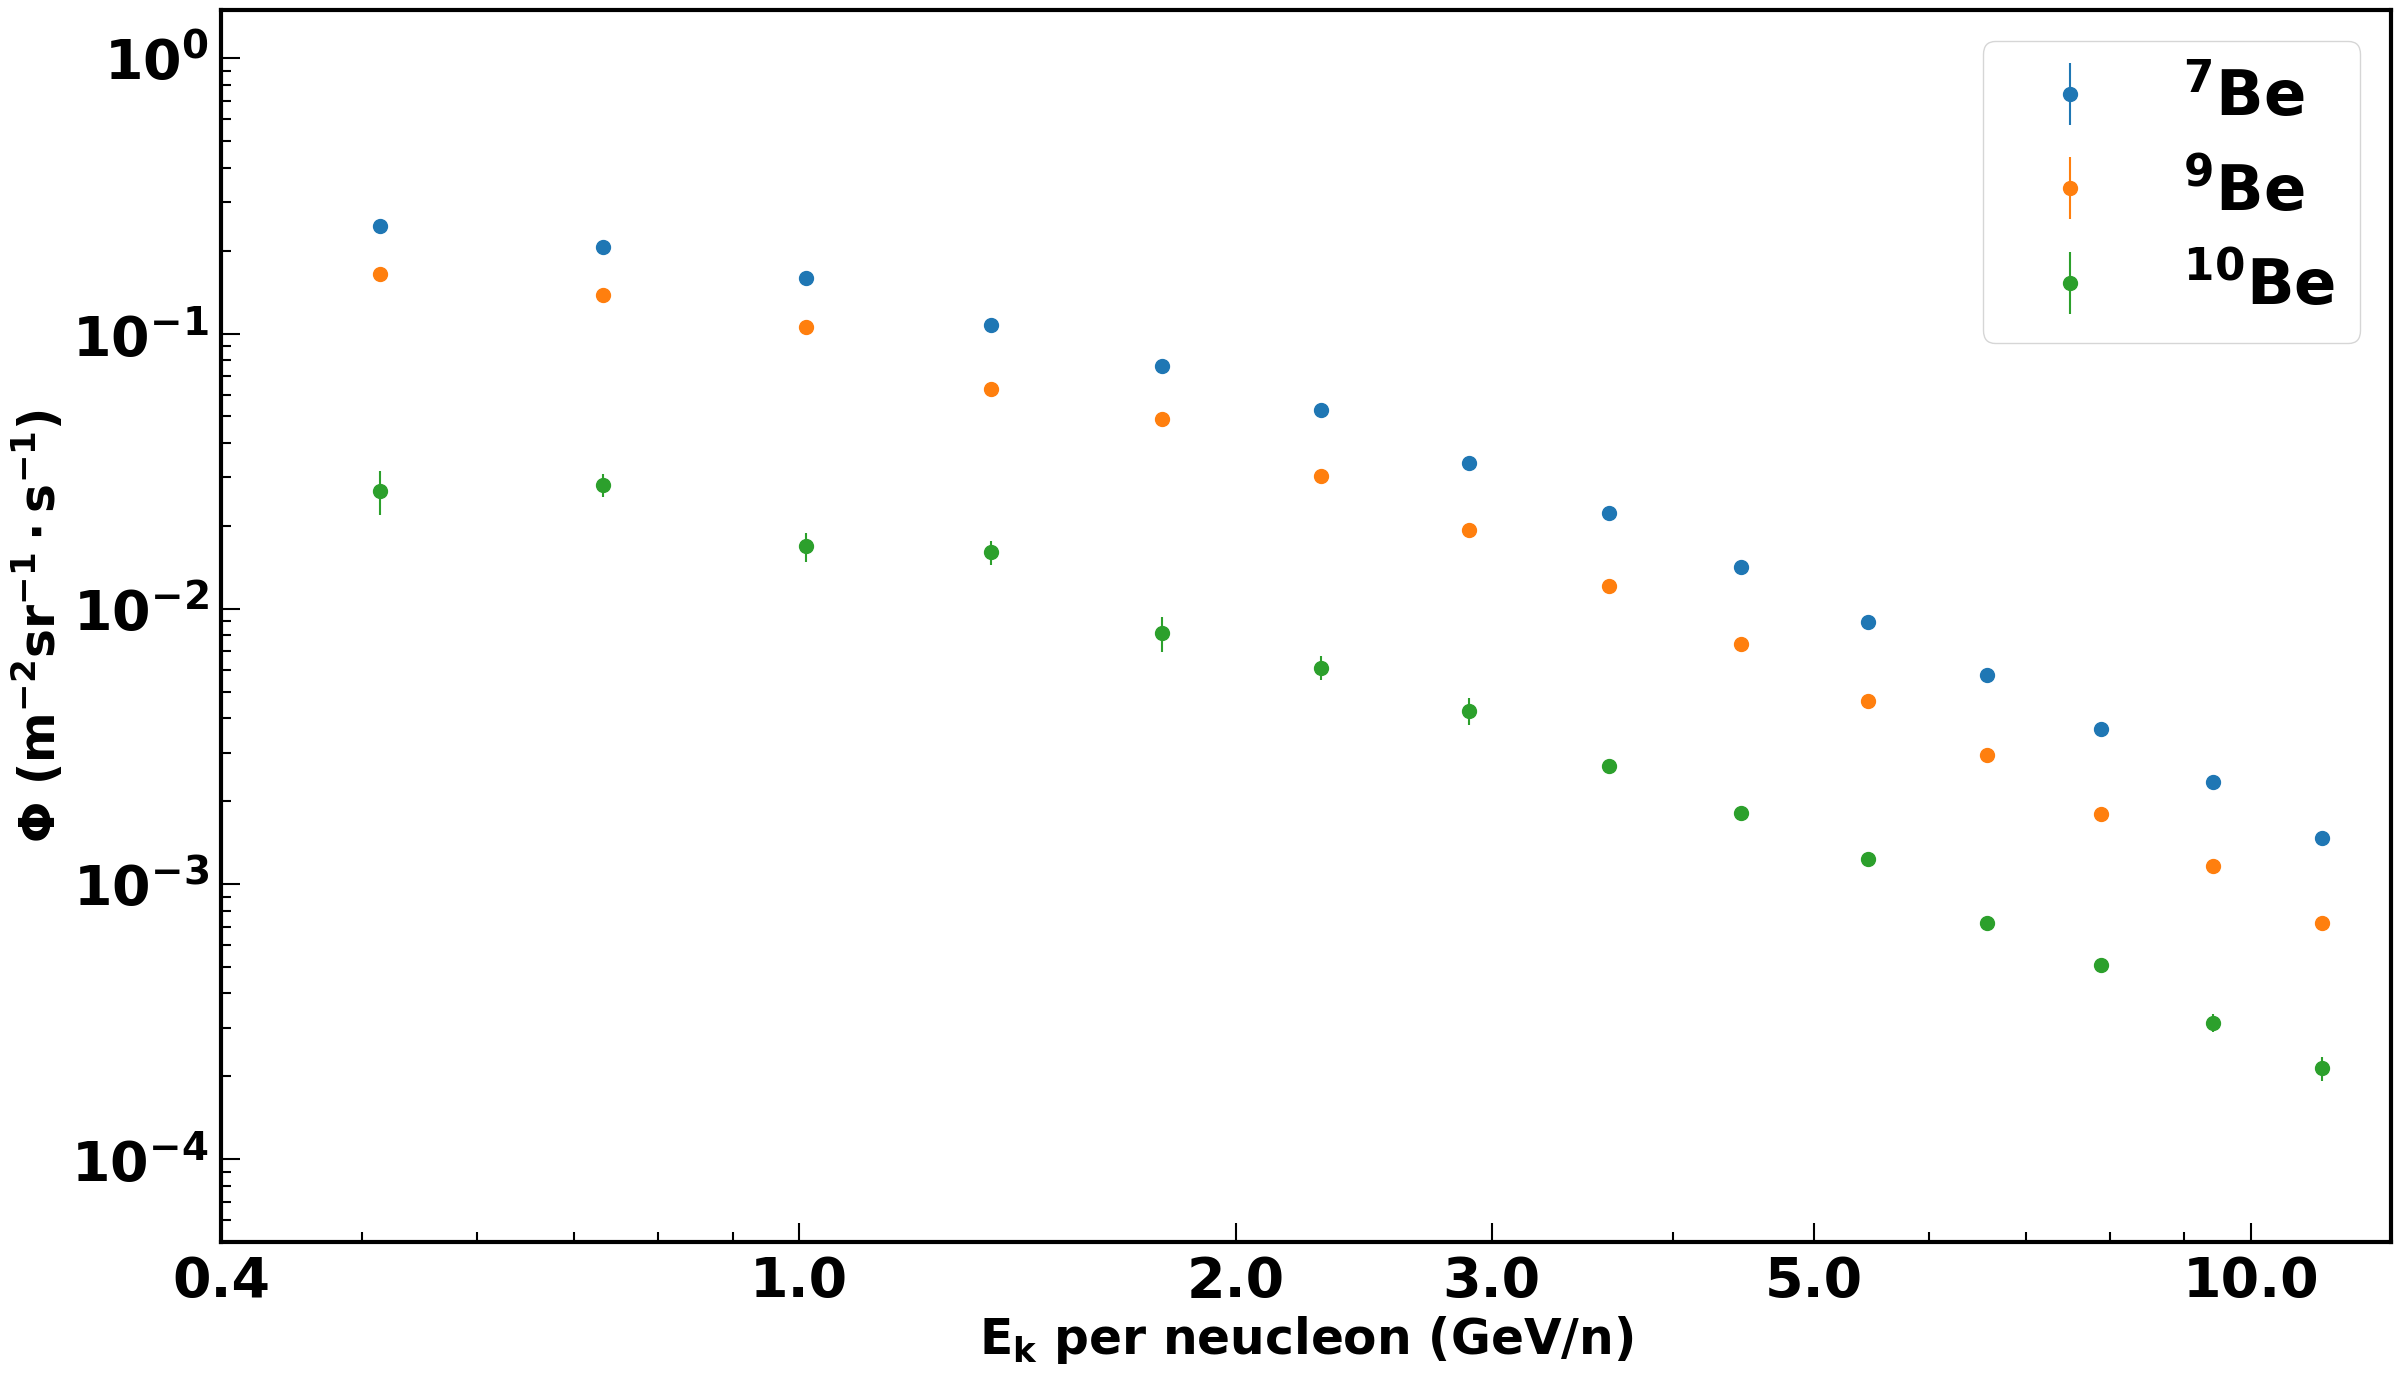

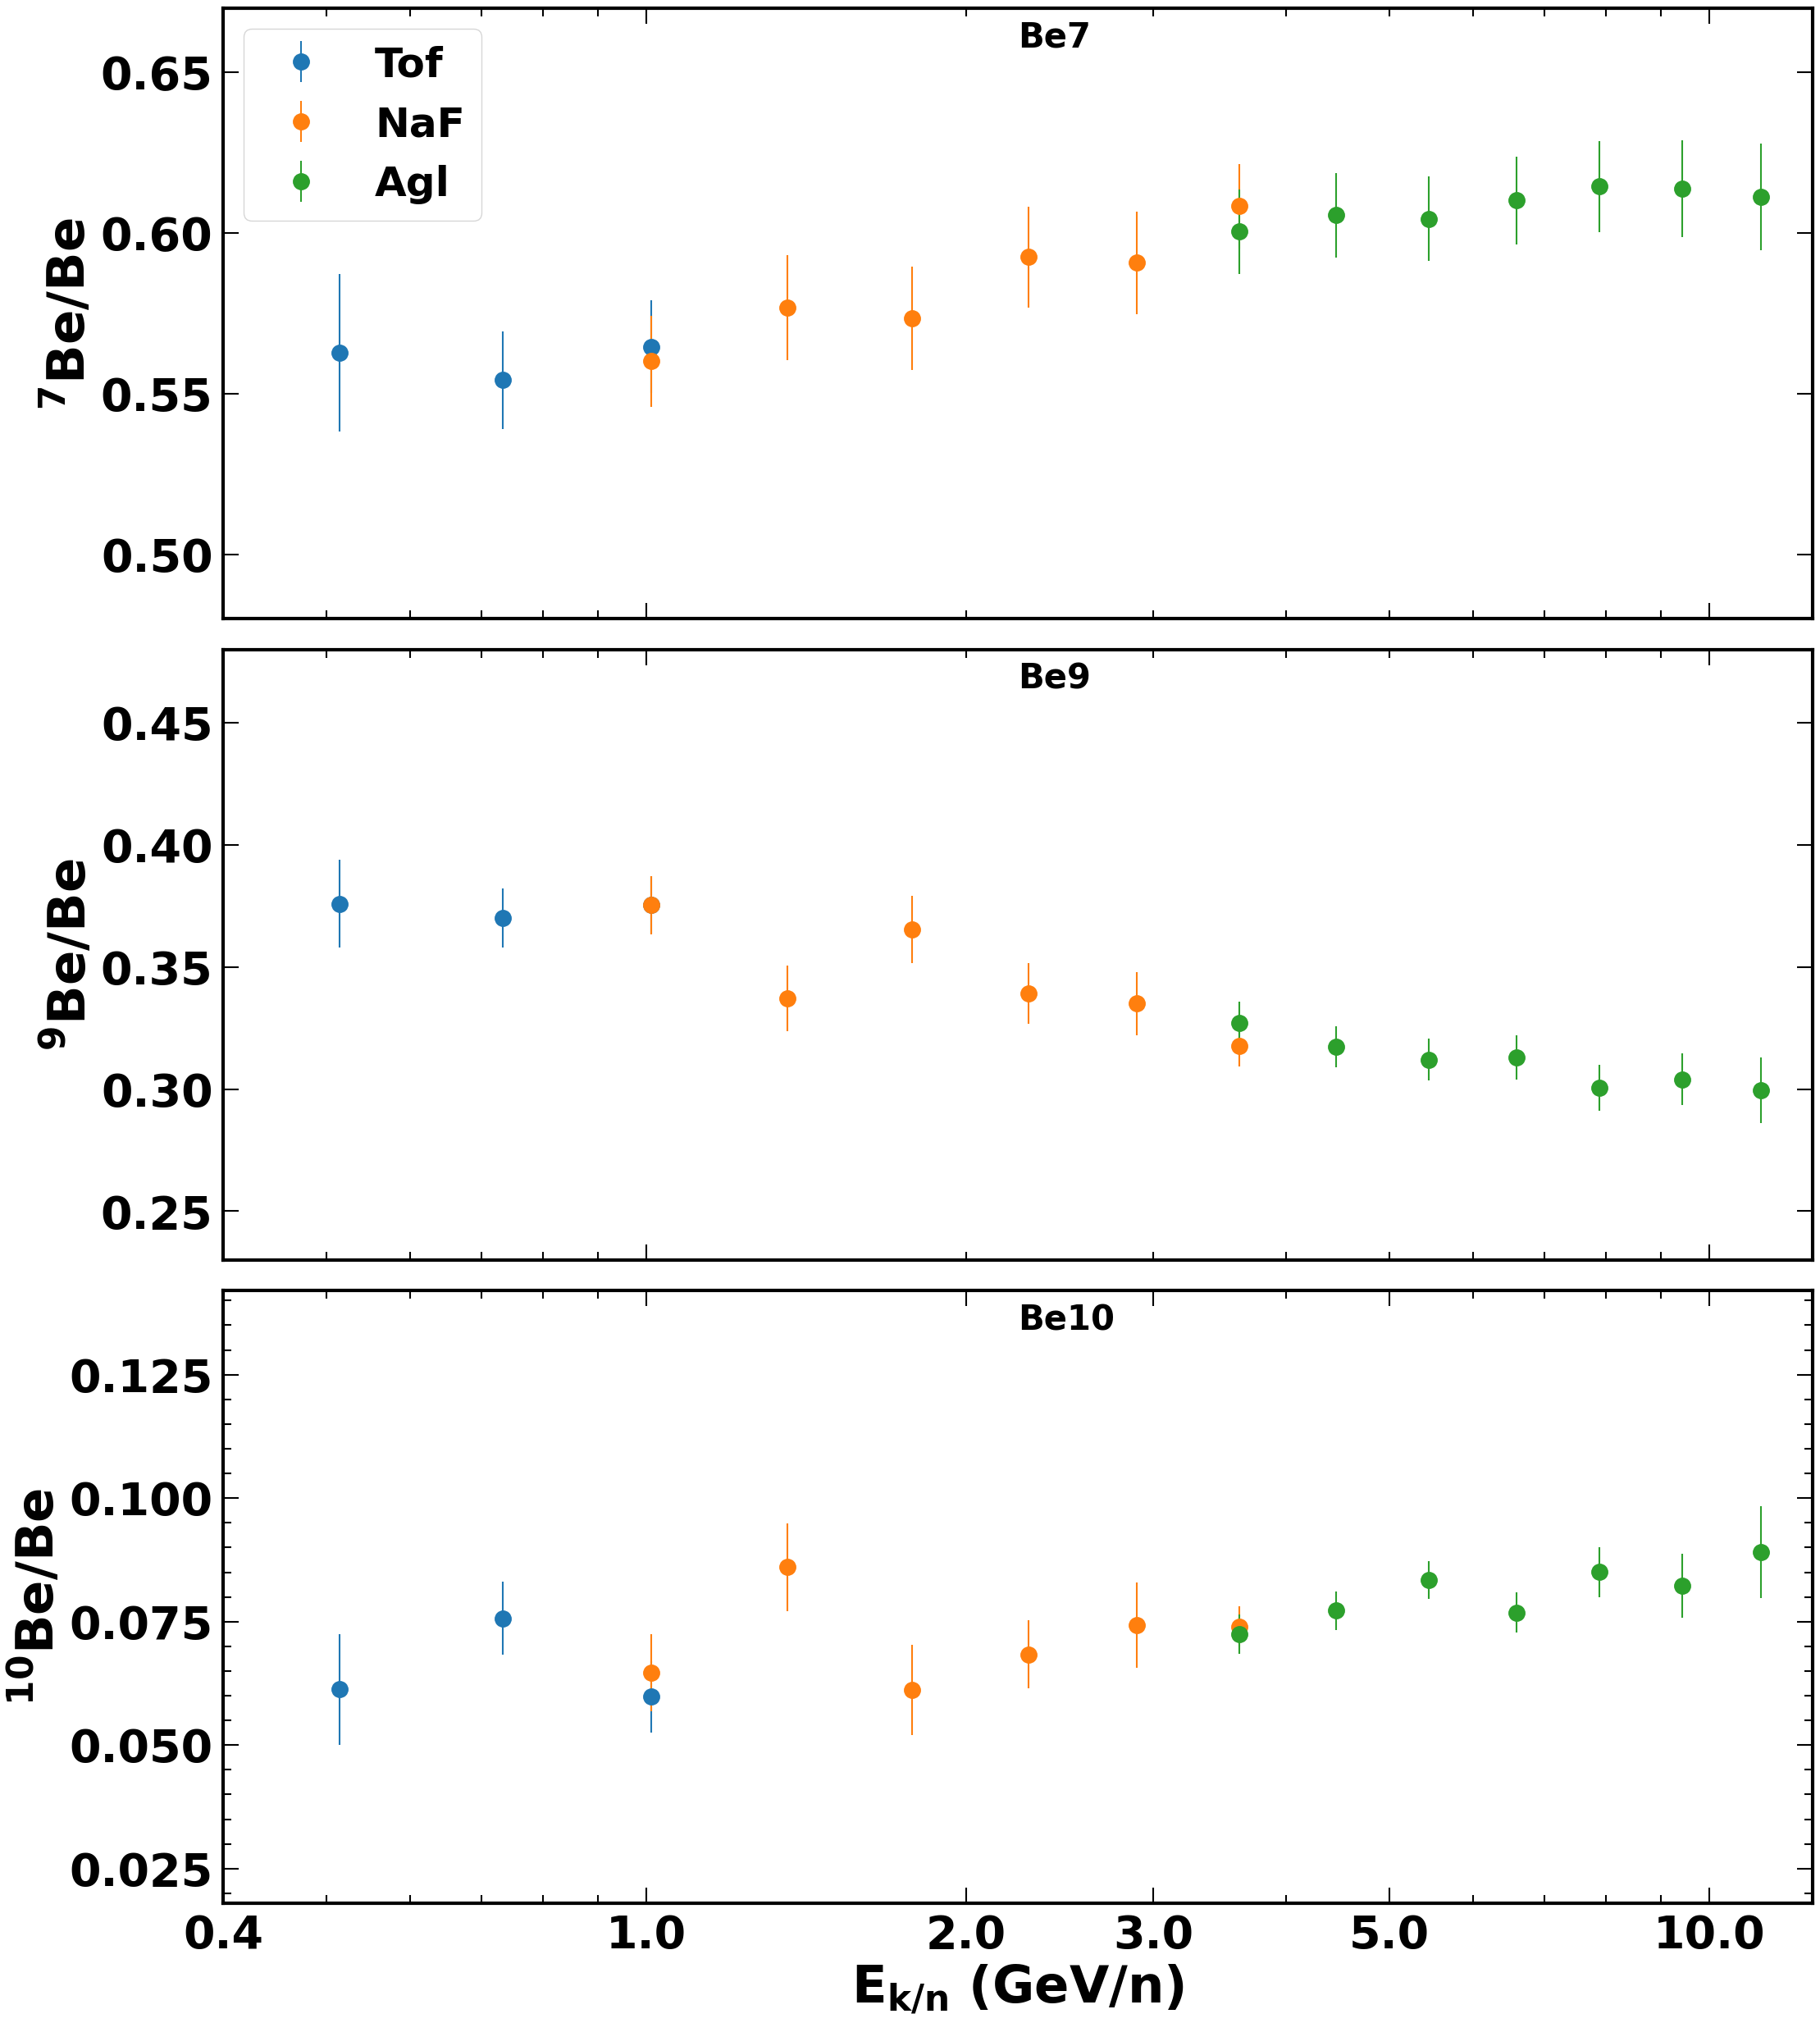

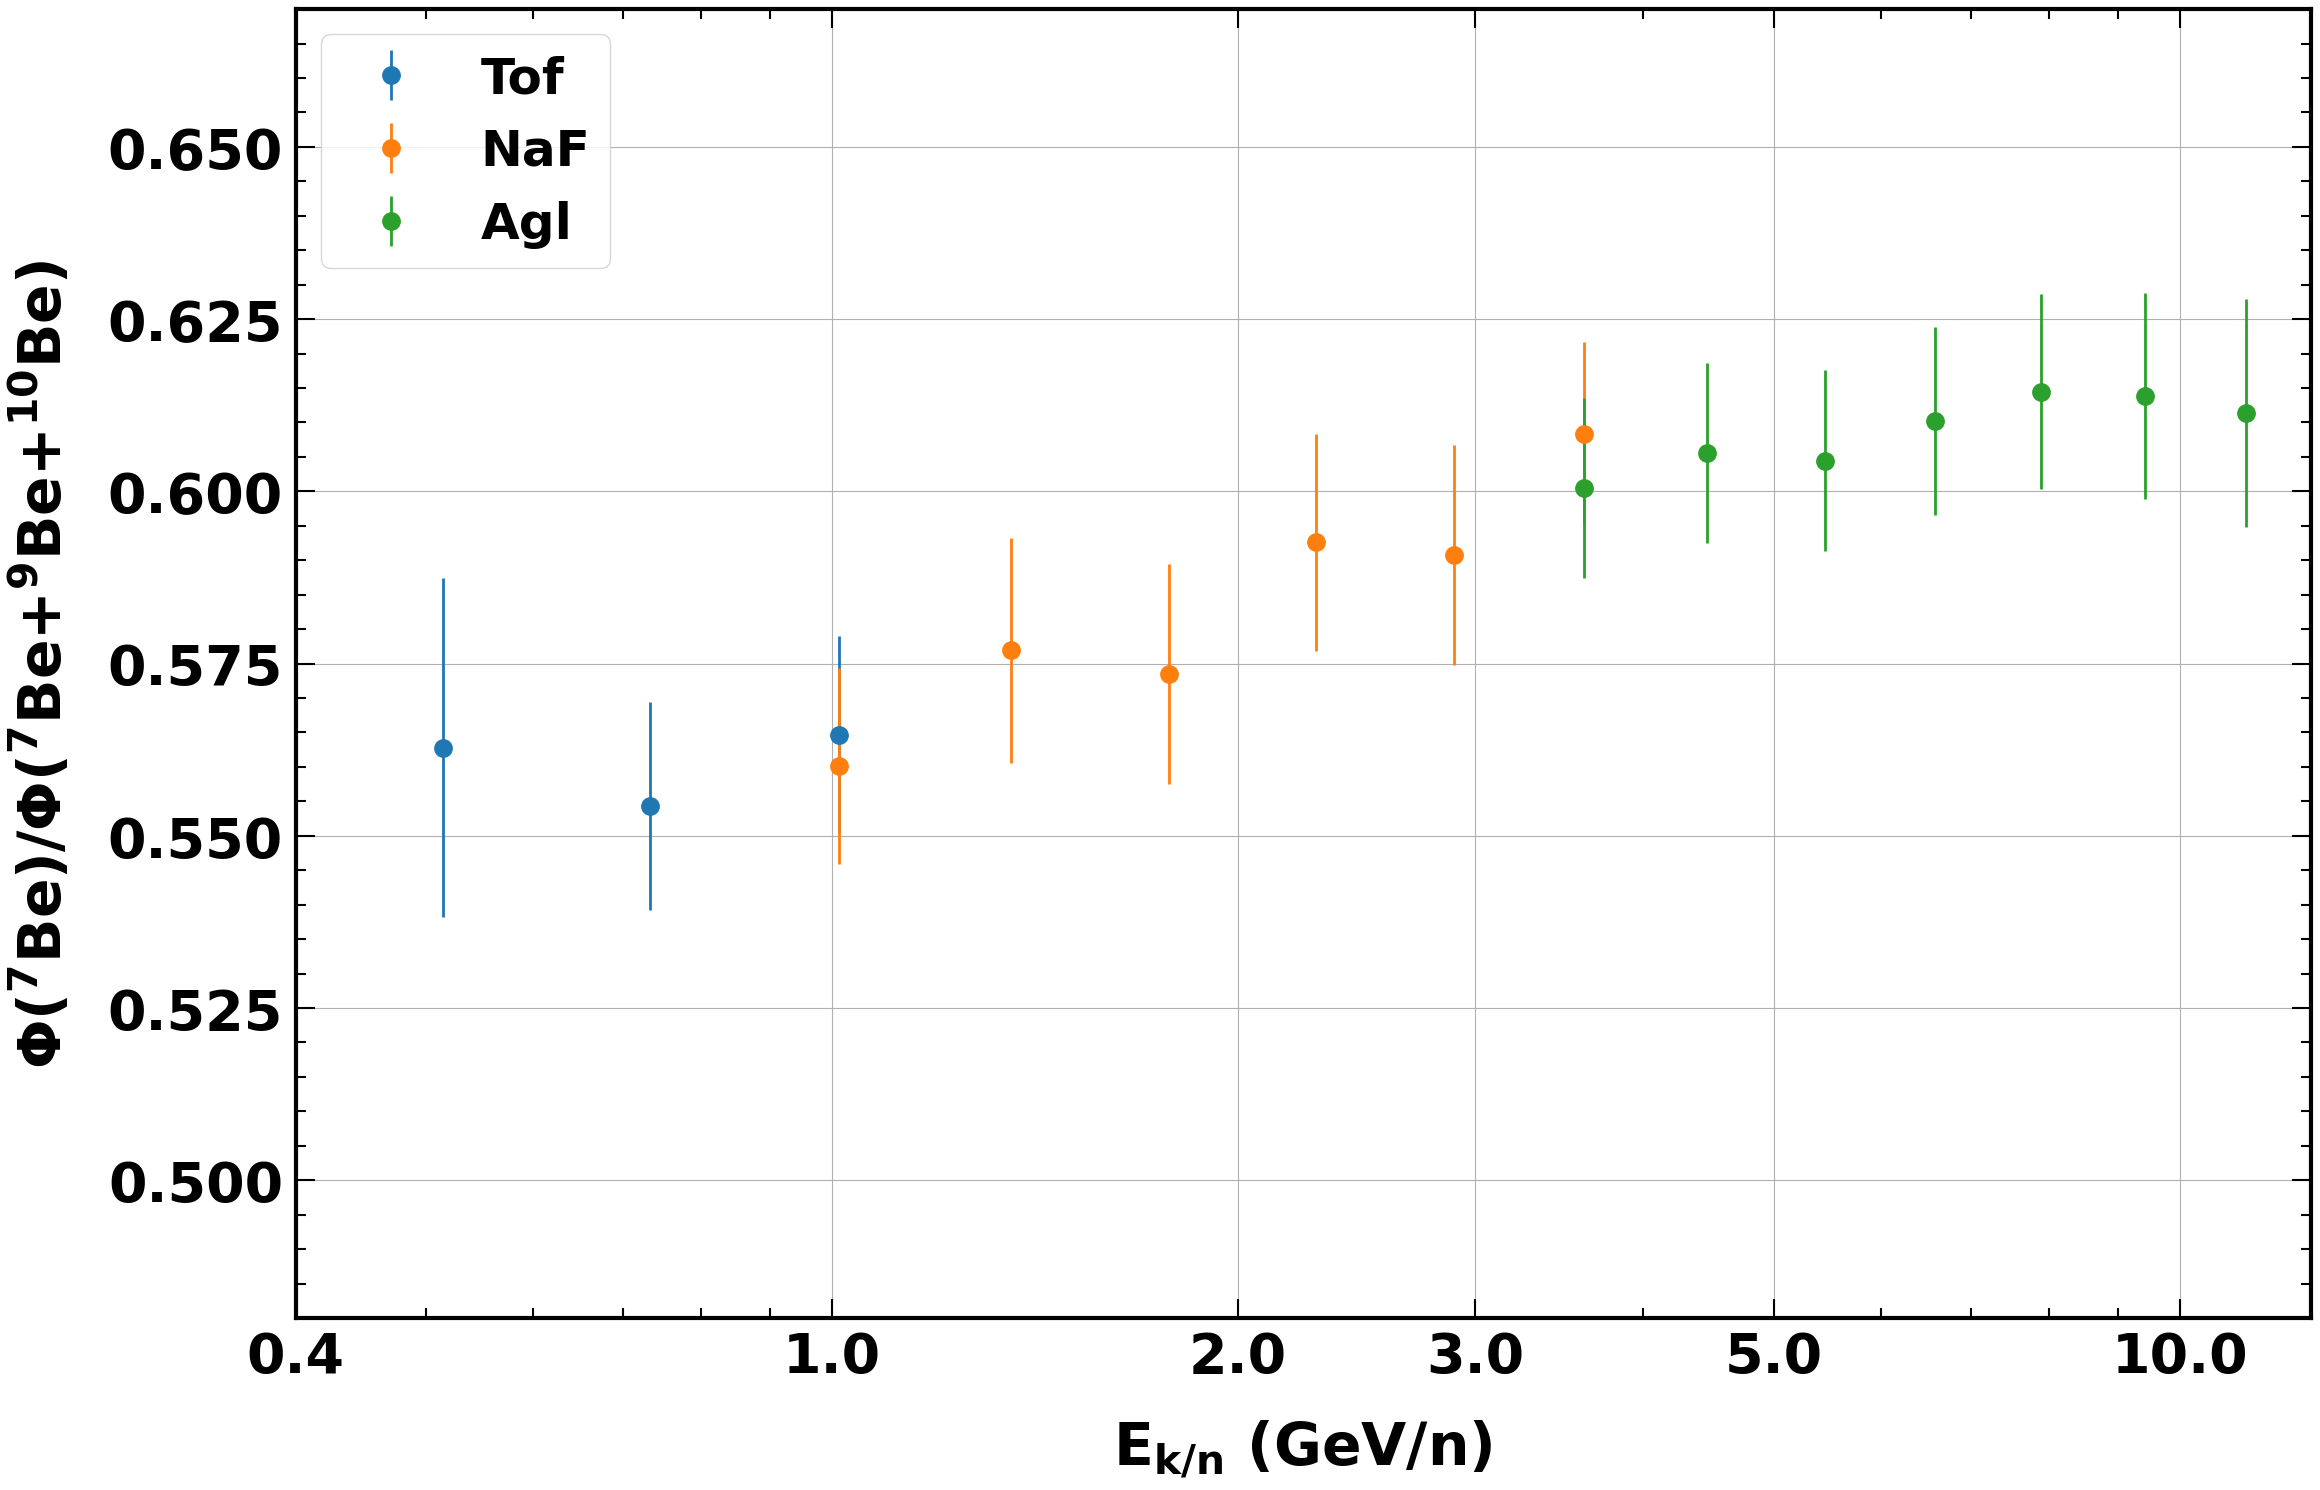

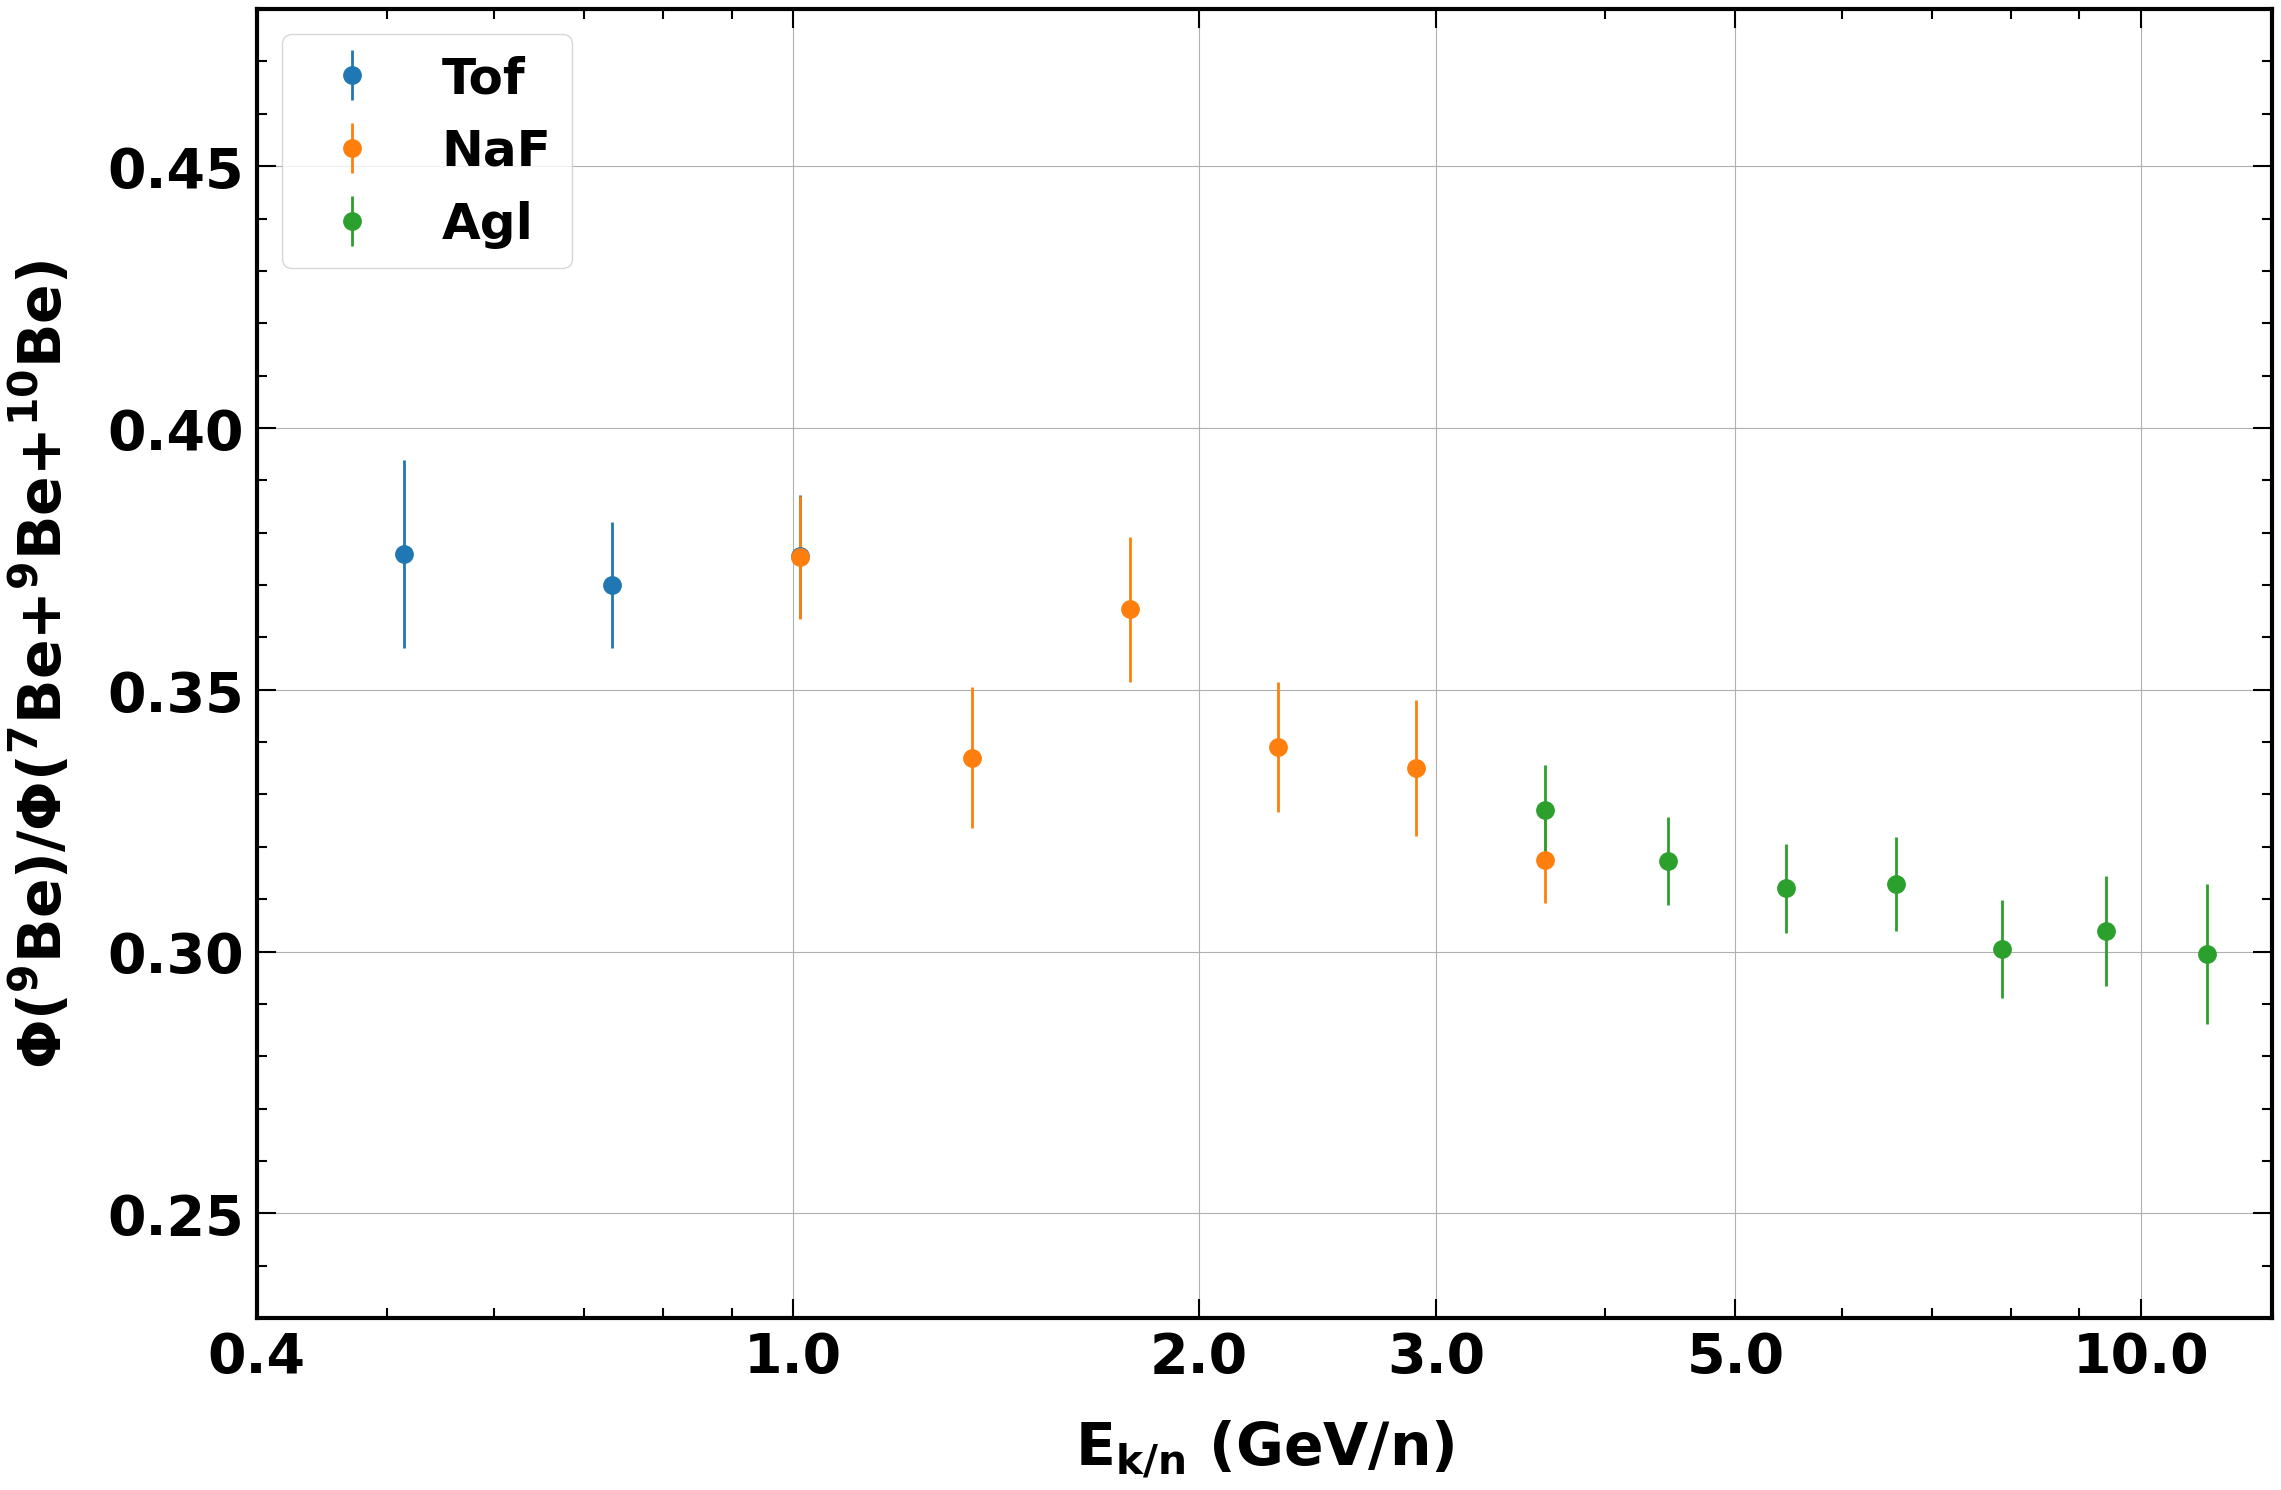

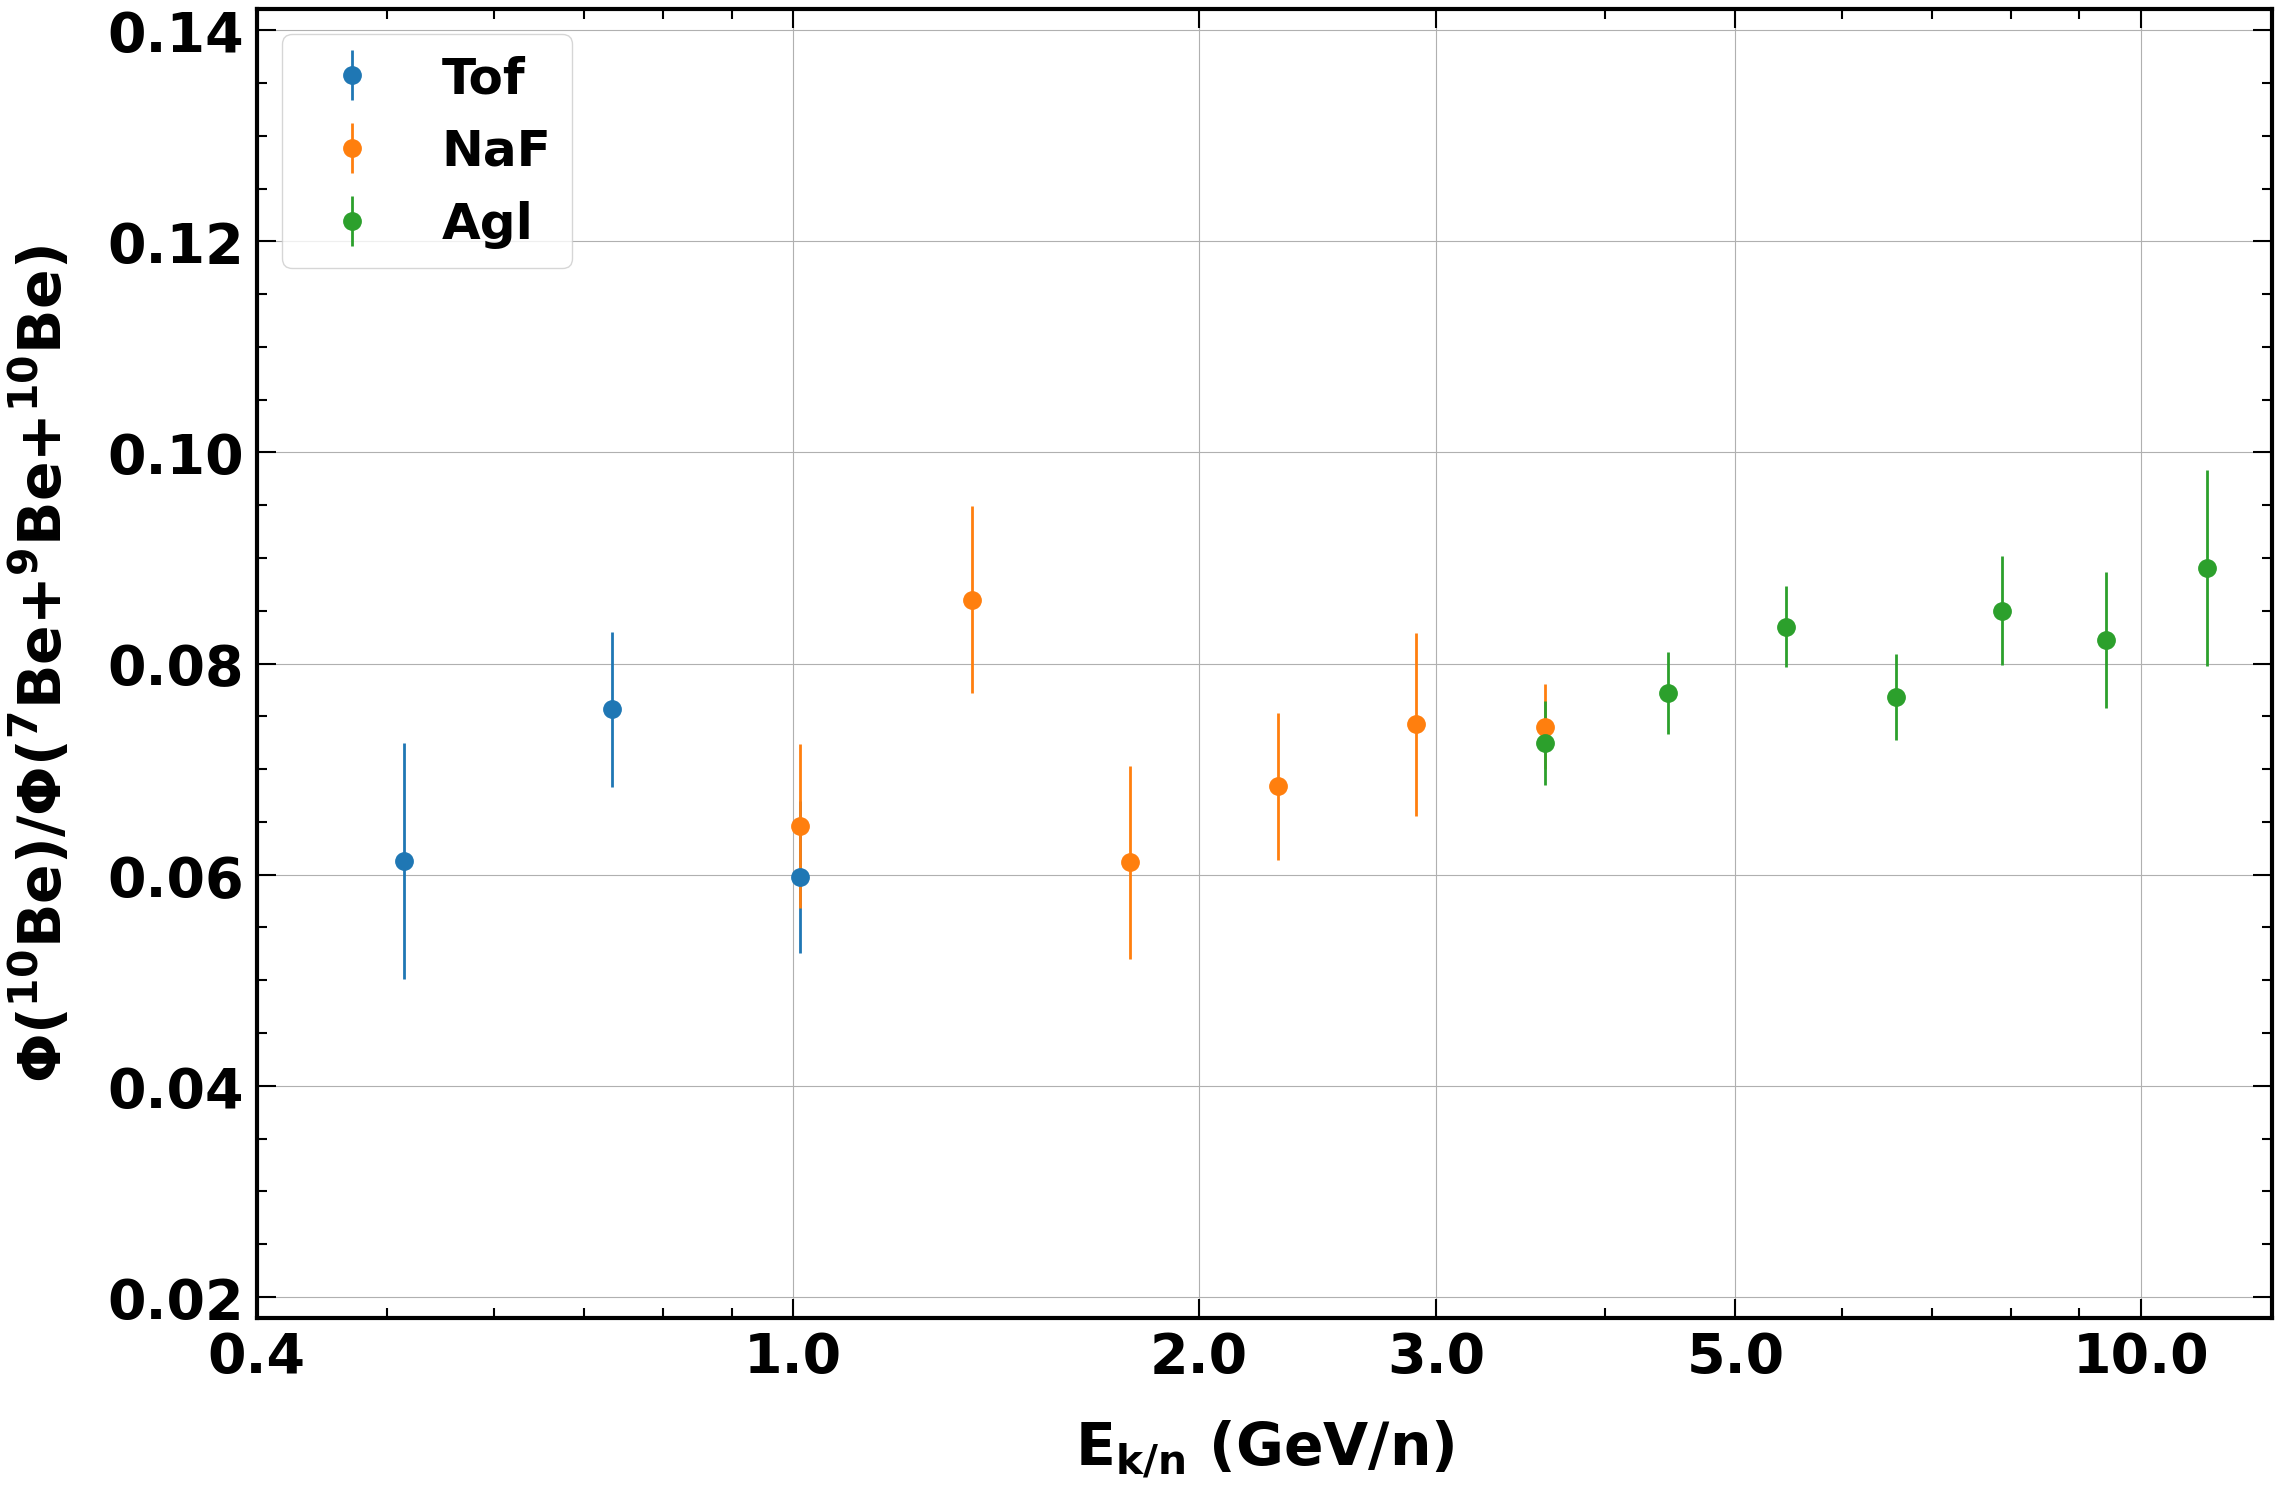

In [70]:
def write_graph_to_txtfile(mgraph, filepath, filename='data'):
    data = np.column_stack((mgraph.xvalues, mgraph.yvalues, mgraph.yerrs))
    np.savetxt(os.path.join(filepath, f'{filename}.csv'), data, delimiter=',', header='x,y,yerr', comments='')

def write_results_anderrs_tofile(graph1, graph_syserr, xbinning, datadir, filename, header=None, fmt=None, writeHeader=True):
    xbin_indices = xbinning.get_indices([graph1.xvalues[0], graph1.xvalues[-1]])
    bin_edges = xbinning.edges[xbin_indices[0]: xbin_indices[1]+2]  
    if header is None:        
        header = "Ekn_low_bin_edge, Ekn_up_bin_edge, Result, statistical_error, systematic_error"                                                                                                 
    if fmt is None:                                                                                                                                
        fmt = ('%.4f', '%.4f', '%.6f', '%.6f', '%.6f')    
    combined_array = np.column_stack((bin_edges[0:-1], bin_edges[1:], graph1.yvalues, graph1.yerrs, graph_syserr.yerrs))
    delimiter = ', ' 
    np.savetxt(os.path.join(datadir, f'{filename}.txt'), combined_array, fmt=fmt, delimiter=delimiter, header=header, comments='')  

    
graph_flux_raw = {dec: dict() for dec in detectors} 
graph_unfoldflux = {dec: dict() for dec in detectors}
graph_flux_fraction = {dec: dict() for dec in detectors}
subgraph_flux_fraction = {dec: dict() for dec in detectors}
graph_flux_fraction_err = {dec: dict() for dec in detectors}
graph_totalflux = {}
#xbinning = {"Rigidity": Binning(fbinning_energy()), "Ekin":Binning(fbinning_energy())}   
df_rawflux = dict() 
df_unfoldflux = dict()
subgraph_unfoldfactor = {}
data_dict ={dec:  dict() for dec in detectors}
for dec in detectors:     
    
    for iso in ISOTOPES[nuclei]:
        graph_counts =graph_counts_fromfit_Opt[dec][iso]
        
        xenergy = graph_counts.xvalues       
        
        #graph_accraw = slice_graph_by_value(graph_acc[dec][iso], [xenergy[0], xenergy[-1]])  
        graph_accraw = MGraph(xenergy, spline_subgraph_acc[dec][iso](np.log(xenergy)), 0.01*spline_subgraph_acc[dec][iso](np.log(xenergy)))
        graph_time = slice_graph_by_value(graph_measuretime[iso], [xenergy[0], xenergy[-1]]) 
        graph_effcor = slice_graph_by_value(graph_total_effcor_ekin[dec][iso], [xenergy[0], xenergy[-1]]) 
        graph_unfold = MGraph(xenergy, spline_unfoldfactor[iso](np.log(xenergy)), np.zeros_like(xenergy))
        
        counts = graph_counts.yvalues                                                                                                                                                                
        counts_err = graph_counts.yerrs                                                                                                                                                              
        effcor = graph_effcor.yvalues
        #acc = spline_subgraph_acc[dec][iso](np.log(xenergy))  
        acc = graph_accraw.yvalues
        acc_err = graph_accraw.yerrs
        
        unfold_factor = graph_unfold.yvalues
        indices = xbinning.get_indices([xenergy[0], xenergy[-1]])                                                                                                                                    
        #bin_widths = xbinning.bin_widths[indices[0]: indices[1]+1]                                                                                                                                  
        bin_edges = xbinning.edges[indices[0]: indices[1]+2]   

        bin_widths = bin_edges[1:] - bin_edges[:-1]  
        
        assert (np.all(xenergy == graph_effcor.xvalues))                                                                                                                                                                                                                                                                                                                             
        assert (np.all(xenergy == graph_time.xvalues))                                                                                                                                                               
        assert (np.all(xenergy == get_bin_center(bin_edges)))    
        assert (np.all(xenergy == graph_accraw.xvalues))
        assert (np.all(xenergy == graph_unfold.xvalues))
        
        flux_raw = counts / (effcor * acc *graph_time.yvalues * bin_widths)                                                                                                                               
        flux_raw_err = flux_raw * np.sqrt((counts_err/counts)**2 + (acc_err/acc)**2)                                                                                                                         
        graph_flux_raw[dec][iso] = MGraph(xenergy, flux_raw, flux_raw_err)                                                                                                                                                 
        graph_flux_raw[dec][iso].add_to_file(df_rawflux, f'graph_rawflux_{dec}{iso}')
        
        unfoldflux = flux_raw * graph_unfold.yvalues
        unfoldfluxerr = flux_raw_err * graph_unfold.yvalues
        graph_unfoldflux[dec][iso] = MGraph(xenergy, unfoldflux, unfoldfluxerr)
        header = "Ekn_low\tEkn_up\tflux\tfluxerr\tcounts\tcountserr\ttime\tacc\teffcor\tunfoldfactor\tunfolderr"
        fmt = ('%.5f, %.5f, %.5f, %.5f, %.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f')
        data_dict[dec][iso] = np.column_stack((bin_edges[0:-1], bin_edges[1:], unfoldflux, unfoldfluxerr, counts, counts_err, graph_time.yvalues, acc, effcor, unfold_factor, unfoldfluxerr))
        np.savetxt(os.path.join(datadirP8, f'results/Ingredients/{dec}{iso}flux{figname}.txt'), data_dict[dec][iso], fmt=fmt, delimiter='\t', header=header)  
        
        
graph_unfoldflux_totalerr = {dec: {} for dec in detectors}
graph_unfoldflux_syserr = {dec: {} for dec in detectors}
datadir_syserr = '/home/manbing/Documents/Data/data_BeP8/syserr'
npz_syserr = np.load(os.path.join(datadir_syserr, f'graph_syserr.npz'))
graph_totalerr = {}
for iso in isotopes:
    graph_totalerr[iso] = MGraph.from_file(npz_syserr, f'graph_totalerr_{iso}')    
    for dec in detectors:
        graph_unfoldflux_totalerr[dec][iso] = MGraph(graph_unfoldflux[dec][iso].xvalues, graph_unfoldflux[dec][iso].yvalues, np.zeros_like(graph_unfoldflux[dec][iso].xvalues))
        graph_unfoldflux_syserr[dec][iso] = MGraph(graph_unfoldflux[dec][iso].xvalues, graph_unfoldflux[dec][iso].yvalues, np.zeros_like(graph_unfoldflux[dec][iso].xvalues))
        
        subgraphtotalerr = slice_graph_by_value(graph_totalerr[iso], [graph_unfoldflux[dec][iso].xvalues[0], graph_unfoldflux[dec][iso].xvalues[-1]])
        flux_total_err = subgraphtotalerr.yvalues/100 * graph_unfoldflux[dec][iso].yvalues
        graph_unfoldflux_totalerr[dec][iso].yerrs = flux_total_err
        
        graph_unfoldflux_syserr[dec][iso].yerrs = np.sqrt(abs(flux_total_err**2 - graph_unfoldflux[dec][iso].yerrs**2))
        #print(dec, iso, 'stat', graph_unfoldflux[dec][iso].yerrs)
        #print(dec, iso, 'tot', flux_total_err)
        #print(dec, iso, 'sys', np.sqrt(flux_total_err**2 - graph_unfoldflux[dec][iso].yerrs**2))
        
############################################################################################
#combine the three detector flux and print out, both the stat err and sys err and total err
#############################################################################################
slicevalue = {'Tof': [0.4, 1.1], 'NaF':[1.2, 3.2], 'Agl':[4.0, 11]}
subgraph_unfoldflux_staterr = {dec: {} for dec in detectors}
subgraph_unfoldflux_syserr = {dec: {} for dec in detectors}
subgraph_unfoldflux_toterr = {dec: {} for dec in detectors}

for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        subgraph_unfoldflux_toterr[dec][iso] = slice_graph_by_value(graph_unfoldflux_totalerr[dec][iso], slicevalue[dec])
        subgraph_unfoldflux_staterr[dec][iso] = slice_graph_by_value(graph_unfoldflux[dec][iso], slicevalue[dec])
        subgraph_unfoldflux_syserr[dec][iso] = slice_graph_by_value(graph_unfoldflux_syserr[dec][iso], slicevalue[dec])

dtdir = {}
resultsdir = '/home/manbing/Documents/Data/data_BeP8/Be_results_June19'
graph_flux_combined_toterr = dict()
for iso in ISOTOPES[nuclei]:

    graph_flux_combined_toterr[iso] = subgraph_unfoldflux_toterr['Tof'][iso]
    graph_flux_combined_toterr[iso] = concatenate_graphs(graph_flux_combined_toterr[iso], subgraph_unfoldflux_toterr['NaF'][iso])
    graph_flux_combined_toterr[iso] = concatenate_graphs(graph_flux_combined_toterr[iso], subgraph_unfoldflux_toterr['Agl'][iso])
    graph_flux_combined_toterr[iso].add_to_file(dtdir, f'graph_{iso}_unfoldflux_toterr')
    
    #write_points_totxt_with_binedge(graph_flux_combined_toterr[iso], xbinning, resultsdir, f'{iso}Flux_Toterr')    

graph_flux_combined_staterr = dict()
for iso in ISOTOPES[nuclei]:
    graph_flux_combined_staterr[iso] = subgraph_unfoldflux_staterr['Tof'][iso]
    graph_flux_combined_staterr[iso] = concatenate_graphs(graph_flux_combined_staterr[iso], subgraph_unfoldflux_staterr['NaF'][iso])
    graph_flux_combined_staterr[iso] = concatenate_graphs(graph_flux_combined_staterr[iso], subgraph_unfoldflux_staterr['Agl'][iso])
    graph_flux_combined_staterr[iso].add_to_file(dtdir, f'graph_{iso}_unfoldflux_staterr')
    
np.savez(os.path.join(resultsdir, f'graph_Be_unfoldflux.npz'), **dtdir) 

graph_flux_combined_syserr = dict()
for iso in ISOTOPES[nuclei]:
    graph_flux_combined_syserr[iso] = subgraph_unfoldflux_syserr['Tof'][iso]
    graph_flux_combined_syserr[iso] = concatenate_graphs(graph_flux_combined_syserr[iso], subgraph_unfoldflux_syserr['NaF'][iso])
    graph_flux_combined_syserr[iso] = concatenate_graphs(graph_flux_combined_syserr[iso], subgraph_unfoldflux_syserr['Agl'][iso])
    #graph_flux_combined_syserr[iso].add_to_file(dtdir, f'graph_{iso}_unfoldflux_syserr')


for iso in ISOTOPES[nuclei]:
    write_results_anderrs_tofile(graph_flux_combined_staterr[iso], graph_flux_combined_syserr[iso], xbinning, resultsdir, f'{iso}Flux_StatSysErr')
    
graph_ratio_Be9ToBe7_combined_stat = graph_flux_combined_staterr['Be9']/graph_flux_combined_staterr['Be7']
graph_ratio_Be10ToBe9_combined_stat = graph_flux_combined_staterr['Be10']/graph_flux_combined_staterr['Be9']

graph_ratio_Be9ToBe7_combined_tot = graph_flux_combined_toterr['Be9']/graph_flux_combined_toterr['Be7']
graph_ratio_Be10ToBe9_combined_tot = graph_flux_combined_toterr['Be10']/graph_flux_combined_toterr['Be9']

syserr_ratio9to7 = np.sqrt(graph_ratio_Be9ToBe7_combined_tot.yerrs**2 - graph_ratio_Be9ToBe7_combined_stat.yerrs**2)
graph_ratio_Be9ToBe7_combined_sys = MGraph(graph_ratio_Be9ToBe7_combined_stat.xvalues, graph_ratio_Be9ToBe7_combined_stat.yvalues, syserr_ratio9to7)
write_results_anderrs_tofile(graph_ratio_Be9ToBe7_combined_stat, graph_ratio_Be9ToBe7_combined_sys, xbinning, resultsdir, f'Be9ToBe7Ratio_StatSysErr')

syserr_ratio10to9 = np.sqrt(graph_ratio_Be10ToBe9_combined_tot.yerrs**2 - graph_ratio_Be10ToBe9_combined_stat.yerrs**2)
graph_ratio_Be10ToBe9_combined_sys = MGraph(graph_ratio_Be10ToBe9_combined_stat.xvalues, graph_ratio_Be10ToBe9_combined_stat.yvalues, syserr_ratio10to9)
write_results_anderrs_tofile(graph_ratio_Be10ToBe9_combined_stat, graph_ratio_Be10ToBe9_combined_sys, xbinning, resultsdir, f'Be10ToBe9Ratio_StatSysErr')

write_points_totxt_with_binedge(graph_ratio_Be9ToBe7_combined_tot, xbinning, resultsdir, f'Be9ToBe7Ratio_toterr')    
write_points_totxt_with_binedge(graph_ratio_Be10ToBe9_combined_tot, xbinning, resultsdir, f'Be10ToBe9Ratio_toterr')    

fig, ax1 = plt.subplots(figsize=(28, 16))
for iso in ISOTOPES[nuclei]:
    plot_graph(fig, ax1, graph_flux_combined_toterr[iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
        
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1})}$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_style(ax1)   
ax1.legend()
ax1.set_ylim([0.00005, 1.5])
ax1.set_xlim([0.4, 12.5])

#################################################################################################
graph_flux_fraction_toterr = {dec: {} for dec in detectors}

for dec in detectors:
    yterrs =  np.sqrt(graph_unfoldflux_totalerr[dec]['Be7'].yerrs**2 + graph_unfoldflux_totalerr[dec]['Be9'].yerrs**2 + graph_unfoldflux_totalerr[dec]['Be10'].yerrs**2) 
    ytvalues =  graph_unfoldflux_totalerr[dec]['Be7'].yvalues +graph_unfoldflux_totalerr[dec]['Be9'].yvalues + graph_unfoldflux_totalerr[dec]['Be10'].yvalues 
    graph_totalflux[dec] = MGraph(graph_unfoldflux_totalerr[dec]['Be7'].xvalues, ytvalues, yterrs)
    for iso in ISOTOPES[nuclei]:
        frac, frac_yerr =  calc_ratio_and_err(graph_unfoldflux_totalerr[dec][iso].yvalues, graph_totalflux[dec].yvalues, graph_unfoldflux_totalerr[dec][iso].yerrs, graph_totalflux[dec].yerrs, correlation=0)
        graph_flux_fraction[dec][iso] = MGraph(graph_unfoldflux_totalerr[dec][iso].xvalues, frac, frac_yerr)
        subgraph_flux_fraction[dec][iso] = slice_graph_by_value(graph_flux_fraction[dec][iso], slicevalue[dec])
        graph_flux_fraction_err[dec][iso] = graph_unfoldflux_totalerr[dec][iso]/graph_totalflux[dec]
        
#for iso in ISOTOPES[nuclei]:
#    graph_flux_raw['NaF'][iso] = slice_graph_by_value(graph_flux_raw['NaF'][iso], [1.1, 4.2])
isoylim={'Be7': [0.48, 0.67], 'Be9':[0.23, 0.48], 'Be10':[0.018, 0.142]}
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.333, 0.333, 0.334]}, figsize=(25, 30))
ax = [ax1, ax2, ax3]

for iso in isotopes:
    graph_flux_fraction['Tof'][iso] = slice_graph_by_value(graph_flux_fraction['Tof'][iso], [0.5, 1.0])
    
DETECTOR_COLOR = {"Tof": "tab:blue", "NaF": "tab:orange", "Agl": "tab:green"}  
for i, iso in enumerate(ISOTOPES['Be']):
    ax[i].text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold")
    ax[i].set_ylabel(f"{ISO_LABELS[iso]}/Be")   
    for dec in detectors:
        plot_graph(fig, ax[i], graph_flux_fraction[dec][iso], color=DETECTOR_COLOR[dec], style="EP", xlog=True, ylog=False, markersize=28, label=f'{dec}')
    ax[i].set_ylim(isoylim[iso])    
    ax[i].set_xlim([0.4, 12.5])  
ax1.legend(loc='upper left')
ax3.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$")    
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                
ax3.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
                                                                                                                   
ax1.set_xticklabels([])
ax2.set_xticklabels([])
#ax1.get_xticklabels()[0].set_visible(False)   
#ax2.get_xticklabels()[0].set_visible(False) 
set_plot_style(ax1)                                                                                                                                                                                 
set_plot_style(ax2)   
set_plot_style(ax3)
plt.subplots_adjust(hspace=.05)
#plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
savefig_tofile(fig, plotfile, f'be_isoflux_{figname}_fraction_3May', 1)
print(plotfile, f'be_isoflux_{figname}_fraction')

graph_flux_fraction_combined = {}
for iso in ISOTOPES[nuclei]:
    graph_flux_fraction_combined[iso] = subgraph_flux_fraction['Tof'][iso]
    graph_flux_fraction_combined[iso] = concatenate_graphs(graph_flux_fraction_combined[iso], subgraph_flux_fraction['NaF'][iso])
    graph_flux_fraction_combined[iso]= concatenate_graphs(graph_flux_fraction_combined[iso], subgraph_flux_fraction['Agl'][iso])
    headerfluxfraction = "Ekn_low, Ekn_up, fluxFrac, err" 
    write_points_totxt_with_binedge(graph_flux_fraction_combined[iso], xbinning, resultsdir, f'{iso}_FluxFraction', header=headerfluxfraction)


for i, iso in enumerate(ISOTOPES['Be']):
    fig, ax1 = plt.subplots(figsize=(26, 17))
    #ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold")
    
    for dec in detectors:
        plot_graph(fig, ax1, graph_flux_fraction[dec][iso], color=DETECTOR_COLOR[dec], style="EP", xlog=True, ylog=False, markersize=25, label=f'{dec}', linewidth=2)
        #write_graph_to_txtfile(graph_flux_fraction[dec][iso], plotfile, filename=f'{iso}_{dec}')
        headerfluxfraction = "Ekn_low, Ekn_up, fluxFrac, err" 
        write_points_totxt_with_binedge(graph_flux_fraction[dec][iso], xbinning, resultsdir, f'{iso}_{dec}_FluxFraction', header=headerfluxfraction)
    SetAx1Axis(ax1, r"$\mathrm{E_{k/n} \ (GeV/n)}$", rf"$\Phi$({ISO_LABELS[iso]})/$\Phi$({ISO_LABELS['Be7']}+{ISO_LABELS['Be9']}+{ISO_LABELS['Be10']})", TEXTSIZE+2, xlimrange=None, ylimrange=isoylim[iso], custom_ticks=None, custom_tickslabels=None, gridx=False, gridy=False)  
    
    

    ax1.legend(loc='upper left')
    ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
    #set_plot_defaultstyle(ax1)   
    set_plot_style(ax1)
    ax1.set_xlim([0.4, 12.5]) 
    print(plotfile)
    ax1.grid()
    #plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'
    savefig_tofile(fig, plotfile, f'be_isoflux_{figname}_fraction_{iso}', 1)
    print(plotfile)
    
    
    


Tof [0.18012175 0.09573505 0.11947577 0.10153401]
NaF [0.11947577 0.10153401 0.14788375 0.10025054 0.11504626 0.05300678]
Agl [0.05300678 0.0486585  0.04396    0.05118584 0.05867347 0.07661939
 0.10276836]


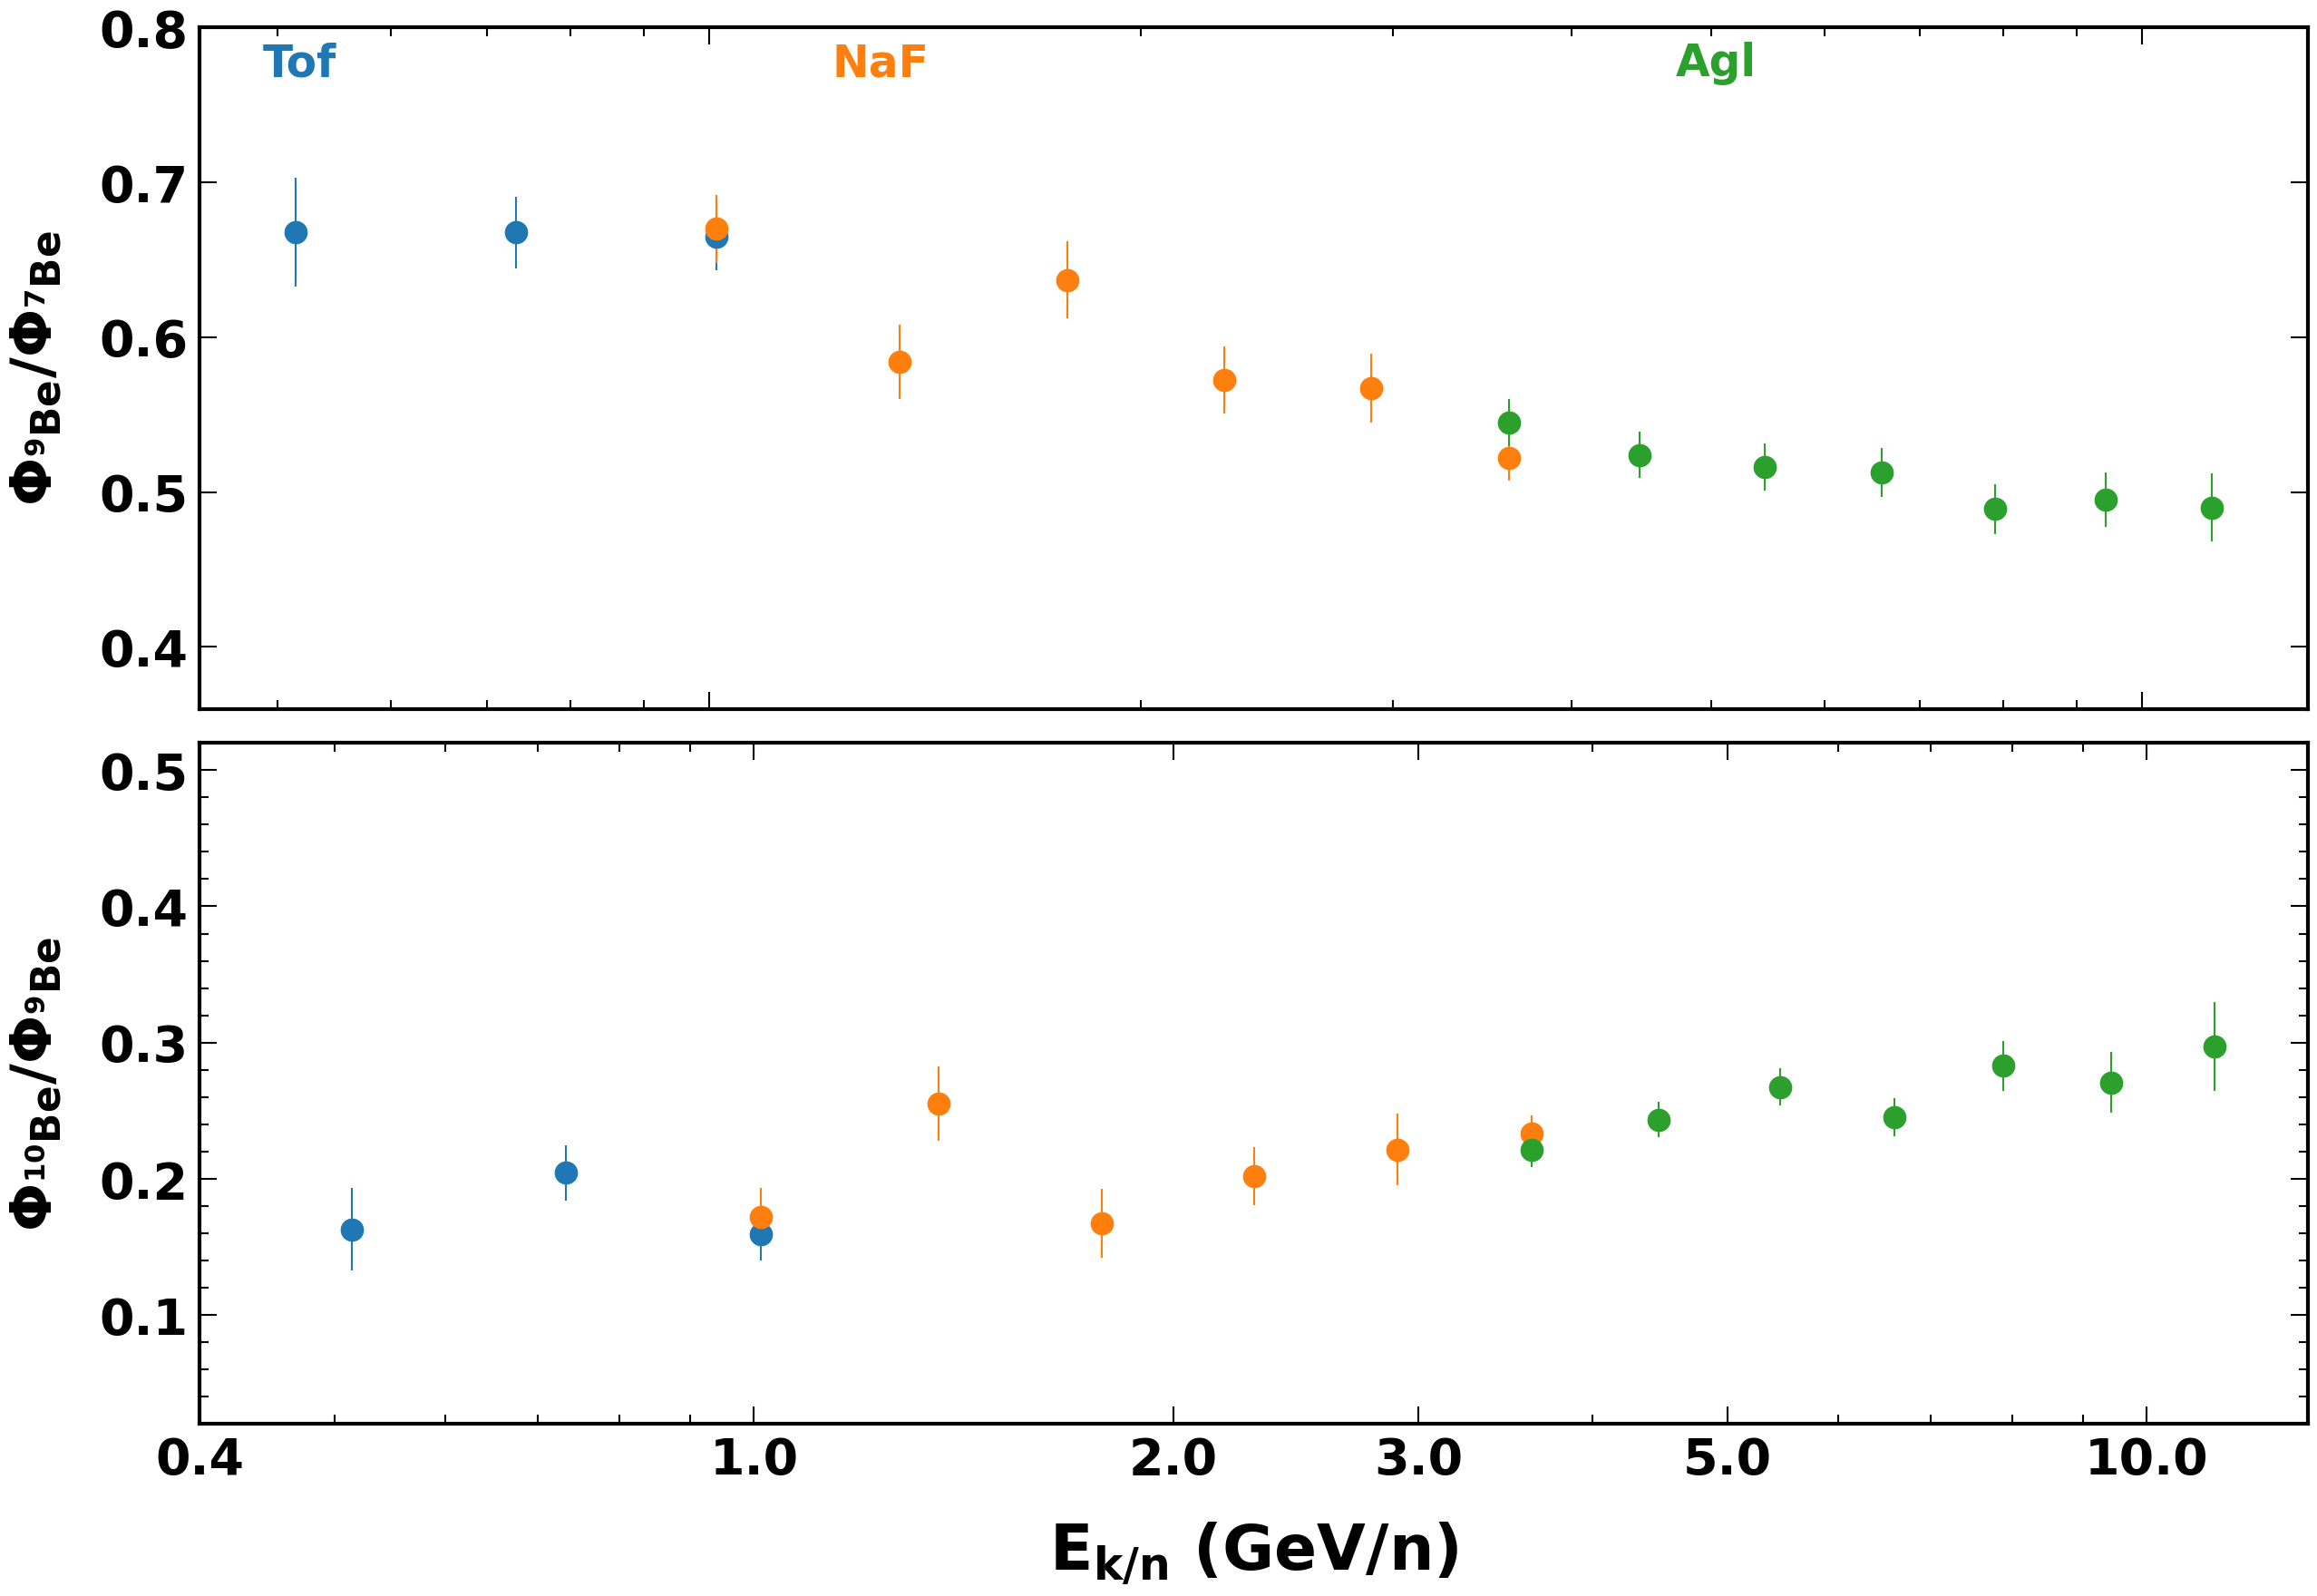

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(30, 20)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 


graph_flux_ratio_10to9 = {}
graph_flux_ratio_9to7 = {}
mksize = 35
slicevalue = {'Tof':[0.5, 1.1], 'NaF':[1.1, 4.0], 'Agl':[4.0, 12]}


for dec in detectors:
    print(dec, graph_unfoldflux_totalerr[dec]['Be10'].yerrs/graph_unfoldflux_totalerr[dec]['Be10'].yvalues)
    ratio10to9, ratio10to9_yerr =  calc_ratio_and_err(graph_unfoldflux_totalerr[dec]['Be10'].yvalues, graph_unfoldflux_totalerr[dec]['Be9'].yvalues, graph_unfoldflux_totalerr[dec]['Be10'].yerrs, graph_unfoldflux_totalerr[dec]['Be9'].yerrs, correlation=0)
    ratio9to7, ratio9to7_yerr =  calc_ratio_and_err(graph_unfoldflux_totalerr[dec]['Be9'].yvalues, graph_unfoldflux_totalerr[dec]['Be7'].yvalues, graph_unfoldflux_totalerr[dec]['Be9'].yerrs, graph_unfoldflux_totalerr[dec]['Be7'].yerrs, correlation=0)
    graph_flux_ratio_10to9[dec] = MGraph(graph_unfoldflux_totalerr[dec]['Be9'].xvalues, ratio10to9, ratio10to9_yerr)
    graph_flux_ratio_9to7[dec] = MGraph(graph_unfoldflux_totalerr[dec]['Be9'].xvalues, ratio9to7, ratio9to7_yerr)
    #graph_flux_ratio_9to7[dec] = graph_unfoldflux_totalerr[dec]['Be9']/graph_unfoldflux_totalerr[dec]['Be7']
    #graph_flux_ratio_10to9[dec] = graph_unfoldflux_totalerr[dec]['Be10']/graph_unfoldflux_totalerr[dec]['Be9']
    
#graph_flux_ratio_9to7['NaF'].yvalues[1]= 0.6 
#graph_flux_ratio_10to9['NaF'].yvalues[1] = 0.24
#graph_flux_ratio_10to9['NaF'].yvalues[4] = 0.21
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=FONTSIZE+5, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=DETECTOR_COLOR[dec], fontweight="bold")      
    
    if dec == 'Tof':
        plot_graph(fig, ax2, slice_graph_by_value(graph_flux_ratio_10to9[dec], slicevalue[dec]),  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize, label='Pass8 GBL')
        
    else: 
        #plot_graph(fig, ax2, graph_rawflux_ratio_10to9_P7[dec], color='black', style="EP", xlog=False, ylog=False, markersize=mksize-2)
        plot_graph(fig, ax2, graph_flux_ratio_10to9[dec],  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize)
        #plot_graph(fig, ax2, slice_graph_by_value(graph_rawflux_ratio_10to9[dec], xlimvalue[dec]),  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize-2)
        
    #plot_graph(fig, ax1, graph_rawflux_ratio_9to7_P7[dec], color='black', style="EP", xlog=False, ylog=False, markersize=mksize-2)
    plot_graph(fig, ax1, slice_graph_by_value(graph_flux_ratio_9to7[dec], slicevalue[dec]), color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize)
    
   
                                                                                                                            
#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   


ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=45, labelpad=28)  
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=45, labelpad=28)  
ax2.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", fontsize=50, labelpad=28)

ax1.set_ylim([0.36, 0.8]) 
ax2.set_ylim([0.02, 0.52]) 
ax1.set_xticklabels([])

ax1.set_xscale('log')
ax2.set_xscale('log')

ax2.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$")    
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
                                                                                                                   
ax1.set_xticklabels([])

set_plot_style(ax1) 
set_plot_style(ax2) 

plt.subplots_adjust(hspace=.05)   
plotdir ='/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotdir, 'be_fluxratio_alldecVN', 1)

skip #
skip #
skip #
skip #
skip #
skip #

xvalues			yvalues			yerrs
0.5144			0.026777927925753026			0.0013638131726728092
0.7332			0.02815756261066387			0.0010036652956546227
1.01135			0.016841243248288826			0.0007009954303724866
1.3569499999999999			0.016028932948499018			0.0009447378937703213
1.7779			0.00816037900652009			0.0006323094121534261
2.28735			0.006101646723491556			0.0004319625032898523
2.8959			0.004266966838288167			0.00031452839350664183
3.61425			0.0027081736582503734			0.00023400994289164391
4.45875			0.0018142381462003445			5.077178736256602e-05
5.4516			0.0012352519671954062			3.4533783732497984e-05
6.58395			0.0007234539956808387			2.495372036159007e-05
7.88955			0.0005065433415672191			1.9382916996328102e-05
9.425			0.00031344517569966194			1.6460686495156692e-05
11.190249999999999			0.0002136701352153994			1.5337421712585705e-05



(0.4, 12.5)

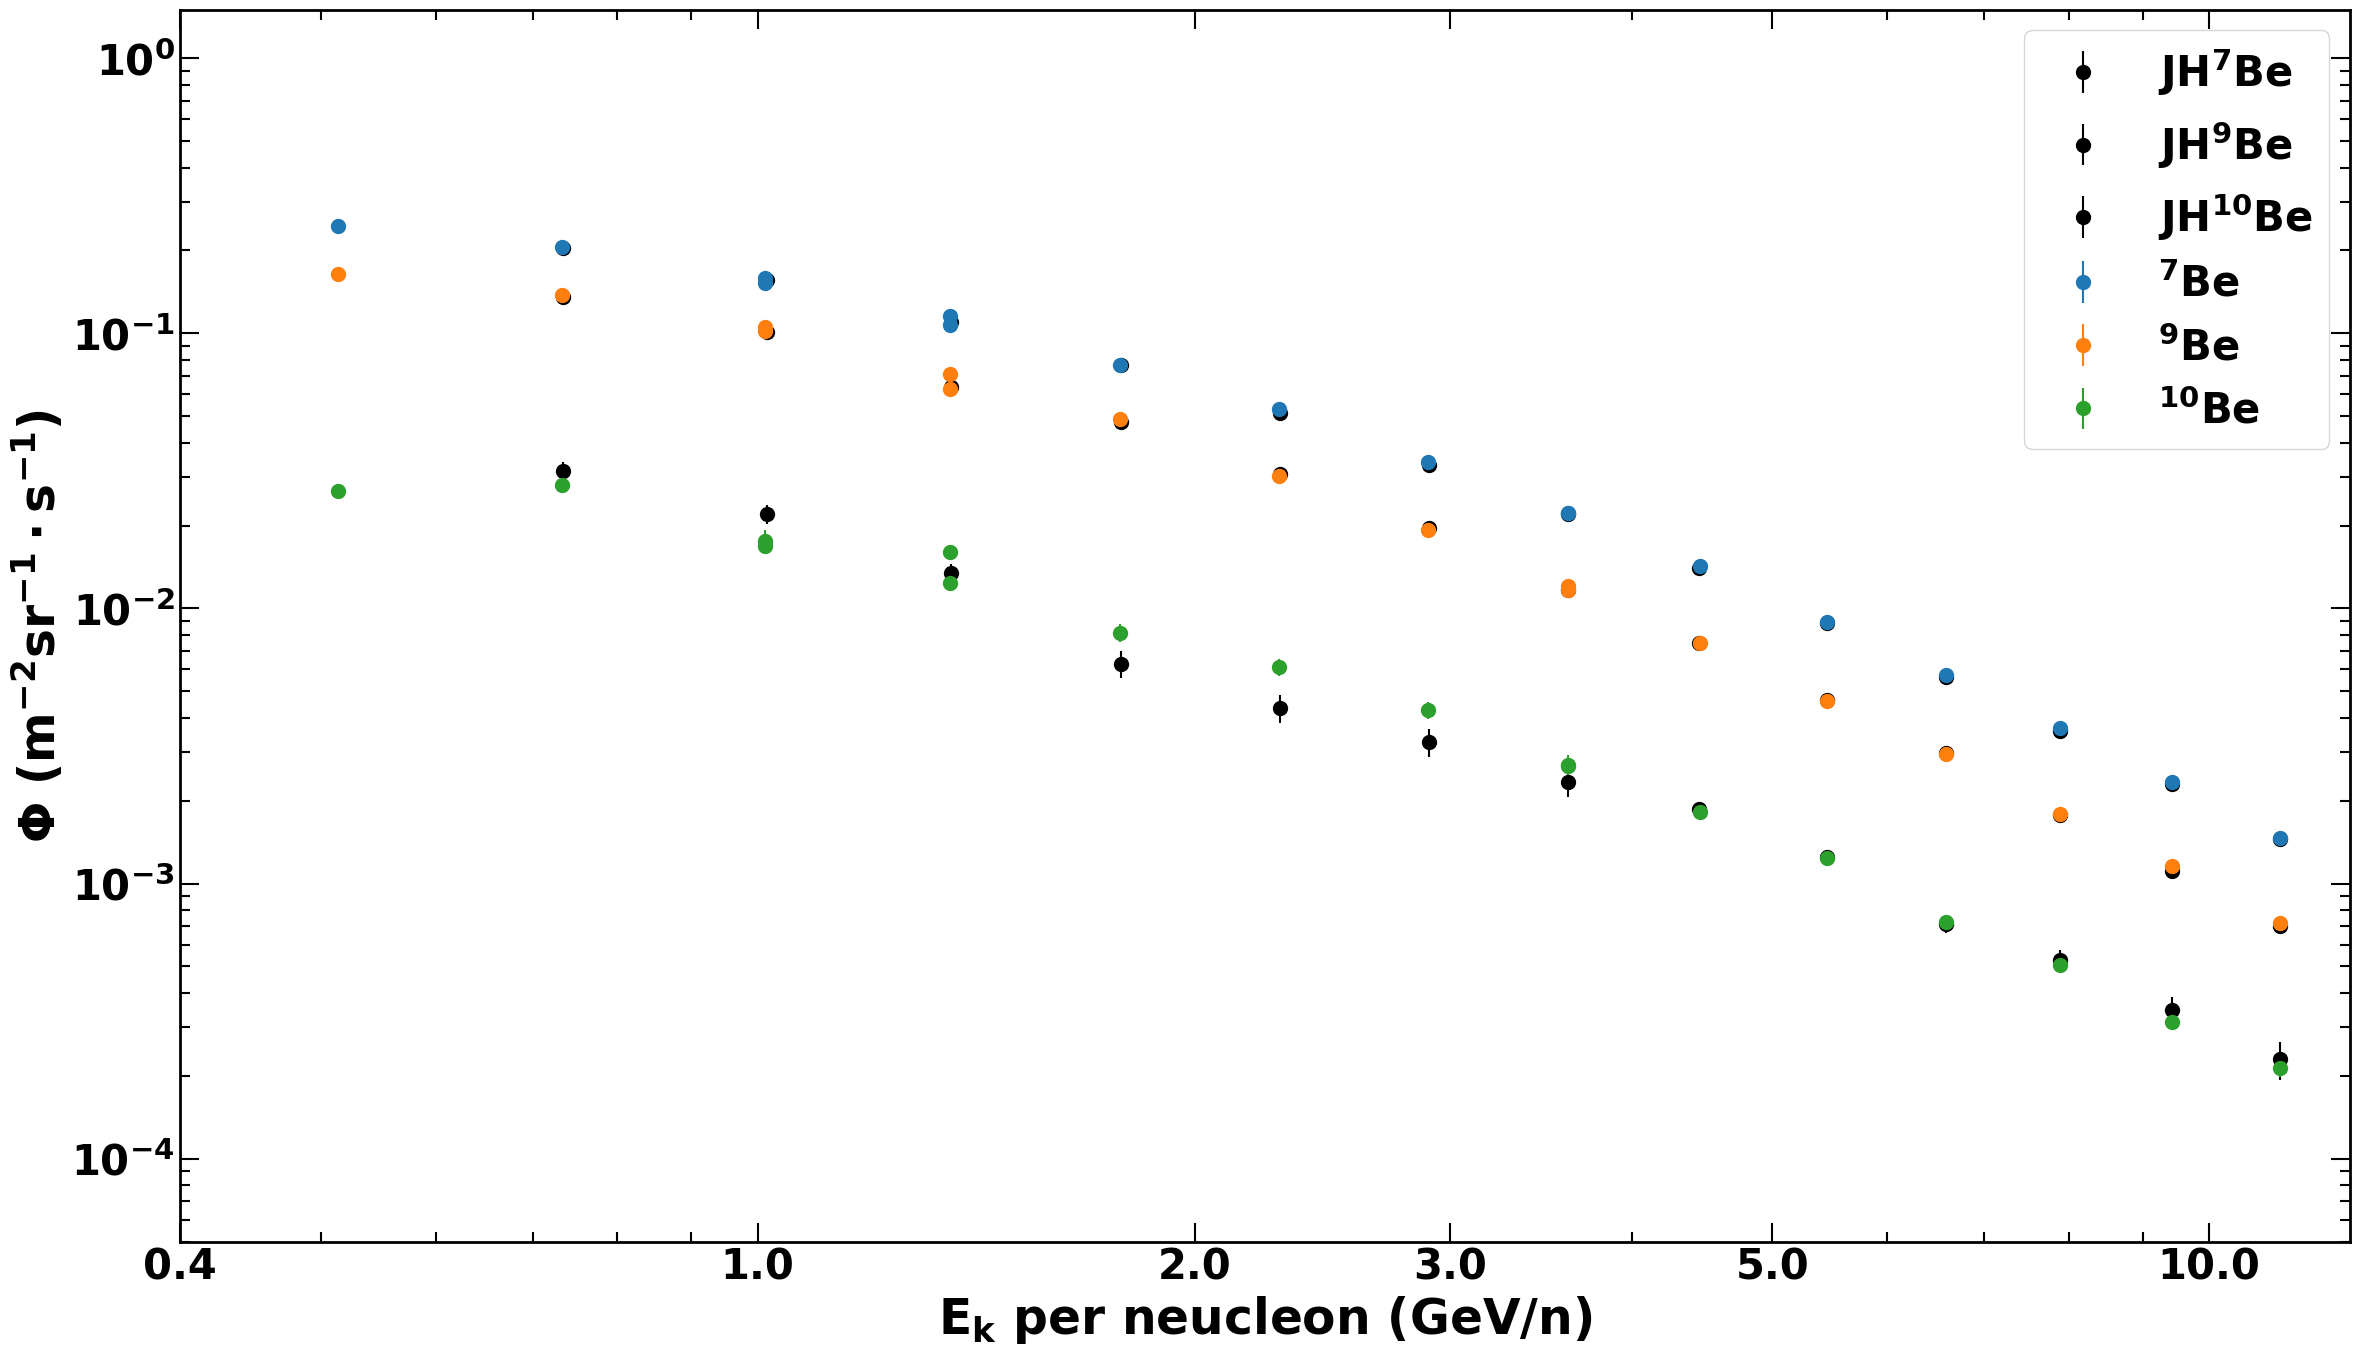

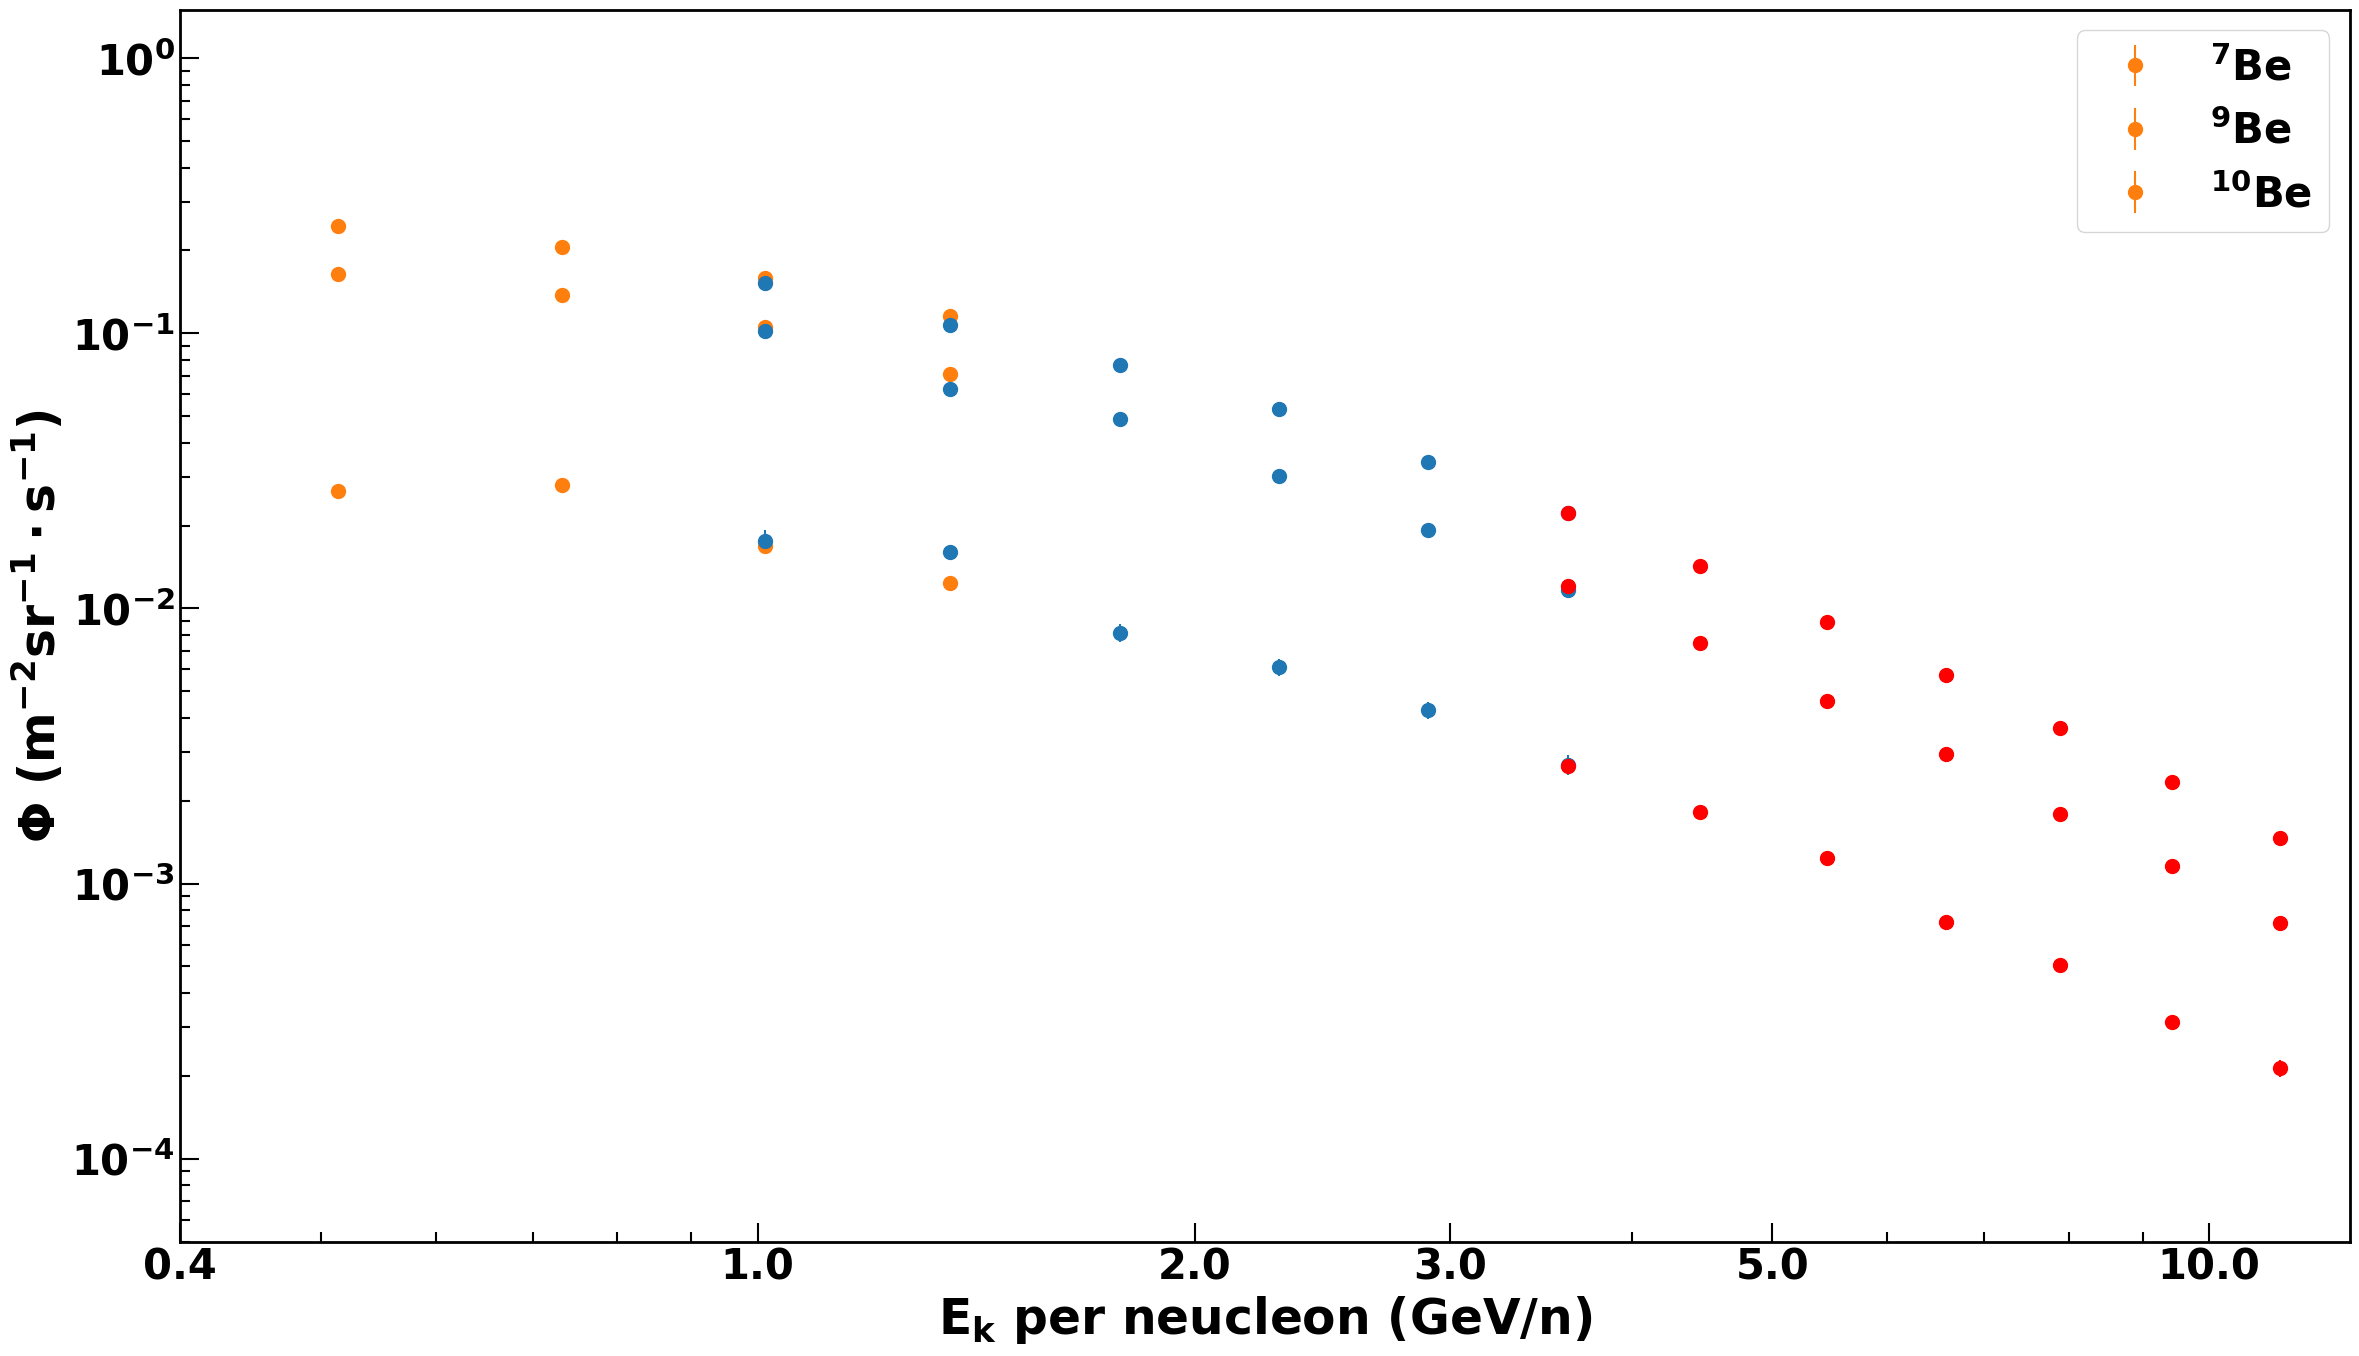

In [72]:
def getgraph_fromtxtfile(filename):
    
    Ek_low = []
    Ek_high = []
    Flux = []
    Stat_err = []
    Total_err = []
    with open(f'{filename}', 'r') as file:
        for line in file:
            # Check if the line starts with #
            if not line.startswith('#'):
                # Split the line into columns using ',' as the delimiter
                columns = line.strip().split(',')
            
                # Convert each column to a floating-point number and append to respective lists
                Ek_low.append(float(columns[0]))
                Ek_high.append(float(columns[1]))
                Flux.append(float(columns[2]))
                Stat_err.append(float(columns[3]))
                Total_err.append(float(columns[4]))
            else:
                print('skip #')
        # Convert lists to numpy arrays
        Ek_low = np.array(Ek_low)
        Ek_high = np.array(Ek_high)
        Flux = np.array(Flux)
        Stat_err = np.array(Stat_err)
        Total_err = np.array(Total_err)
        graph_flux_jiahui = MGraph(0.5*(Ek_low+Ek_high), Flux, Total_err)
    return graph_flux_jiahui

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)

file_jiahui_flux = {}
graph_flux_jiahui = {}

slicevalue = {'Tof': [0.4, 1.1], 'NaF':[1.2, 3.6], 'Agl':[4.2, 11]}
for iso in isotopes:
    #file_path = f'/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/flux_{iso}.txt'
    file_path = f'/home/manbing/Documents/Data/data_BeP8/Jiahui/11yr/flux_{iso}.txt'
    graph_flux_jiahui[iso] = getgraph_fromtxtfile(file_path)
    
fig, ax1 = plt.subplots(figsize=(28, 16))
for iso in ISOTOPES[nuclei]:
    plot_graph(fig, ax1, graph_flux_jiahui[iso], color='black', style="EP", xlog=True, ylog=True, markersize=20, label=f"JH{ISO_LABELS[iso]}")
    
subgraph_unfoldflux = {dec: {} for dec in detectors}
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        subgraph_unfoldflux[dec][iso] = slice_graph_by_value(graph_unfoldflux[dec][iso], slicevalue[dec])
        if dec == 'Tof':
            plot_graph(fig, ax1, graph_unfoldflux[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
            
        else:
            plot_graph(fig, ax1, graph_unfoldflux[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20)

    
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1}) }$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
ax1.set_ylim([0.00005, 1.5])
ax1.set_xlim([0.4, 12.5])
#plotdir = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate04102023/plots_0410'
#savefig_tofile(fig, plotdir, 'be_isofluxall', 1)
dtdir = {}
resultsdir = '/home/manbing/Documents/Data/data_BeP8/Be_results'
graph_flux_combined = dict()
for iso in ISOTOPES[nuclei]:
    graph_flux_combined[iso] = subgraph_unfoldflux['Tof'][iso]
    graph_flux_combined[iso] = concatenate_graphs(graph_flux_combined[iso], subgraph_unfoldflux['NaF'][iso])
    graph_flux_combined[iso] = concatenate_graphs(graph_flux_combined[iso], subgraph_unfoldflux['Agl'][iso])
    
    graph_flux_combined[iso].add_to_file(dtdir, f'graph_{iso}_unfoldflux')
np.savez(os.path.join(resultsdir, f'graph_Be_unfoldflux.npz'), **dtdir)    
print(graph_flux_combined[iso])
    
DETECTORS_COLOR = {'Tof': 'tab:orange', 'NaF':'tab:blue', 'Agl': 'red'}
fig, ax1 = plt.subplots(figsize=(28, 16))
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        if dec == 'Tof':
            plot_graph(fig, ax1, graph_unfoldflux[dec][iso], color=DETECTORS_COLOR[dec], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
            
        else:
            plot_graph(fig, ax1, graph_unfoldflux[dec][iso], color=DETECTORS_COLOR[dec], style="EP", xlog=True, ylog=True, markersize=20)

    
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1})}$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
ax1.set_ylim([0.00005, 1.5])
ax1.set_xlim([0.4, 12.5])


/tmp/ipykernel_94655/1304568228.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.sharex(ax2)


11yr


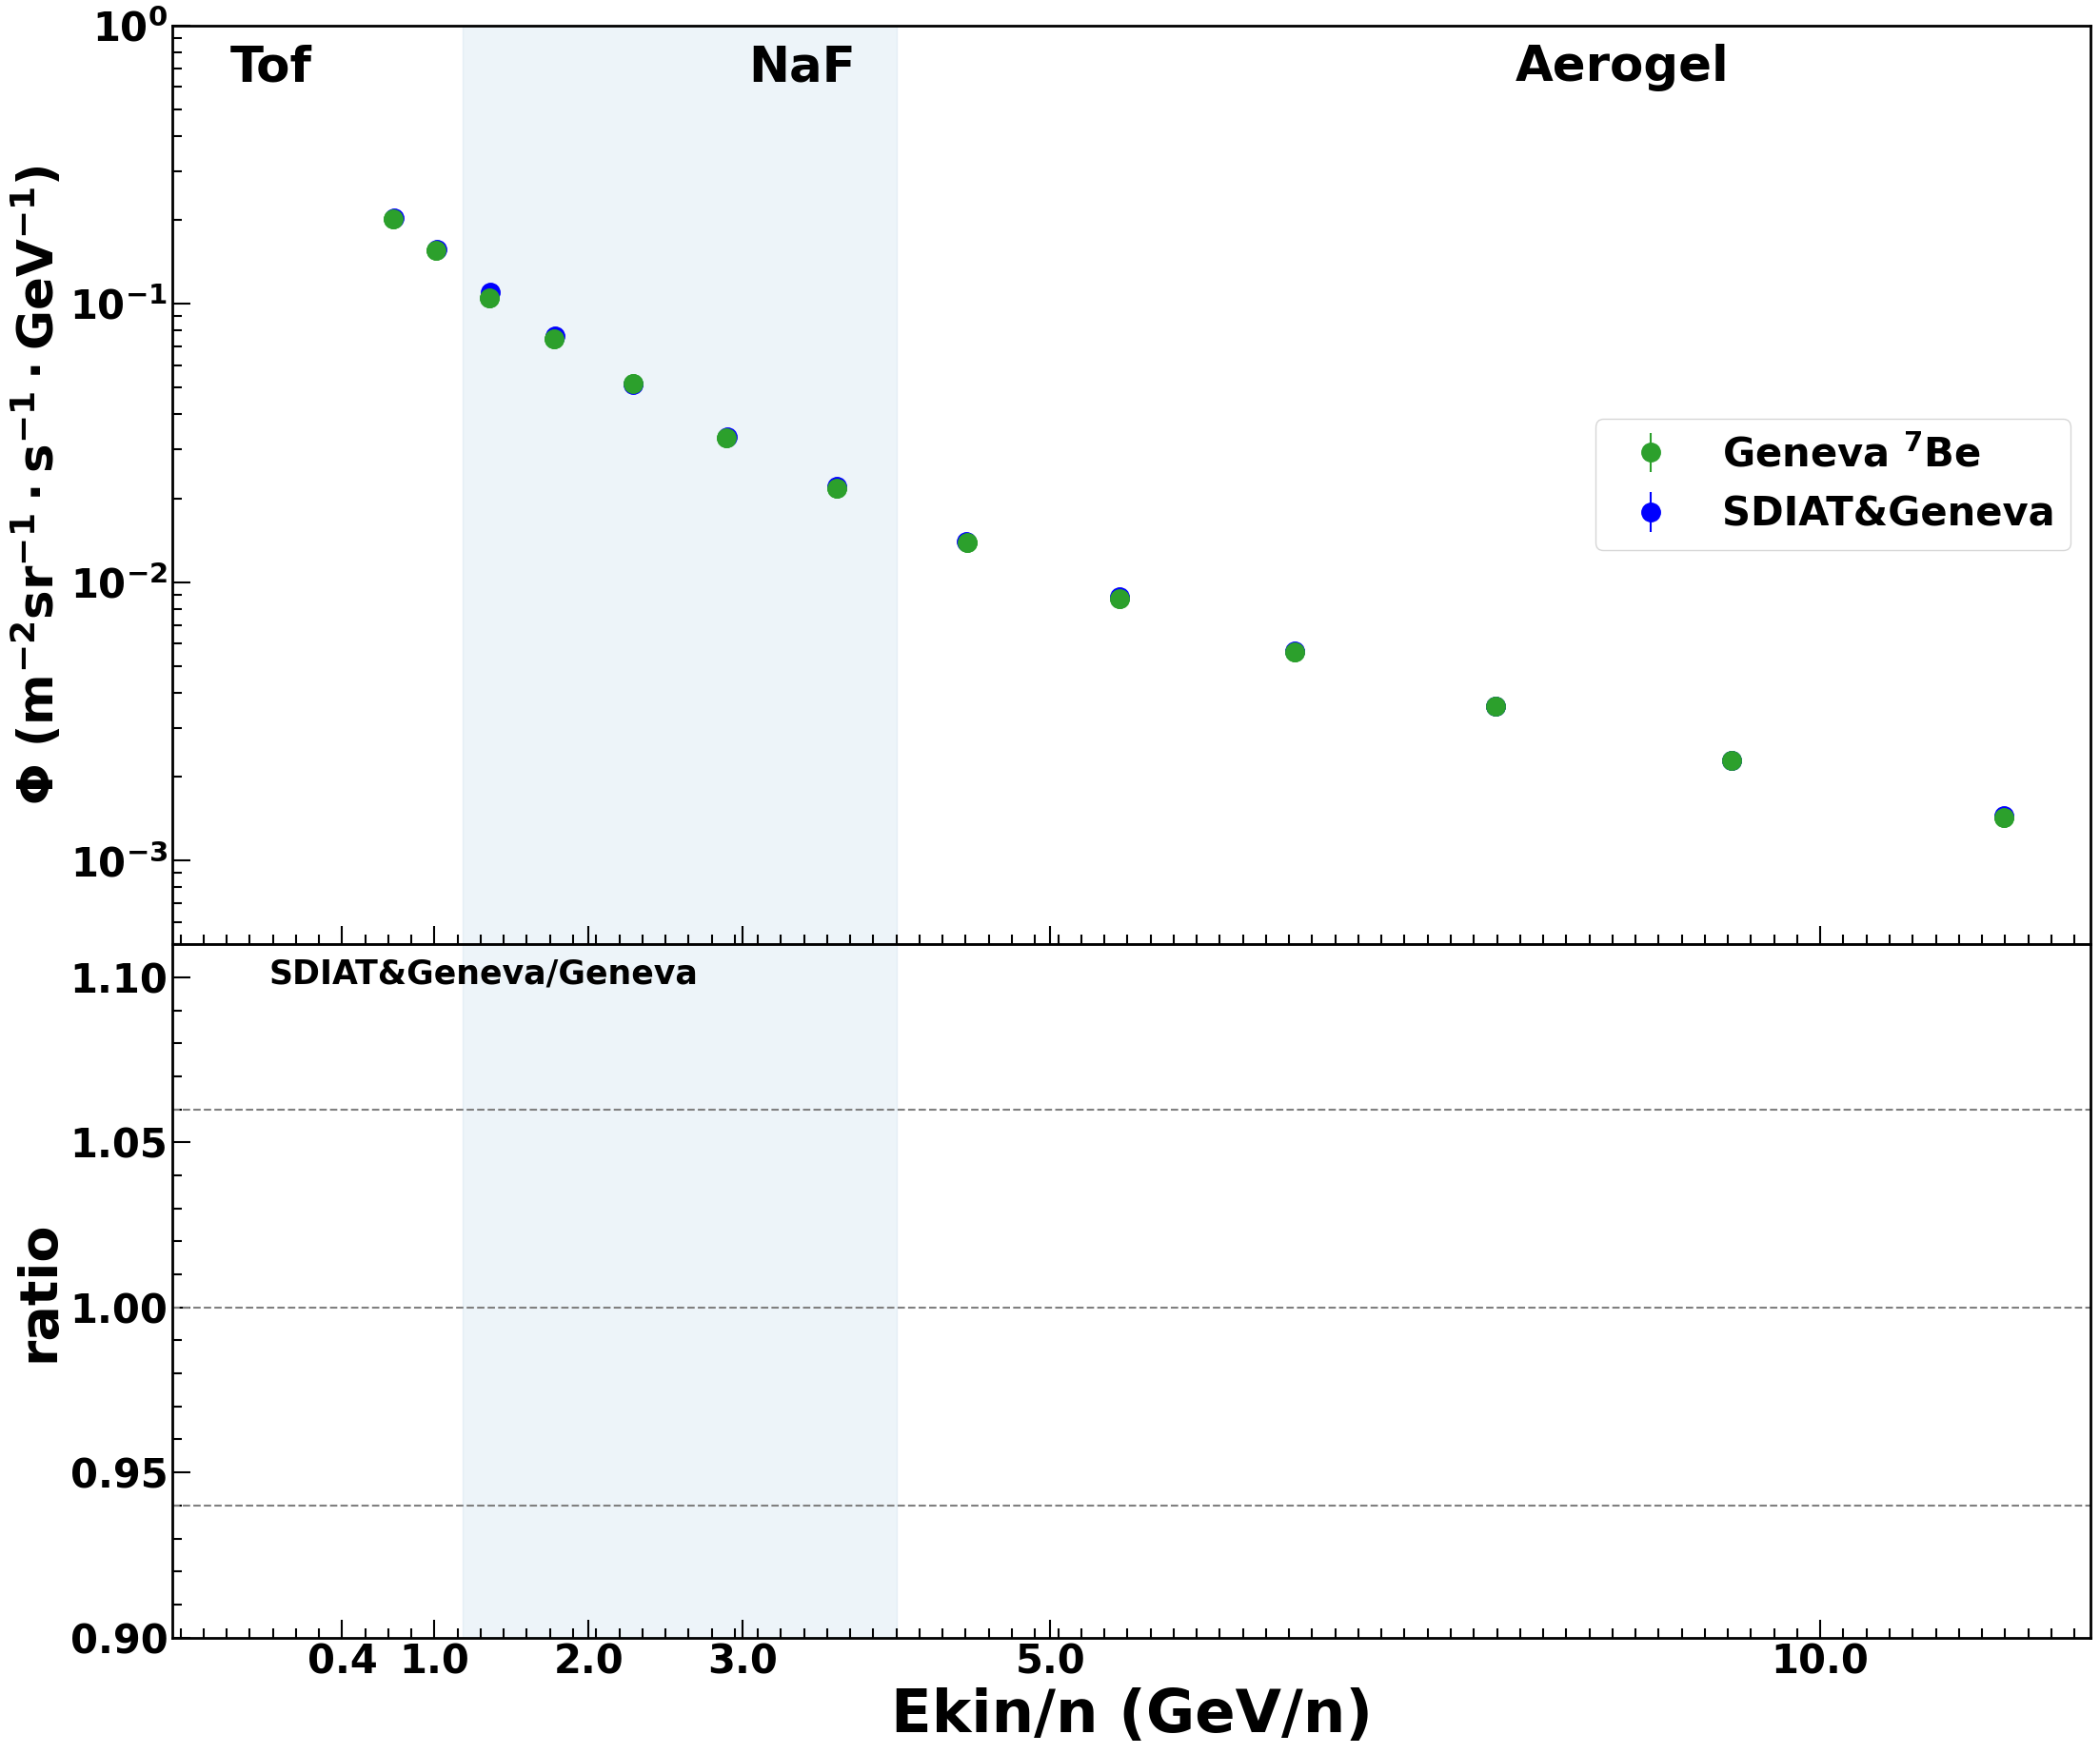

In [73]:

mksize=28
figsize = (26, 22)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.57, 0.43]}, figsize=figsize) 
iso = 'Be7'
fluxcolor = 'tab:green'
colratio ='black'
graph_flux_combined = {}


graph_flux_combined[iso] = slice_graph_by_value(graph_flux_combined_toterr[iso], [0.8, 11])


#unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues *0.995 * 0.98

## fragmentation background subtraction
fragmetationfactor = 0.98 * 0.995 
unfoldflux = graph_flux_combined[iso].yvalues * fragmetationfactor
unfoldfluxerr = graph_flux_combined[iso].yerrs 
graph_unfoledflux_Be7 = MGraph(graph_flux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)
resultsdir = '/home/manbing/Documents/Data/data_BeP8/Be_results'

write_points_totxt_with_binedge(graph_unfoledflux_Be7, xbinning, resultsdir, f'Be7FluxP8{figname}')

plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize,  label=f"Geneva {ISO_LABELS[iso]}")    
plot_graph(fig, ax1, graph_flux_jiahui[iso], color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva")
#plot_graph(fig, ax1, graph_laurent_fluxbe7, color='red', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize)    
lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')
ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.06, color='grey', linestyle='--')
ax2.axhline(y=0.94, color='grey', linestyle='--')

ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)
#ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')

graph_ratio_jhlarent = graph_laurent_fluxbe7/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')
#graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be7
#graph_ratio_grenoble = graph_laurent_fluxbe7/graph_unfoledflux_Be7



#plot_graph(fig, ax2, graph_ratio, color=colratio, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
#plot_graph(fig, ax2, graph_ratio_grenoble, color='red', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
   
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.9, 1.11])
ax1.sharex(ax2)
ax1.set_yscale('log')
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1} \cdot GeV^{-1}) }$", fontsize=37)  
ax2.set_xlabel("Ekin/n (GeV/n)", fontsize=fontsize1)   
ax2.set_ylabel('ratio', fontsize=40)
ax1.set_ylim([0.001, 0.3])

xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      
ax1.legend(loc='center right')
ax1.set_ylim([0.0005, 1])

plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate_08012024'

ax1.fill_betweenx(np.linspace(0.0, 1, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(0.8, 1.2, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
print(figname)
savefig_tofile(fig, plotfile, f'be7_flux_P8_{figname}_CJH', 1)
savefig_tofile(fig, plotdir, 'be7_flux_P8', 1)



/home/manbing/Documents/Data/data_BeP8/Be_results
11yr


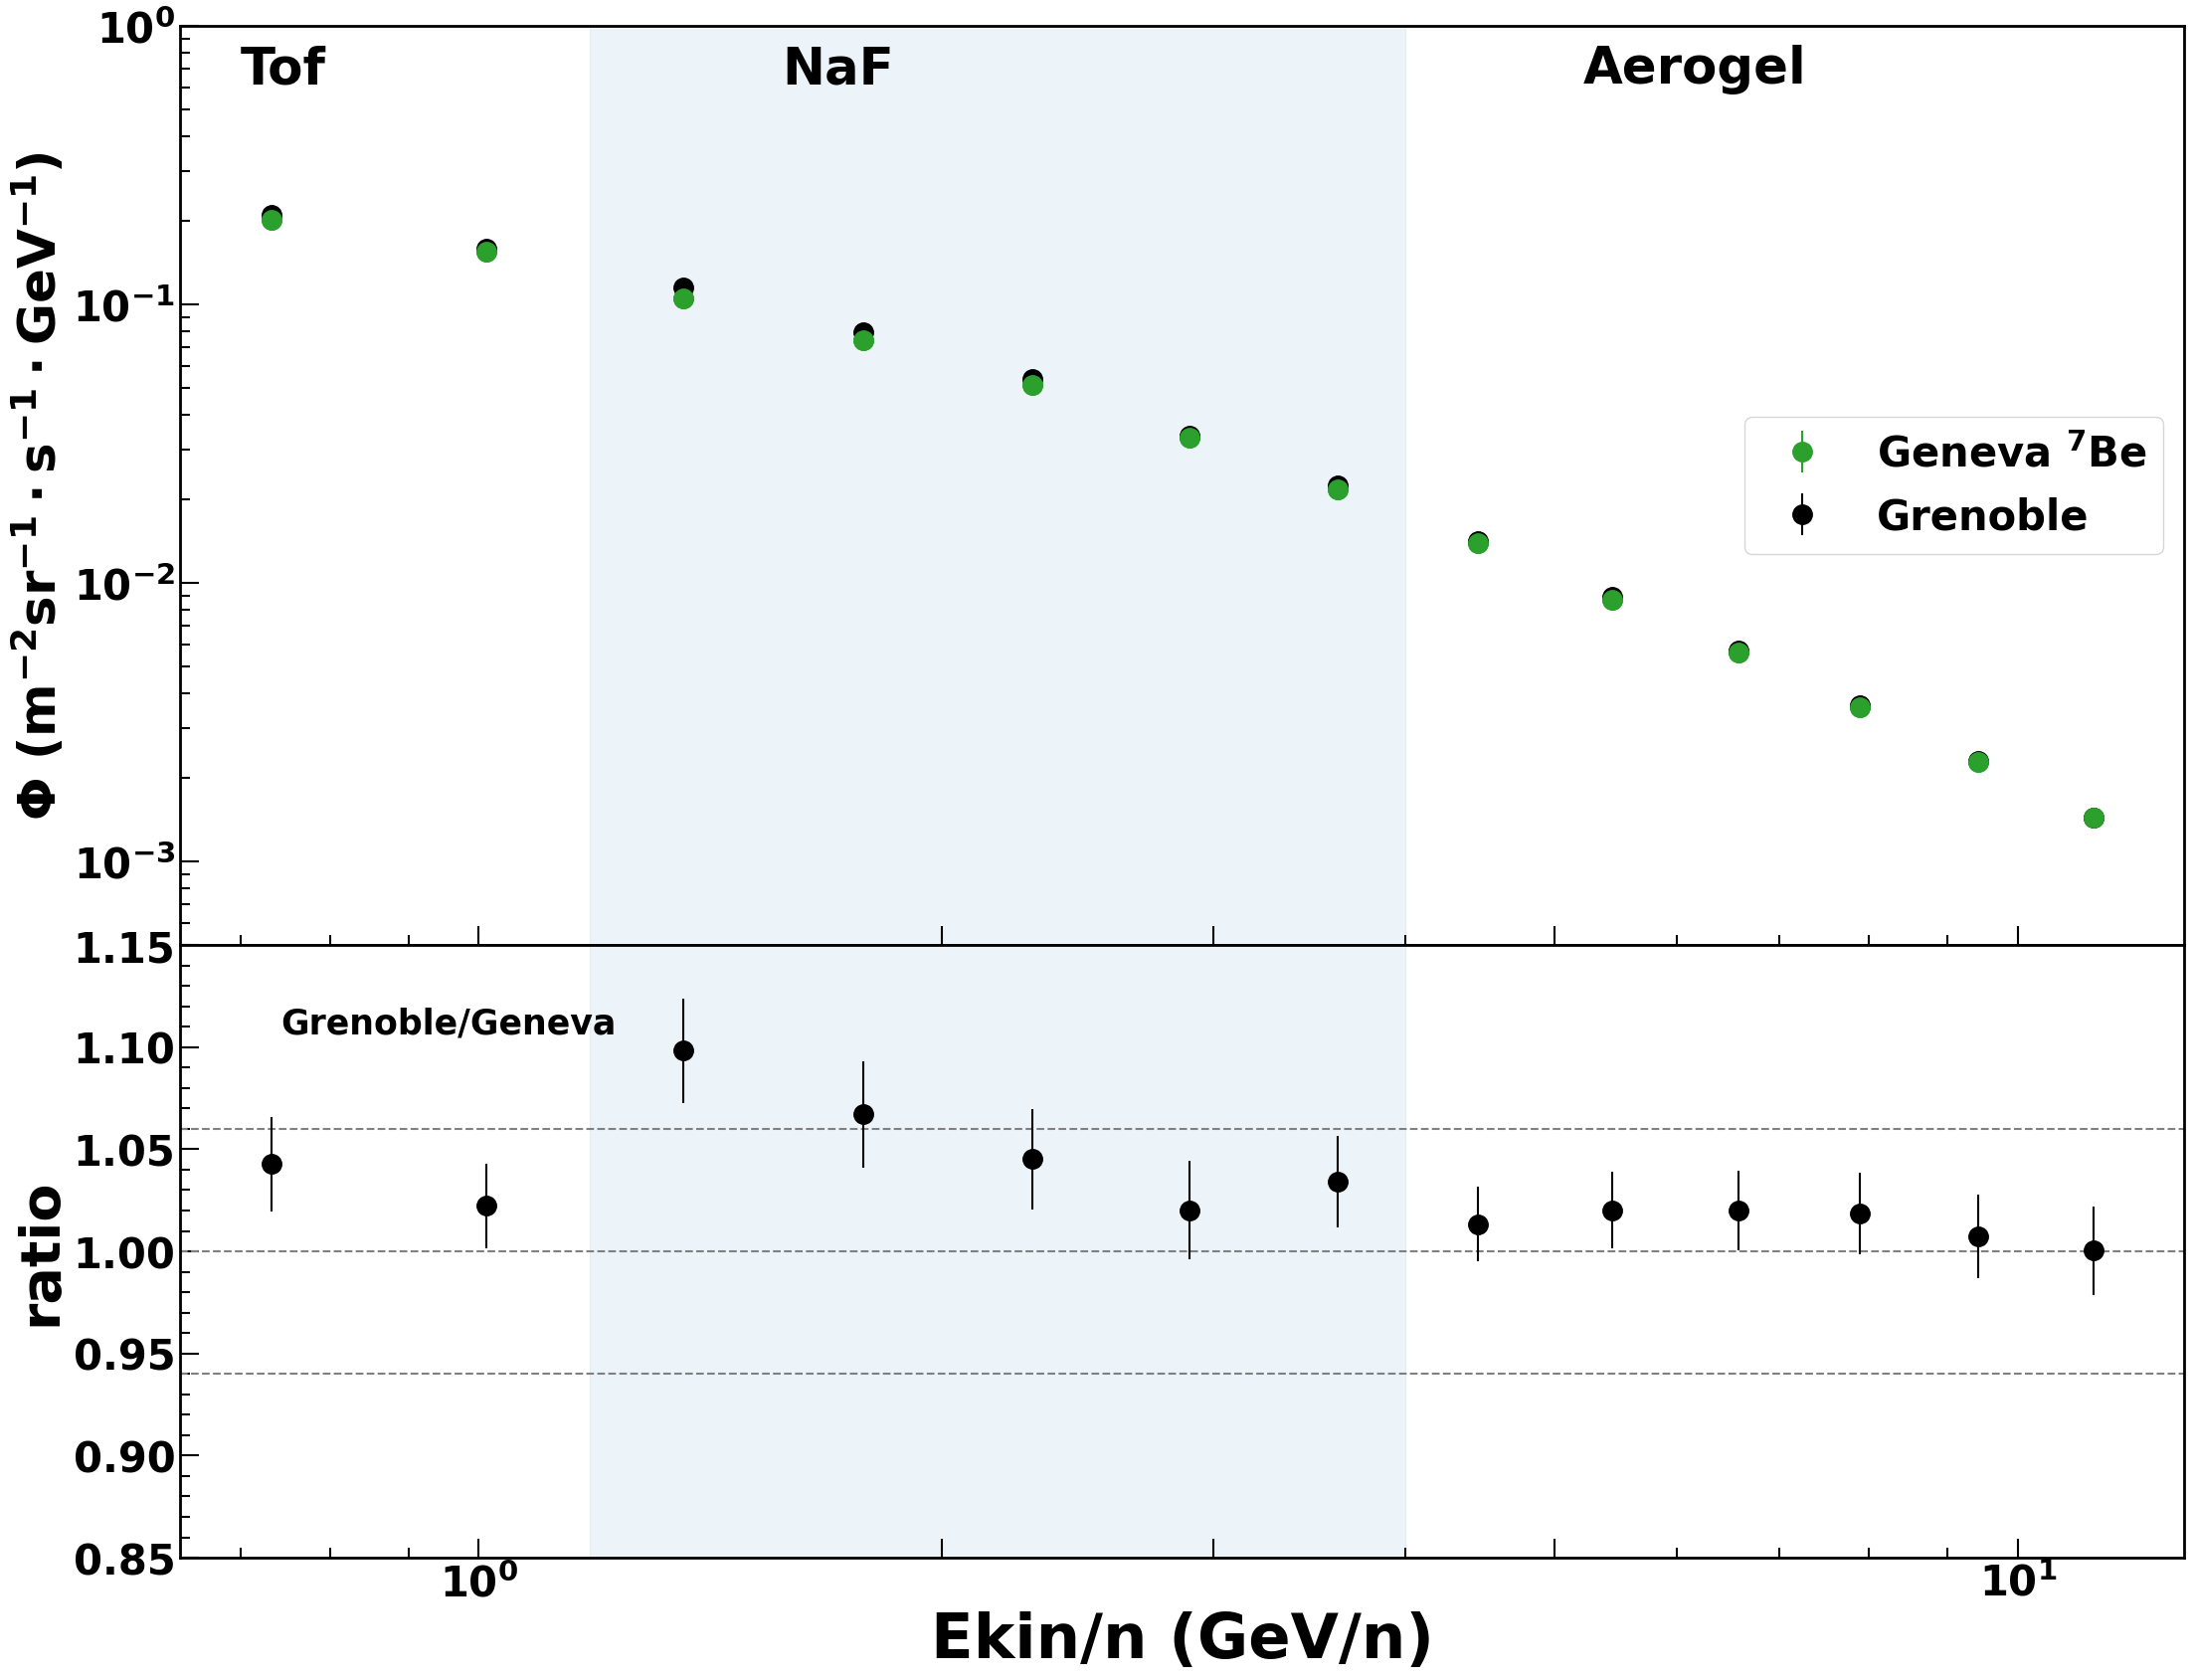

In [74]:
mksize=28
figsize = (26, 20)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize )
iso = 'Be7'
fluxcolor = 'tab:green'

graph_flux_combined[iso] = slice_graph_by_value(graph_flux_combined_toterr[iso], [0.8, 11])
#unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues *0.995 * 0.98

## fragmentation background subtraction
fragmetationfactor = 0.98 * 0.995 
unfoldflux = graph_flux_combined[iso].yvalues * fragmetationfactor
unfoldfluxerr = graph_flux_combined[iso].yerrs 
graph_unfoledflux_Be7 = MGraph(graph_flux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)
print(resultsdir)
#write_points_totxt_with_binedge(graph_unfoledflux_Be7, xbinning, resultsdir, f'Be7FluxP8{figname}')

plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize,  label=f"Geneva {ISO_LABELS[iso]}")    
#plot_graph(fig, ax1, graph_flux_jiahui[iso], color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva")
plot_graph(fig, ax1, graph_laurent_fluxbe7, color='black', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize)    
lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')
ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.06, color='grey', linestyle='--')
ax2.axhline(y=0.94, color='grey', linestyle='--')

#ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:green')
ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)

#graph_ratio_jhlarent = graph_laurent_fluxbe7/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')
#graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be7
graph_ratio_grenoble = graph_laurent_fluxbe7/graph_unfoledflux_Be7
#plot_graph(fig, ax2, graph_ratio, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
plot_graph(fig, ax2, graph_ratio_grenoble, color=colratio, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
   
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.85, 1.15])
ax1.sharex(ax2)
ax1.set_yscale('log')
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1} \cdot GeV^{-1})}$", fontsize=37)  
ax2.set_xlabel("Ekin/n (GeV/n)", fontsize=fontsize1)   
ax2.set_ylabel('ratio', fontsize=40)
ax1.set_ylim([0.001, 0.3])

xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      
ax1.legend(loc='center right')
ax1.set_ylim([0.0005, 1])

plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
ax1.fill_betweenx(np.linspace(0.0, 1, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(0.8, 1.2, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
print(figname)
savefig_tofile(fig, plotfile, f'be7_flux_P8_{figname}_CLaurent10yr', 1)
#savefig_tofile(fig, plotdir, 'be7_flux_P8', 1)



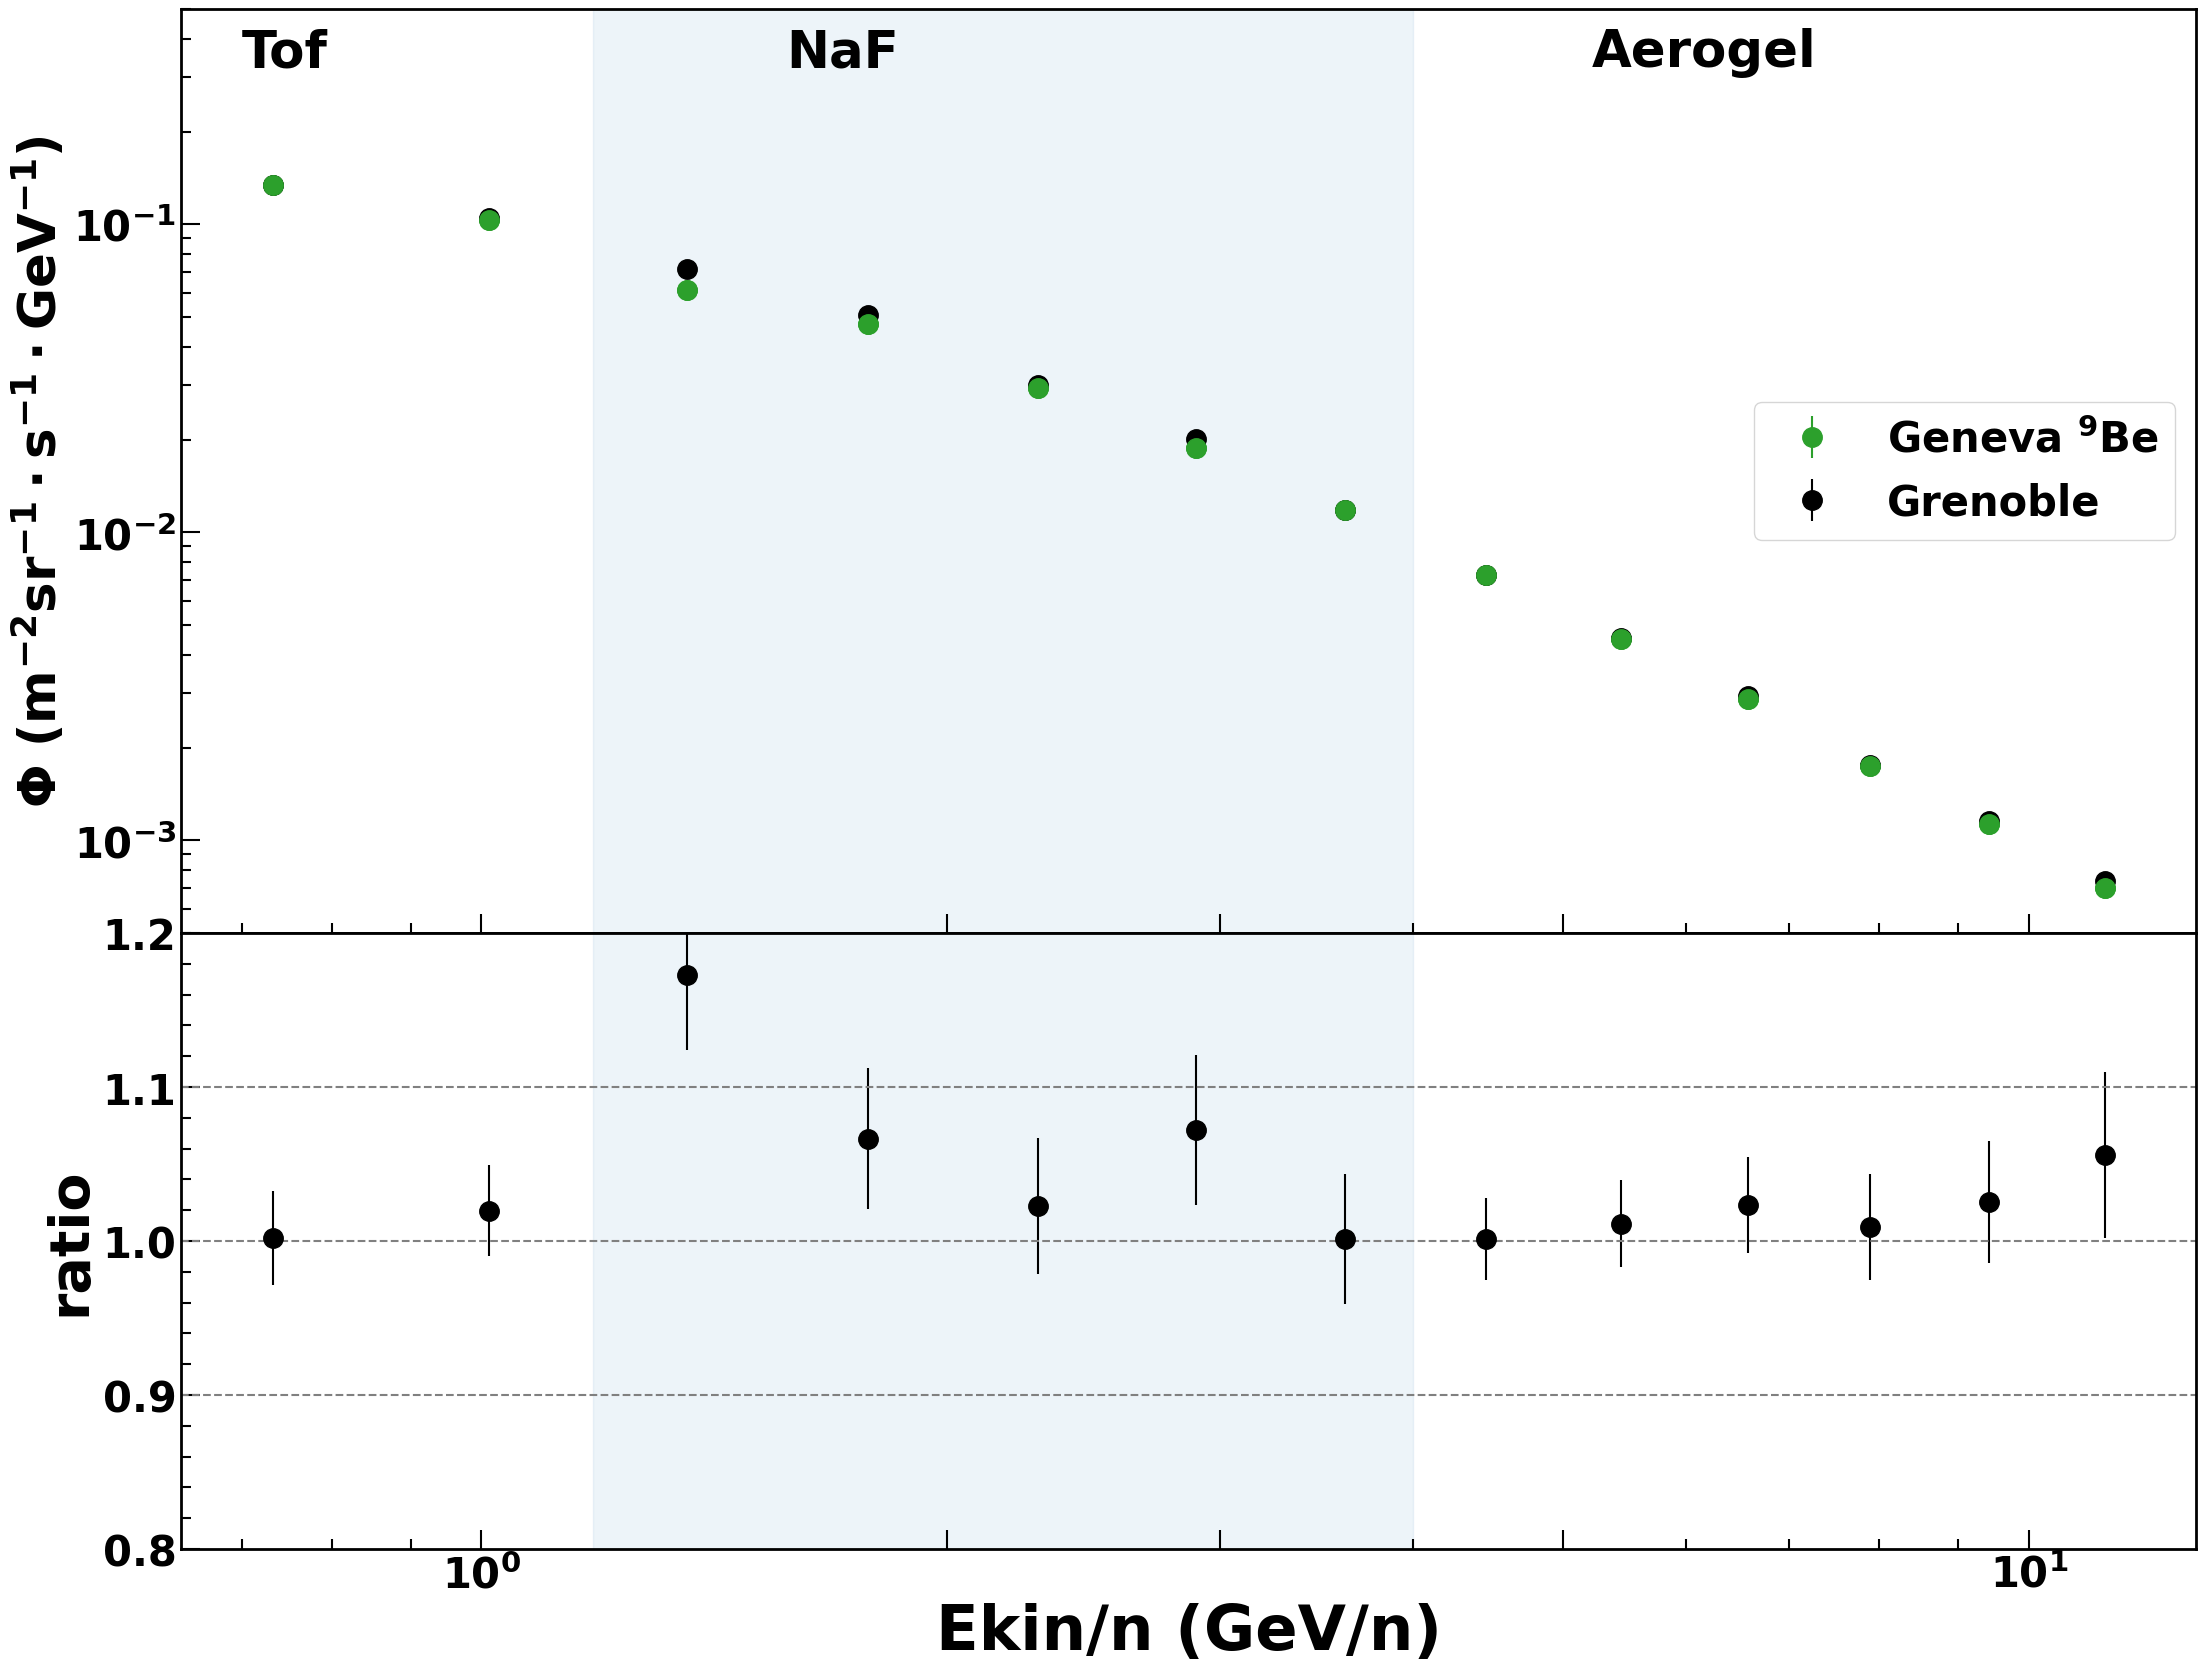

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize)
iso = 'Be9'
fluxcolor = 'tab:green'
graph_flux_combined[iso] = slice_graph_by_value(graph_flux_combined_toterr[iso], [0.8, 11])
fragmentation_correction = 0.98 * 0.995 

unfoldflux = graph_flux_combined[iso].yvalues * fragmentation_correction
unfoldfluxerr = graph_flux_combined[iso].yerrs 
graph_unfoledflux_Be9 = MGraph(graph_flux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)

#write_points_totxt_with_binedge(graph_unfoledflux_Be9, xbinning, resultsdir, f'{iso}FluxP8{figname}')
plot_graph(fig, ax1, graph_unfoledflux_Be9, color='tab:green', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Geneva {ISO_LABELS[iso]}")    
#plot_graph(fig, ax1, graph_flux_jiahui[iso], color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")
plot_graph(fig, ax1, graph_laurent_fluxbe9, color='black', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be9, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize)    
graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be9
graph_ratio_grenoble = graph_laurent_fluxbe9/graph_unfoledflux_Be9

#plot_graph(fig, ax2, graph_ratio, color=colratio, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
plot_graph(fig, ax2, graph_ratio_grenoble, color='black', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble/Geneva")   
lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')

ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.1, color='grey', linestyle='--')
ax2.axhline(y=0.9, color='grey', linestyle='--')

#ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)
#ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')
#graph_ratio_jhlarent = graph_laurent_fluxbe9/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')


     

ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   

plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1} \cdot GeV^{-1}) }$", fontsize=37)  
ax2.set_xlabel("Ekin/n (GeV/n)", fontsize=fontsize1)   
ax2.set_ylabel('ratio', fontsize=40)
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.8, 1.2])

ax1.sharex(ax2)
ax1.set_yscale('log')
xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      
ax1.legend(loc='center right')
ax1.set_ylim([0.0005, 0.5])
ax1.fill_betweenx(np.linspace(0.0, 0.5, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(0.8, 1.2, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotfile, f'be9_flux_P8_{figname}', 1)
#savefig_tofile(fig, plotdir, 'be9_flux_P8', 1)


xvalues			yvalues			yerrs
0.735			0.03154			0.00262
1.015			0.02203			0.00178
1.3599999999999999			0.0134			0.00114
1.7799999999999998			0.006291			0.000715
2.29			0.004348			0.000506
2.9			0.003264			0.000383
3.615			0.00233			0.000271
4.455			0.001868			9.51e-05
5.45			0.001244			7.1e-05
6.585			0.0007104			5.03e-05
7.89			0.0005285			4.56e-05
9.425			0.0003464			3.98e-05
11.190000000000001			0.0002295			3.63e-05



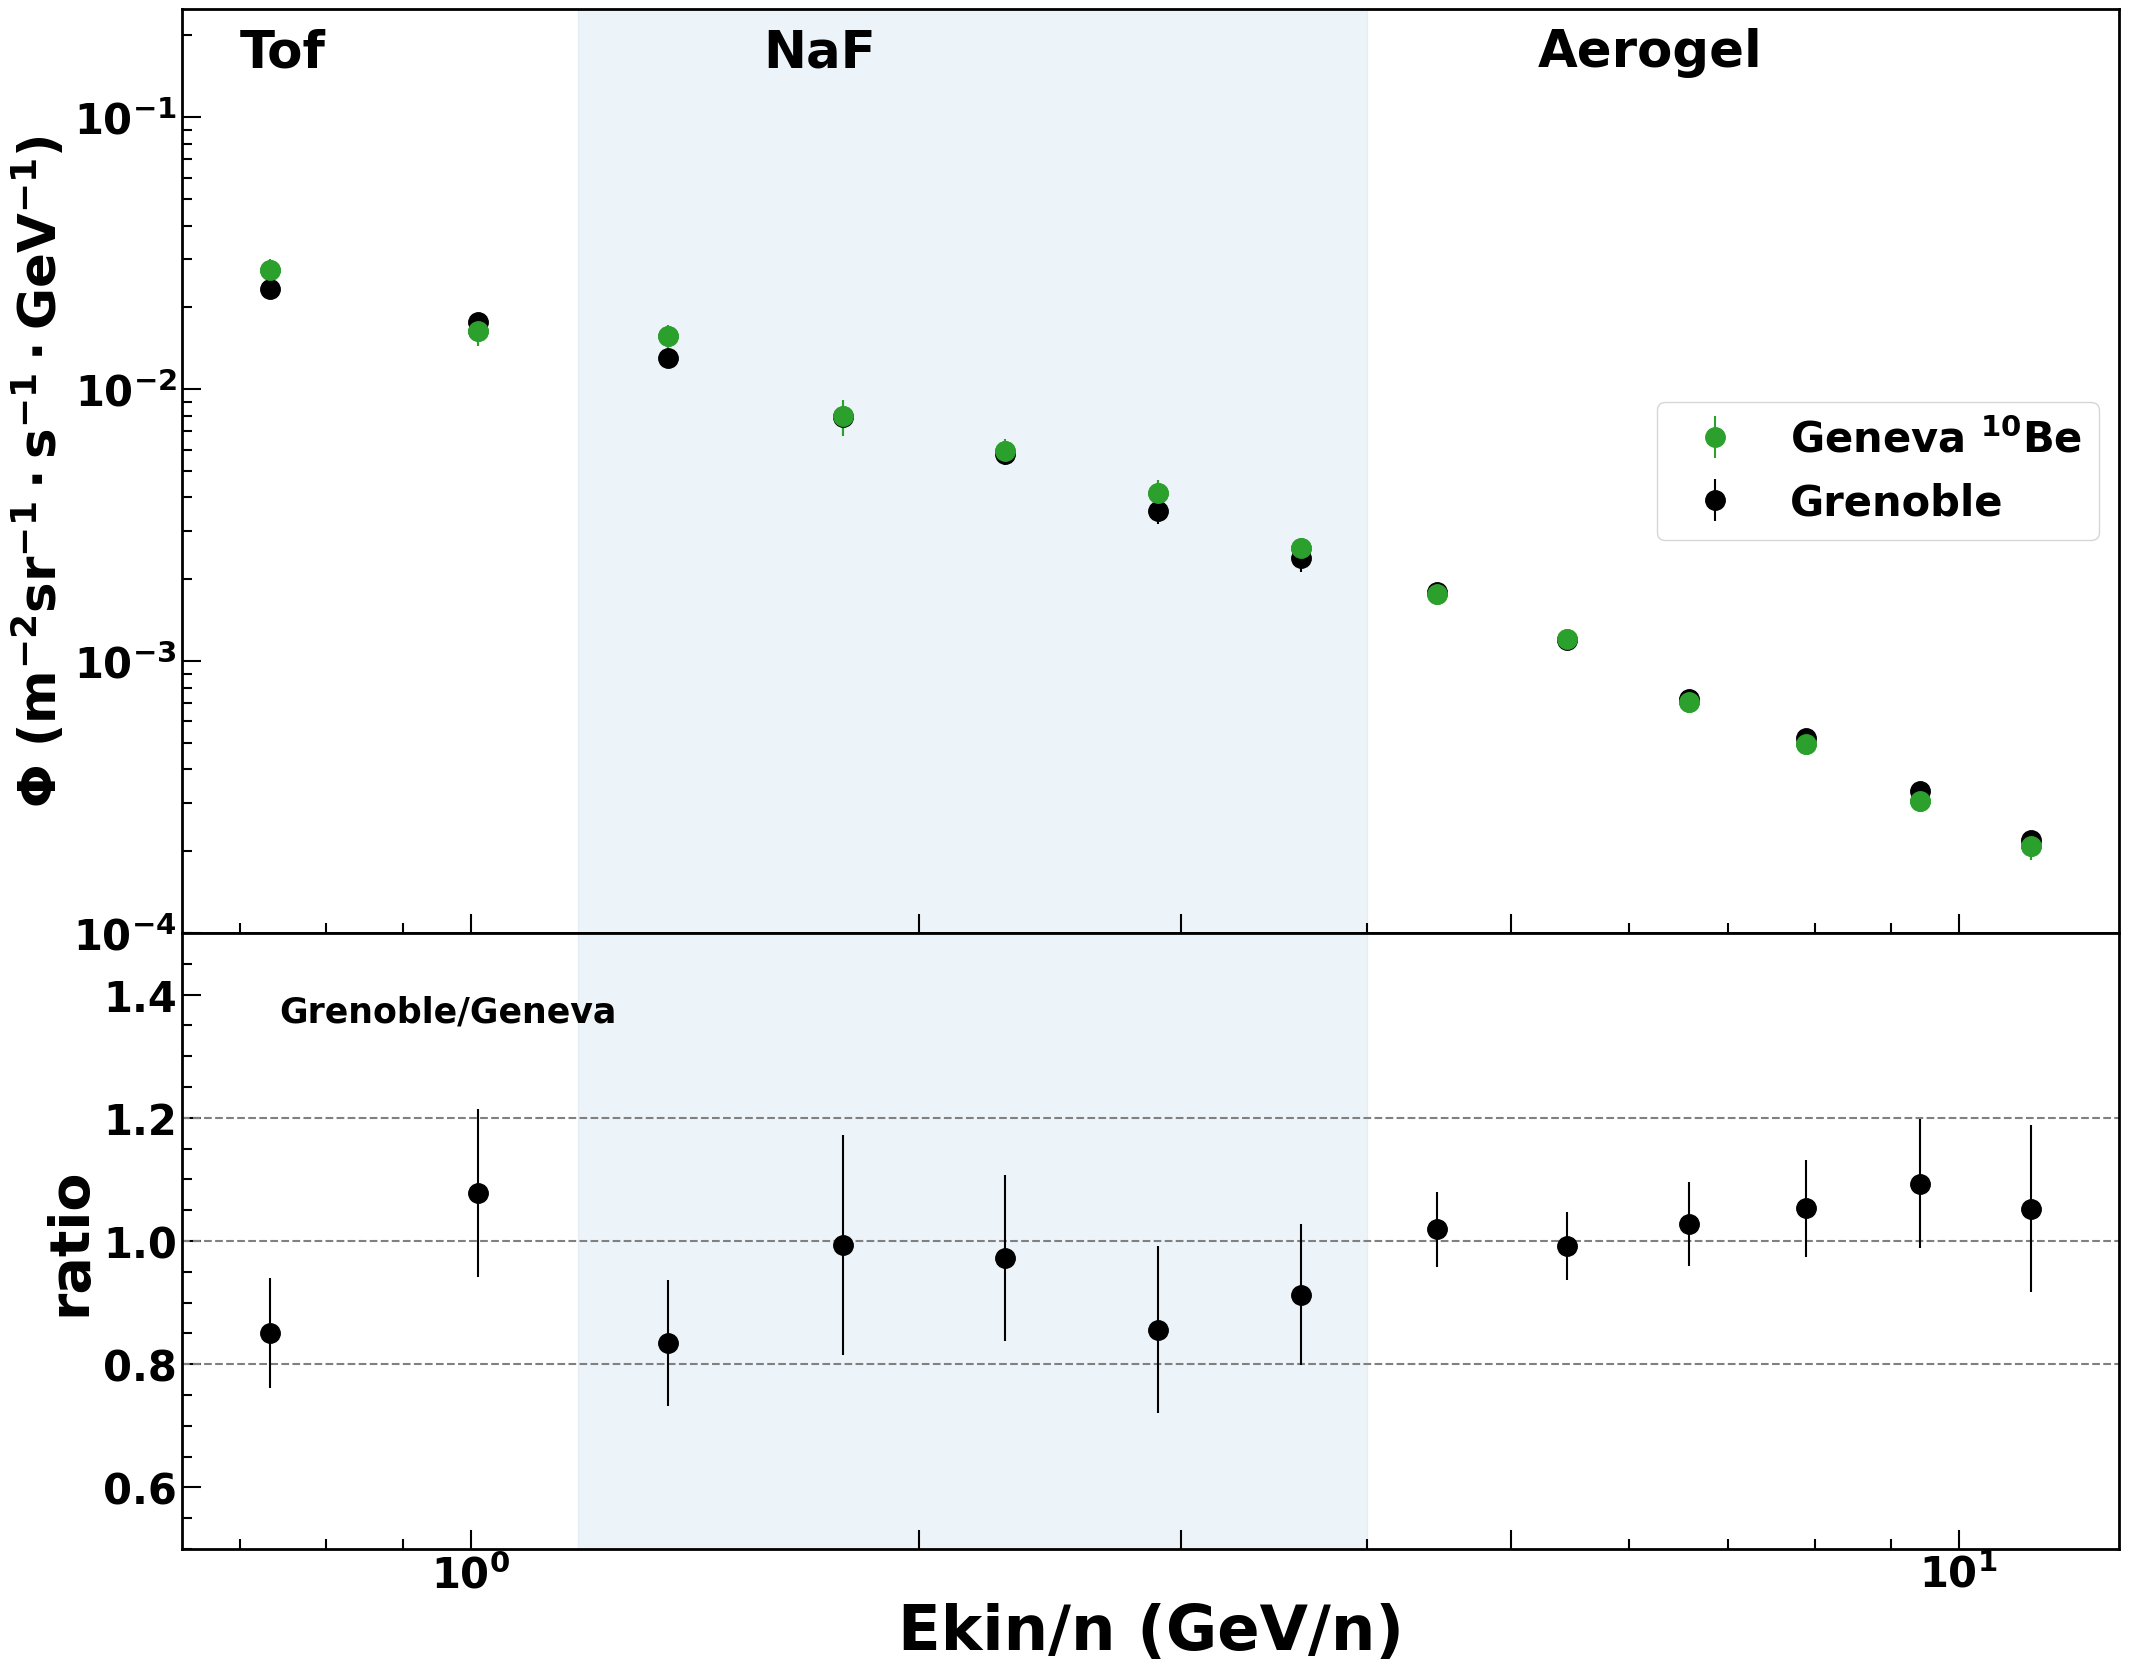

In [82]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize) 
iso = 'Be10'
graph_flux_combined[iso] = slice_graph_by_value(graph_flux_combined_toterr[iso], [0.8, 11])
fragmentation_correction = 0.995 * 0.98
unfoldflux = graph_flux_combined[iso].yvalues *  fragmentation_correction
unfoldfluxerr = graph_flux_combined[iso].yerrs
graph_unfoledflux_Be10 = MGraph(graph_flux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)
#write_points_totxt_with_binedge(graph_unfoledflux_Be10, xbinning, resultsdir, f'{iso}FluxP8{figname}')

plot_graph(fig, ax1, graph_unfoledflux_Be10, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Geneva {ISO_LABELS[iso]}")    
#plot_graph(fig, ax1, graph_flux_jiahui[iso], color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")
plot_graph(fig, ax1, graph_laurent_fluxbe10, color='black', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be10, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=mksize)    

lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')

ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.2, color='grey', linestyle='--')
ax2.axhline(y=0.8, color='grey', linestyle='--')

#ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)
ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='black')
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')

#graph_ratio_jhlarent = graph_laurent_fluxbe9/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
#ax2.text(0.1, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')
graph_ratio_grenoble = graph_laurent_fluxbe10/graph_unfoledflux_Be10
#graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be10
#plot_graph(fig, ax2, graph_ratio, color=colratio, style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT/Geneva")    
plot_graph(fig, ax2, graph_ratio_grenoble, color='black', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"Grenoble/Geneva")    
#graph_ratio_jhlarent = graph_laurent_fluxbe10/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=mksize, label=f"SDIAT&Geneva(JW)")

                                                                                                                                              
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend(loc='center right')
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
ax1.set_ylabel(r"$\mathrm{\Phi \ (m^{-2} sr^{-1} \cdot s^{-1} \cdot GeV^{-1}) }$", fontsize=37)  
ax2.set_xlabel("Ekin/n (GeV/n)", fontsize=fontsize1)   
ax2.set_ylabel('ratio', fontsize=40)

ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.5, 1.5])
ax1.sharex(ax2)


ax1.set_yscale('log')
xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      
ax1.fill_betweenx([0, 1], 1.18, 4.0, alpha=0.08, color="tab:blue", transform=ax1.get_xaxis_transform())
ax2.fill_betweenx(np.linspace(0.5, 1.5, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax1.set_ylim([0.0001, 0.25])

print(graph_flux_jiahui[iso])
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotfile, f'be10_flux_P8_{figname}', 1)

#savefig_tofile(fig, plotdir, 'be10_flux', 1)


xvalues			yvalues			yerrs
0.7332			0.9596572306238857			0.0012976438951927919
1.01135			0.8834514249845474			0.0013956338702230033
1.3569499999999999			1.0594515426491773			0.001520128854270513
1.7779			1.1208148618459222			0.0022625768747006943
2.28735			1.133184069360148			0.0016909808215864
2.8959			1.1202930886240436			0.0019034714764875
3.61425			1.0514998491916328			0.0010763158669250788
4.45875			1.018135855740077			0.0007622741245020476
5.4516			1.0052500067851646			0.000731597875768359
6.58395			1.0018406957255062			0.0008531275007910386
7.88955			0.9749910687017609			0.0009734734902494194
9.425			0.9241712684611578			0.001197418601711304
11.190249999999999			0.9991940360887449			0.0017414348509878746





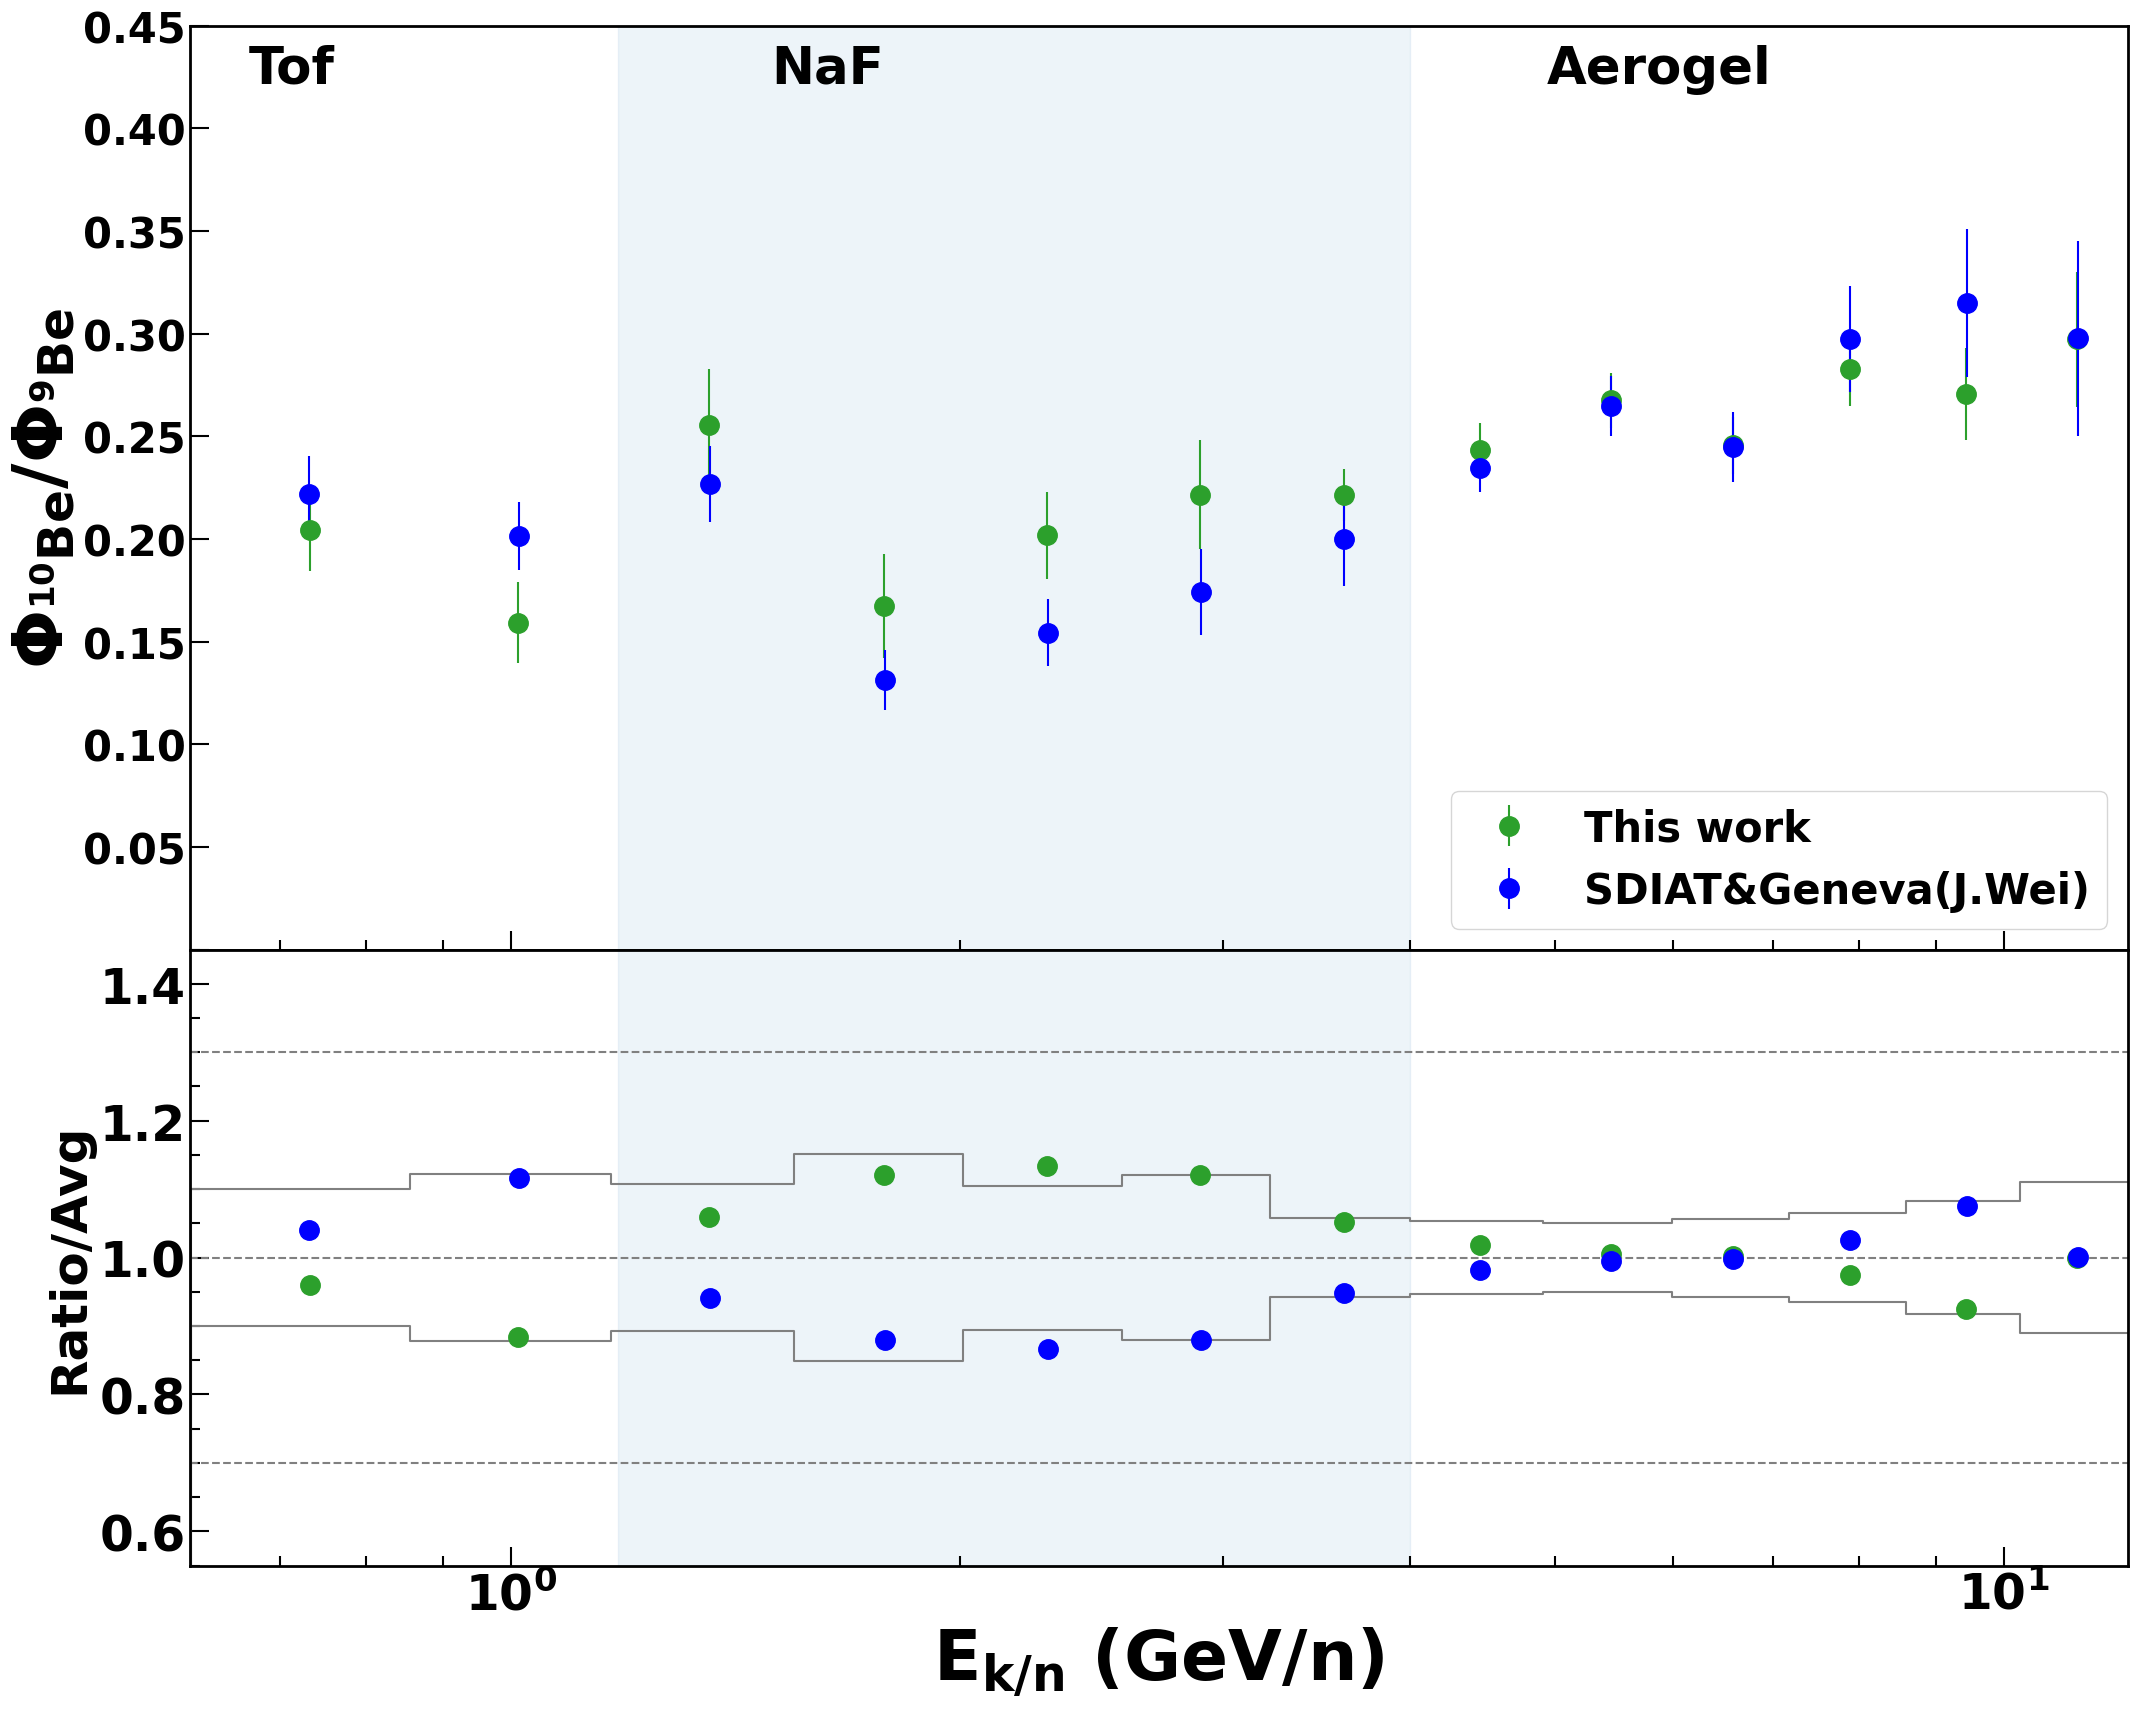

In [88]:
from tools.graphs import scale_graph



#frac, frac_yerr =  calc_ratio_and_err(graph_unfoledflux_Be10.yvalues, graph_unfoledflux_Be9.yvalues, graph_unfoledflux_Be10.yerrs, graph_unfoledflux_Be9.yerrs, correlation=-0.5)
#graph_flux_ratio_10to9 = MGraph(graph_unfoledflux_Be10.xvalues, frac, frac_yerr)
graph_flux_ratio_9to7 =  graph_unfoledflux_Be9/graph_unfoledflux_Be7
#print(graph_flux_ratio_10to9)
#print(graph_flux_ratio_9to7)

#write_points_totxt_with_binedge(graph_flux_ratio_10to9, xbinning, resultsdir, f'Be10ToBe9RatioP8{figname}')
#write_points_totxt_with_binedge(graph_flux_ratio_9to7, xbinning, resultsdir, f'Be9ToBe7RatioP8{figname}')


file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/data_BeP8/Jiahui/11yr/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/data_BeP8/Jiahui/11yr/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhbe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)


graph_flux_ratio_10to9 = slice_graph_by_value(graph_ratio_Be10ToBe9_combined_tot, (graph_jiahui_ratiobe10.xvalues[0], graph_jiahui_ratiobe10.xvalues[-1]))
#for i in range(len(c1_jh)):
    #print(c1_jh[i], " ", c2_jh[i], " ", graph_flux_ratio_10to9.yvalues[i]," ",  graph_flux_ratio_10to9.yerrs[i])

figsize = (25, 20)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=50) 
plot_graph(fig, ax1, graph_flux_ratio_10to9, color='tab:green', style="EP", xlog=False, ylog=False, markersize=28, label='This work')

#plot_graph(fig, ax1, graph_flux_ratio_10to9_V2, color='green', style="EP", xlog=False, ylog=False, markersize=20, label='Geneva')
#
#plot_graph(fig, ax1, graph_laurent_ratiobe10, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
plot_graph(fig, ax1, graph_jiahui_ratiobe10, color='blue', style="EP", xlog=False, ylog=False, markersize=28, label='SDIAT&Geneva(J.Wei)') 

ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.0, 0.45])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 
ax2.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$', fontsize=50)

#graph_average_be10ratio = scale_graph(graph_jiahui_ratiobe10 + graph_flux_ratio_10to9, 1/2)
#graph_average_be10ratio.yerrs = (abs(graph_jiahui_ratiobe10.yerrs) + abs(graph_flux_ratio_10to9.yerrs))/2


graph_average_be10ratio = MGraph(graph_jiahui_ratiobe10.xvalues, (graph_jiahui_ratiobe10.yvalues+graph_flux_ratio_10to9.yvalues)*0.5, (graph_jiahui_ratiobe10.yerrs+graph_flux_ratio_10to9.yerrs)*0.5)
graph_difference_to_avg = graph_flux_ratio_10to9/graph_average_be10ratio
graph_difference_to_avg_jiahui = graph_jiahui_ratiobe10/graph_average_be10ratio

errorband =   graph_flux_ratio_10to9.yerrs/graph_flux_ratio_10to9.yvalues
graph_lower_errorband = MGraph(graph_flux_ratio_10to9.xvalues, 1.0 + errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_flux_ratio_10to9.xvalues, 1.0 - errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs *= 0.01
graph_difference_to_avg_jiahui.yerrs *= 0.01


print(graph_difference_to_avg)
#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
plot_graph(fig, ax2, graph_difference_to_avg, color='tab:green', style="EP", xlog=False, ylog=False, markersize=28)                                                                                                                              
plot_graph(fig, ax2, graph_difference_to_avg_jiahui, color='blue', style="EP", xlog=False, ylog=False, markersize=28)                                                                                                                              

#plot_graph(fig, ax2, graph_laurent_ratiobe10/graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20) 
#plot_graph(fig, ax2, graph_jiahui_ratiobe10/graph_flux_ratio_10to9, color=colratio, style="EP", xlog=False, ylog=False, markersize=20) 
#plot_graph(fig, ax2, graph_laurent_ratiobe10/graph_jiahui_ratiobe10, color='blue', style="EP", xlog=False, ylog=False, markersize=20) 
#ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)
#ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')

#ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues, '-', color='black')
#ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues, '-', color='black')
plot_graph(fig, ax2, graph_lower_errorband, color='grey', style="step", xlog=False, ylog=False, markersize=28, xbinning=xbinning)                                                                                                                              
plot_graph(fig, ax2, graph_upper_errorband, color='grey', style="step", xlog=False, ylog=False, markersize=28, xbinning=xbinning)                                                                                                                              

ax1.set_xlim([0.61, 12.1])
ax2.set_xlim([0.61, 12.1])
xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      



#ax2.set_ylim([-0.35, 0.35])    
ax2.set_ylabel('Ratio/Avg')
ax2.axhline(y=1.3, color='grey', linestyle='--')
ax2.axhline(y=1.0, color='grey', linestyle='--')
ax2.axhline(y=0.7, color='grey', linestyle='--')
ax1.fill_betweenx(np.linspace(0.0, 0.6, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(0.3, 1.8, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.set_ylim([0.55, 1.45])
#plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL'
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotfile, f'be_fluxratiobe10_CompareJ', 1)





xvalues			yvalues			yerrs
0.7332			0.6676106093522411			0.023791170138444333
1.01135			0.6649557251188304			0.022466825378601184
1.3569499999999999			0.5841688766820291			0.02451807378235937
1.7779			0.6371142046275464			0.02523540602196443
2.28735			0.5721312126987906			0.0222393723459816
2.8959			0.5671312464221292			0.022913067145006596
3.61425			0.544776597548675			0.01582132989494021
4.45875			0.5238963196620423			0.015389182868657257
5.4516			0.5163058017879054			0.015537125245445257
6.58395			0.5127990456324771			0.016118890786311794
7.88955			0.4890395763047515			0.016502553604368725
9.425			0.49509984630234855			0.018248210640917042
11.190249999999999			0.48998766184463916			0.022469956792270446



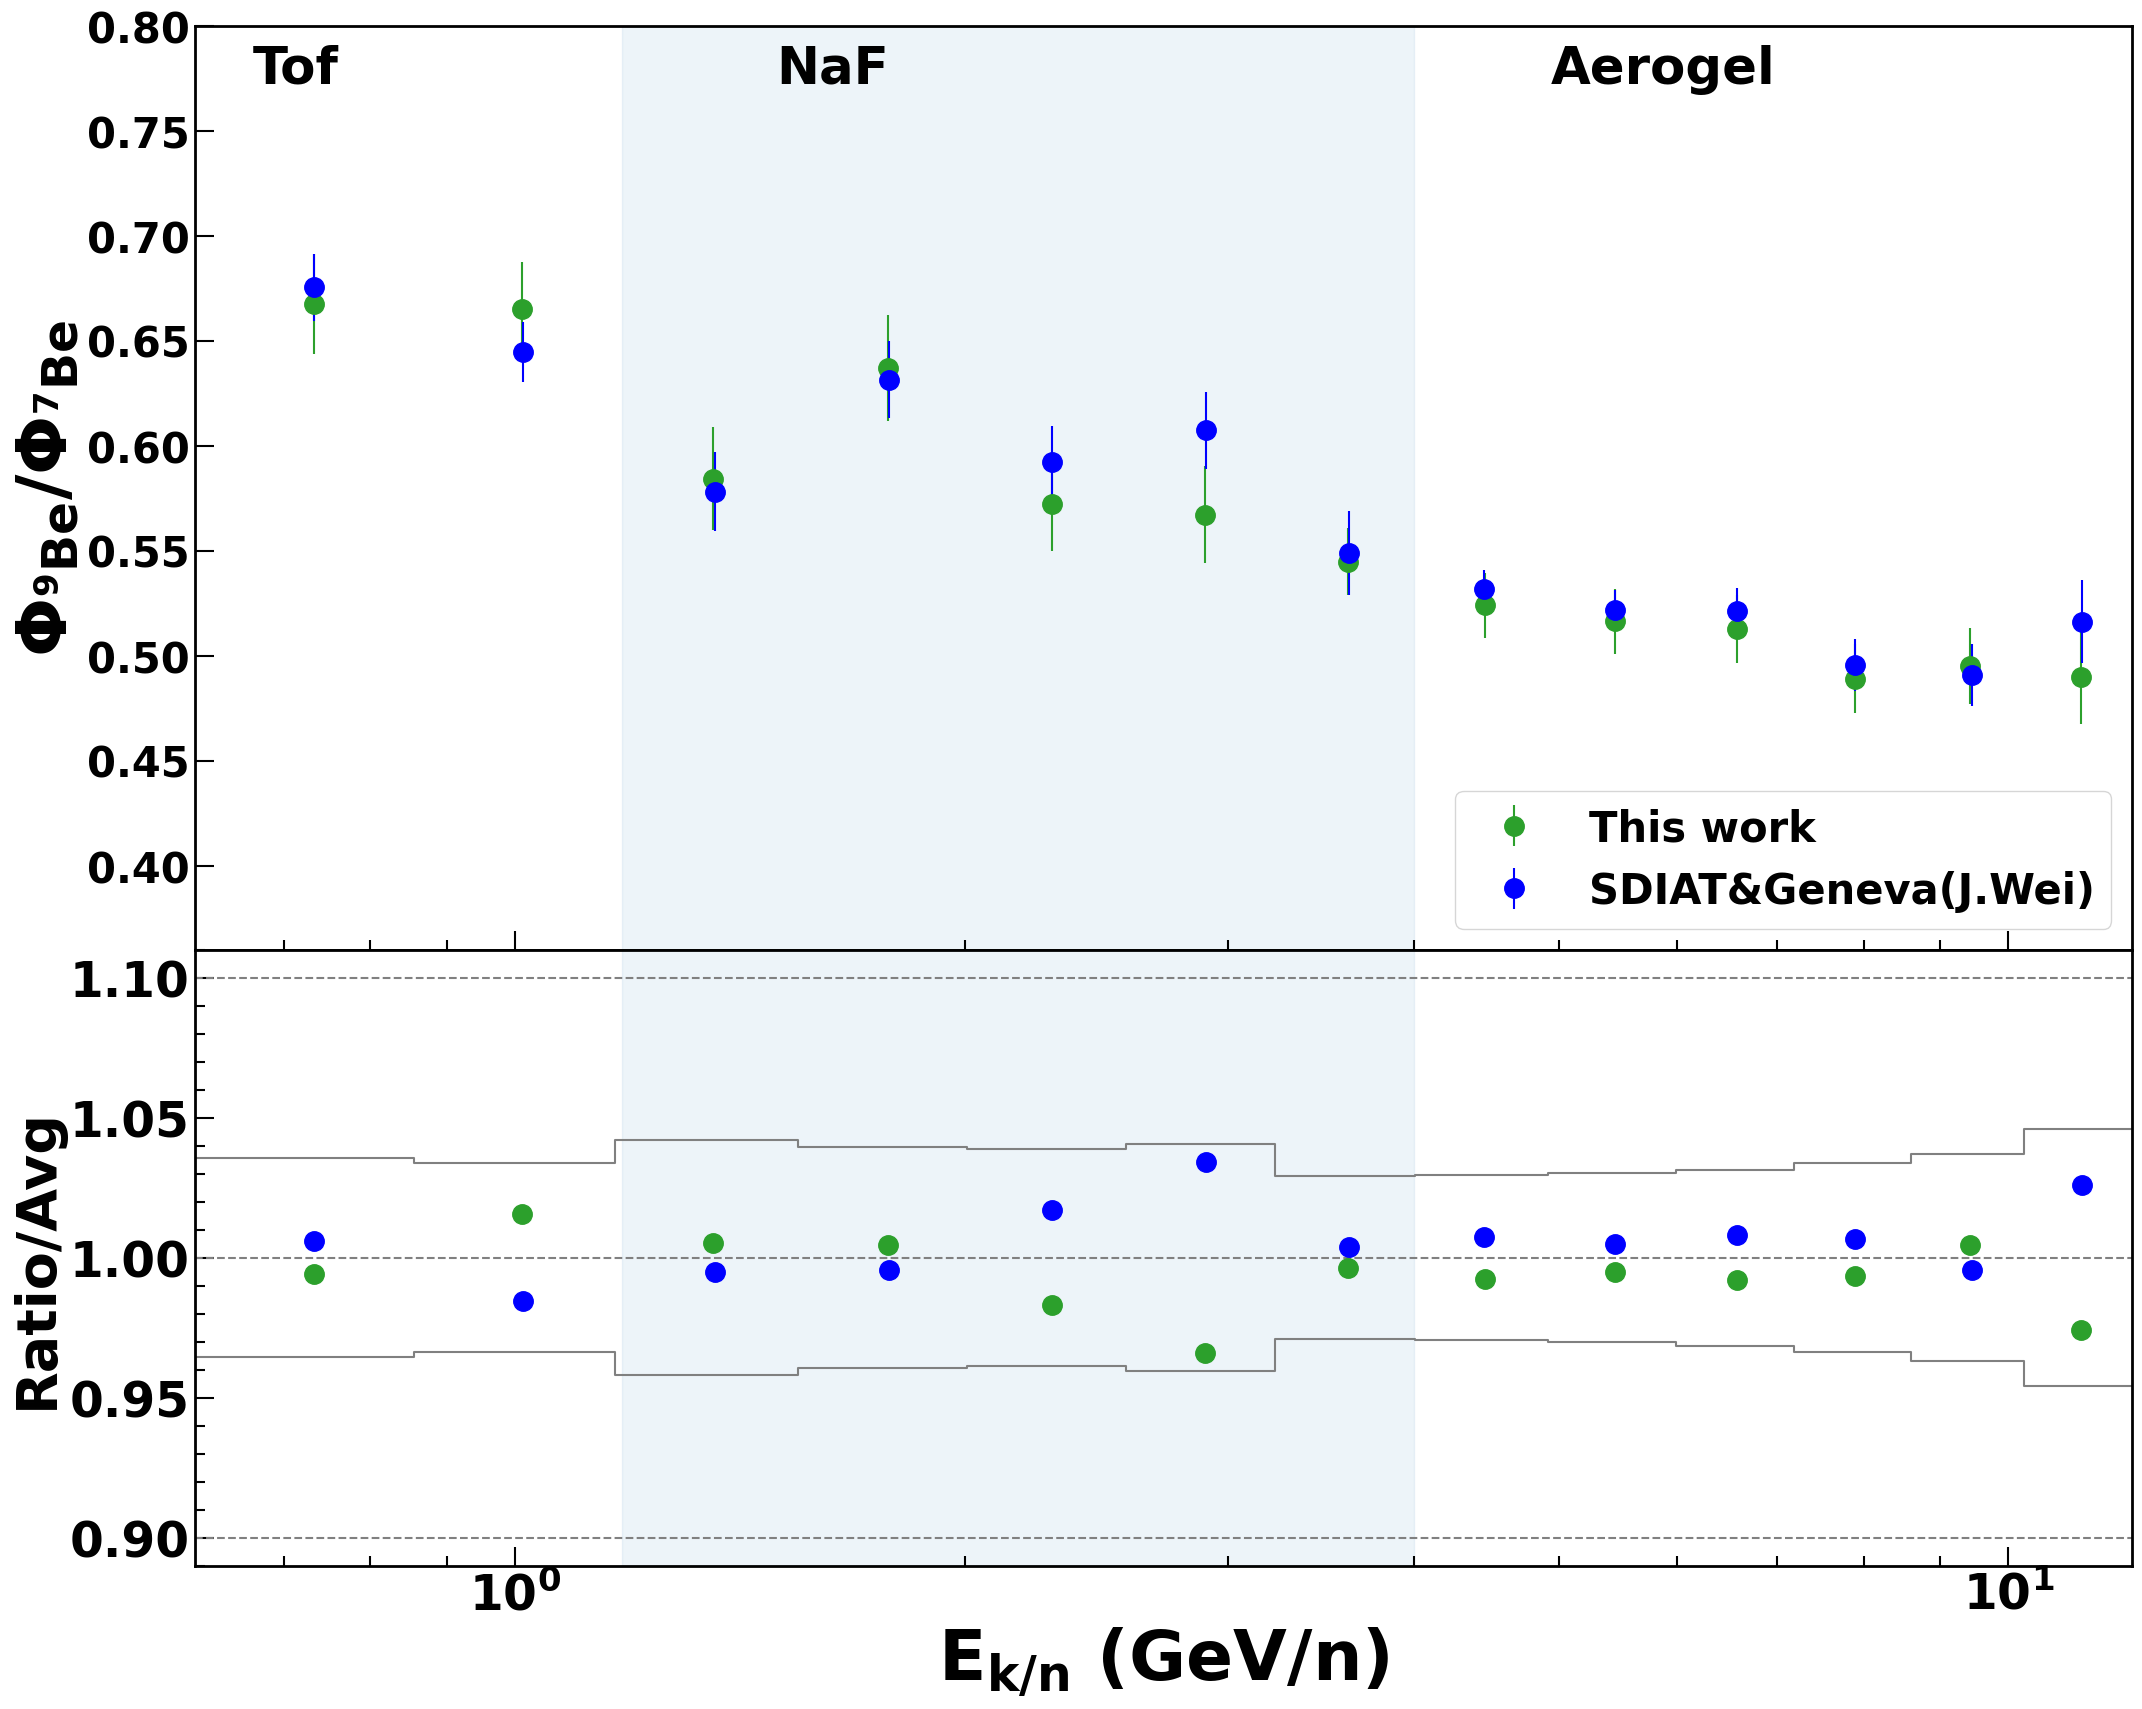

In [89]:
from tools.graphs import scale_graph

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/data_BeP8/Jiahui/11yr/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/data_BeP8/Jiahui/11yr/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhbe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=50) 
plot_graph(fig, ax1, graph_flux_ratio_9to7, color=fluxcolor, style="EP", xlog=False, ylog=False, markersize=28, label='This work')
#plot_graph(fig, ax1, graph_laurent_ratiobe9, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
plot_graph(fig, ax1, graph_jiahui_ratiobe9, color='blue', style="EP", xlog=False, ylog=False, markersize=28, label='SDIAT&Geneva(J.Wei)')                                                                                                                              
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
                                                                                                                             
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.36, 0.8])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


graph_average_be9ratio = MGraph(graph_jiahui_ratiobe9.xvalues, (graph_jiahui_ratiobe9.yvalues+graph_flux_ratio_9to7.yvalues)*0.5, (graph_jiahui_ratiobe9.yerrs+graph_flux_ratio_9to7.yerrs)*0.5)
graph_difference_to_avg = graph_flux_ratio_9to7/graph_average_be9ratio
graph_difference_to_avg_jiahui = graph_jiahui_ratiobe9/graph_average_be9ratio

errorband =   graph_flux_ratio_9to7.yerrs/graph_flux_ratio_9to7.yvalues
graph_lower_errorband = MGraph(graph_flux_ratio_9to7.xvalues, 1.0 + errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_flux_ratio_9to7.xvalues, 1.0 - errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs *= 0.01
graph_difference_to_avg_jiahui.yerrs *= 0.01

plot_graph(fig, ax2, graph_difference_to_avg, color='tab:green', style="EP", xlog=False, ylog=False, markersize=28)                                                                                                                              
plot_graph(fig, ax2, graph_difference_to_avg_jiahui, color='blue', style="EP", xlog=False, ylog=False, markersize=28)                                                                                                                              

plot_graph(fig, ax2, graph_lower_errorband, color='grey', style="step", xlog=False, ylog=False, markersize=28, xbinning=xbinning)                                                                                                                              
plot_graph(fig, ax2, graph_upper_errorband, color='grey', style="step", xlog=False, ylog=False, markersize=28, xbinning=xbinning)                                                                                                                              

ax1.set_xlim([0.61, 12.1])
ax2.set_xlim([0.61, 12.1])

#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
#plot_graph(fig, ax2, graph_difference_to_avg, color='tab:grey', style="EP", xlog=False, ylog=False, markersize=20)                                                                                                                              
#ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues, '-', color='black')
#ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues, '-', color='black')
ax2.set_ylabel('Ratio/Avg', fontsize=40)
ax2.axhline(y=0.9, color='grey', linestyle='--')
ax2.axhline(y=1.0, color='grey', linestyle='--')
ax2.axhline(y=1.1, color='grey', linestyle='--')
print(graph_flux_ratio_9to7)
ax2.set_xlabel(r'$\mathrm{E_{k/n} \ (GeV/n)}$', fontsize=50)
#ax1.text(xaxistext[dec], 0.98, f"DETECTOR", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      
ax1.fill_betweenx(np.linspace(0.0, 0.8, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(0.8, 1.2, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 

#plot_graph(fig, ax2, graph_laurent_ratiobe9/graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20) 
#plot_graph(fig, ax2, graph_jiahui_ratiobe9/graph_flux_ratio_9to7, color=colratio, style="EP", xlog=False, ylog=False, markersize=20) 
#plot_graph(fig, ax2, graph_laurent_ratiobe9/graph_jiahui_ratiobe9, color='blue', style="EP", xlog=False, ylog=False, markersize=20) 
#ax2.text(0.05, 0.98, 'SDIAT&Geneva/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color=colratio)
#ax2.text(0.05, 0.9, 'Grenoble/Geneva', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='black')
#ax2.text(0.05, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')
ax2.set_ylim([0.89, 1.11])

xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      

plotfile='/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotfile, f'be_fluxratio_be9be7_CompareJ', 1)

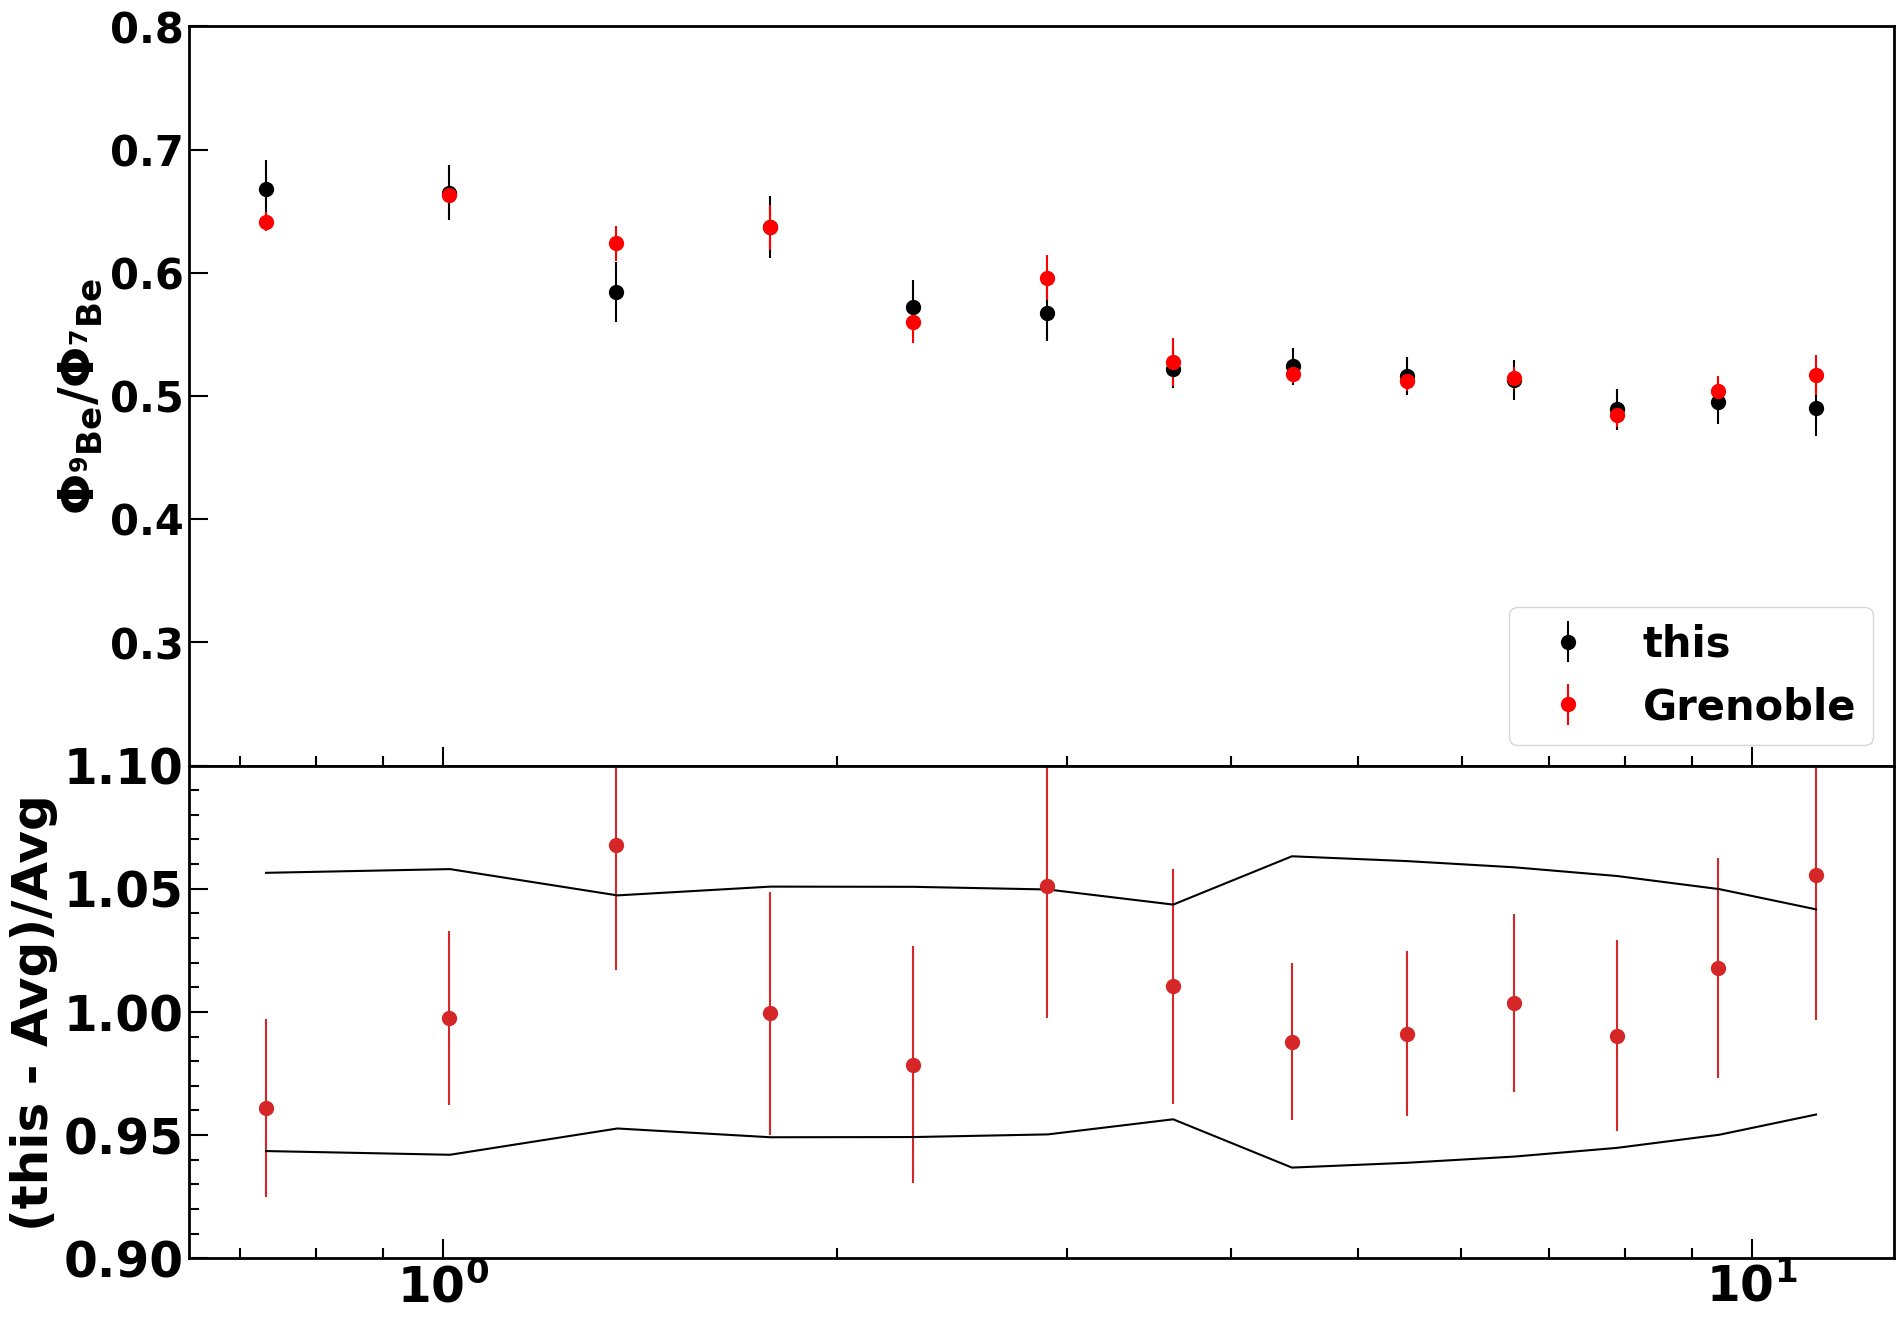

In [41]:
from tools.graphs import scale_graph

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(22, 16)) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35) 
plot_graph(fig, ax1, graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')
plot_graph(fig, ax1, graph_laurent_ratiobe9, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
#plot_graph(fig, ax1, graph_jiahui_ratiobe9, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='SDIAT & Geneva')                                                                                                                              
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
                                                                                                                             
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.2, 0.8])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 

ax2.set_ylim([0.9, 1.1])
graph_average_be9ratio = scale_graph(graph_jiahui_ratiobe9 + graph_flux_ratio_9to7 + graph_laurent_ratiobe9, 1/3)

graph_difference_to_avg = (graph_flux_ratio_9to7 + scale_graph(graph_average_be9ratio, -1))/graph_average_be9ratio

errorband =  graph_jiahui_ratiobe9.yerrs/graph_jiahui_ratiobe9.yvalues
graph_lower_errorband = MGraph(graph_jiahui_ratiobe9.xvalues, -errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_jiahui_ratiobe9.xvalues, errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs = graph_jiahui_ratiobe9.yerrs


plot_graph(fig, ax2, graph_laurent_ratiobe9/graph_flux_ratio_9to7, color='tab:red', style="EP", xlog=False, ylog=False, markersize=20) 
#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
#plot_graph(fig, ax2, graph_difference_to_avg, color='tab:grey', style="EP", xlog=False, ylog=False, markersize=20)                                                                                                                              
ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues + 0.08 +1.0, '-', color='black')
ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues- 0.08+1.0, '-', color='black')
ax2.set_ylabel('(this - Avg)/Avg')
ax2.axhline(y=0.0, color='grey', linestyle='--')
savefig_tofile(fig, plotdir, f'be_fluxratio_be9_{figname}', 1)




xvalues			yvalues			yerrs
0.7332			0.20955912486755388			0.020925098558267106
1.01135			0.1631731954644096			0.0200068022946179
1.3569499999999999			0.2625582015845066			0.02720911094603332
1.7779			0.17054432704979097			0.0251490900594893
2.28735			0.20870299989455832			0.01885050567636535
2.8959			0.22780667903123417			0.024197264029497224
3.61425			0.2366821429332605			0.01369874301026391
4.45875			0.24876951613926757			0.013465013101205797
5.4516			0.2750152645636544			0.013842207630528562
6.58395			0.2513437477404103			0.014421116238221546
7.88955			0.2926467402411442			0.019088681806789975
9.425			0.275216248833182			0.02283034945459728
11.190249999999999			0.30328844540289773			0.03361645303150879



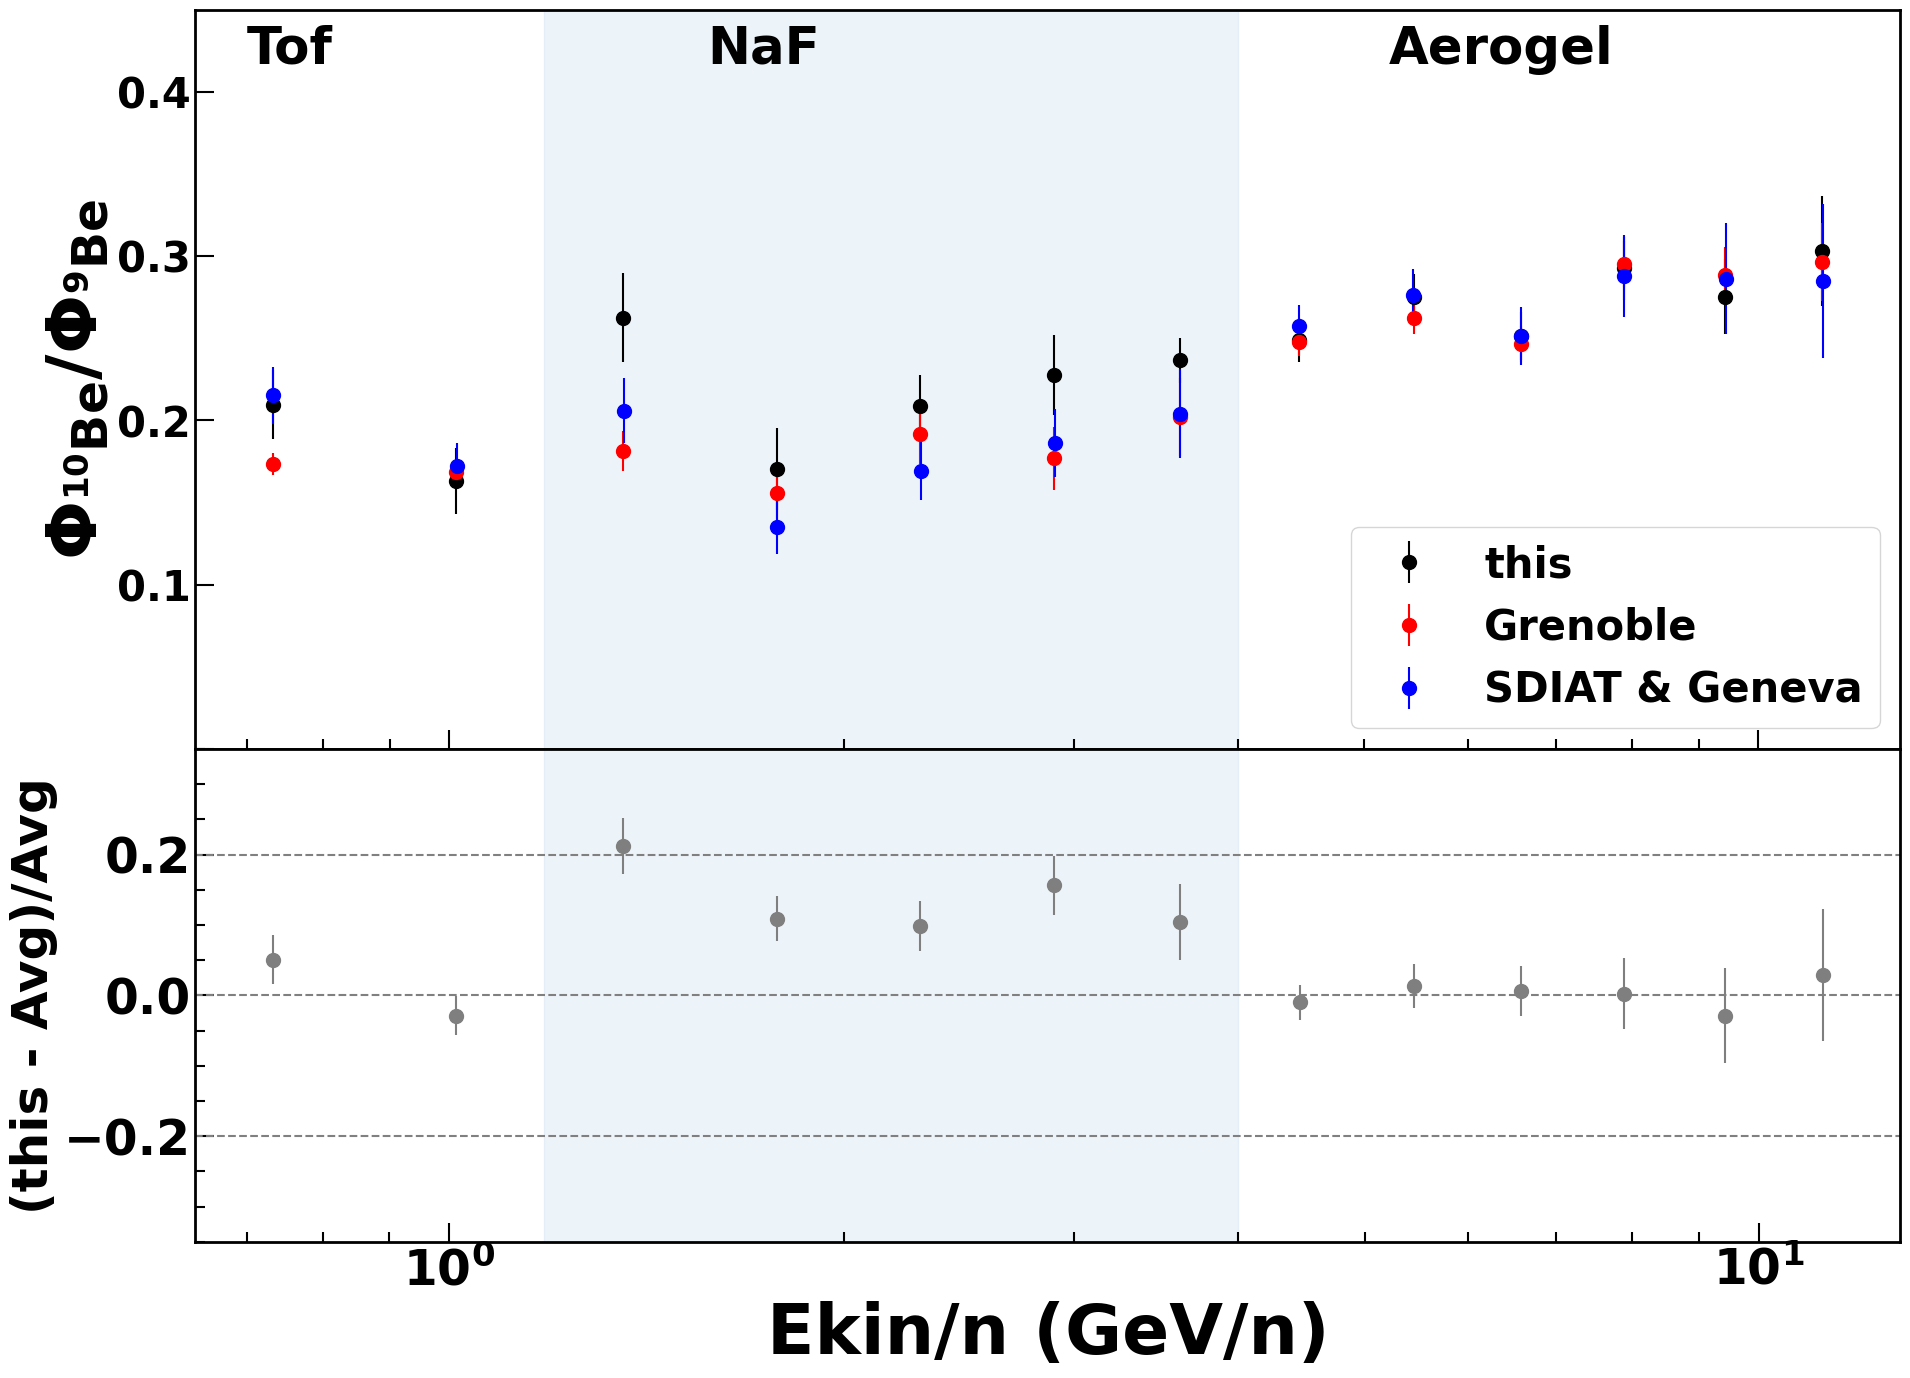

In [80]:
from tools.graphs import scale_graph

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(22, 16)) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=50) 
plot_graph(fig, ax1, graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')

plot_graph(fig, ax1, graph_laurent_ratiobe10, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
plot_graph(fig, ax1, graph_jiahui_ratiobe10, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='SDIAT & Geneva') 
#plot_graph(fig, ax1, graph_italy, color='magenta', style="EP", xlog=False, ylog=False, markersize=20, label='Italy')
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
print(graph_flux_ratio_10to9)
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.0, 0.45])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 
ax2.set_xlabel('Ekin/n (GeV/n)', fontsize=50)
ax2.set_ylim([-0.35, 0.35])
graph_average_be10ratio = scale_graph(graph_jiahui_ratiobe10 + graph_flux_ratio_10to9 + graph_laurent_ratiobe10 , 1/3)
graph_average_be10ratio.yerrs = (abs(graph_jiahui_ratiobe10.yerrs) + abs(graph_flux_ratio_10to9.yerrs) + abs(graph_laurent_ratiobe10.yerrs))/3


graph_difference_to_avg = (graph_flux_ratio_10to9 + scale_graph(graph_average_be10ratio, -1))/graph_average_be10ratio
#print(graph_jiahui_ratiobe10)
errorband =  graph_jiahui_ratiobe10.yerrs/graph_jiahui_ratiobe10.yvalues
graph_lower_errorband = MGraph(graph_jiahui_ratiobe10.xvalues, -errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_jiahui_ratiobe10.xvalues, errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs = graph_jiahui_ratiobe10.yerrs * 2
#print(graph_difference_to_avg)
#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
plot_graph(fig, ax2, graph_difference_to_avg, color='tab:grey', style="EP", xlog=False, ylog=False, markersize=20)                                                                                                                              
#ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues, '-', color='black')
#ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues, '-', color='black')

ax2.set_ylabel('(this - Avg)/Avg')
ax2.axhline(y=0.0, color='grey', linestyle='--')
ax2.axhline(y=0.2, color='grey', linestyle='--')
ax2.axhline(y=-0.2, color='grey', linestyle='--')
xaxistext = {"Tof": 0.03, "NaF": 0.3, "Agl": 0.7}
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f'{DETECTOR_LABEL[dec]}', fontsize=37, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      

ax1.fill_betweenx(np.linspace(0.0, 0.6, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 
ax2.fill_betweenx(np.linspace(-0.4, 0.4, 100), 1.18, 4.0, alpha=0.08, color="tab:blue") 

savefig_tofile(fig, plotfile, 'be_fluxratio_be10P8', 1)


Tof [0.18013286 0.09575594 0.11949251 0.09766817]
NaF [0.11949251 0.09766817 0.14426385 0.08569533 0.10183196 0.0530445 ]
Agl [0.0530445  0.04869958 0.04400547 0.0512249  0.05870755 0.07664549
 0.10278782]


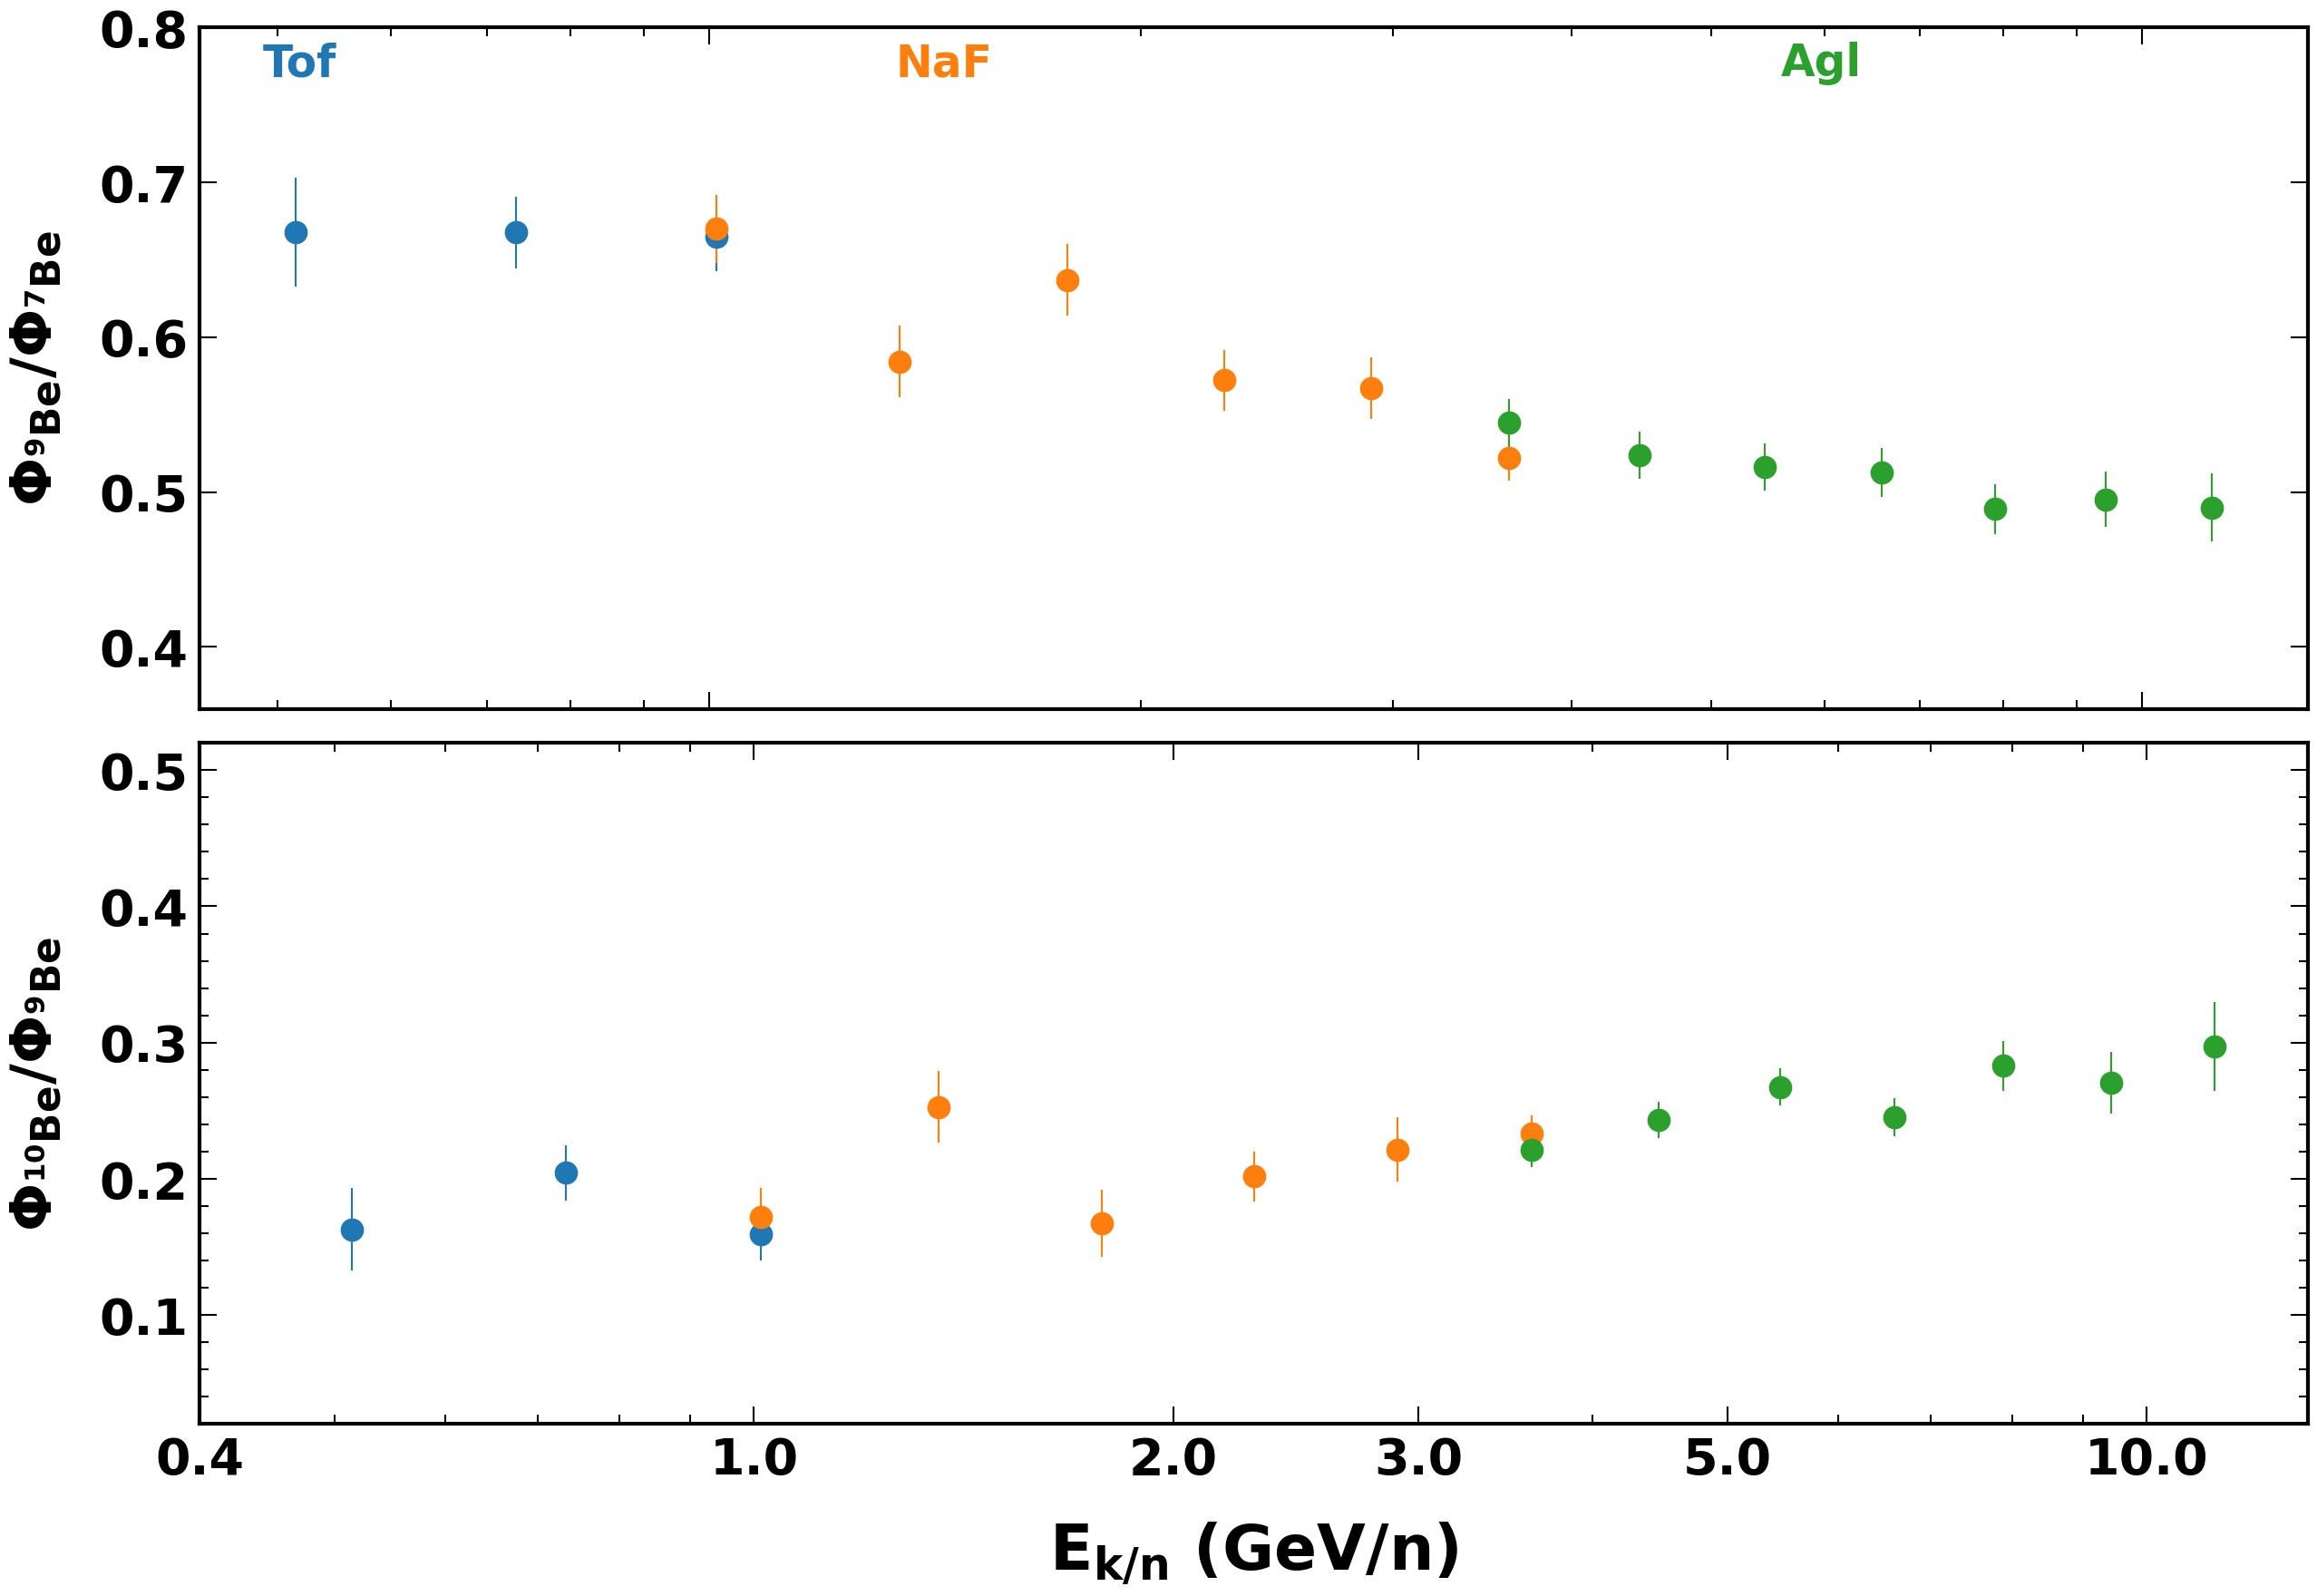

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(30, 20)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 


graph_flux_ratio_10to9 = {}
graph_flux_ratio_9to7 = {}
mksize = 35
slicevalue = {'Tof':[0.5, 1.1], 'NaF':[1.1, 4.0], 'Agl':[4.0, 12]}


for dec in detectors:
    print(dec, graph_unfoldflux[dec]['Be10'].yerrs/graph_unfoldflux[dec]['Be10'].yvalues)
    ratio10to9, ratio10to9_yerr =  calc_ratio_and_err(graph_unfoldflux[dec]['Be10'].yvalues, graph_unfoldflux[dec]['Be9'].yvalues, graph_unfoldflux[dec]['Be10'].yerrs, graph_unfoldflux[dec]['Be9'].yerrs, corelation=0)
    ratio9to7, ratio9to7_yerr =  calc_ratio_and_err(graph_unfoldflux[dec]['Be9'].yvalues, graph_unfoldflux[dec]['Be7'].yvalues, graph_unfoldflux[dec]['Be9'].yerrs, graph_unfoldflux[dec]['Be7'].yerrs, corelation=0)
    graph_flux_ratio_10to9[dec] = MGraph(graph_unfoldflux[dec]['Be9'].xvalues, ratio10to9, ratio10to9_yerr)
    graph_flux_ratio_9to7[dec] = MGraph(graph_unfoldflux[dec]['Be9'].xvalues, ratio9to7, ratio9to7_yerr)
    #graph_flux_ratio_9to7[dec] = graph_unfoldflux[dec]['Be9']/graph_unfoldflux[dec]['Be7']
    #graph_flux_ratio_10to9[dec] = graph_unfoldflux[dec]['Be10']/graph_unfoldflux[dec]['Be9']
    


graph_flux_ratio_10to9['NaF'].yvalues[1] = graph_flux_ratio_10to9['NaF'].yvalues[1]* 0.99


for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=FONTSIZE+5, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=DETECTOR_COLOR[dec], fontweight="bold")      
    
    if dec == 'Tof':
        plot_graph(fig, ax2, slice_graph_by_value(graph_flux_ratio_10to9[dec], slicevalue[dec]),  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize, label='Pass8 GBL')
        
    else: 
        #plot_graph(fig, ax2, graph_rawflux_ratio_10to9_P7[dec], color='black', style="EP", xlog=False, ylog=False, markersize=mksize-2)
        plot_graph(fig, ax2, graph_flux_ratio_10to9[dec],  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize)
        #plot_graph(fig, ax2, slice_graph_by_value(graph_rawflux_ratio_10to9[dec], xlimvalue[dec]),  color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize-2)
        
    #plot_graph(fig, ax1, graph_rawflux_ratio_9to7_P7[dec], color='black', style="EP", xlog=False, ylog=False, markersize=mksize-2)
    plot_graph(fig, ax1, slice_graph_by_value(graph_flux_ratio_9to7[dec], slicevalue[dec]), color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=mksize)
    
   
                                                                                                                            
#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   


ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=45, labelpad=28)  
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=45, labelpad=28)  
ax2.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", fontsize=50, labelpad=28)

ax1.set_ylim([0.36, 0.8]) 
ax2.set_ylim([0.02, 0.52]) 
ax1.set_xticklabels([])

ax1.set_xscale('log')
ax2.set_xscale('log')

ax2.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$")    
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
                                                                                                                   
ax1.set_xticklabels([])

set_plot_style(ax1) 
set_plot_style(ax2) 

plt.subplots_adjust(hspace=.05)   
plotdir ='/home/manbing/Documents/lithiumanalysis/slides/plots_16May'
savefig_tofile(fig, plotdir, 'be_fluxratio_alldec', 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/manbing/Documents/lithiumanalysis/slides/plots/BeIsoFluxP8_GBL


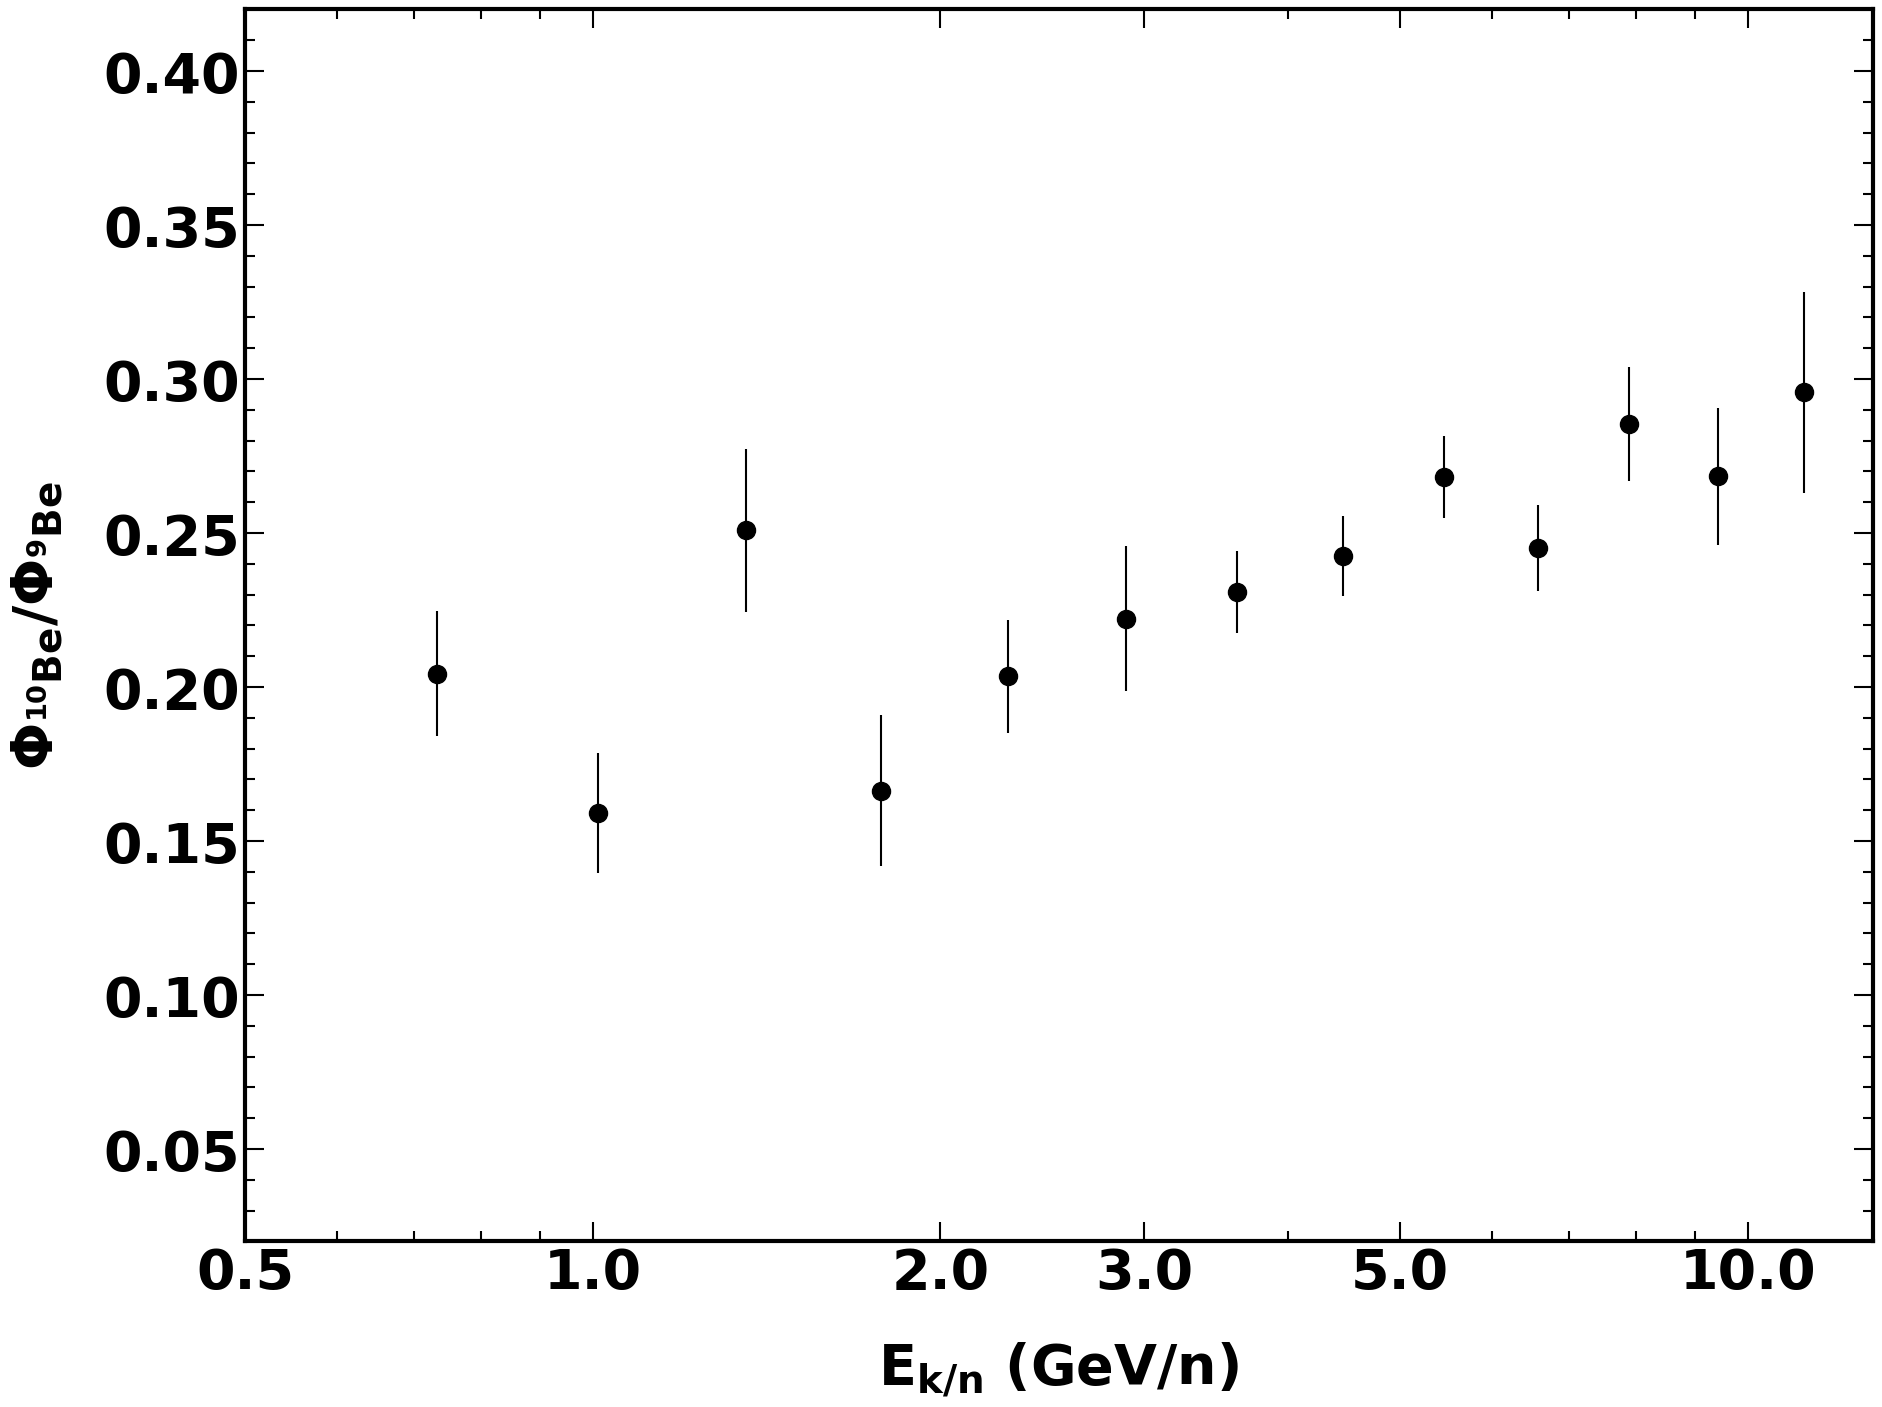

In [83]:
fig, ax2 = plt.subplots(1, 1, figsize=(21, 16)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 

graph_flux_ratio_9to7 = graph_flux_combined['Be9']/graph_flux_combined['Be7']
graph_flux_ratio_10to9 =graph_flux_combined['Be10']/graph_flux_combined['Be9']
    

graph_flux_ratio_9to7.yvalues[2] = graph_flux_ratio_9to7.yvalues[2]* 1.02
graph_flux_ratio_10to9.yvalues[2] = graph_flux_ratio_10to9.yvalues[2]* 0.98

resultsdir = '/home/manbing/Documents/lithiumanalysis/slides/BeResults'

plot_graph(fig, ax2, graph_flux_ratio_10to9,  color='black', style="EP", xlog=False, ylog=False, markersize=mksize-2)
write_points_totxt_with_binedge(graph_flux_ratio_9to7, xbinning, resultsdir, f'Be9ToBe7Ratio')
write_points_totxt_with_binedge(graph_flux_ratio_9to7, xbinning, resultsdir, f'Be10ToBe9Ratio')
                                                                                                                            
ax1.legend()

ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=40, labelpad=28)  
ax2.set_xlabel(r"$\mathrm{E_{k/n} \ (GeV/n)}$", fontsize=40, labelpad=28)

ax2.set_ylim([0.02, 0.42]) 

ax2.set_xscale('log')
  
              
ax2.set_xticks([0.5, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  

set_plot_style(ax2) 

plt.subplots_adjust(hspace=.05)   
print(plotdir)
savefig_tofile(fig, plotdir, 'be_flux10to9ratio_1804', 1)